# Preliminaries

In [632]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns

pd.set_option('display.max_columns', None)

In [6]:
dataset = pd.read_csv('df_merged_no_nans.csv')
dataset.loc[dataset['basicMonthlySalary'] < 100, 'basicMonthlySalary'] *= 1000
dataset
# dataset = dataset.drop('Unnamed: 0', axis=1)

# cols_to_drop = [
#     'id', 'fullName', 'firstName', 'middleName', 'lastName', 'mobileNumber',
#     'dateEntry', 'mobilePrefix', 'address', 'occupation'
# ]
cols_to_drop = [
    'id', 'fullName', 'firstName', 'lastName', 'address', 'dateEntry', 'occupation'
]

dataset = dataset.drop(cols_to_drop, axis=1)

boolean_columns = [col for col in dataset.columns if dataset[col].dtype == bool]
dataset[boolean_columns] = dataset[boolean_columns].apply(lambda x: x.astype('int64'))

columns_to_move = ['lastFirstName', 'age', 'gender', 'province', 'job']
columns_remaining = [col for col in dataset.columns if col not in columns_to_move]

new_column_order = columns_to_move + columns_remaining
dataset = dataset[new_column_order]
dataset.insert(0, 'userId', dataset.pop('userId'))

def map_ageing_class(row):
    found_in_hdmf = row['foundInHDMF']
    home_ownership_class = row['home_ownership_class']

    if home_ownership_class == 0:
        return np.nan
    elif found_in_hdmf in [' Current', 'FP', '01 mos', '02 mos', '03 mos']:
        return 0
    elif found_in_hdmf in ['04 mos', '05 mos']:
        return 1

# One-hot encoding of categorical columns
# dataset = pd.get_dummies(dataset, columns=['gender'], prefix='gender', drop_first='True')
# dataset = pd.get_dummies(dataset, columns=['province'], prefix='province')
# dataset = pd.get_dummies(dataset, columns=['job'], prefix='job')

dataset['home_ownership_class'] = ((dataset['foundInOS'] != 'False') |
                                   (dataset['foundInHDMF'] != 'False')).astype('int64')



# dataset['ageing_class'] = dataset['home_ownership_class'].astype('int64')
# dataset['ageing_class'] = dataset.apply(map_ageing_class, axis=1)

cols_to_drop = ['foundInOS', 'foundInHDMF']
dataset = dataset.drop(cols_to_drop, axis=1)

dataset

userId          lastFirstName  age  gender      province  \
0        370          IBALI, HOWARD   24    MALE  METRO MANILA   
1       1025  PATALINGHOG, KIMBERLY   26  FEMALE  METRO MANILA   
2       1105      TEMILLOSO, DENNIS   40    MALE  METRO MANILA   
3       1719         OSCARES, ELMER   32    MALE       UNKNOWN   
4       2081         LEGASPI, MANNY   39    MALE  METRO MANILA   
...      ...                    ...  ...     ...           ...   
1065   12850         LIPANGO, ARVIN   34    MALE  METRO MANILA   
1066   12852          TEJADA, JERIC   27    MALE        LAGUNA   
1067   12853         RAMOS, RHEALYN   27  FEMALE        CAVITE   
1068   12854         BURGOS, LIEZEL   48  FEMALE        ILOILO   
1069   12857     SEÑERES, JENNY MAE   24  FEMALE  METRO MANILA   

                         job  basicMonthlySalary  \
0          SERVICE AND SALES               19000   
1          SERVICE AND SALES               15000   
2          SERVICE AND SALES               20000   
3           MACHINE OPERATOR               21200   
4           CLERICAL SUPPORT               19800   
...                      ...                 ...   
1065  ASSOCIATE PROFESSIONAL               19000   
1066         CRAFT AND TRADE               20000   
1067       SERVICE AND SALES               13962   
1068       SERVICE AND SALES               51000   
1069       SERVICE AND SALES               98800   

      preferredNetDisposableIncomeId  workingFamilyCount  residentsCount  \
0                                  2                   3               3   
1                                  3                   2               4   
2                                  2                   0               3   
3                                  2                   0               5   
4                                  2                   0               0   
...                              ...                 ...             ...   
1065                               2                   2               4   
1066                               2                   1               1   
1067                               1                   2               4   
1068                               2                   0               5   
1069                               3                   3               3   

      monthlyFamilyIncome  food  hygiene  houseCleaning  fare  parking  \
0                 40000.0  1000      500            200   200        0   
1                 30000.0  5000     3000           2000  2000        0   
2                 30000.0  3000      500            300   200       50   
3                 12000.0  2000      500            200   392        0   
4                 25000.0  5000     2000           1000  1500        0   
...                   ...   ...      ...            ...   ...      ...   
1065              19000.0  5000     1000           1000     1        1   
1066              20000.0  5000      500            400   280        0   
1067              40000.0     4        2              1     3        1   
1068              51000.0  5000     3000           1500  2000        0   
1069             143800.0  7000     3000           2000     0        0   

      gasoline  tuition  allowance  uniform  otherEducation  emergency  \
0            0        0         50        0               0        500   
1            0        0          0        0               0       2000   
2           50      500        100      100              50        500   
3            0        0          0        0               0        100   
4            0     1000        500     1500               0          0   
...        ...      ...        ...      ...             ...        ...   
1065         1     1000        500        1            1000       1000   
1066         0        0          0        0               0          0   
1067         1        0          0        0               0      30000   
1068         0    15000       9000        0   

# Main Dataset

In [103]:
ho_t01 = dataset.copy()
ho_t01_num = ho_t01.drop(columns=['gender', 'province', 'job'])
ho_t01

userId          lastFirstName  age  gender      province  \
0        370          IBALI, HOWARD   24    MALE  METRO MANILA   
1       1025  PATALINGHOG, KIMBERLY   26  FEMALE  METRO MANILA   
2       1105      TEMILLOSO, DENNIS   40    MALE  METRO MANILA   
3       1719         OSCARES, ELMER   32    MALE       UNKNOWN   
4       2081         LEGASPI, MANNY   39    MALE  METRO MANILA   
...      ...                    ...  ...     ...           ...   
1065   12850         LIPANGO, ARVIN   34    MALE  METRO MANILA   
1066   12852          TEJADA, JERIC   27    MALE        LAGUNA   
1067   12853         RAMOS, RHEALYN   27  FEMALE        CAVITE   
1068   12854         BURGOS, LIEZEL   48  FEMALE        ILOILO   
1069   12857     SEÑERES, JENNY MAE   24  FEMALE  METRO MANILA   

                         job  basicMonthlySalary  \
0          SERVICE AND SALES               19000   
1          SERVICE AND SALES               15000   
2          SERVICE AND SALES               20000   
3           MACHINE OPERATOR               21200   
4           CLERICAL SUPPORT               19800   
...                      ...                 ...   
1065  ASSOCIATE PROFESSIONAL               19000   
1066         CRAFT AND TRADE               20000   
1067       SERVICE AND SALES               13962   
1068       SERVICE AND SALES               51000   
1069       SERVICE AND SALES               98800   

      preferredNetDisposableIncomeId  workingFamilyCount  residentsCount  \
0                                  2                   3               3   
1                                  3                   2               4   
2                                  2                   0               3   
3                                  2                   0               5   
4                                  2                   0               0   
...                              ...                 ...             ...   
1065                               2                   2               4   
1066                               2                   1               1   
1067                               1                   2               4   
1068                               2                   0               5   
1069                               3                   3               3   

      monthlyFamilyIncome  food  hygiene  houseCleaning  fare  parking  \
0                 40000.0  1000      500            200   200        0   
1                 30000.0  5000     3000           2000  2000        0   
2                 30000.0  3000      500            300   200       50   
3                 12000.0  2000      500            200   392        0   
4                 25000.0  5000     2000           1000  1500        0   
...                   ...   ...      ...            ...   ...      ...   
1065              19000.0  5000     1000           1000     1        1   
1066              20000.0  5000      500            400   280        0   
1067              40000.0     4        2              1     3        1   
1068              51000.0  5000     3000           1500  2000        0   
1069             143800.0  7000     3000           2000     0        0   

      gasoline  tuition  allowance  uniform  otherEducation  emergency  \
0            0        0         50        0               0        500   
1            0        0          0        0               0       2000   
2           50      500        100      100              50        500   
3            0        0          0        0               0        100   
4            0     1000        500     1500               0          0   
...        ...      ...        ...      ...             ...        ...   
1065         1     1000        500        1            1000       1000   
1066         0        0          0        0               0          0   
1067         1        0          0        0               0      30000   
1068         0    15000       9000        0   

# Outlier Analysis

In [10]:
from sklearn.covariance import EllipticEnvelope
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest

In [13]:
from sklearn.covariance import EllipticEnvelope
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest

def plot_hist_ee(df, bins=1_000, xlim=None):
    df_X = df.copy().drop(['userId', 'lastFirstName', 'home_ownership_class'], axis=1)
    df_names = df.copy()[['userId', 'lastFirstName']]
    n_samples = df.shape[0]
    
#     scaler = StandardScaler()
#     scaled_data = scaler.fit_transform(df_X)
    scaled_data = df_X

    model = EllipticEnvelope(random_state=0)
    model.fit(scaled_data)
    
    model_scores = model.score_samples(scaled_data)
    
    plt.hist(model_scores, bins=bins)
    plt.xlabel('Elliptic Envelope scores')
    plt.ylabel('Frequency')
    plt.title(f'Elliptic Envelope score histogram')
    if xlim is not None:
        plt.xlim(xlim, 0)
    plt.show()

    return model_scores

def plot_ee(df, scores, threshold):
    model_scores = scores

    outlier_mask = model_scores < threshold
    plt.scatter(df.iloc[outlier_mask, df.columns.get_loc('basicMonthlySalary')],
                df.iloc[outlier_mask, df.columns.get_loc('monthlyFamilyIncome')], c='purple',
                label='Predicted Outliers')
    plt.scatter(df.iloc[~outlier_mask, df.columns.get_loc('basicMonthlySalary')],
                df.iloc[~outlier_mask, df.columns.get_loc('monthlyFamilyIncome')], c='yellow',
                label='Predicted Inliers')
    plt.xlabel('Basic Monthly Salary')
    plt.ylabel('Monthly Family Income')
    plt.title(f'Elliptic Envelope, Threshold = {threshold}')
    plt.legend()
    plt.show()

    df2 = df.copy()
    df2['pred_outlier'] = (model_scores.reshape(-1, 1) < threshold)

    print('Number of predicted outliers:',
          df2[df2['pred_outlier'] == True].shape[0])
    display(df2[df2['pred_outlier'] == True])

def plot_hist_gmm(df, n_components, covariance_type='full', bins=1_000, xlim=None):
    df_X = df.copy().drop(['userId', 'lastFirstName', 'home_ownership_class'], axis=1)
    df_names = df.copy()[['userId', 'lastFirstName']]
    n_samples = df.shape[0]
    
#     scaler = StandardScaler()
#     scaled_data = scaler.fit_transform(df_X)
    scaled_data = df_X

    model = GaussianMixture(n_components=n_components,
                            covariance_type=covariance_type,
                            random_state=0)
    model.fit(scaled_data)
    
    model_scores = model.score_samples(scaled_data)
    
    plt.hist(model_scores, bins=bins)
    plt.xlabel(f'{n_components}-component Gaussian Mixture Model scores')
    plt.ylabel('Frequency')
    plt.title(f'{n_components}-component Gaussian Mixture Model score histogram')
    if xlim is not None:
        plt.xlim(xlim, 0)
    plt.show()

    return model_scores

def plot_gmm(df, n_components, scores, threshold):
    model_scores = scores

    outlier_mask = model_scores < threshold
    plt.scatter(df.iloc[outlier_mask, df.columns.get_loc('basicMonthlySalary')],
                df.iloc[outlier_mask, df.columns.get_loc('monthlyFamilyIncome')], c='purple',
                label='Predicted Outliers')
    plt.scatter(df.iloc[~outlier_mask, df.columns.get_loc('basicMonthlySalary')],
                df.iloc[~outlier_mask, df.columns.get_loc('monthlyFamilyIncome')], c='yellow',
                label='Predicted Inliers')
    plt.xlabel('Basic Monthly Salary')
    plt.ylabel('Monthly Family Income')
    plt.title(f'{n_components}-component Gaussian Mixture Model, Threshold = {threshold}')
    plt.legend()
    plt.show()

    df2 = df.copy()
    df2['pred_outlier'] = (model_scores.reshape(-1, 1) < threshold)

    print('Number of predicted outliers:',
          df2[df2['pred_outlier'] == True].shape[0])
    display(df2[df2['pred_outlier'] == True])

def plot_hist_lof(df, n_neighbors=20, bins=1_000, xlim=None):
    df_X = df.copy().drop(['userId', 'lastFirstName', 'home_ownership_class'], axis=1)
    df_names = df.copy()[['userId', 'lastFirstName']]
    n_samples = df.shape[0]
    
#     scaler = StandardScaler()
#     scaled_data = scaler.fit_transform(df_X)
    scaled_data = df_X

    model = LocalOutlierFactor(n_neighbors=n_neighbors)
    model.fit(scaled_data)
    
#     model_scores = model.score_samples(scaled_data)
    model_scores = model.negative_outlier_factor_
    
    plt.hist(model_scores, bins=bins)
    plt.xlabel(f'{n_neighbors}-neighbor Local Outlier Factor (LOF) scores')
    plt.ylabel('Frequency')
    plt.title(f'{n_neighbors}-neighbor Local Outlier Factor (LOF) score histogram')
    if xlim is not None:
        plt.xlim(xlim, 0)
    plt.show()

    return model_scores

def plot_lof(df, n_neighbors, scores, threshold):
    model_scores = scores

    outlier_mask = model_scores < threshold
    plt.scatter(df.iloc[outlier_mask, df.columns.get_loc('basicMonthlySalary')],
                df.iloc[outlier_mask, df.columns.get_loc('monthlyFamilyIncome')], c='purple',
                label='Predicted Outliers')
    plt.scatter(df.iloc[~outlier_mask, df.columns.get_loc('basicMonthlySalary')],
                df.iloc[~outlier_mask, df.columns.get_loc('monthlyFamilyIncome')], c='yellow',
                label='Predicted Inliers')
    plt.xlabel('Basic Monthly Salary')
    plt.ylabel('Monthly Family Income')
    plt.title(f'{n_neighbors}-neighbor Local Outlier Factor (LOF), Threshold = {threshold}')
    plt.legend()
    plt.show()

    df2 = df.copy()
    df2['pred_outlier'] = (model_scores.reshape(-1, 1) < threshold)

    print('Number of predicted outliers:',
          df2[df2['pred_outlier'] == True].shape[0])
    display(df2[df2['pred_outlier'] == True])

def plot_hist_ocsvm(df, kernel='rbf', bins=1_000, xlim=None):
    df_X = df.copy().drop(['userId', 'lastFirstName', 'home_ownership_class'], axis=1)
    df_names = df.copy()[['userId', 'lastFirstName']]
    n_samples = df.shape[0]
    
#     scaler = StandardScaler()
#     scaled_data = scaler.fit_transform(df_X)
    scaled_data = df_X

    model = OneClassSVM(kernel=kernel, degree=4)
    model.fit(scaled_data)
    
    model_scores = model.score_samples(scaled_data)
    
    plt.hist(model_scores, bins=bins)
    plt.xlabel(f'{kernel}-kernel One-Class SVM (OCSVM) scores')
    plt.ylabel('Frequency')
    plt.title(f'{kernel}-kernel One-Class SVM (OCSVM) score histogram')
    if xlim is not None:
        plt.xlim(xlim, 0)
    plt.show()

    return model_scores

def plot_hist_ocsvm2(df, kernel='rbf', bins=1_000, xlim=None):
    df_X = df.copy().drop(['userId', 'lastFirstName', 'ageing_class'], axis=1)
    df_names = df.copy()[['userId', 'lastFirstName']]
    n_samples = df.shape[0]
    
#     scaler = StandardScaler()
#     scaled_data = scaler.fit_transform(df_X)
    scaled_data = df_X

    model = OneClassSVM(kernel=kernel, degree=4)
    model.fit(scaled_data)
    
    model_scores = model.score_samples(scaled_data)
    
    plt.hist(model_scores, bins=bins)
    plt.xlabel(f'{kernel}-kernel One-Class SVM (OCSVM) scores')
    plt.ylabel('Frequency')
    plt.title(f'{kernel}-kernel One-Class SVM (OCSVM) score histogram')
    if xlim is not None:
        plt.xlim(xlim, 0)
    plt.show()

    return model_scores

def plot_ocsvm(df, kernel, scores, threshold):
    model_scores = scores

    outlier_mask = model_scores < threshold
    plt.scatter(df.iloc[outlier_mask, df.columns.get_loc('basicMonthlySalary')],
                df.iloc[outlier_mask, df.columns.get_loc('monthlyFamilyIncome')], c='purple',
                label='Predicted Outliers')
    plt.scatter(df.iloc[~outlier_mask, df.columns.get_loc('basicMonthlySalary')],
                df.iloc[~outlier_mask, df.columns.get_loc('monthlyFamilyIncome')], c='yellow',
                label='Predicted Inliers')
    plt.xlabel('Basic Monthly Salary')
    plt.ylabel('Monthly Family Income')
    plt.title(f'{kernel}-kernel One-Class SVM (OCSVM), Threshold = {threshold}')
    plt.legend()
    plt.show()

    df2 = df.copy()
    df2['pred_outlier'] = (model_scores.reshape(-1, 1) < threshold)

    print('Number of predicted outliers:',
          df2[df2['pred_outlier'] == True].shape[0])
    display(df2[df2['pred_outlier'] == True])

    return list(df2[df2['pred_outlier'] == True].index)

def plot_hist_if(df, n_estimators=100, bins=1_000, xlim=None):
    df_X = df.copy().drop(['userId', 'lastFirstName', 'home_ownership_class'], axis=1)
    df_names = df.copy()[['userId', 'lastFirstName']]
    n_samples = df.shape[0]
    
#     scaler = StandardScaler()
#     scaled_data = scaler.fit_transform(df_X)
    scaled_data = df_X

    model = IsolationForest(n_estimators=n_estimators, random_state=0)
    model.fit(scaled_data)
    
    model_scores = model.score_samples(scaled_data)
    
    plt.hist(model_scores, bins=bins)
    plt.xlabel(f'{n_estimators}-estimator Isolation Forest (IF) scores')
    plt.ylabel('Frequency')
    plt.title(f'{n_estimators}-estimator Isolation Forest (IF) score histogram')
    if xlim is not None:
        plt.xlim(xlim, 0)
    plt.show()

    return model_scores

def plot_if(df, n_estimators, scores, threshold):
    model_scores = scores

    outlier_mask = model_scores < threshold
    plt.scatter(df.iloc[outlier_mask, df.columns.get_loc('basicMonthlySalary')],
                df.iloc[outlier_mask, df.columns.get_loc('monthlyFamilyIncome')], c='purple',
                label='Predicted Outliers')
    plt.scatter(df.iloc[~outlier_mask, df.columns.get_loc('basicMonthlySalary')],
                df.iloc[~outlier_mask, df.columns.get_loc('monthlyFamilyIncome')], c='yellow',
                label='Predicted Inliers')
    plt.xlabel('Basic Monthly Salary')
    plt.ylabel('Monthly Family Income')
    plt.title(f'{n_estimators}-estimator Isolation Forest (IF), Threshold = {threshold}')
    plt.legend()
    plt.show()

    df2 = df.copy()
    df2['pred_outlier'] = (model_scores.reshape(-1, 1) < threshold)

    print('Number of predicted outliers:',
          df2[df2['pred_outlier'] == True].shape[0])
    display(df2[df2['pred_outlier'] == True])

    return list(df2[df2['pred_outlier'] == True].index)

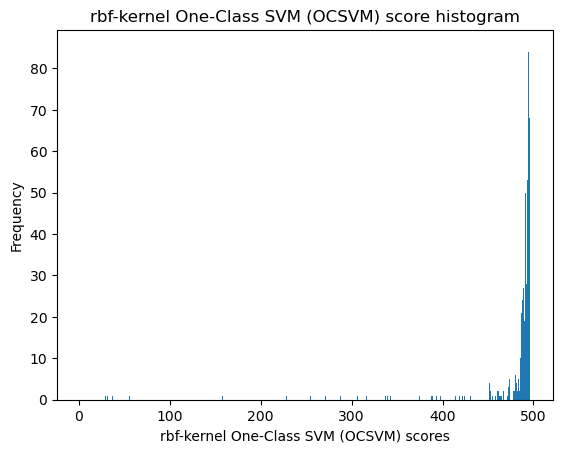

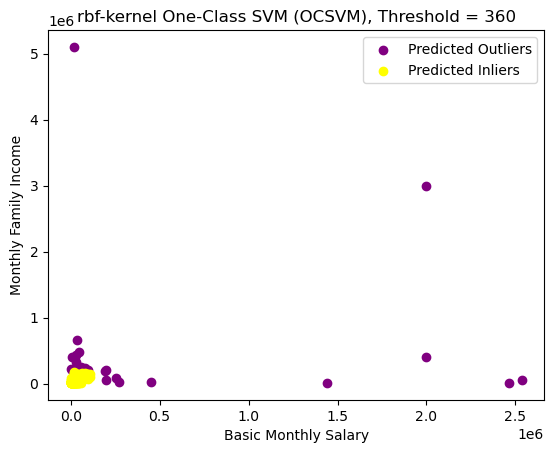

Number of predicted outliers: 38


userId             lastFirstName  age  basicMonthlySalary  \
14      5415           LAMOSTE, JO-ANN   36             2534900   
24      8342             VALDEZ, MOSES   28               50000   
32      9274          ALMUETE, CRISTEL   35              200000   
50      9989            BITAS, SHARRAH   23               37266   
70     10503            CASTRO, GLENDA   46              200000   
114    10596              ALERE, DINOS   40               19000   
162    10679              GONEZ, JAMES   25               80000   
200    10764        SANTOS, JOHN CARLO   27               60000   
231    11170           SANTOR, EMELITA   54                7500   
253    11201             ABALOS, GLYNN   36               80000   
299    11265          FERRER, JUDY ANN   29               18499   
323    11301         NEVAREZ, SYRA MAW   27               37000   
325    11304            NOROMOR, ABNER   47              257250   
380    11395           SAGURAN, JESSIE   46               47777   
391    11411           ORTEGA, MERRIAM   44             2000000   
405    11430           CLAROS, BELEJUN   28               60000   
417    11443           NERVIDA, REYNER   37             2464625   
435    11471           TESALONA, CYRUS   25               26000   
515    11593         SAMPAGA, MA. EDEN   39               14820   
556    11666             TOMAS, SARATE   49               22000   
558    11669            TOLEDO, LAARNI   28               21000   
563    11676             JAVIER, ALVIN   39              193520   
568    11684         DE FIESTA, ALBERT   46                9490   
584    11705        VALENZUELA, RACHEL   30             2000000   
608    11744           MARTINEZ, NOREL   28              270000   
677    11863           DANGANI, SHARON   36               37000   
692    11891            MACAWILI, ALEX   30               75000   
702    11903           SARAMAN, MANJAN   32                5000   
706    11909          GELAGA, BERDENIA   50               32000   
762    11995             REMON, JAYTEE   29               28000   
773    12020           TONOG, CRISTINA   33               23000   
830    12114  PANAGUITON, JHON ANTHONY   35              450000   
868    12353           PACARRO, ANGELY   34                 570   
912    12616            MATIONG, RAFFY   41              100000   
929    12642    CANTOR, MARIA CRISTINA   39               75400   
940    12660     REGALADO, MARTIN JOHN   30               22050   
1009   12760           SANGREO, JULIUS   36             1440452   
1046   12817            MINGUITO, LANI   32               20000   

      preferredNetDisposableIncomeId  workingFamilyCount  residentsCount  \
14                                 3                   2               5   
24                                 3                   4               8   
32                                 3                   2               3   
50                                 3                   2               4   
70                                 3                   1               5   
114                                1                   0               0   
162                                3                   2               3   
200                                3                   1               5   
231                                1                   6               3   
253                                3                   2               2   
299                                2                   6               8   
323                                3                   2               4   
325                                3                   0               0   
380                                3                   1               2   
391                                3                   2               4   
405                                3                   5               8   
417                                2                   2              10   
435                     

[14, 24, 32, 50, 70, 114, 162, 200, 231, 253, 299, 323, 325, 380, 391, 405, 417, 435, 515, 556, 558, 563, 568, 584, 608, 677, 692, 702, 706, 762, 773, 830, 868, 912, 929, 940, 1009, 1046]


In [18]:
k = 'rbf'

scores = plot_hist_ocsvm(ho_t01_num, kernel=k,
                         bins=1_000)

ho_t01_outliers = plot_ocsvm(ho_t01_num, k, scores, 360)
print(ho_t01_outliers)

In [71]:
ho_t02 = ho_t01.drop(ho_t01_outliers)

ho_t02

userId          lastFirstName  age  gender      province  \
0        370          IBALI, HOWARD   24    MALE  METRO MANILA   
1       1025  PATALINGHOG, KIMBERLY   26  FEMALE  METRO MANILA   
2       1105      TEMILLOSO, DENNIS   40    MALE  METRO MANILA   
3       1719         OSCARES, ELMER   32    MALE       UNKNOWN   
4       2081         LEGASPI, MANNY   39    MALE  METRO MANILA   
...      ...                    ...  ...     ...           ...   
1065   12850         LIPANGO, ARVIN   34    MALE  METRO MANILA   
1066   12852          TEJADA, JERIC   27    MALE        LAGUNA   
1067   12853         RAMOS, RHEALYN   27  FEMALE        CAVITE   
1068   12854         BURGOS, LIEZEL   48  FEMALE        ILOILO   
1069   12857     SEÑERES, JENNY MAE   24  FEMALE  METRO MANILA   

                         job  basicMonthlySalary  \
0          SERVICE AND SALES               19000   
1          SERVICE AND SALES               15000   
2          SERVICE AND SALES               20000   
3           MACHINE OPERATOR               21200   
4           CLERICAL SUPPORT               19800   
...                      ...                 ...   
1065  ASSOCIATE PROFESSIONAL               19000   
1066         CRAFT AND TRADE               20000   
1067       SERVICE AND SALES               13962   
1068       SERVICE AND SALES               51000   
1069       SERVICE AND SALES               98800   

      preferredNetDisposableIncomeId  workingFamilyCount  residentsCount  \
0                                  2                   3               3   
1                                  3                   2               4   
2                                  2                   0               3   
3                                  2                   0               5   
4                                  2                   0               0   
...                              ...                 ...             ...   
1065                               2                   2               4   
1066                               2                   1               1   
1067                               1                   2               4   
1068                               2                   0               5   
1069                               3                   3               3   

      monthlyFamilyIncome  food  hygiene  houseCleaning  fare  parking  \
0                 40000.0  1000      500            200   200        0   
1                 30000.0  5000     3000           2000  2000        0   
2                 30000.0  3000      500            300   200       50   
3                 12000.0  2000      500            200   392        0   
4                 25000.0  5000     2000           1000  1500        0   
...                   ...   ...      ...            ...   ...      ...   
1065              19000.0  5000     1000           1000     1        1   
1066              20000.0  5000      500            400   280        0   
1067              40000.0     4        2              1     3        1   
1068              51000.0  5000     3000           1500  2000        0   
1069             143800.0  7000     3000           2000     0        0   

      gasoline  tuition  allowance  uniform  otherEducation  emergency  \
0            0        0         50        0               0        500   
1            0        0          0        0               0       2000   
2           50      500        100      100              50        500   
3            0        0          0        0               0        100   
4            0     1000        500     1500               0          0   
...        ...      ...        ...      ...             ...        ...   
1065         1     1000        500        1            1000       1000   
1066         0        0          0        0               0          0   
1067         1        0          0        0               0      30000   
1068         0    15000       9000        0   

In [72]:
print('BEFORE OUTLIER REMOVAL')
print('Number of data points:', len(ho_t01))
print(f"Number of positive class points: {(ho_t01['home_ownership_class'] == 1).sum()}, {(ho_t01['home_ownership_class'] == 1).sum() / len(ho_t01) :.1%}")
print(f"Number of negative class points: {(ho_t01['home_ownership_class'] == 0).sum()}, {(ho_t01['home_ownership_class'] == 0).sum() / len(ho_t01) :.1%}")

print('\nOUTLIERS REMOVED')
print('Number of outliers:', len(ho_t01.iloc[ho_t01_outliers]))
print(f"Number of positive class outliers: {(ho_t01.iloc[ho_t01_outliers]['home_ownership_class'] == 1).sum()}, {(ho_t01.iloc[ho_t01_outliers]['home_ownership_class'] == 1).sum() / len(ho_t01.iloc[ho_t01_outliers]) :.1%}")
print(f"Number of negative class outliers: {(ho_t01.iloc[ho_t01_outliers]['home_ownership_class'] == 0).sum()}, {(ho_t01.iloc[ho_t01_outliers]['home_ownership_class'] == 0).sum() / len(ho_t01.iloc[ho_t01_outliers]) :.1%}")

print('\nAFTER OUTLIER REMOVAL')
print('Number of data points:', len(ho_t02))
print(f"Number of positive class points: {(ho_t02['home_ownership_class'] == 1).sum()}, {(ho_t02['home_ownership_class'] == 1).sum() / len(ho_t02) :.1%}")
print(f"Number of negative class points: {(ho_t02['home_ownership_class'] == 0).sum()}, {(ho_t02['home_ownership_class'] == 0).sum() / len(ho_t02) :.1%}")

BEFORE OUTLIER REMOVAL
Number of data points: 1070
Number of positive class points: 263, 24.6%
Number of negative class points: 807, 75.4%

OUTLIERS REMOVED
Number of outliers: 38
Number of positive class outliers: 15, 39.5%
Number of negative class outliers: 23, 60.5%

AFTER OUTLIER REMOVAL
Number of data points: 1032
Number of positive class points: 248, 24.0%
Number of negative class points: 784, 76.0%


# EDA of Outlier-Removed Dataset

In [73]:
ho_t02.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032 entries, 0 to 1069
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   userId                          1032 non-null   int64  
 1   lastFirstName                   1032 non-null   object 
 2   age                             1032 non-null   int64  
 3   gender                          1032 non-null   object 
 4   province                        1032 non-null   object 
 5   job                             1032 non-null   object 
 6   basicMonthlySalary              1032 non-null   int64  
 7   preferredNetDisposableIncomeId  1032 non-null   int64  
 8   workingFamilyCount              1032 non-null   int64  
 9   residentsCount                  1032 non-null   int64  
 10  monthlyFamilyIncome             1032 non-null   float64
 11  food                            1032 non-null   int64  
 12  hygiene                         10

In [99]:
def adjust_data_types(df):
    for col in df.columns:
        unique_vals = df[col].unique()
        if df[col].dtypes == 'object':
            None
#         elif (set(unique_vals) == {0, 1}) or col == 'userId':
#             df[col] = df[col].astype('int64')
#         else:
#             df[col] = df[col].astype('float64')
        elif (set(unique_vals) != {0, 1}):
            df[col] = df[col].astype('float64')
        else:
            df[col] = df[col].astype('int64')
    return df

In [105]:
ho_t02 = adjust_data_types(ho_t02)
ho_t02['userId'] = ho_t02['userId'].astype('str')
ho_t02.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032 entries, 0 to 1069
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   userId                          1032 non-null   object 
 1   lastFirstName                   1032 non-null   object 
 2   age                             1032 non-null   float64
 3   gender                          1032 non-null   object 
 4   province                        1032 non-null   object 
 5   job                             1032 non-null   object 
 6   basicMonthlySalary              1032 non-null   float64
 7   preferredNetDisposableIncomeId  1032 non-null   float64
 8   workingFamilyCount              1032 non-null   float64
 9   residentsCount                  1032 non-null   float64
 10  monthlyFamilyIncome             1032 non-null   float64
 11  food                            1032 non-null   float64
 12  hygiene                         10

# Classification Modeling

In [300]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from lightgbm import LGBMClassifier
from xgboost.sklearn import XGBClassifier

from sklearn.feature_selection import RFE, RFECV, VarianceThreshold

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, make_scorer, confusion_matrix, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.base import clone


from imblearn.metrics import geometric_mean_score
import shap

from imblearn.over_sampling import SMOTE, ADASYN, SMOTENC, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from imblearn.pipeline import Pipeline
# from sklearn.pipeline import Pipeline

import dice_ml

In [628]:
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)
    return specificity

specificity_scorer = make_scorer(specificity_score)

def npv_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    npv = tn / (tn + fn)
    return npv

npv_scorer = make_scorer(npv_score)

g_mean_scorer = make_scorer(geometric_mean_score)


cvskf = StratifiedKFold(10, shuffle=True, random_state=0)

# def get_cat_cols(df):
#     one_hot_encoded_columns = []

#     for idx, column in enumerate(df.columns):
#         if df[column].nunique() == 2 and set(df[column].unique()) == {0, 1}:
#             one_hot_encoded_columns.append(idx)

#     return one_hot_encoded_columns

def get_cat_cols(df):
    return df.select_dtypes(include=['object']).columns.tolist()

# get_cat_cols(ho_t02)
# cat_cols = get_cat_cols(ho_t02)
# num_cols = [col for col in ho_t02.columns if col not in cat_cols]
# cat_cols, num_cols

In [634]:
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE, ADASYN, SMOTENC, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, TomekLinks
from imblearn.combine import SMOTEENN, SMOTETomek


from sklearn.base import BaseEstimator, TransformerMixin

class DropCategoricalFeatures(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # Assuming X is a DataFrame
        non_categorical_cols = X.select_dtypes(exclude=['object']).columns.tolist()
        return X[non_categorical_cols]


def knn_class2(df, scorer, label_col, random_state=0):
    X = df.drop(['userId', 'lastFirstName', label_col], axis=1)
    y = df.loc[:, label_col]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.25,
                                                        stratify=y,
                                                        random_state=random_state)

    pipeline = Pipeline([
        ('scaler', RobustScaler()),
        ('resampling', None),
        ('classifier', KNeighborsClassifier())
    ])

    param_grid = {
#         'scaler': [StandardScaler(),
#                    MinMaxScaler(),
#                    RobustScaler()],
#         'resampling': [SMOTE(random_state=random_state),
#                        SMOTENC(categorical_features=get_cat_cols(X),
#                                random_state=random_state),
#                        ADASYN(random_state=random_state),
# #                        RandomOverSampler(random_state=random_state),
#                        RandomUnderSampler(random_state=random_state)],
#         'scaler': [RobustScaler(),
#                    PowerTransformer()],
#         'resampling': [SMOTENC(categorical_features=get_cat_cols(X),
#                                random_state=random_state),
        'resampling': [SMOTE(random_state=random_state),
                       ADASYN(random_state=random_state),
                       SMOTEENN(random_state=random_state),
                       SMOTETomek(random_state=random_state),
                       EditedNearestNeighbours(),
                       TomekLinks(),
                       RandomOverSampler(random_state=random_state),
                       RandomUnderSampler(random_state=random_state)],
        'classifier__n_neighbors': list(range(1, 16)),
        'classifier__metric': ['euclidean', 'cosine', 'hamming', 'braycurtis',
                               'chebyshev', 'canberra', 'cityblock', 'sqeuclidean']
    }

    start_time_cv = time.time()
    grid_search = GridSearchCV(pipeline, param_grid,
                               cv=10, scoring=scorer,
                               n_jobs=-1,
                               verbose=4)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_estimator = grid_search.best_estimator_
    end_time_cv = time.time()

    print("Best Hyperparameters:", best_params)
    print("Best Validation Score:", best_score)
    print('Best Estimator:', best_estimator)
    elapsed_time_cv = (end_time_cv - start_time_cv) / 60
    print('GridSearchCV Runtime:', elapsed_time_cv)

    num_runs = 5
    metrics_per_run = []

    for run in range(num_runs):
        modified_random_state = random_state + run

        start_time = time.time()
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                            test_size=0.25,
                                                            stratify=y,
                                                            random_state=modified_random_state)

        modified_estimator = clone(best_estimator)
        if not (isinstance(best_estimator.named_steps['resampling'], EditedNearestNeighbours) or
            isinstance(best_estimator.named_steps['resampling'], TomekLinks)):
            modified_estimator.named_steps['resampling'].set_params(random_state=modified_random_state)
#         modified_estimator.named_steps['classifier'].set_params(random_state=modified_random_state)
        modified_estimator.fit(X_train, y_train)

        y_pred = modified_estimator.predict(X_test)

        end_time = time.time()
        elapsed_time = (end_time - start_time) / 60

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        specificity = specificity_score(y_test, y_pred)
        npv = npv_score(y_test, y_pred)
        g_mean = geometric_mean_score(y_test, y_pred)

        print(f"Run {run + 1} - Random State: {modified_random_state}")
        print(f"Test G-mean: {g_mean}")

        metrics_per_run.append({
            'Random State': modified_random_state,
            'Test Accuracy': accuracy,
            'Test Precision': precision,
            'Test Recall': recall,
            'Test F1 Score': f1,
            'Test Specificity': specificity,
            'Test G-mean': g_mean,
            'Test NPV': npv,
            'Runtime': elapsed_time
        })

    metrics_df = pd.DataFrame(metrics_per_run)

    avg_metrics = metrics_df.mean()
    std_metrics = metrics_df.std()

    print('Ave Test G-mean:', avg_metrics['Test G-mean'])
    print('Stdev Test G-mean:', std_metrics['Test G-mean'])
    print("Ave Test Specificity:", avg_metrics['Test Specificity'])
    print("Ave Test Recall:", avg_metrics['Test Recall'])
    print('Ave Test NPV:', avg_metrics['Test NPV'])
    print("Ave Test Accuracy:", avg_metrics['Test Accuracy'])
    print("Ave Test Precision:", avg_metrics['Test Precision'])
    print("Ave Test F1-Score:", avg_metrics['Test F1 Score'])
    print("Ave Runtime:", avg_metrics['Runtime'])

    model_info = {
        'best_params': best_params,
        'best_cv_score': best_score,
        'average_runtime': avg_metrics['Runtime'],
        'average_test_g_mean': avg_metrics['Test G-mean'],
        'stdev_test_g_mean': std_metrics['Test G-mean'],
        'average_test_specificity': avg_metrics['Test Specificity'],
        'average_test_recall': avg_metrics['Test Recall'],
        'average_test_npv': avg_metrics['Test NPV'],
        'average_test_accuracy': avg_metrics['Test Accuracy'],
        'average_test_precision': avg_metrics['Test Precision'],
        'average_test_f1_score': avg_metrics['Test F1 Score']
    }

    return grid_search, best_estimator, model_info, metrics_df

def logreg_class2(df, scorer, label_col, random_state=0):
    X = df.drop(['userId', 'lastFirstName', label_col], axis=1)
    y = df.loc[:, label_col]

#     scaler = RobustScaler()
#     X_scaled = scaler.fit_transform(X)
#     pca = PCA().fit(X_scaled)

#     # 2. Plot the cumulative explained variance
#     explained_var_ratio = pca.explained_variance_ratio_
#     cumulative_explained_var = np.cumsum(explained_var_ratio)

#     # 3. Find the number of components that explain up to 90% of the variance
#     num_components = np.argmax(cumulative_explained_var >= 0.90) + 1
#     print(f"Number of components that explain up to 90% of variance: {num_components}")

#     # Refit PCA with the selected number of components
#     pca_90 = PCA(n_components=num_components)
#     X = pca_90.fit_transform(X_scaled)

    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.25,
                                                        stratify=y,
                                                        random_state=random_state)

    pipeline = Pipeline([
#         ('drop_categorical', None),
#         ('encoder', None),
        ('scaler', RobustScaler()),
        ('resampling', None),
        ('classifier', LogisticRegression(random_state=random_state, max_iter=1000))
    ])

    param_grid = {
#         'drop_categorical': [None, DropCategoricalFeatures()]
#         'encoder': [None, OneHotEncoder(sparse_output=False)],
#         'scaler': [RobustScaler(),
#                    PowerTransformer()],
        'resampling': [SMOTE(random_state=random_state),
                       ADASYN(random_state=random_state),
                       SMOTEENN(random_state=random_state),
                       SMOTETomek(random_state=random_state),
                       EditedNearestNeighbours(),
                       TomekLinks(),
                       RandomOverSampler(random_state=random_state),
                       RandomUnderSampler(random_state=random_state)],
        'classifier__C': list(np.logspace(-6, 6, num=13)),
        'classifier__penalty': ['l1', 'l2', None],
        'classifier__solver': ['liblinear', 'lbfgs', 'newton-cholesky']
#         'classifier__penalty': ['l1', l2', 'elasticnet', 'None']
    }

    start_time_cv = time.time()
    grid_search = GridSearchCV(pipeline, param_grid,
                               cv=10, scoring=scorer,
                               n_jobs=-1,
                               verbose=4)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_estimator = grid_search.best_estimator_
    end_time_cv = time.time()

    print("Best Hyperparameters:", best_params)
    print("Best Validation Score:", best_score)
    print('Best Estimator:', best_estimator)
    elapsed_time_cv = (end_time_cv - start_time_cv) / 60
    print('GridSearchCV Runtime:', elapsed_time_cv)

    num_runs = 5
    metrics_per_run = []

    for run in range(num_runs):
        modified_random_state = random_state + run

        start_time = time.time()
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                            test_size=0.25,
                                                            stratify=y,
                                                            random_state=modified_random_state)

        modified_estimator = clone(best_estimator)
        if not (isinstance(best_estimator.named_steps['resampling'], EditedNearestNeighbours) or
            isinstance(best_estimator.named_steps['resampling'], TomekLinks)):
            modified_estimator.named_steps['resampling'].set_params(random_state=modified_random_state)
        modified_estimator.named_steps['classifier'].set_params(random_state=modified_random_state)
        modified_estimator.fit(X_train, y_train)

        y_pred = modified_estimator.predict(X_test)

        end_time = time.time()
        elapsed_time = (end_time - start_time) / 60

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        specificity = specificity_score(y_test, y_pred)
        npv = npv_score(y_test, y_pred)
        g_mean = geometric_mean_score(y_test, y_pred)

        print(f"Run {run + 1} - Random State: {modified_random_state}")
        print(f"Test G-mean: {g_mean}")

        y_hat = modified_estimator.predict_proba(X_test)[:, 1]

        fpr, tpr, thresholds = roc_curve(y_test, y_hat)
        gmeans = np.sqrt(tpr * (1-fpr))
        ix = np.argmax(gmeans)
        print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

        plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
        plt.plot(fpr, tpr, marker='.', label='Original')
#         plt.plot(fpr_fine, tpr_fine, marker='.', label='Fine')
        plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
        # axis labels
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        # show the plot
        plt.show()
        
        metrics_per_run.append({
            'Random State': modified_random_state,
            'Test Accuracy': accuracy,
            'Test Precision': precision,
            'Test Recall': recall,
            'Test F1 Score': f1,
            'Test Specificity': specificity,
            'Test G-mean': g_mean,
            'Test NPV': npv,
            'Runtime': elapsed_time
        })

    metrics_df = pd.DataFrame(metrics_per_run)

    avg_metrics = metrics_df.mean()
    std_metrics = metrics_df.std()

    print('Ave Test G-mean:', avg_metrics['Test G-mean'])
    print('Stdev Test G-mean:', std_metrics['Test G-mean'])
    print("Ave Test Specificity:", avg_metrics['Test Specificity'])
    print("Ave Test Recall:", avg_metrics['Test Recall'])
    print('Ave Test NPV:', avg_metrics['Test NPV'])
    print("Ave Test Accuracy:", avg_metrics['Test Accuracy'])
    print("Ave Test Precision:", avg_metrics['Test Precision'])
    print("Ave Test F1-Score:", avg_metrics['Test F1 Score'])
    print("Ave Runtime:", avg_metrics['Runtime'])

    model_info = {
        'best_params': best_params,
        'best_cv_score': best_score,
        'average_runtime': avg_metrics['Runtime'],
        'average_test_g_mean': avg_metrics['Test G-mean'],
        'stdev_test_g_mean': std_metrics['Test G-mean'],
        'average_test_specificity': avg_metrics['Test Specificity'],
        'average_test_recall': avg_metrics['Test Recall'],
        'average_test_npv': avg_metrics['Test NPV'],
        'average_test_accuracy': avg_metrics['Test Accuracy'],
        'average_test_precision': avg_metrics['Test Precision'],
        'average_test_f1_score': avg_metrics['Test F1 Score']
    }

    return grid_search, best_estimator, model_info, metrics_df



def dt_class2(df, scorer, label_col, random_state=0):
    X = df.drop(['userId', 'lastFirstName', label_col], axis=1)
    y = df.loc[:, label_col]

#     scaler = RobustScaler()
#     X_scaled = scaler.fit_transform(X)
#     pca = PCA().fit(X_scaled)

#     # 2. Plot the cumulative explained variance
#     explained_var_ratio = pca.explained_variance_ratio_
#     cumulative_explained_var = np.cumsum(explained_var_ratio)

#     # 3. Find the number of components that explain up to 90% of the variance
#     num_components = np.argmax(cumulative_explained_var >= 0.90) + 1
#     print(f"Number of components that explain up to 90% of variance: {num_components}")

#     # Refit PCA with the selected number of components
#     pca_90 = PCA(n_components=num_components)
#     X = pca_90.fit_transform(X_scaled)

    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.25,
                                                        stratify=y,
                                                        random_state=random_state)

    cat_cols = get_cat_cols(X_train)
    num_cols = [col for col in X_train.columns if col not in cat_cols]
    
    cat_transformer = Pipeline([
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    num_transformer = Pipeline([
        ('variance_threshold', VarianceThreshold(threshold=0.15))
    ])
    
    preprocessor = ColumnTransformer(
        transformers = [
            ('num', num_transformer, num_cols),
            ('cat', cat_transformer, cat_cols)
        ],
        remainder='passthrough'
    )

    preprocessor_num = ColumnTransformer(
        transformers = [
            ('num', num_transformer, num_cols)
        ],
        remainder='drop'
    )

    preprocessor_drop_cat = ColumnTransformer(
        transformers = [
            ('num', 'passthrough', num_cols)
        ],
        remainder='drop'
    )

    pipeline = Pipeline([
#         ('preprocessor', None),
        ('scaler', RobustScaler()),
        ('resampling', None),
        ('var_threshold', VarianceThreshold(threshold=0.15)),
        ('classifier', DecisionTreeClassifier(random_state=random_state))
    ])

    param_grid = {
#         'preprocessor': [
#             preprocessor_drop_cat,
#             preprocessor,
#             preprocessor_num            
#         ],
#         'scaler': [RobustScaler(),
#                    MinMaxScaler(), PowerTransformer()],
        'resampling': [SMOTE(random_state=random_state),
                       ADASYN(random_state=random_state),
                       SMOTEENN(random_state=random_state),
                       SMOTETomek(random_state=random_state),
                       EditedNearestNeighbours(),
                       TomekLinks(),
                       RandomOverSampler(random_state=random_state),
                       RandomUnderSampler(random_state=random_state)],
        'classifier__max_depth': [None, 5, 10, 15],
        'classifier__min_samples_split': [2, 3, 5],
        'classifier__min_samples_leaf': [1, 2, 3],
#         'classifier__max_features': ['auto', 'sqrt', 'log2', None],
        'classifier__criterion': ["gini", "entropy", "log_loss"]
    }

    start_time_cv = time.time()
    grid_search = GridSearchCV(pipeline, param_grid,
                               cv=10, scoring=scorer,
                               n_jobs=-1,
                               verbose=4, return_train_score=True)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_estimator = grid_search.best_estimator_
    cv_results = grid_search.cv_results_
    end_time_cv = time.time()

    print("Best Hyperparameters:", best_params)
    print("Best Validation Score (G-mean):", best_score)
    print('Best Estimator:', best_estimator)
    print('Mean Train Score (G-mean)', np.mean(cv_results['mean_train_score']))
    print('Std Train Score (G-mean)', np.mean(cv_results['std_train_score']))
    elapsed_time_cv = (end_time_cv - start_time_cv)
    print(f'GridSearchCV Runtime: {elapsed_time_cv} secs')

    num_runs = 5
    metrics_per_run = []

    for run in range(num_runs):
        modified_random_state = random_state + run

        start_time = time.time()
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                            test_size=0.25,
                                                            stratify=y,
                                                            random_state=modified_random_state)

        modified_estimator = clone(best_estimator)
        if not (isinstance(best_estimator.named_steps['resampling'], EditedNearestNeighbours) or
            isinstance(best_estimator.named_steps['resampling'], TomekLinks)):
            modified_estimator.named_steps['resampling'].set_params(random_state=modified_random_state)
        modified_estimator.named_steps['classifier'].set_params(random_state=modified_random_state)
        modified_estimator.fit(X_train, y_train)

        y_pred = modified_estimator.predict(X_test)

        end_time = time.time()
        elapsed_time = (end_time - start_time) / 60

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        specificity = specificity_score(y_test, y_pred)
        npv = npv_score(y_test, y_pred)
        g_mean = geometric_mean_score(y_test, y_pred)

        print(f"Run {run + 1} - Random State: {modified_random_state}")
        print(f"Test G-mean: {g_mean}")

        y_hat = modified_estimator.predict_proba(X_test)[:, 1]

        fpr, tpr, thresholds = roc_curve(y_test, y_hat)
        gmeans = np.sqrt(tpr * (1-fpr))
        ix = np.argmax(gmeans)
        print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

        plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
        plt.plot(fpr, tpr, marker='.', label='Original')
        plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()

        plt.show()

        metrics_per_run.append({
            'Random State': modified_random_state,
            'Test Accuracy': accuracy,
            'Test Precision': precision,
            'Test Recall': recall,
            'Test F1 Score': f1,
            'Test Specificity': specificity,
            'Test G-mean': g_mean,
            'Test NPV': npv,
            'Runtime': elapsed_time
        })

    metrics_df = pd.DataFrame(metrics_per_run)

    avg_metrics = metrics_df.mean()
    std_metrics = metrics_df.std()

    print('Ave Test G-mean:', avg_metrics['Test G-mean'])
    print('Stdev Test G-mean:', std_metrics['Test G-mean'])
    print("Ave Test Specificity:", avg_metrics['Test Specificity'])
    print("Ave Test Recall:", avg_metrics['Test Recall'])
    print('Ave Test NPV:', avg_metrics['Test NPV'])
    print("Ave Test Accuracy:", avg_metrics['Test Accuracy'])
    print("Ave Test Precision:", avg_metrics['Test Precision'])
    print("Ave Test F1-Score:", avg_metrics['Test F1 Score'])
    print("Ave Runtime:", avg_metrics['Runtime'])

    model_info = {
        'best_params': best_params,
        'best_cv_score': best_score,
        'mean_train_score': np.mean(cv_results['mean_train_score']),
        'std_train_score': np.mean(cv_results['std_train_score']),
        'average_runtime': avg_metrics['Runtime'],
        'average_test_g_mean': avg_metrics['Test G-mean'],
        'stdev_test_g_mean': std_metrics['Test G-mean'],
        'average_test_specificity': avg_metrics['Test Specificity'],
        'average_test_recall': avg_metrics['Test Recall'],
        'average_test_npv': avg_metrics['Test NPV'],
        'average_test_accuracy': avg_metrics['Test Accuracy'],
        'average_test_precision': avg_metrics['Test Precision'],
        'average_test_f1_score': avg_metrics['Test F1 Score']
    }

    return grid_search, best_estimator, model_info, metrics_df

def rf_class2(df, scorer, label_col, random_state=0):
    X = df.drop(['userId', 'lastFirstName', label_col], axis=1)
    y = df.loc[:, label_col]

#     scaler = RobustScaler()
#     X_scaled = scaler.fit_transform(X)
#     pca = PCA().fit(X_scaled)

#     # 2. Plot the cumulative explained variance
#     explained_var_ratio = pca.explained_variance_ratio_
#     cumulative_explained_var = np.cumsum(explained_var_ratio)

#     # 3. Find the number of components that explain up to 90% of the variance
#     num_components = np.argmax(cumulative_explained_var >= 0.90) + 1
#     print(f"Number of components that explain up to 90% of variance: {num_components}")

#     # Refit PCA with the selected number of components
#     pca_90 = PCA(n_components=num_components)
#     X = pca_90.fit_transform(X_scaled)

    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.25,
                                                        stratify=y,
                                                        random_state=random_state)

    pipeline = Pipeline([
        ('scaler', RobustScaler()),
        ('resampling', None),
        ('classifier', RandomForestClassifier(random_state=random_state))
    ])

    param_grid = {
#         'scaler': [StandardScaler(),
#                    MinMaxScaler(),
#                    RobustScaler()],
#         'resampling': [SMOTE(random_state=random_state),
#                        SMOTENC(categorical_features=get_cat_cols(X),
#                                random_state=random_state),
#                        ADASYN(random_state=random_state),
# #                        RandomOverSampler(random_state=random_state),
#                        RandomUnderSampler(random_state=random_state)],
#         'scaler': [RobustScaler(),
#                    PowerTransformer()],
#         'resampling': [SMOTENC(categorical_features=get_cat_cols(X),
#                                random_state=random_state),
        'resampling': [SMOTE(random_state=random_state),
                       ADASYN(random_state=random_state),
                       SMOTEENN(random_state=random_state),
                       SMOTETomek(random_state=random_state),
                       EditedNearestNeighbours(),
                       TomekLinks(),
                       RandomOverSampler(random_state=random_state),
                       RandomUnderSampler(random_state=random_state)],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 5, 10],
        'classifier__criterion': ["gini", "entropy", "log_loss"]
    }
#         'classifier__min_samples_split': [2, 3, 5],
#         'classifier__min_samples_leaf': [1, 2, 3],

    start_time_cv = time.time()
    grid_search = GridSearchCV(pipeline, param_grid,
                               cv=10, scoring=scorer,
                               n_jobs=-1,
                               verbose=4)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_estimator = grid_search.best_estimator_
    end_time_cv = time.time()

    print("Best Hyperparameters:", best_params)
    print("Best Validation Score:", best_score)
    print('Best Estimator:', best_estimator)
    elapsed_time_cv = (end_time_cv - start_time_cv) / 60
    print('GridSearchCV Runtime:', elapsed_time_cv)

    num_runs = 5
    metrics_per_run = []

    for run in range(num_runs):
        modified_random_state = random_state + run

        start_time = time.time()
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                            test_size=0.25,
                                                            stratify=y,
                                                            random_state=modified_random_state)

        modified_estimator = clone(best_estimator)
        if not (isinstance(best_estimator.named_steps['resampling'], EditedNearestNeighbours) or
            isinstance(best_estimator.named_steps['resampling'], TomekLinks)):
            modified_estimator.named_steps['resampling'].set_params(random_state=modified_random_state)
        modified_estimator.named_steps['classifier'].set_params(random_state=modified_random_state)
        modified_estimator.fit(X_train, y_train)

        y_pred = modified_estimator.predict(X_test)

        end_time = time.time()
        elapsed_time = (end_time - start_time) / 60

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        specificity = specificity_score(y_test, y_pred)
        npv = npv_score(y_test, y_pred)
        g_mean = geometric_mean_score(y_test, y_pred)

        print(f"Run {run + 1} - Random State: {modified_random_state}")
        print(f"Test G-mean: {g_mean}")

        metrics_per_run.append({
            'Random State': modified_random_state,
            'Test Accuracy': accuracy,
            'Test Precision': precision,
            'Test Recall': recall,
            'Test F1 Score': f1,
            'Test Specificity': specificity,
            'Test G-mean': g_mean,
            'Test NPV': npv,
            'Runtime': elapsed_time
        })

    metrics_df = pd.DataFrame(metrics_per_run)

    avg_metrics = metrics_df.mean()
    std_metrics = metrics_df.std()

    print('Ave Test G-mean:', avg_metrics['Test G-mean'])
    print('Stdev Test G-mean:', std_metrics['Test G-mean'])
    print("Ave Test Specificity:", avg_metrics['Test Specificity'])
    print("Ave Test Recall:", avg_metrics['Test Recall'])
    print('Ave Test NPV:', avg_metrics['Test NPV'])
    print("Ave Test Accuracy:", avg_metrics['Test Accuracy'])
    print("Ave Test Precision:", avg_metrics['Test Precision'])
    print("Ave Test F1-Score:", avg_metrics['Test F1 Score'])
    print("Ave Runtime:", avg_metrics['Runtime'])

    model_info = {
        'best_params': best_params,
        'best_cv_score': best_score,
        'average_runtime': avg_metrics['Runtime'],
        'average_test_g_mean': avg_metrics['Test G-mean'],
        'stdev_test_g_mean': std_metrics['Test G-mean'],
        'average_test_specificity': avg_metrics['Test Specificity'],
        'average_test_recall': avg_metrics['Test Recall'],
        'average_test_npv': avg_metrics['Test NPV'],
        'average_test_accuracy': avg_metrics['Test Accuracy'],
        'average_test_precision': avg_metrics['Test Precision'],
        'average_test_f1_score': avg_metrics['Test F1 Score']
    }

    return grid_search, best_estimator, model_info, metrics_df

def gbm_class2(df, scorer, label_col, random_state=0):
    X = df.drop(['userId', 'lastFirstName', label_col], axis=1)
    y = df.loc[:, label_col]

#     scaler = RobustScaler()
#     X_scaled = scaler.fit_transform(X)
#     pca = PCA().fit(X_scaled)

#     # 2. Plot the cumulative explained variance
#     explained_var_ratio = pca.explained_variance_ratio_
#     cumulative_explained_var = np.cumsum(explained_var_ratio)

#     # 3. Find the number of components that explain up to 90% of the variance
#     num_components = np.argmax(cumulative_explained_var >= 0.90) + 1
#     print(f"Number of components that explain up to 90% of variance: {num_components}")

#     # Refit PCA with the selected number of components
#     pca_90 = PCA(n_components=num_components)
#     X = pca_90.fit_transform(X_scaled)

    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.25,
                                                        stratify=y,
                                                        random_state=random_state)

    pipeline = Pipeline([
        ('scaler', RobustScaler()),
        ('resampling', None),
        ('classifier', GradientBoostingClassifier(random_state=random_state))
    ])

    param_grid = {
#         'scaler': [StandardScaler(),
#                    MinMaxScaler(),
#                    RobustScaler()],
#         'resampling': [SMOTE(random_state=random_state),
#                        SMOTENC(categorical_features=get_cat_cols(X),
#                                random_state=random_state),
#                        ADASYN(random_state=random_state),
# #                        RandomOverSampler(random_state=random_state),
#                        RandomUnderSampler(random_state=random_state)],
#         'scaler': [RobustScaler(),
#                    PowerTransformer()],
#         'resampling': [SMOTENC(categorical_features=get_cat_cols(X),
#                                random_state=random_state),
        'resampling': [SMOTE(random_state=random_state),
                       ADASYN(random_state=random_state),
                       SMOTEENN(random_state=random_state),
                       SMOTETomek(random_state=random_state),
                       EditedNearestNeighbours(),
                       TomekLinks(),
                       RandomOverSampler(random_state=random_state),
                       RandomUnderSampler(random_state=random_state)],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 5, 10],
        'classifier__learning_rate': [0.01, 0.1, 0.2]
    }
#         'loss': ['log_loss', 'deviance', 'exponential']
#         'min_samples_leaf': [1, 2, 3],
#         'min_samples_split': [2, 3, 5],

    start_time_cv = time.time()
    grid_search = GridSearchCV(pipeline, param_grid,
                               cv=10, scoring=scorer,
                               n_jobs=-1,
                               verbose=4)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_estimator = grid_search.best_estimator_
    end_time_cv = time.time()

    print("Best Hyperparameters:", best_params)
    print("Best Validation Score:", best_score)
    print('Best Estimator:', best_estimator)
    elapsed_time_cv = (end_time_cv - start_time_cv) / 60
    print('GridSearchCV Runtime:', elapsed_time_cv)

    num_runs = 5
    metrics_per_run = []

    for run in range(num_runs):
        modified_random_state = random_state + run

        start_time = time.time()
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                            test_size=0.25,
                                                            stratify=y,
                                                            random_state=modified_random_state)

        modified_estimator = clone(best_estimator)
        if not (isinstance(best_estimator.named_steps['resampling'], EditedNearestNeighbours) or
            isinstance(best_estimator.named_steps['resampling'], TomekLinks)):
            modified_estimator.named_steps['resampling'].set_params(random_state=modified_random_state)
        modified_estimator.named_steps['classifier'].set_params(random_state=modified_random_state)
        modified_estimator.fit(X_train, y_train)

        y_pred = modified_estimator.predict(X_test)

        end_time = time.time()
        elapsed_time = (end_time - start_time) / 60

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        specificity = specificity_score(y_test, y_pred)
        npv = npv_score(y_test, y_pred)
        g_mean = geometric_mean_score(y_test, y_pred)

        print(f"Run {run + 1} - Random State: {modified_random_state}")
        print(f"Test G-mean: {g_mean}")

        metrics_per_run.append({
            'Random State': modified_random_state,
            'Test Accuracy': accuracy,
            'Test Precision': precision,
            'Test Recall': recall,
            'Test F1 Score': f1,
            'Test Specificity': specificity,
            'Test G-mean': g_mean,
            'Test NPV': npv,
            'Runtime': elapsed_time
        })

    metrics_df = pd.DataFrame(metrics_per_run)

    avg_metrics = metrics_df.mean()
    std_metrics = metrics_df.std()

    print('Ave Test G-mean:', avg_metrics['Test G-mean'])
    print('Stdev Test G-mean:', std_metrics['Test G-mean'])
    print("Ave Test Specificity:", avg_metrics['Test Specificity'])
    print("Ave Test Recall:", avg_metrics['Test Recall'])
    print('Ave Test NPV:', avg_metrics['Test NPV'])
    print("Ave Test Accuracy:", avg_metrics['Test Accuracy'])
    print("Ave Test Precision:", avg_metrics['Test Precision'])
    print("Ave Test F1-Score:", avg_metrics['Test F1 Score'])
    print("Ave Runtime:", avg_metrics['Runtime'])

    model_info = {
        'best_params': best_params,
        'best_cv_score': best_score,
        'average_runtime': avg_metrics['Runtime'],
        'average_test_g_mean': avg_metrics['Test G-mean'],
        'stdev_test_g_mean': std_metrics['Test G-mean'],
        'average_test_specificity': avg_metrics['Test Specificity'],
        'average_test_recall': avg_metrics['Test Recall'],
        'average_test_npv': avg_metrics['Test NPV'],
        'average_test_accuracy': avg_metrics['Test Accuracy'],
        'average_test_precision': avg_metrics['Test Precision'],
        'average_test_f1_score': avg_metrics['Test F1 Score']
    }

    return grid_search, best_estimator, model_info, metrics_df

def lgbm_class2(df, scorer, label_col, random_state=0):
    X = df.drop(['userId', 'lastFirstName', label_col], axis=1)
    y = df.loc[:, label_col]

#     scaler = RobustScaler()
#     X_scaled = scaler.fit_transform(X)
#     pca = PCA().fit(X_scaled)

#     # 2. Plot the cumulative explained variance
#     explained_var_ratio = pca.explained_variance_ratio_
#     cumulative_explained_var = np.cumsum(explained_var_ratio)

#     plt.figure(figsize=(10, 6))
#     plt.plot(range(1, len(explained_var_ratio)+1), cumulative_explained_var, marker='o', linestyle='--')
#     plt.title('Cumulative Explained Variance Plot')
#     plt.xlabel('Number of Components')
#     plt.ylabel('Cumulative Explained Variance')
#     plt.grid(True)
#     plt.show()

#     # 3. Find the number of components that explain up to 90% of the variance
#     num_components = np.argmax(cumulative_explained_var >= 0.90) + 1
#     print(f"Number of components that explain up to 90% of variance: {num_components}")

#     # Refit PCA with the selected number of components
#     pca_90 = PCA(n_components=num_components)
#     X = pca_90.fit_transform(X_scaled)

    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.25,
                                                        stratify=y,
                                                        random_state=random_state)

    pipeline = Pipeline([
        ('scaler', RobustScaler()),
        ('resampling', None),
        ('classifier', LGBMClassifier(random_state=random_state))
    ])

    param_grid = {
#         'scaler': [StandardScaler(),
#                    MinMaxScaler(),
#                    RobustScaler()],
#         'resampling': [SMOTE(random_state=random_state),
#                        SMOTENC(categorical_features=get_cat_cols(X),
#                                random_state=random_state),
#                        ADASYN(random_state=random_state),
# #                        RandomOverSampler(random_state=random_state),
#                        RandomUnderSampler(random_state=random_state)],
#         'scaler': [RobustScaler(),
#                    PowerTransformer()],
#         'resampling': [SMOTENC(categorical_features=get_cat_cols(X),
#                                random_state=random_state),
        'resampling': [SMOTE(random_state=random_state),
                       ADASYN(random_state=random_state),
                       SMOTEENN(random_state=random_state),
                       SMOTETomek(random_state=random_state),
                       EditedNearestNeighbours(),
                       TomekLinks(),
                       RandomOverSampler(random_state=random_state),
                       RandomUnderSampler(random_state=random_state)],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__boosting_type': ['gbdt', 'dart', 'goss']
    }
#         'classifier__num_leaves': [20, 31, 40],
#         'classifier__min_child_samples': [10, 20, 30],
#         'classifier__max_depth': [-1, 5, 10],

    start_time_cv = time.time()
    grid_search = GridSearchCV(pipeline, param_grid,
                               cv=10, scoring=scorer,
                               n_jobs=-1,
                               verbose=4)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_estimator = grid_search.best_estimator_
    end_time_cv = time.time()

    print("Best Hyperparameters:", best_params)
    print("Best Validation Score:", best_score)
    print('Best Estimator:', best_estimator)
    elapsed_time_cv = (end_time_cv - start_time_cv) / 60
    print('GridSearchCV Runtime:', elapsed_time_cv)

    num_runs = 5
    metrics_per_run = []

    for run in range(num_runs):
        modified_random_state = random_state + run

        start_time = time.time()
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                            test_size=0.25,
                                                            stratify=y,
                                                            random_state=modified_random_state)

        modified_estimator = clone(best_estimator)
        if not (isinstance(best_estimator.named_steps['resampling'], EditedNearestNeighbours) or
            isinstance(best_estimator.named_steps['resampling'], TomekLinks)):
            modified_estimator.named_steps['resampling'].set_params(random_state=modified_random_state)
        modified_estimator.named_steps['classifier'].set_params(random_state=modified_random_state)
        modified_estimator.fit(X_train, y_train)

        y_pred = modified_estimator.predict(X_test)

        end_time = time.time()
        elapsed_time = (end_time - start_time) / 60

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        specificity = specificity_score(y_test, y_pred)
        npv = npv_score(y_test, y_pred)
        g_mean = geometric_mean_score(y_test, y_pred)

        print(f"Run {run + 1} - Random State: {modified_random_state}")
        print(f"Test G-mean: {g_mean}")

        metrics_per_run.append({
            'Random State': modified_random_state,
            'Test Accuracy': accuracy,
            'Test Precision': precision,
            'Test Recall': recall,
            'Test F1 Score': f1,
            'Test Specificity': specificity,
            'Test G-mean': g_mean,
            'Test NPV': npv,
            'Runtime': elapsed_time
        })

    metrics_df = pd.DataFrame(metrics_per_run)

    avg_metrics = metrics_df.mean()
    std_metrics = metrics_df.std()

    print('Ave Test G-mean:', avg_metrics['Test G-mean'])
    print('Stdev Test G-mean:', std_metrics['Test G-mean'])
    print("Ave Test Specificity:", avg_metrics['Test Specificity'])
    print("Ave Test Recall:", avg_metrics['Test Recall'])
    print('Ave Test NPV:', avg_metrics['Test NPV'])
    print("Ave Test Accuracy:", avg_metrics['Test Accuracy'])
    print("Ave Test Precision:", avg_metrics['Test Precision'])
    print("Ave Test F1-Score:", avg_metrics['Test F1 Score'])
    print("Ave Runtime:", avg_metrics['Runtime'])

    model_info = {
        'best_params': best_params,
        'best_cv_score': best_score,
        'average_runtime': avg_metrics['Runtime'],
        'average_test_g_mean': avg_metrics['Test G-mean'],
        'stdev_test_g_mean': std_metrics['Test G-mean'],
        'average_test_specificity': avg_metrics['Test Specificity'],
        'average_test_recall': avg_metrics['Test Recall'],
        'average_test_npv': avg_metrics['Test NPV'],
        'average_test_accuracy': avg_metrics['Test Accuracy'],
        'average_test_precision': avg_metrics['Test Precision'],
        'average_test_f1_score': avg_metrics['Test F1 Score']
    }

    return grid_search, best_estimator, model_info, metrics_df

def xgb_class2(df, scorer, label_col, random_state=0):
    X = df.drop(['userId', 'lastFirstName', label_col], axis=1)
    y = df.loc[:, label_col]

#     scaler = RobustScaler()
#     X_scaled = scaler.fit_transform(X)
#     pca = PCA().fit(X_scaled)

#     # 2. Plot the cumulative explained variance
#     explained_var_ratio = pca.explained_variance_ratio_
#     cumulative_explained_var = np.cumsum(explained_var_ratio)

#     # 3. Find the number of components that explain up to 90% of the variance
#     num_components = np.argmax(cumulative_explained_var >= 0.90) + 1
#     print(f"Number of components that explain up to 90% of variance: {num_components}")

#     # Refit PCA with the selected number of components
#     pca_90 = PCA(n_components=num_components)
#     X = pca_90.fit_transform(X_scaled)

    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.25,
                                                        stratify=y,
                                                        random_state=random_state)

    pipeline = Pipeline([
        ('scaler', None),
        ('resampling', None),
        ('classifier', XGBClassifier(random_state=random_state))
    ])

    param_grid = {
        'scaler': [RobustScaler()],
#         'resampling': [SMOTE(random_state=random_state),
#                        SMOTENC(categorical_features=get_cat_cols(X),
#                                random_state=random_state),
#                        ADASYN(random_state=random_state),
# #                        RandomOverSampler(random_state=random_state),
#                        RandomUnderSampler(random_state=random_state)],
#         'scaler': [RobustScaler(),
#                    PowerTransformer()],
#         'resampling': [SMOTENC(categorical_features=get_cat_cols(X),
#                                random_state=random_state),
        'resampling': [SMOTE(random_state=random_state),
                       ADASYN(random_state=random_state),
                       SMOTEENN(random_state=random_state),
                       SMOTETomek(random_state=random_state),
                       EditedNearestNeighbours(),
                       TomekLinks(),
                       RandomOverSampler(random_state=random_state),
                       RandomUnderSampler(random_state=random_state)],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [None, 0.01, 0.1, 0.2, 1],
        'classifier__grow_policy': ['depthwise', 'lossguide']
    }
#         'classifier__max_depth': [None, 5, 10],
#         'classifier__max_leaves': [0, 10, 20],

    start_time_cv = time.time()
    grid_search = GridSearchCV(pipeline, param_grid,
                               cv=10, scoring=scorer,
                               n_jobs=-1,
                               verbose=4)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_estimator = grid_search.best_estimator_
    end_time_cv = time.time()

    print("Best Hyperparameters:", best_params)
    print("Best Validation Score:", best_score)
    print('Best Estimator:', best_estimator)
    elapsed_time_cv = (end_time_cv - start_time_cv) / 60
    print('GridSearchCV Runtime:', elapsed_time_cv)

    num_runs = 5
    metrics_per_run = []

    for run in range(num_runs):
        modified_random_state = random_state + run

        start_time = time.time()
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                            test_size=0.25,
                                                            stratify=y,
                                                            random_state=modified_random_state)

        modified_estimator = clone(best_estimator)
        if not (isinstance(best_estimator.named_steps['resampling'], EditedNearestNeighbours) or
            isinstance(best_estimator.named_steps['resampling'], TomekLinks)):
            modified_estimator.named_steps['resampling'].set_params(random_state=modified_random_state)
        modified_estimator.named_steps['classifier'].set_params(random_state=modified_random_state)
        modified_estimator.fit(X_train, y_train)

        y_pred = modified_estimator.predict(X_test)

        end_time = time.time()
        elapsed_time = (end_time - start_time) / 60

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        specificity = specificity_score(y_test, y_pred)
        npv = npv_score(y_test, y_pred)
        g_mean = geometric_mean_score(y_test, y_pred)

        print(f"Run {run + 1} - Random State: {modified_random_state}")
        print(f"Test G-mean: {g_mean}")

        metrics_per_run.append({
            'Random State': modified_random_state,
            'Test Accuracy': accuracy,
            'Test Precision': precision,
            'Test Recall': recall,
            'Test F1 Score': f1,
            'Test Specificity': specificity,
            'Test G-mean': g_mean,
            'Test NPV': npv,
            'Runtime': elapsed_time
        })

    metrics_df = pd.DataFrame(metrics_per_run)

    avg_metrics = metrics_df.mean()
    std_metrics = metrics_df.std()

    print('Ave Test G-mean:', avg_metrics['Test G-mean'])
    print('Stdev Test G-mean:', std_metrics['Test G-mean'])
    print("Ave Test Specificity:", avg_metrics['Test Specificity'])
    print("Ave Test Recall:", avg_metrics['Test Recall'])
    print('Ave Test NPV:', avg_metrics['Test NPV'])
    print("Ave Test Accuracy:", avg_metrics['Test Accuracy'])
    print("Ave Test Precision:", avg_metrics['Test Precision'])
    print("Ave Test F1-Score:", avg_metrics['Test F1 Score'])
    print("Ave Runtime:", avg_metrics['Runtime'])

    model_info = {
        'best_params': best_params,
        'best_cv_score': best_score,
        'average_runtime': avg_metrics['Runtime'],
        'average_test_g_mean': avg_metrics['Test G-mean'],
        'stdev_test_g_mean': std_metrics['Test G-mean'],
        'average_test_specificity': avg_metrics['Test Specificity'],
        'average_test_recall': avg_metrics['Test Recall'],
        'average_test_npv': avg_metrics['Test NPV'],
        'average_test_accuracy': avg_metrics['Test Accuracy'],
        'average_test_precision': avg_metrics['Test Precision'],
        'average_test_f1_score': avg_metrics['Test F1 Score']
    }

    return grid_search, best_estimator, model_info, metrics_df

def adaboost_class2(df, scorer, label_col, random_state=0):
    X = df.drop(['userId', 'lastFirstName', label_col], axis=1)
    y = df.loc[:, label_col]

#     scaler = RobustScaler()
#     X_scaled = scaler.fit_transform(X)
#     pca = PCA().fit(X_scaled)

#     # 2. Plot the cumulative explained variance
#     explained_var_ratio = pca.explained_variance_ratio_
#     cumulative_explained_var = np.cumsum(explained_var_ratio)

#     # 3. Find the number of components that explain up to 90% of the variance
#     num_components = np.argmax(cumulative_explained_var >= 0.90) + 1
#     print(f"Number of components that explain up to 90% of variance: {num_components}")

#     # Refit PCA with the selected number of components
#     pca_90 = PCA(n_components=num_components)
#     X = pca_90.fit_transform(X_scaled)

    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.25,
                                                        stratify=y,
                                                        random_state=random_state)

    cat_cols = get_cat_cols(X_train)
    num_cols = [col for col in X_train.columns if col not in cat_cols]
    
    cat_transformer = Pipeline([
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    num_transformer = Pipeline([
        ('variance_threshold', VarianceThreshold(threshold=0.15))
    ])
    
    preprocessor = ColumnTransformer(
        transformers = [
            ('num', num_transformer, num_cols),
            ('cat', cat_transformer, cat_cols)
        ],
        remainder='passthrough'
    )

    preprocessor_num = ColumnTransformer(
        transformers = [
            ('num', num_transformer, num_cols)
        ],
        remainder='drop'
    )

    preprocessor_drop_cat = ColumnTransformer(
        transformers = [
            ('num', 'passthrough', num_cols)
        ],
        remainder='drop'
    )

    pipeline = Pipeline([
#         ('preprocessor', None),
#         ('preprocessor', preprocessor_drop_cat),
        ('scaler', RobustScaler()),
        ('resampling', None),
        ('var_threshold', VarianceThreshold(threshold=0.15)),
        ('classifier', AdaBoostClassifier(random_state=random_state))
    ])

    param_grid = {
#         'preprocessor': [
#             preprocessor_drop_cat,
#             preprocessor,
#             preprocessor_num            
#         ],
        'resampling': [ADASYN(random_state=random_state),
                       SMOTEENN(random_state=random_state),
                       SMOTETomek(random_state=random_state),
                       EditedNearestNeighbours(),
                       TomekLinks(),
                       RandomUnderSampler(random_state=random_state)],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__estimator': [DecisionTreeClassifier(random_state=random_state),
                                  RandomForestClassifier(random_state=random_state)],
        'classifier__learning_rate': [0.01, 0.1, 0.2, 1, 2],
        'classifier__algorithm': ['SAMME', 'SAMME.R']
    }

    start_time_cv = time.time()
    grid_search = GridSearchCV(pipeline, param_grid,
                               cv=10, scoring=scorer,
                               n_jobs=-1,
                               verbose=4, return_train_score=True)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_estimator = grid_search.best_estimator_
    cv_results = grid_search.cv_results_
    end_time_cv = time.time()

    print("Best Hyperparameters:", best_params)
    print("Best Validation Score (G-mean):", best_score)
    print('Best Estimator:', best_estimator)
    print('Mean Train Score (G-mean)', np.mean(cv_results['mean_train_score']))
    print('Std Train Score (G-mean)', np.mean(cv_results['std_train_score']))
    elapsed_time_cv = (end_time_cv - start_time_cv)
    print(f'GridSearchCV Runtime: {elapsed_time_cv} secs')

    num_runs = 5
    metrics_per_run = []

    for run in range(num_runs):
        modified_random_state = random_state + run

        start_time = time.time()
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                            test_size=0.25,
                                                            stratify=y,
                                                            random_state=modified_random_state)

        modified_estimator = clone(best_estimator)
        if not (isinstance(best_estimator.named_steps['resampling'], EditedNearestNeighbours) or
            isinstance(best_estimator.named_steps['resampling'], TomekLinks)):
            modified_estimator.named_steps['resampling'].set_params(random_state=modified_random_state)
        modified_estimator.named_steps['classifier'].set_params(random_state=modified_random_state)
        modified_estimator.fit(X_train, y_train)

        y_pred = modified_estimator.predict(X_test)
        
        end_time = time.time()
        elapsed_time = (end_time - start_time) / 60

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        specificity = specificity_score(y_test, y_pred)
        npv = npv_score(y_test, y_pred)
        g_mean = geometric_mean_score(y_test, y_pred)

        print(f"Run {run + 1} - Random State: {modified_random_state}")
        print(f"Test G-mean: {g_mean}")

        y_hat = modified_estimator.predict_proba(X_test)[:, 1]


        fpr, tpr, thresholds = roc_curve(y_test, y_hat)
        gmeans = np.sqrt(tpr * (1-fpr))
        ix = np.argmax(gmeans)
        print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

        plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
        plt.plot(fpr, tpr, marker='.', label='Original')
        plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()

        plt.show()

        metrics_per_run.append({
            'Random State': modified_random_state,
            'Test Accuracy': accuracy,
            'Test Precision': precision,
            'Test Recall': recall,
            'Test F1 Score': f1,
            'Test Specificity': specificity,
            'Test G-mean': g_mean,
            'Test NPV': npv,
            'Runtime': elapsed_time
        })

    metrics_df = pd.DataFrame(metrics_per_run)

    avg_metrics = metrics_df.mean()
    std_metrics = metrics_df.std()

    print('Ave Test G-mean:', avg_metrics['Test G-mean'])
    print('Stdev Test G-mean:', std_metrics['Test G-mean'])
    print("Ave Test Specificity:", avg_metrics['Test Specificity'])
    print("Ave Test Recall:", avg_metrics['Test Recall'])
    print('Ave Test NPV:', avg_metrics['Test NPV'])
    print("Ave Test Accuracy:", avg_metrics['Test Accuracy'])
    print("Ave Test Precision:", avg_metrics['Test Precision'])
    print("Ave Test F1-Score:", avg_metrics['Test F1 Score'])
    print("Ave Runtime:", avg_metrics['Runtime'])

    model_info = {
        'best_params': best_params,
        'best_cv_score': best_score,
        'mean_train_score': np.mean(cv_results['mean_train_score']),
        'std_train_score': np.mean(cv_results['std_train_score']),
        'average_runtime': avg_metrics['Runtime'],
        'average_test_g_mean': avg_metrics['Test G-mean'],
        'stdev_test_g_mean': std_metrics['Test G-mean'],
        'average_test_specificity': avg_metrics['Test Specificity'],
        'average_test_recall': avg_metrics['Test Recall'],
        'average_test_npv': avg_metrics['Test NPV'],
        'average_test_accuracy': avg_metrics['Test Accuracy'],
        'average_test_precision': avg_metrics['Test Precision'],
        'average_test_f1_score': avg_metrics['Test F1 Score']
    }

    return grid_search, best_estimator, model_info, metrics_df

from sklearn.linear_model import RidgeClassifier

def ridge_class2(df, scorer, label_col, random_state=0):
    X = df.drop(['userId', 'lastFirstName', label_col], axis=1)
    y = df.loc[:, label_col]

#     scaler = RobustScaler()
#     X_scaled = scaler.fit_transform(X)
#     pca = PCA().fit(X_scaled)

#     # 2. Plot the cumulative explained variance
#     explained_var_ratio = pca.explained_variance_ratio_
#     cumulative_explained_var = np.cumsum(explained_var_ratio)

#     # 3. Find the number of components that explain up to 90% of the variance
#     num_components = np.argmax(cumulative_explained_var >= 0.90) + 1
#     print(f"Number of components that explain up to 90% of variance: {num_components}")

#     # Refit PCA with the selected number of components
#     pca_90 = PCA(n_components=num_components)
#     X = pca_90.fit_transform(X_scaled)

    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.25,
                                                        stratify=y,
                                                        random_state=random_state)

    cat_cols = get_cat_cols(X_train)
    num_cols = [col for col in X_train.columns if col not in cat_cols]
    
    cat_transformer = Pipeline([
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    num_transformer = Pipeline([
        ('variance_threshold', VarianceThreshold(threshold=0.15))
    ])
    
    preprocessor = ColumnTransformer(
        transformers = [
            ('num', num_transformer, num_cols),
            ('cat', cat_transformer, cat_cols)
        ],
        remainder='passthrough'
    )

    preprocessor_num = ColumnTransformer(
        transformers = [
            ('num', num_transformer, num_cols)
        ],
        remainder='drop'
    )

    preprocessor_drop_cat = ColumnTransformer(
        transformers = [
            ('num', 'passthrough', num_cols)
        ],
        remainder='drop'
    )

    pipeline = Pipeline([
#         ('preprocessor', None),
        ('preprocessor', preprocessor_drop_cat),
#         ('scaler', None),
        ('resampling', None),
        ('var_threshold', VarianceThreshold(threshold=0.15)),
        ('classifier', RidgeClassifier(max_iter=1000, random_state=random_state))
    ])

    param_grid = {
#         'preprocessor': [
#             preprocessor_drop_cat,
#             preprocessor,
#             preprocessor_num            
#         ],
        'resampling': [ADASYN(random_state=random_state),
                       SMOTEENN(random_state=random_state),
                       SMOTETomek(random_state=random_state),
                       EditedNearestNeighbours(),
                       TomekLinks(),
                       RandomUnderSampler(random_state=random_state)],
        'classifier__alpha': [0.01, 0.1, 1, 10, 100, 1000],
        'classifier__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga'],
    }

    start_time_cv = time.time()
    grid_search = GridSearchCV(pipeline, param_grid,
                               cv=10, scoring=scorer,
                               n_jobs=-1,
                               verbose=4, return_train_score=True)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_estimator = grid_search.best_estimator_
    cv_results = grid_search.cv_results_
    end_time_cv = time.time()

    print("Best Hyperparameters:", best_params)
    print("Best Validation Score (G-mean):", best_score)
    print('Best Estimator:', best_estimator)
    print('Mean Train Score (G-mean)', np.mean(cv_results['mean_train_score']))
    print('Std Train Score (G-mean)', np.mean(cv_results['std_train_score']))
    elapsed_time_cv = (end_time_cv - start_time_cv)
    print(f'GridSearchCV Runtime: {elapsed_time_cv} secs')

    num_runs = 5
    metrics_per_run = []

    for run in range(num_runs):
        modified_random_state = random_state + run

        start_time = time.time()
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                            test_size=0.25,
                                                            stratify=y,
                                                            random_state=modified_random_state)

        modified_estimator = clone(best_estimator)
        if not (isinstance(best_estimator.named_steps['resampling'], EditedNearestNeighbours) or
            isinstance(best_estimator.named_steps['resampling'], TomekLinks)):
            modified_estimator.named_steps['resampling'].set_params(random_state=modified_random_state)
        modified_estimator.named_steps['classifier'].set_params(random_state=modified_random_state)
        modified_estimator.fit(X_train, y_train)

        y_pred = modified_estimator.predict(X_test)
        
        end_time = time.time()
        elapsed_time = (end_time - start_time) / 60

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        specificity = specificity_score(y_test, y_pred)
        npv = npv_score(y_test, y_pred)
        g_mean = geometric_mean_score(y_test, y_pred)

        print(f"Run {run + 1} - Random State: {modified_random_state}")
        print(f"Test G-mean: {g_mean}")

        metrics_per_run.append({
            'Random State': modified_random_state,
            'Test Accuracy': accuracy,
            'Test Precision': precision,
            'Test Recall': recall,
            'Test F1 Score': f1,
            'Test Specificity': specificity,
            'Test G-mean': g_mean,
            'Test NPV': npv,
            'Runtime': elapsed_time
        })

    metrics_df = pd.DataFrame(metrics_per_run)

    avg_metrics = metrics_df.mean()
    std_metrics = metrics_df.std()

    print('Ave Test G-mean:', avg_metrics['Test G-mean'])
    print('Stdev Test G-mean:', std_metrics['Test G-mean'])
    print("Ave Test Specificity:", avg_metrics['Test Specificity'])
    print("Ave Test Recall:", avg_metrics['Test Recall'])
    print('Ave Test NPV:', avg_metrics['Test NPV'])
    print("Ave Test Accuracy:", avg_metrics['Test Accuracy'])
    print("Ave Test Precision:", avg_metrics['Test Precision'])
    print("Ave Test F1-Score:", avg_metrics['Test F1 Score'])
    print("Ave Runtime:", avg_metrics['Runtime'])

    model_info = {
        'best_params': best_params,
        'best_cv_score': best_score,
        'mean_train_score': np.mean(cv_results['mean_train_score']),
        'std_train_score': np.mean(cv_results['std_train_score']),
        'average_runtime': avg_metrics['Runtime'],
        'average_test_g_mean': avg_metrics['Test G-mean'],
        'stdev_test_g_mean': std_metrics['Test G-mean'],
        'average_test_specificity': avg_metrics['Test Specificity'],
        'average_test_recall': avg_metrics['Test Recall'],
        'average_test_npv': avg_metrics['Test NPV'],
        'average_test_accuracy': avg_metrics['Test Accuracy'],
        'average_test_precision': avg_metrics['Test Precision'],
        'average_test_f1_score': avg_metrics['Test F1 Score']
    }

    return grid_search, best_estimator, model_info, metrics_df

def svm_class2(df, scorer, label_col, random_state=0):
    X = df.drop(['userId', 'lastFirstName', label_col], axis=1)
    y = df.loc[:, label_col]

#     scaler = RobustScaler()
#     X_scaled = scaler.fit_transform(X)
#     pca = PCA().fit(X_scaled)

#     # 2. Plot the cumulative explained variance
#     explained_var_ratio = pca.explained_variance_ratio_
#     cumulative_explained_var = np.cumsum(explained_var_ratio)

#     # 3. Find the number of components that explain up to 90% of the variance
#     num_components = np.argmax(cumulative_explained_var >= 0.90) + 1
#     print(f"Number of components that explain up to 90% of variance: {num_components}")

#     # Refit PCA with the selected number of components
#     pca_90 = PCA(n_components=num_components)
#     X = pca_90.fit_transform(X_scaled)

    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.25,
                                                        stratify=y,
                                                        random_state=random_state)

    cat_cols = get_cat_cols(X_train)
    num_cols = [col for col in X_train.columns if col not in cat_cols]
    
    cat_transformer = Pipeline([
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    num_transformer = Pipeline([
        ('variance_threshold', VarianceThreshold(threshold=0.15))
    ])
    
    preprocessor = ColumnTransformer(
        transformers = [
            ('num', num_transformer, num_cols),
            ('cat', cat_transformer, cat_cols)
        ],
        remainder='passthrough'
    )

    preprocessor_num = ColumnTransformer(
        transformers = [
            ('num', num_transformer, num_cols)
        ],
        remainder='drop'
    )

    preprocessor_drop_cat = ColumnTransformer(
        transformers = [
            ('num', 'passthrough', num_cols)
        ],
        remainder='drop'
    )

    pipeline = Pipeline([
#         ('preprocessor', None),
        ('preprocessor', preprocessor_drop_cat),
#         ('scaler', None),
        ('resampling', None),
        ('var_threshold', VarianceThreshold(threshold=0.15)),
        ('classifier', SVC(max_iter=1000, random_state=random_state))
    ])

    param_grid = {
#         'preprocessor': [
#             preprocessor_drop_cat,
#             preprocessor,
#             preprocessor_num            
#         ],
        'resampling': [ADASYN(random_state=random_state),
                       SMOTEENN(random_state=random_state),
                       SMOTETomek(random_state=random_state),
                       EditedNearestNeighbours(),
                       TomekLinks(),
                       RandomUnderSampler(random_state=random_state)],
        'classifier__C': [0.01, 0.1, 1, 10, 100, 1000],
        'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    }

    start_time_cv = time.time()
    grid_search = GridSearchCV(pipeline, param_grid,
                               cv=10, scoring=scorer,
                               n_jobs=-1,
                               verbose=4, return_train_score=True)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_estimator = grid_search.best_estimator_
    cv_results = grid_search.cv_results_
    end_time_cv = time.time()

    print("Best Hyperparameters:", best_params)
    print("Best Validation Score (G-mean):", best_score)
    print('Best Estimator:', best_estimator)
    print('Mean Train Score (G-mean)', np.mean(cv_results['mean_train_score']))
    print('Std Train Score (G-mean)', np.mean(cv_results['std_train_score']))
    elapsed_time_cv = (end_time_cv - start_time_cv)
    print(f'GridSearchCV Runtime: {elapsed_time_cv} secs')

    num_runs = 5
    metrics_per_run = []

    for run in range(num_runs):
        modified_random_state = random_state + run

        start_time = time.time()
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                            test_size=0.25,
                                                            stratify=y,
                                                            random_state=modified_random_state)

        modified_estimator = clone(best_estimator)
        if not (isinstance(best_estimator.named_steps['resampling'], EditedNearestNeighbours) or
            isinstance(best_estimator.named_steps['resampling'], TomekLinks)):
            modified_estimator.named_steps['resampling'].set_params(random_state=modified_random_state)
        modified_estimator.named_steps['classifier'].set_params(random_state=modified_random_state)
        modified_estimator.fit(X_train, y_train)

        y_pred = modified_estimator.predict(X_test)
        
        end_time = time.time()
        elapsed_time = (end_time - start_time) / 60

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        specificity = specificity_score(y_test, y_pred)
        npv = npv_score(y_test, y_pred)
        g_mean = geometric_mean_score(y_test, y_pred)

        print(f"Run {run + 1} - Random State: {modified_random_state}")
        print(f"Test G-mean: {g_mean}")

        metrics_per_run.append({
            'Random State': modified_random_state,
            'Test Accuracy': accuracy,
            'Test Precision': precision,
            'Test Recall': recall,
            'Test F1 Score': f1,
            'Test Specificity': specificity,
            'Test G-mean': g_mean,
            'Test NPV': npv,
            'Runtime': elapsed_time
        })

    metrics_df = pd.DataFrame(metrics_per_run)

    avg_metrics = metrics_df.mean()
    std_metrics = metrics_df.std()

    print('Ave Test G-mean:', avg_metrics['Test G-mean'])
    print('Stdev Test G-mean:', std_metrics['Test G-mean'])
    print("Ave Test Specificity:", avg_metrics['Test Specificity'])
    print("Ave Test Recall:", avg_metrics['Test Recall'])
    print('Ave Test NPV:', avg_metrics['Test NPV'])
    print("Ave Test Accuracy:", avg_metrics['Test Accuracy'])
    print("Ave Test Precision:", avg_metrics['Test Precision'])
    print("Ave Test F1-Score:", avg_metrics['Test F1 Score'])
    print("Ave Runtime:", avg_metrics['Runtime'])

    model_info = {
        'best_params': best_params,
        'best_cv_score': best_score,
        'mean_train_score': np.mean(cv_results['mean_train_score']),
        'std_train_score': np.mean(cv_results['std_train_score']),
        'average_runtime': avg_metrics['Runtime'],
        'average_test_g_mean': avg_metrics['Test G-mean'],
        'stdev_test_g_mean': std_metrics['Test G-mean'],
        'average_test_specificity': avg_metrics['Test Specificity'],
        'average_test_recall': avg_metrics['Test Recall'],
        'average_test_npv': avg_metrics['Test NPV'],
        'average_test_accuracy': avg_metrics['Test Accuracy'],
        'average_test_precision': avg_metrics['Test Precision'],
        'average_test_f1_score': avg_metrics['Test F1 Score']
    }

    return grid_search, best_estimator, model_info, metrics_df

## HO_T02

In [30]:
ho_t02 = ho_t01.copy()[['userId', 'lastFirstName', 'basicMonthlySalary',
                 'home_ownership_class']]
ho_t02

userId          lastFirstName  basicMonthlySalary  home_ownership_class
0        370          IBALI, HOWARD               19000                     1
1       1025  PATALINGHOG, KIMBERLY               15000                     0
2       1105      TEMILLOSO, DENNIS               20000                     0
3       1719         OSCARES, ELMER               21200                     1
4       2081         LEGASPI, MANNY               19800                     0
...      ...                    ...                 ...                   ...
1065   12850         LIPANGO, ARVIN               19000                     0
1066   12852          TEJADA, JERIC               20000                     0
1067   12853         RAMOS, RHEALYN               13962                     0
1068   12854         BURGOS, LIEZEL               51000                     0
1069   12857     SEÑERES, JENNY MAE               98800                     0

[1070 rows x 4 columns]

Fitting 10 folds for each of 2592 candidates, totalling 25920 fits
Best Hyperparameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'preprocessor': ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('variance_threshold',
                                                  VarianceThreshold(threshold=0.15))]),
                                 ['age', 'basicMonthlySalary',
                                  'preferredNetDisposableIncomeId',
                                  'workingFamilyCount', 'residentsCount',
                                  'monthlyFamilyIncome', 'food', 'hygiene',
                                  'houseCleaning', 'fare', 'parking',
                                  'gasoline', 'tuition', 'allowance', 'uniform',
                                  'otherEducation', 'emergency', 'medicine',
    

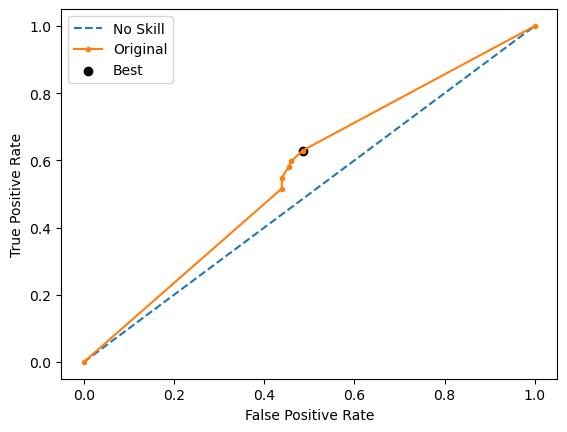

Run 2 - Random State: 1
Test G-mean: 0.5406455069516116
Best Threshold=1.000000, G-Mean=0.542


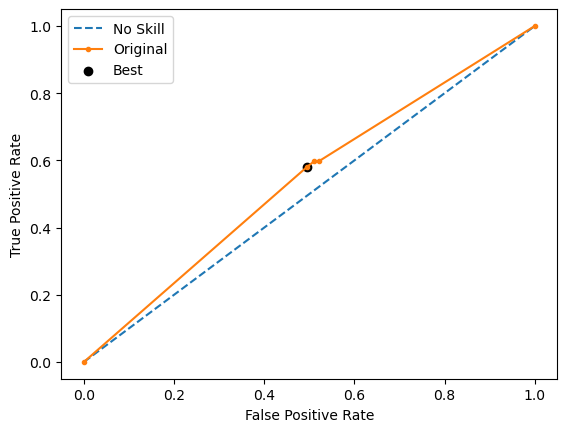

Run 3 - Random State: 2
Test G-mean: 0.5207984956529647
Best Threshold=1.000000, G-Mean=0.521


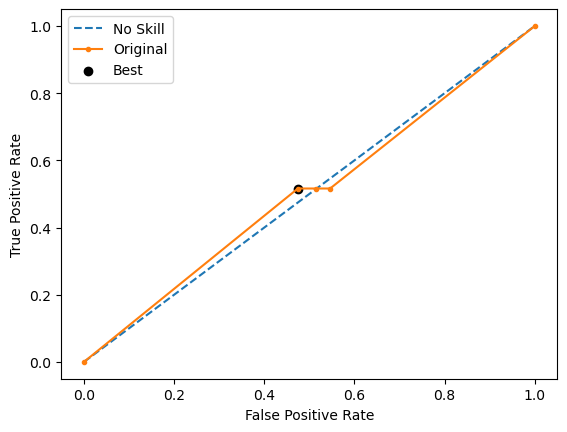

Run 4 - Random State: 3
Test G-mean: 0.5192952382191942
Best Threshold=0.666667, G-Mean=0.519


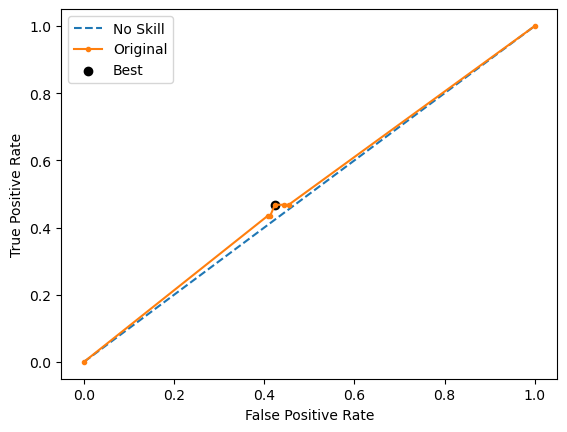

Run 5 - Random State: 4
Test G-mean: 0.5011507495082881
Best Threshold=0.333333, G-Mean=0.504


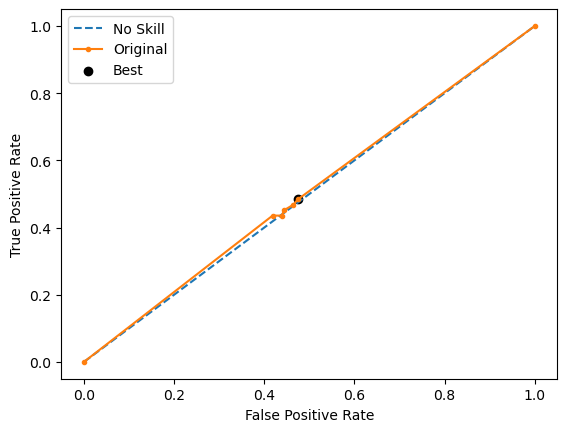

Ave Test G-mean: 0.5273317305133667
Stdev Test G-mean: 0.02075303590957556
Ave Test Specificity: 0.5418367346938775
Ave Test Recall: 0.5161290322580645
Ave Test NPV: 0.7802272668460961
Ave Test Accuracy: 0.5356589147286822
Ave Test Precision: 0.26236263166643997
Ave Test F1-Score: 0.34748983470757844
Ave Runtime: 0.0005245923995971679


In [129]:
ho_t02_dt_gs, ho_t02_dt_be, ho_t02_dt_model_info, ho_t02_dt_metrics_df = dt_class2(ho_t02, g_mean_scorer,
                                                            'home_ownership_class', random_state=0)

Fitting 10 folds for each of 1080 candidates, totalling 10800 fits
Best Hyperparameters: {'classifier__algorithm': 'SAMME', 'classifier__estimator': RandomForestClassifier(random_state=0), 'classifier__learning_rate': 0.01, 'classifier__n_estimators': 50, 'preprocessor': ColumnTransformer(transformers=[('num', 'passthrough',
                                 ['age', 'basicMonthlySalary',
                                  'preferredNetDisposableIncomeId',
                                  'workingFamilyCount', 'residentsCount',
                                  'monthlyFamilyIncome', 'food', 'hygiene',
                                  'houseCleaning', 'fare', 'parking',
                                  'gasoline', 'tuition', 'allowance', 'uniform',
                                  'otherEducation', 'emergency', 'medicine',
                                  'water', 'electricity', 'rent', 'repair',
                                  'cinema', 'dineOut', 'leisure',
                      

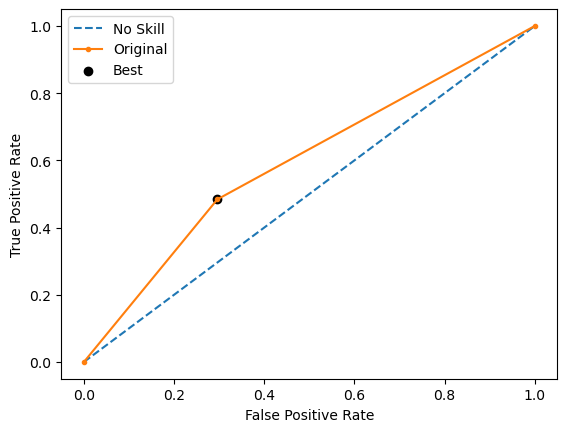

Run 2 - Random State: 1
Test G-mean: 0.5672369305256891
Best Threshold=0.731059, G-Mean=0.567


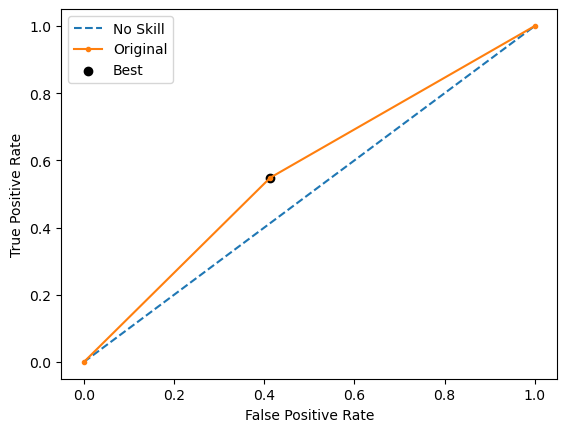

Run 3 - Random State: 2
Test G-mean: 0.5917331524983498
Best Threshold=0.731059, G-Mean=0.592


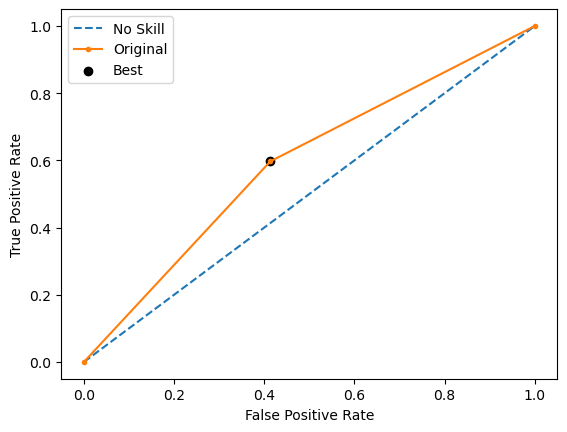

Run 4 - Random State: 3
Test G-mean: 0.6024144966768742
Best Threshold=0.731059, G-Mean=0.602


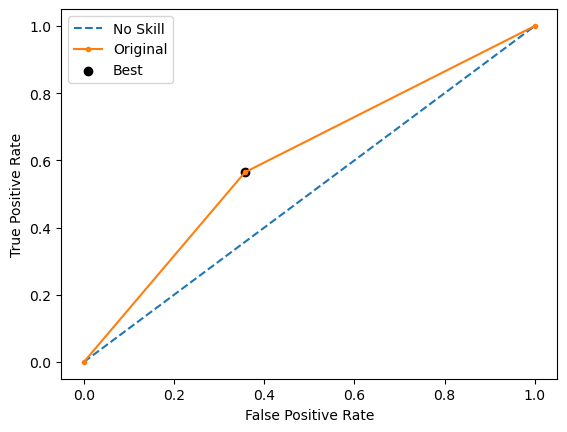

Run 5 - Random State: 4
Test G-mean: 0.5654206052395802
Best Threshold=0.731059, G-Mean=0.565


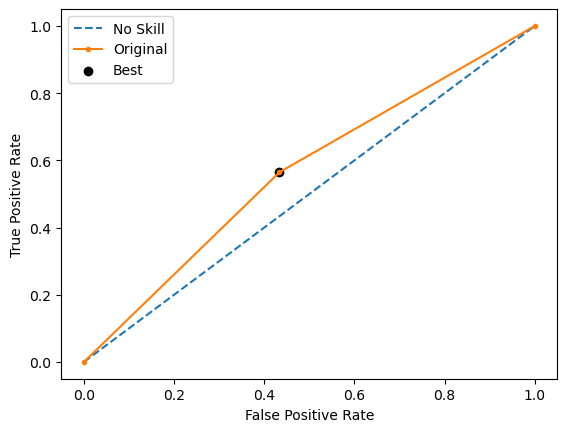

Ave Test G-mean: 0.582097434218981
Stdev Test G-mean: 0.015867357162898117
Ave Test Specificity: 0.6173469387755103
Ave Test Recall: 0.5516129032258064
Ave Test NPV: 0.8130532638716783
Ave Test Accuracy: 0.6015503875968993
Ave Test Precision: 0.31502411737120656
Ave Test F1-Score: 0.3998137926667308
Ave Runtime: 0.006936027208964029


In [134]:
ho_t02_adaboost_gs, ho_t02_adaboost_be, ho_t02_adaboost_model_info, ho_t02_adaboost_metrics_df = adaboost_class2(ho_t02, g_mean_scorer,
                                                            'home_ownership_class', random_state=0)

Fitting 10 folds for each of 360 candidates, totalling 3600 fits
Best Hyperparameters: {'classifier__algorithm': 'SAMME', 'classifier__estimator': DecisionTreeClassifier(random_state=0), 'classifier__learning_rate': 0.01, 'classifier__n_estimators': 50, 'resampling': RandomUnderSampler(random_state=0)}
Best Validation Score (G-mean): 0.5467743260116615
Best Estimator: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['age',
                                                   'preferredNetDisposableIncomeId',
                                                   'workingFamilyCount',
                                                   'residentsCount',
                                                   'monthlyFamilyIncome',
                                                   'food', 'hygiene',
                                                   'houseCleaning', 'fare',
                   

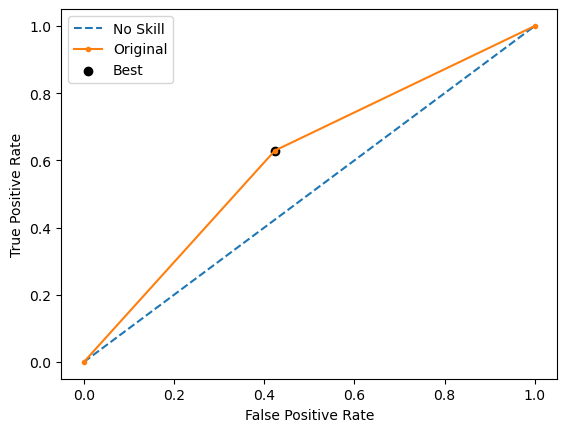

Run 2 - Random State: 1
Test G-mean: 0.5532833351724882
Best Threshold=0.731059, G-Mean=0.553


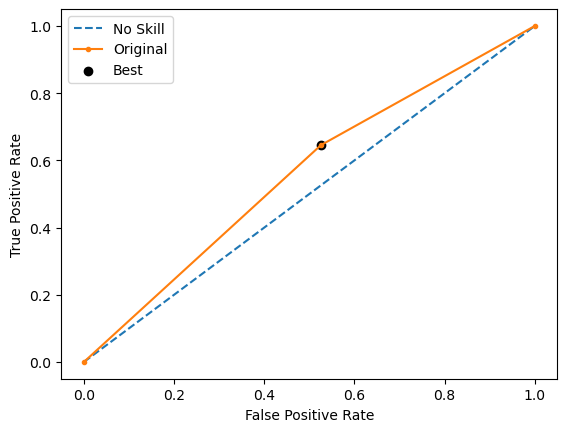

Run 3 - Random State: 2
Test G-mean: 0.40548413021370877
Best Threshold=0.731059, G-Mean=0.405


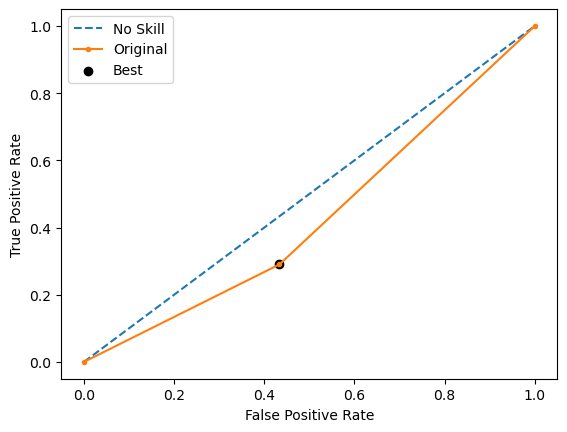

Run 4 - Random State: 3
Test G-mean: 0.5471513397087642
Best Threshold=0.731059, G-Mean=0.547


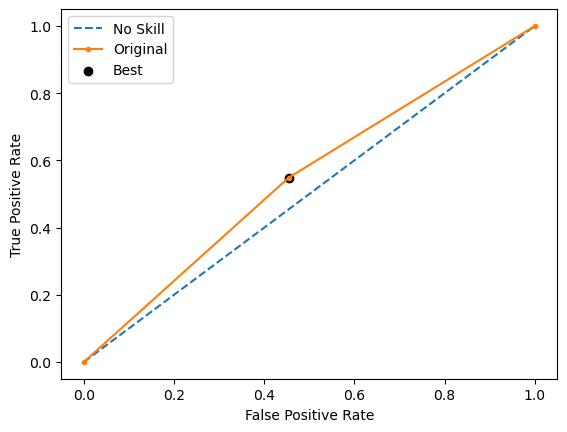

Run 5 - Random State: 4
Test G-mean: 0.552539174331112
Best Threshold=0.731059, G-Mean=0.553


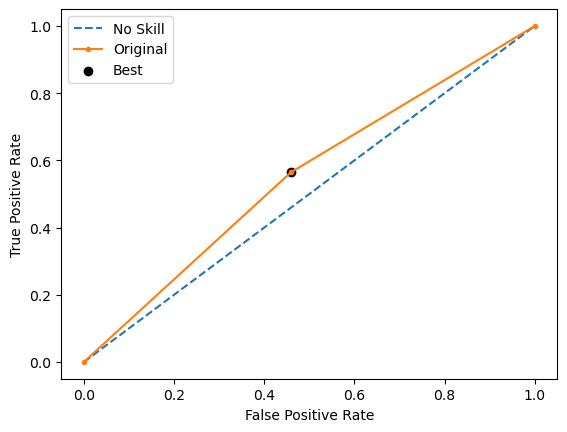

Ave Test G-mean: 0.5321335076707265
Stdev Test G-mean: 0.0742293060124036
Ave Test Specificity: 0.5408163265306123
Ave Test Recall: 0.5354838709677419
Ave Test NPV: 0.7890584222337509
Ave Test Accuracy: 0.5395348837209303
Ave Test Precision: 0.2661144913297723
Ave Test F1-Score: 0.3548475764937621
Ave Runtime: 0.0002875502904256185


In [152]:
ho_t03_adaboost_gs, ho_t03_adaboost_be, ho_t03_adaboost_model_info, ho_t03_adaboost_metrics_df = adaboost_class2(ho_t02.drop(columns=['basicMonthlySalary']), g_mean_scorer,
                                                            'home_ownership_class', random_state=0)

In [147]:
ho_t03_ridge_gs, ho_t03_ridge_be, ho_t03_ridge_model_info, ho_t03_ridge_metrics_df = ridge_class2(ho_t02[['userId', 'lastFirstName', 'basicMonthlySalary', 'home_ownership_class']], g_mean_scorer,
                                                            'home_ownership_class', random_state=0)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits
Best Hyperparameters: {'classifier__alpha': 0.01, 'classifier__solver': 'auto', 'resampling': ADASYN(random_state=0)}
Best Validation Score (G-mean): 0.5679476216202327
Best Estimator: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['basicMonthlySalary'])])),
                ('resampling', ADASYN(random_state=0)),
                ('var_threshold', VarianceThreshold(threshold=0.15)),
                ('classifier',
                 RidgeClassifier(alpha=0.01, max_iter=1000, random_state=0))])
Mean Train Score (G-mean) 0.4360402993112355
Std Train Score (G-mean) 0.03245403809048352
GridSearchCV Runtime: 4.171808958053589 secs
Run 1 - Random State: 0
Test G-mean: 0.6468132241526726
Run 2 - Random State: 1
Test G-mean: 0.5550652506880571
Run 3 - Random State: 2
Test G-mean: 0.6347413981520182
Run 4 - Random State: 3
Test

In [149]:
ho_t03_svm_gs, ho_t03_svm_be, ho_t03_svm_model_info, ho_t03_svm_metrics_df = svm_class2(ho_t02[['userId', 'lastFirstName', 'basicMonthlySalary', 'home_ownership_class']], g_mean_scorer,
                                                            'home_ownership_class', random_state=0)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
Best Hyperparameters: {'classifier__C': 10, 'classifier__kernel': 'rbf', 'resampling': RandomUnderSampler(random_state=0)}
Best Validation Score (G-mean): 0.5866796190384981
Best Estimator: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['basicMonthlySalary'])])),
                ('resampling', RandomUnderSampler(random_state=0)),
                ('var_threshold', VarianceThreshold(threshold=0.15)),
                ('classifier', SVC(C=10, max_iter=1000, random_state=0))])
Mean Train Score (G-mean) 0.31659857645386935
Std Train Score (G-mean) 0.0773419277200123
GridSearchCV Runtime: 6.9478631019592285 secs
Run 1 - Random State: 0
Test G-mean: 0.656661815518841
Run 2 - Random State: 1
Test G-mean: 0.6071767407189163
Run 3 - Random State: 2
Test G-mean: 0.6257319611164248
Run 4 - Random State: 3
Test G-mean: 0.5962357

In [150]:
ho_t03_svm_gs, ho_t03_svm_be, ho_t03_svm_model_info, ho_t03_svm_metrics_df = svm_class2(ho_t02, g_mean_scorer,
                                                            'home_ownership_class', random_state=0)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
Best Hyperparameters: {'classifier__C': 1, 'classifier__kernel': 'rbf', 'resampling': ADASYN(random_state=0)}
Best Validation Score (G-mean): 0.5686022303818807
Best Estimator: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['age', 'basicMonthlySalary',
                                                   'preferredNetDisposableIncomeId',
                                                   'workingFamilyCount',
                                                   'residentsCount',
                                                   'monthlyFamilyIncome',
                                                   'food', 'hygiene',
                                                   'houseCleaning', 'fare',
                                                   'parking', 'gasoline',
                                                   '

In [151]:
ho_t02[ho_t02['home_ownership_class'] == 1]

userId            lastFirstName   age  gender      province  \
0       370.0            IBALI, HOWARD  24.0    MALE  METRO MANILA   
3      1719.0           OSCARES, ELMER  32.0    MALE       UNKNOWN   
9      4090.0        MILLARES, LEONORA  42.0  FEMALE       ISABELA   
11     4568.0        MORENO, GWENDOLYN  36.0  FEMALE  METRO MANILA   
13     5382.0          SOL, MARY GRACE  41.0  FEMALE         RIZAL   
...       ...                      ...   ...     ...           ...   
1031  12795.0              SY, ARMANDO  43.0    MALE  METRO MANILA   
1044  12815.0  DELA CRUZ, EDWARD EROLL  37.0    MALE        CAVITE   
1045  12816.0           TORRES, EUGENE  42.0    MALE  METRO MANILA   
1049  12820.0          DOLOTINA, AMIEL  28.0    MALE  METRO MANILA   
1055  12834.0        BAGUNDOL, GINALYN  35.0  FEMALE  METRO MANILA   

                         job  basicMonthlySalary  \
0          SERVICE AND SALES             19000.0   
3           MACHINE OPERATOR             21200.0   
9          SERVICE AND SALES             40000.0   
11                   MANAGER             30500.0   
13          CLERICAL SUPPORT             30000.0   
...                      ...                 ...   
1031                 MANAGER             27858.0   
1044  ASSOCIATE PROFESSIONAL             30000.0   
1045       SERVICE AND SALES                 0.0   
1049  ASSOCIATE PROFESSIONAL             18500.0   
1055        CLERICAL SUPPORT             35000.0   

      preferredNetDisposableIncomeId  workingFamilyCount  residentsCount  \
0                                2.0                 3.0             3.0   
3                                2.0                 0.0             5.0   
9                                3.0                 2.0             4.0   
11                               3.0                 1.0             6.0   
13                               2.0                 2.0            10.0   
...                              ...                 ...             ...   
1031                             2.0                 1.0             4.0   
1044                             3.0                 2.0             3.0   
1045                             2.0                 1.0             1.0   
1049                             2.0                 5.0             7.0   
1055                             3.0                 2.0             4.0   

      monthlyFamilyIncome     food  hygiene  houseCleaning    fare  parking  \
0                 40000.0   1000.0    500.0          200.0   200.0      0.0   
3                 12000.0   2000.0    500.0          200.0   392.0      0.0   
9                 43000.0   5000.0   1500.0         1000.0   500.0      0.0   
11                60000.0  12000.0    500.0          200.0     0.0      0.0   
13                56000.0  10000.0    500.0         1000.0  2000.0    100.0   
...                   ...      ...      ...            ...     ...      ...   
1031              28000.0   6000.0   1500.0         1500.0  1000.0   3500.0   
1044              60000.0   4000.0   1000.0         1000.0     0.0    400.0   
1045              30000.0      0.0      0.0            0.0     0.0      0.0   
1049              18500.0   4000.0   2000.0          500.0     0.0      0.0   
1055              48000.0   5000.0   2000.0          500.0   150.0    100.0   

      gasoline  tuition  allowance  uniform  otherEducation  emergency  \
0          0.0      0.0       50.0      0.0             0.0      500.0   
3          0.0      0.0        0.0      0.0             0.0      100.0   
9          0.0   1500.0     3500.0   1000.0             0.0     1500.0   
11      2000.0      0.0        0.0      0.0             0.0        0.0   
13       900.0   1000.0     2000.0      0.0           500.0      500.0   
...        ...      ...        ...      ...             ...        ...   
1031    2500.0      0.0     1000.0   1000.0          1000.0      500.0   
1044    1000.0      0.0        0.0      0.0             0.0        0.0   
1045       0.

In [153]:
ho_t01

userId          lastFirstName  age  gender      province  \
0        370          IBALI, HOWARD   24    MALE  METRO MANILA   
1       1025  PATALINGHOG, KIMBERLY   26  FEMALE  METRO MANILA   
2       1105      TEMILLOSO, DENNIS   40    MALE  METRO MANILA   
3       1719         OSCARES, ELMER   32    MALE       UNKNOWN   
4       2081         LEGASPI, MANNY   39    MALE  METRO MANILA   
...      ...                    ...  ...     ...           ...   
1065   12850         LIPANGO, ARVIN   34    MALE  METRO MANILA   
1066   12852          TEJADA, JERIC   27    MALE        LAGUNA   
1067   12853         RAMOS, RHEALYN   27  FEMALE        CAVITE   
1068   12854         BURGOS, LIEZEL   48  FEMALE        ILOILO   
1069   12857     SEÑERES, JENNY MAE   24  FEMALE  METRO MANILA   

                         job  basicMonthlySalary  \
0          SERVICE AND SALES               19000   
1          SERVICE AND SALES               15000   
2          SERVICE AND SALES               20000   
3           MACHINE OPERATOR               21200   
4           CLERICAL SUPPORT               19800   
...                      ...                 ...   
1065  ASSOCIATE PROFESSIONAL               19000   
1066         CRAFT AND TRADE               20000   
1067       SERVICE AND SALES               13962   
1068       SERVICE AND SALES               51000   
1069       SERVICE AND SALES               98800   

      preferredNetDisposableIncomeId  workingFamilyCount  residentsCount  \
0                                  2                   3               3   
1                                  3                   2               4   
2                                  2                   0               3   
3                                  2                   0               5   
4                                  2                   0               0   
...                              ...                 ...             ...   
1065                               2                   2               4   
1066                               2                   1               1   
1067                               1                   2               4   
1068                               2                   0               5   
1069                               3                   3               3   

      monthlyFamilyIncome  food  hygiene  houseCleaning  fare  parking  \
0                 40000.0  1000      500            200   200        0   
1                 30000.0  5000     3000           2000  2000        0   
2                 30000.0  3000      500            300   200       50   
3                 12000.0  2000      500            200   392        0   
4                 25000.0  5000     2000           1000  1500        0   
...                   ...   ...      ...            ...   ...      ...   
1065              19000.0  5000     1000           1000     1        1   
1066              20000.0  5000      500            400   280        0   
1067              40000.0     4        2              1     3        1   
1068              51000.0  5000     3000           1500  2000        0   
1069             143800.0  7000     3000           2000     0        0   

      gasoline  tuition  allowance  uniform  otherEducation  emergency  \
0            0        0         50        0               0        500   
1            0        0          0        0               0       2000   
2           50      500        100      100              50        500   
3            0        0          0        0               0        100   
4            0     1000        500     1500               0          0   
...        ...      ...        ...      ...             ...        ...   
1065         1     1000        500        1            1000       1000   
1066         0        0          0        0               0          0   
1067         1        0          0        0               0      30000   
1068         0    15000       9000        0   

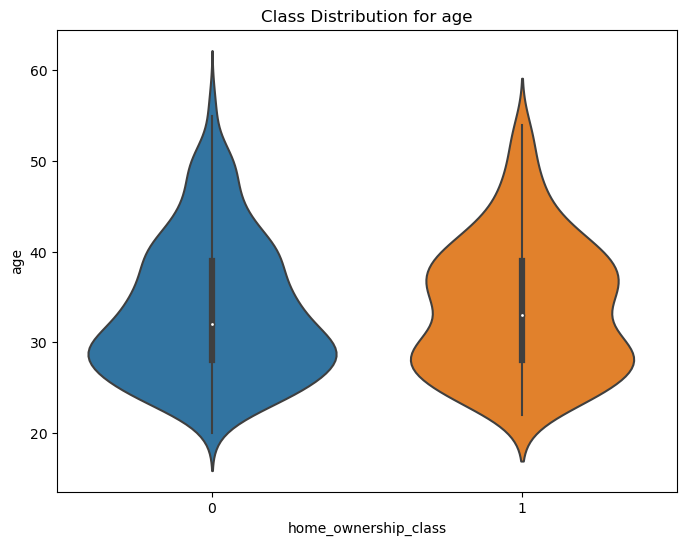

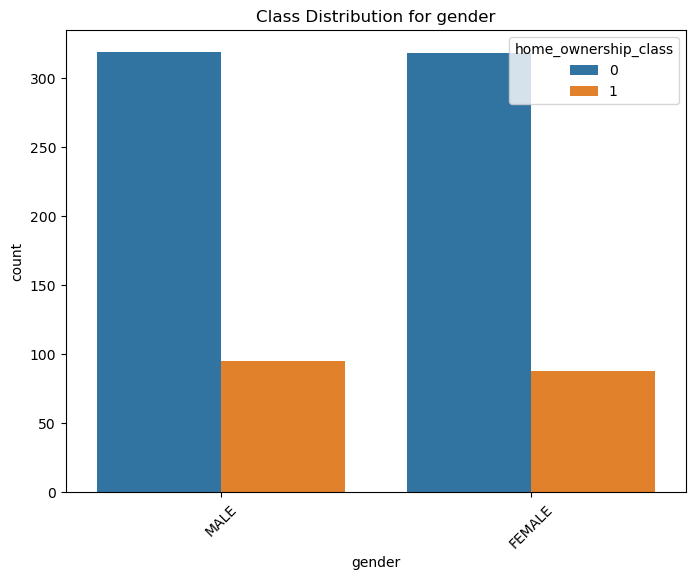

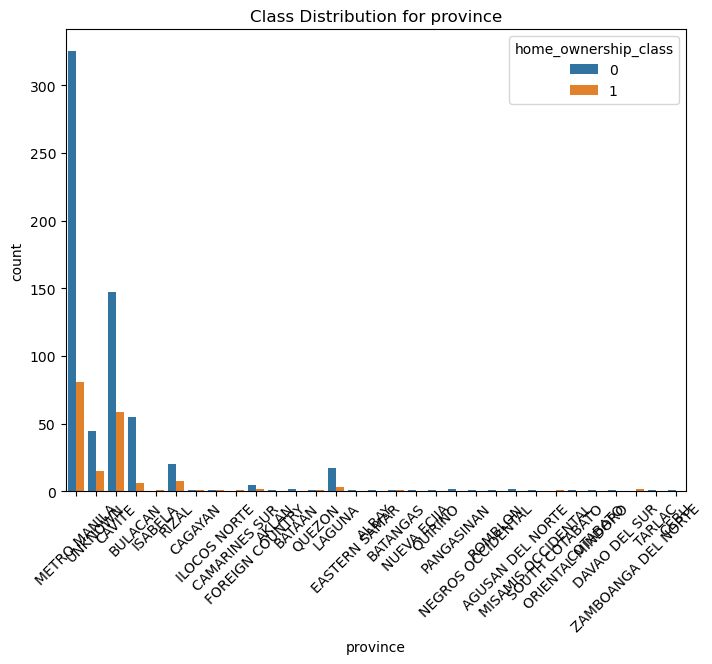

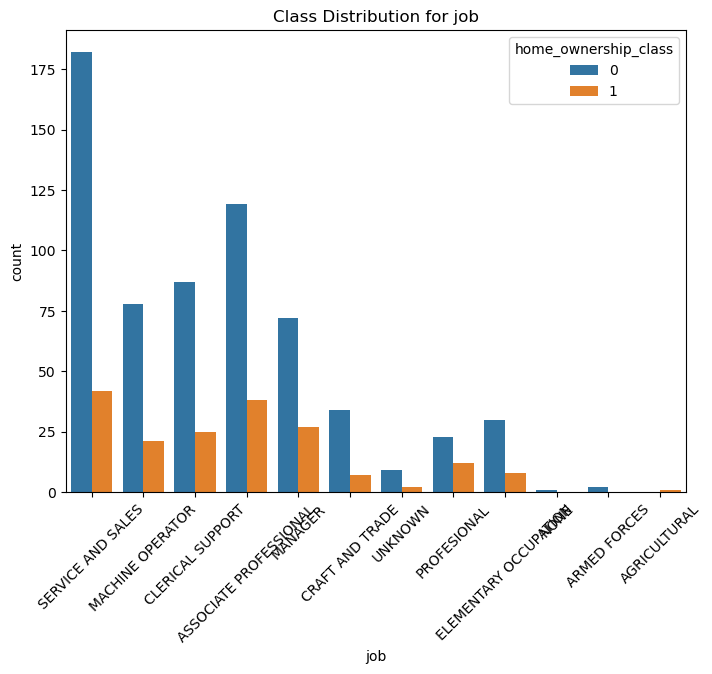

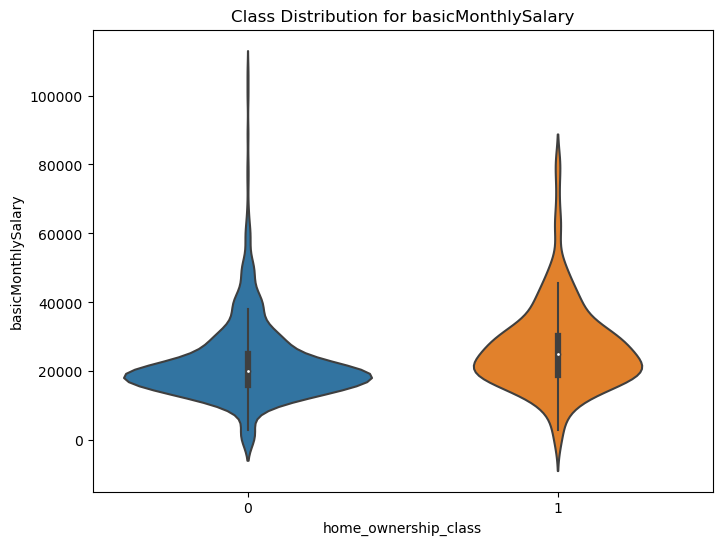

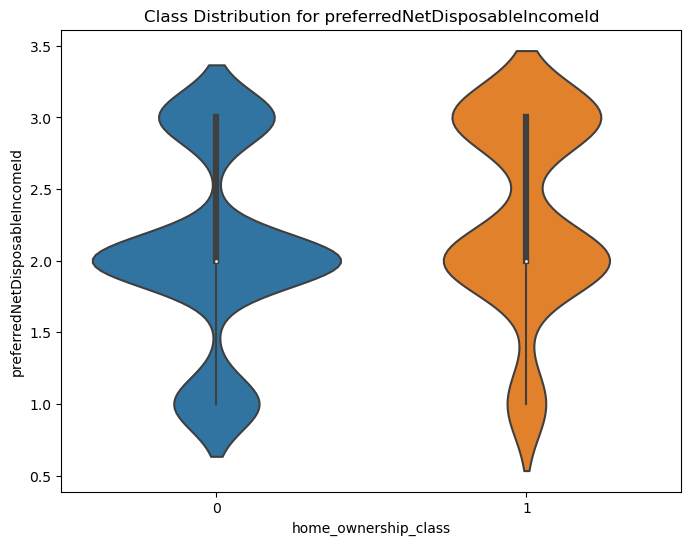

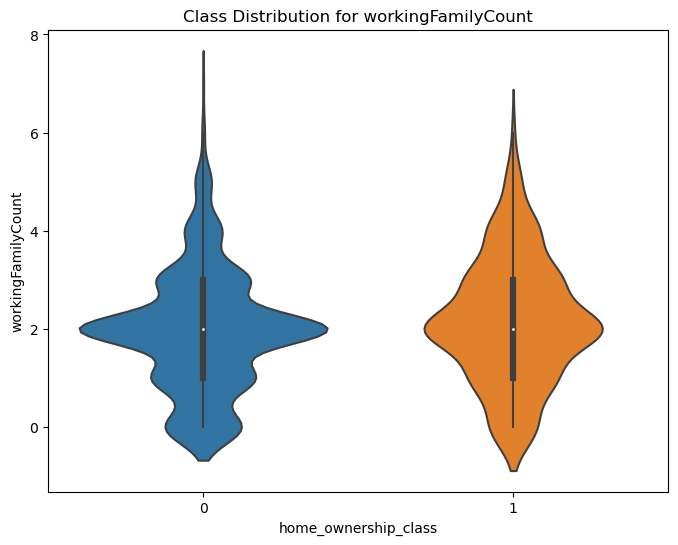

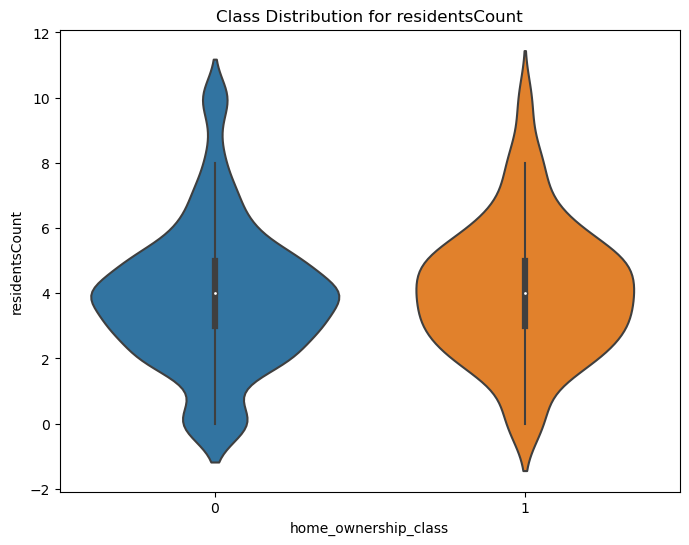

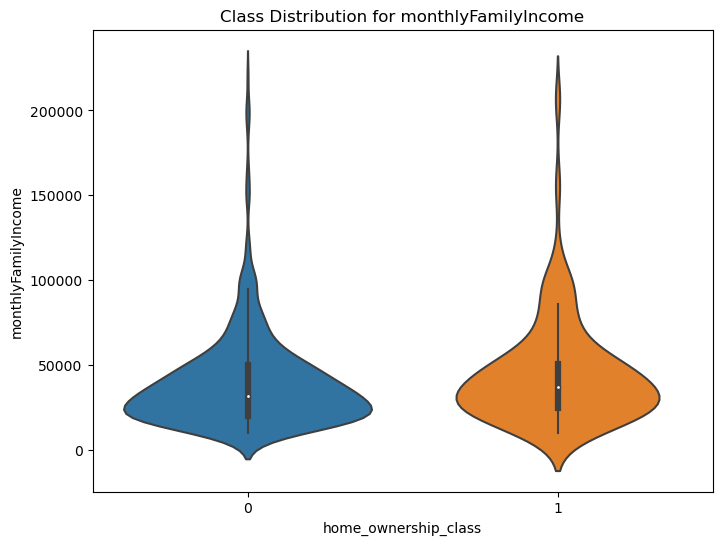

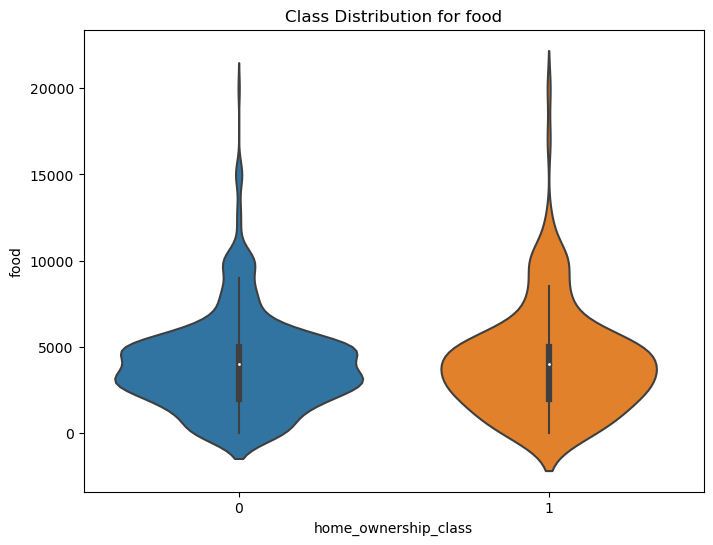

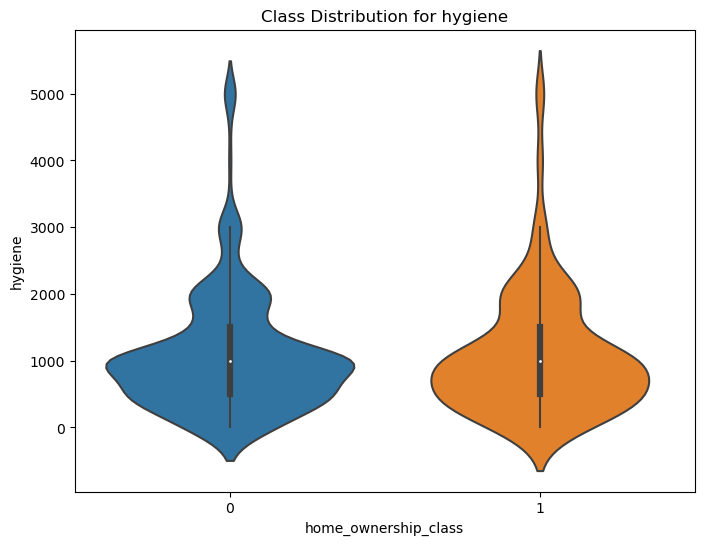

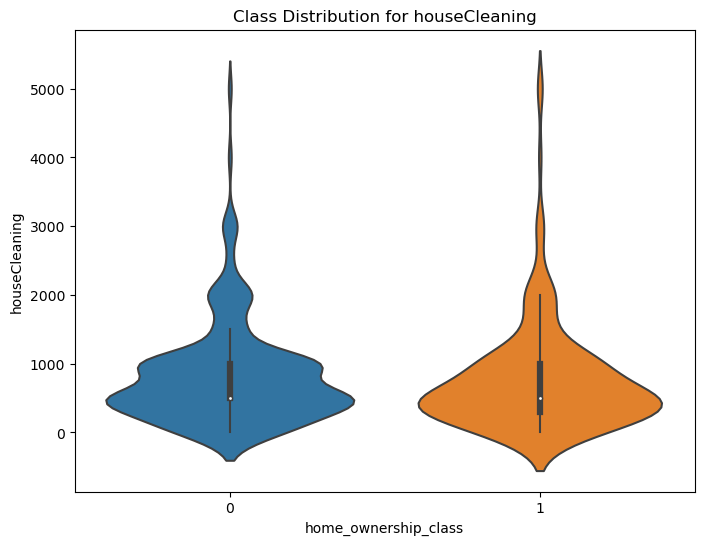

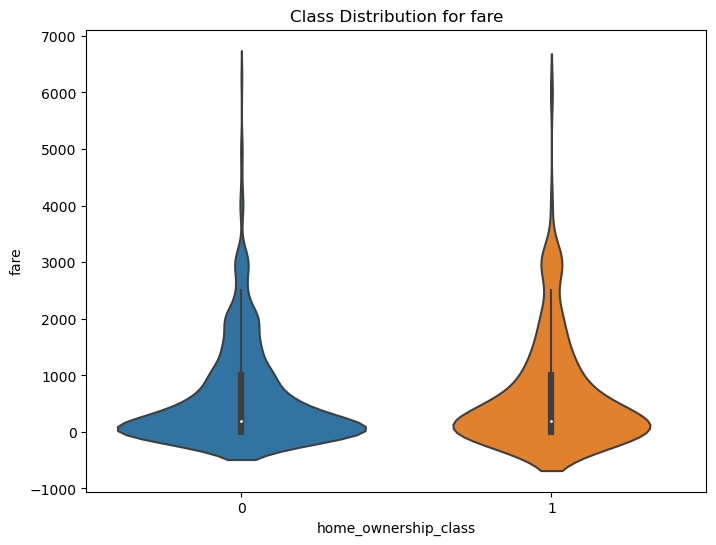

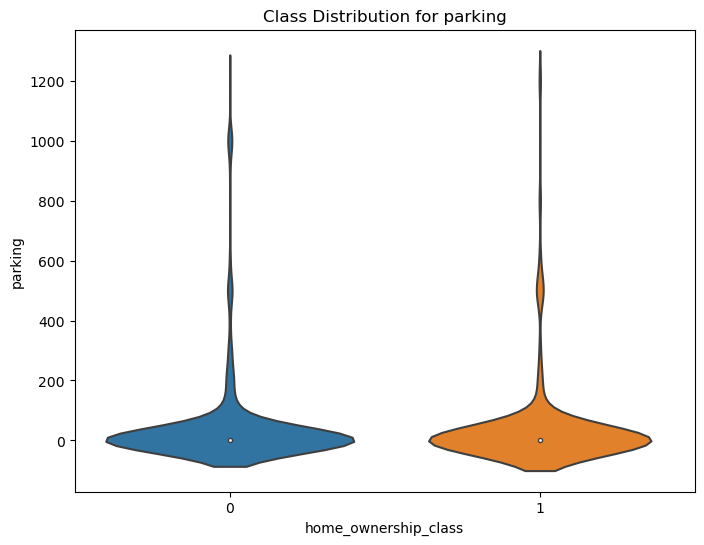

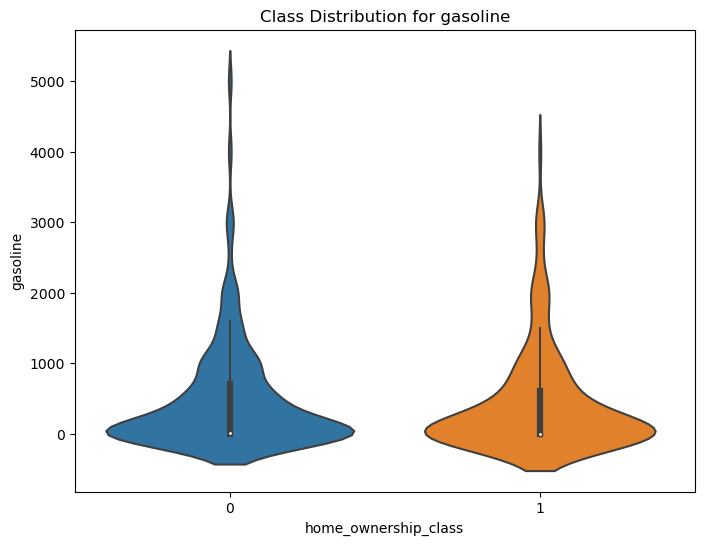

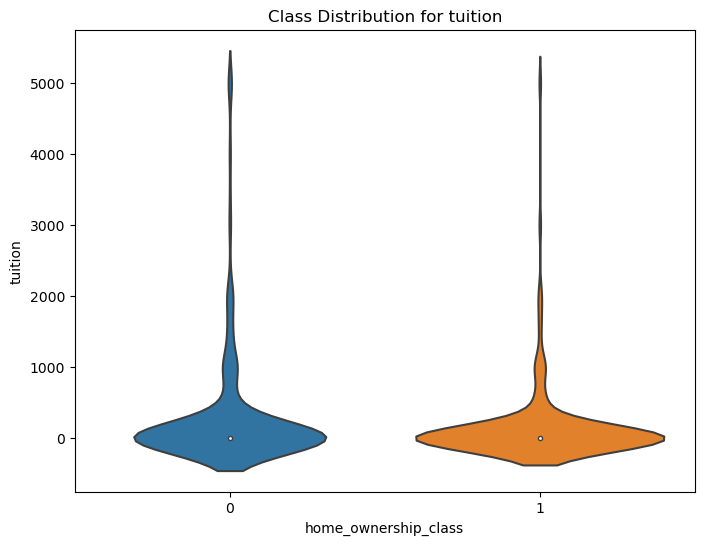

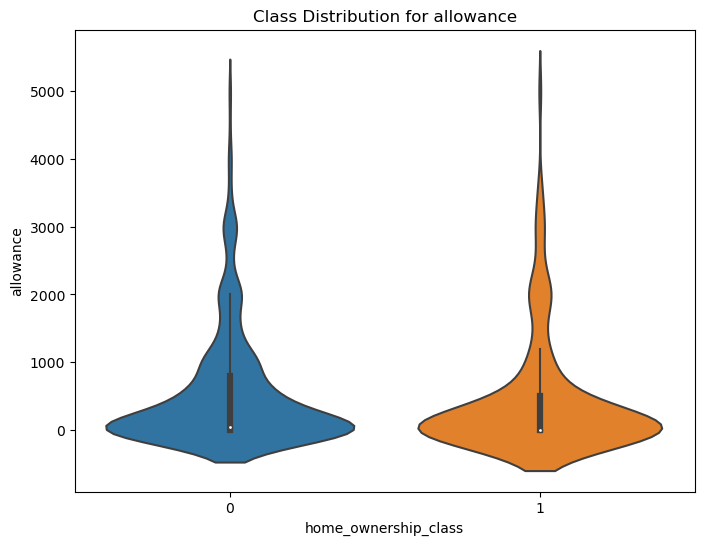

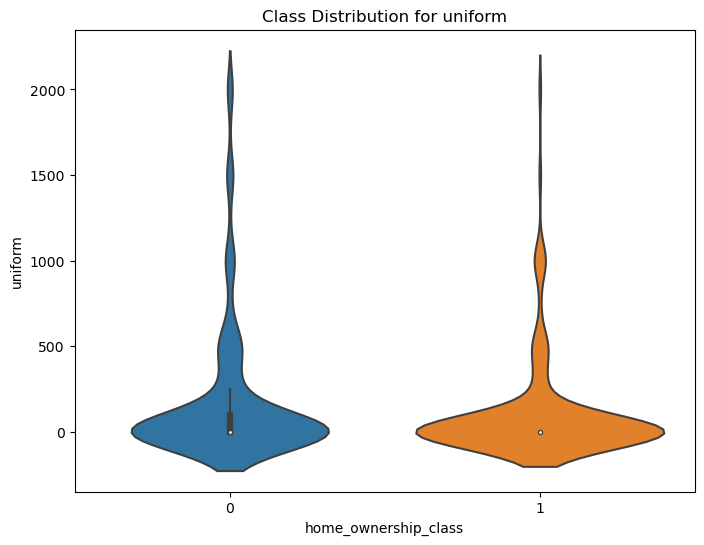

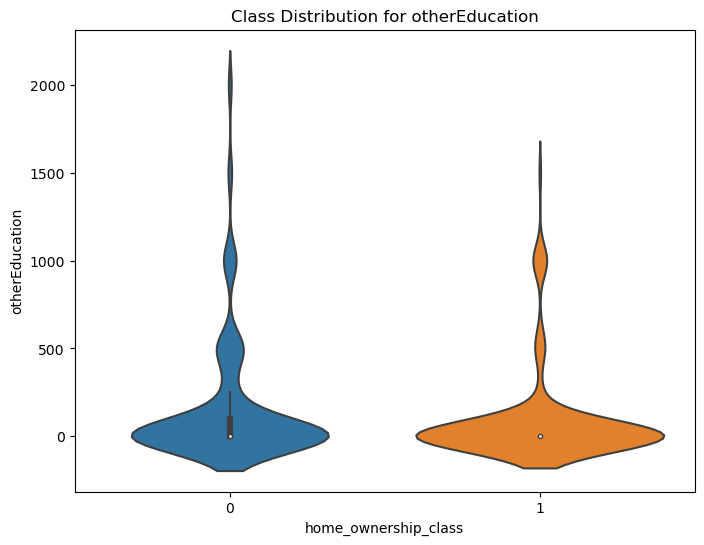

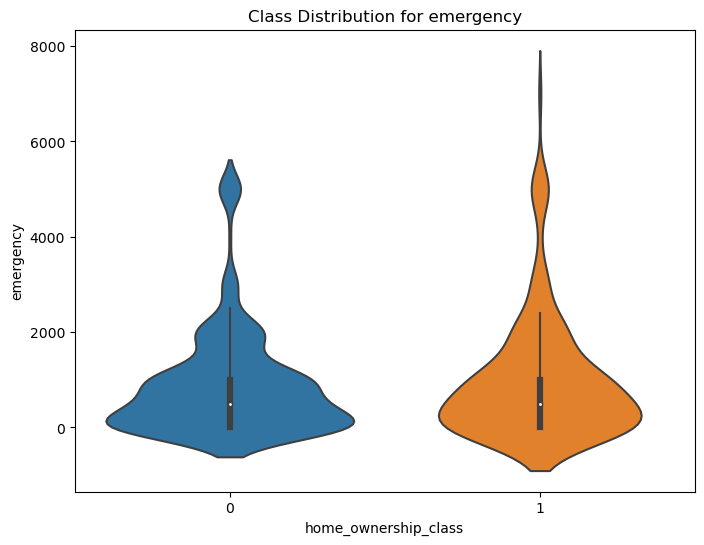

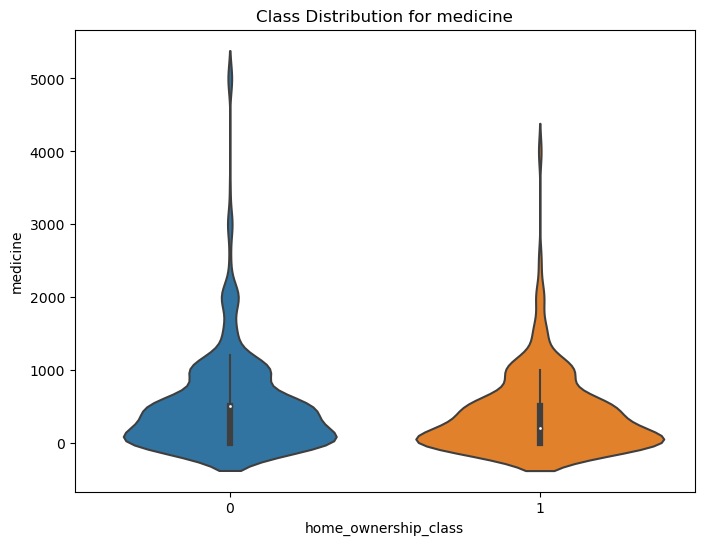

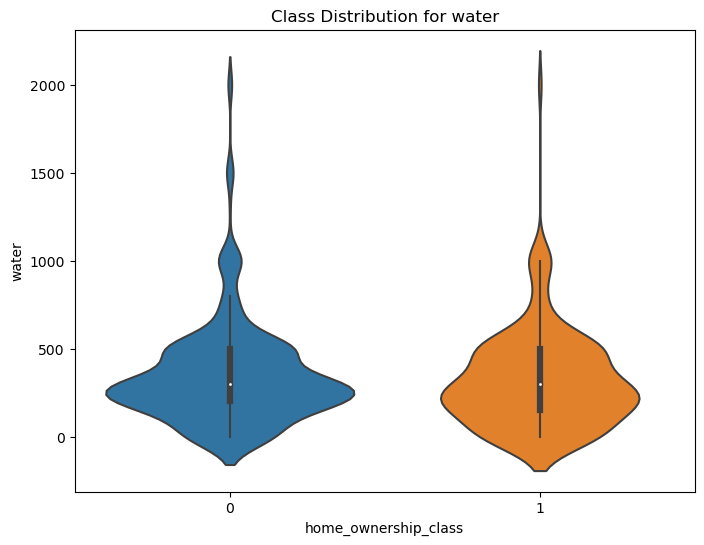

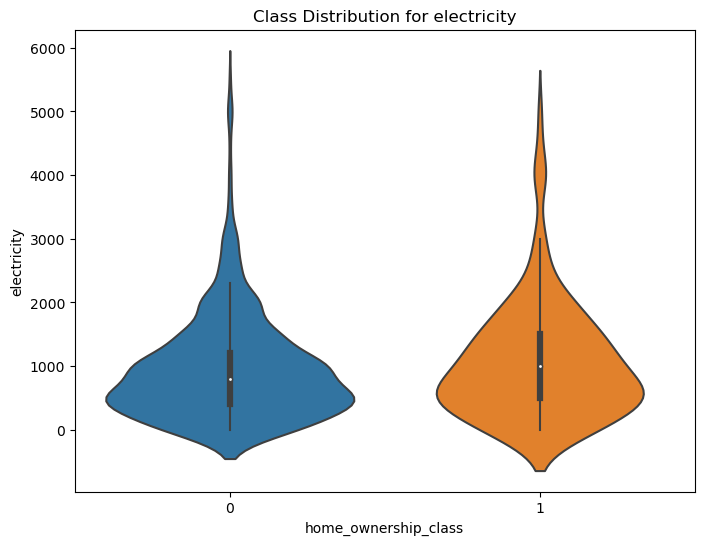

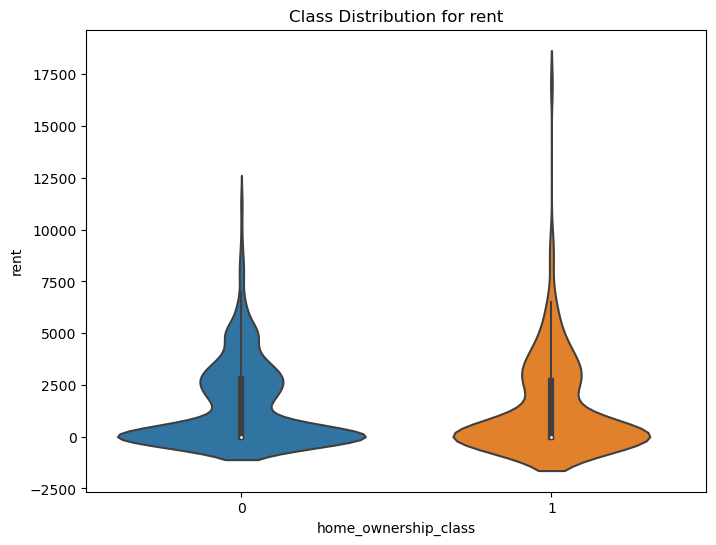

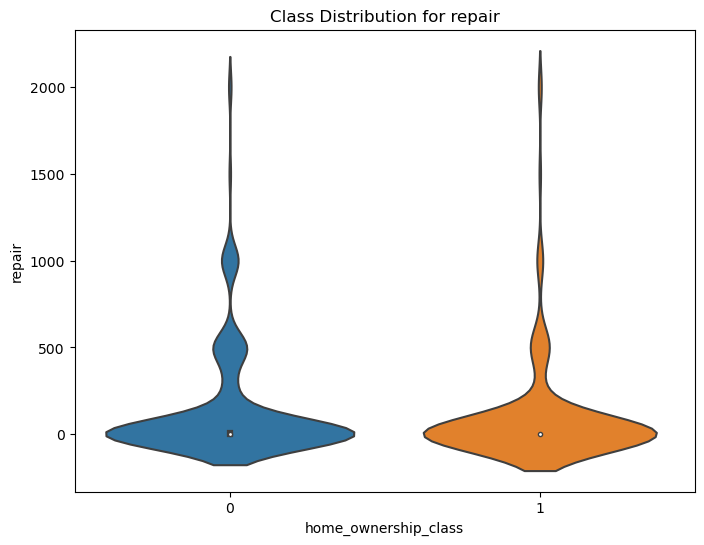

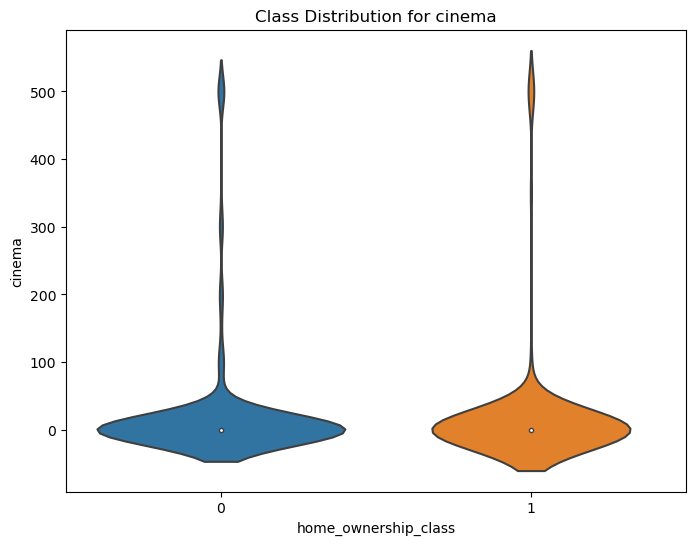

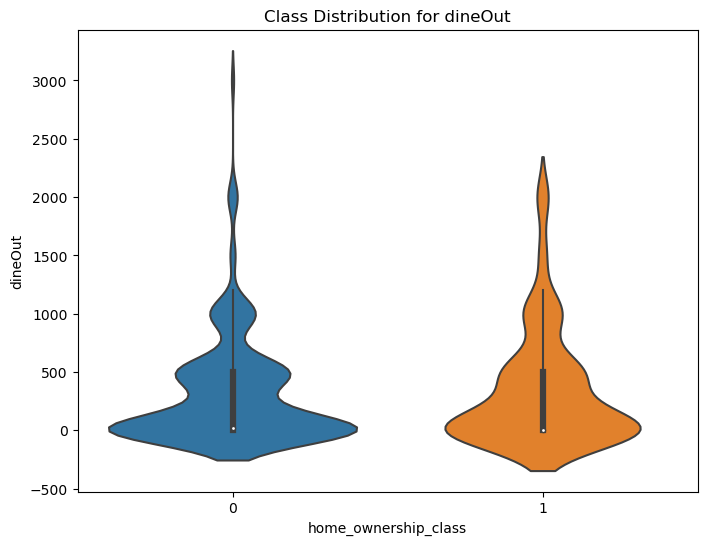

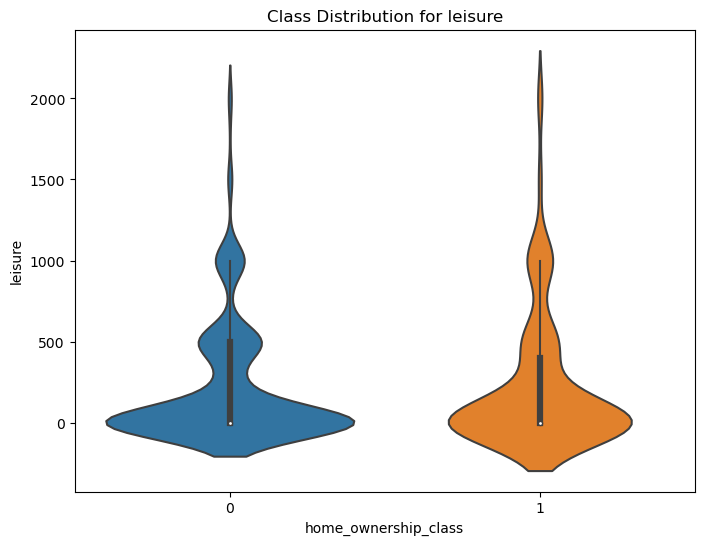

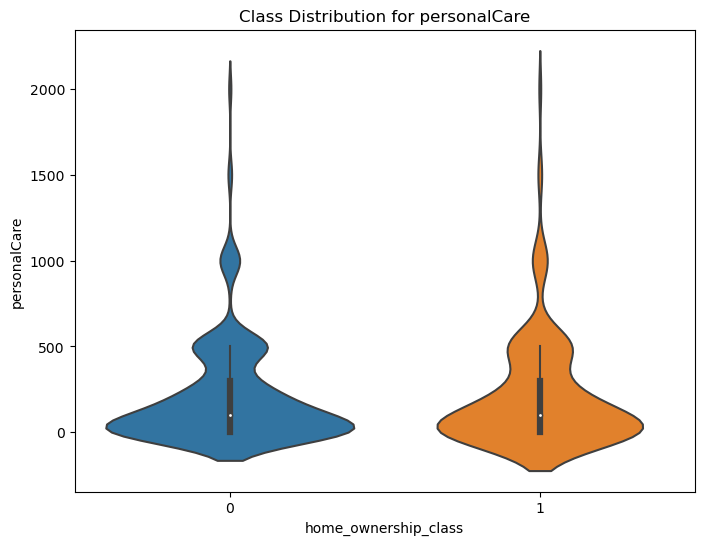

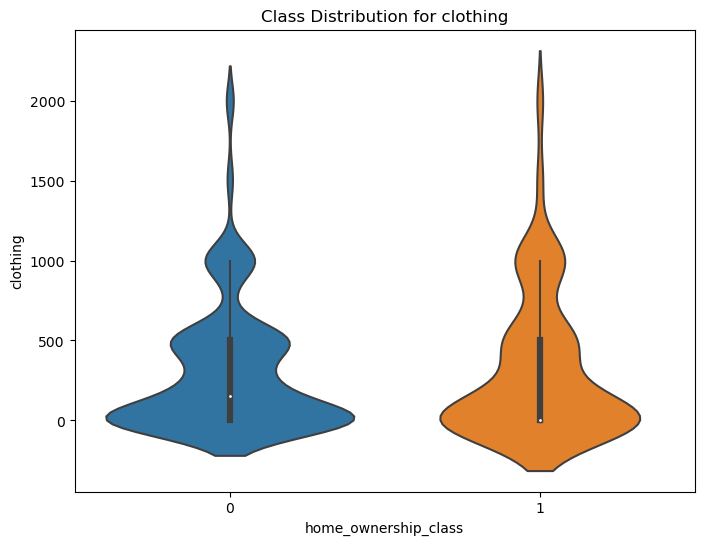

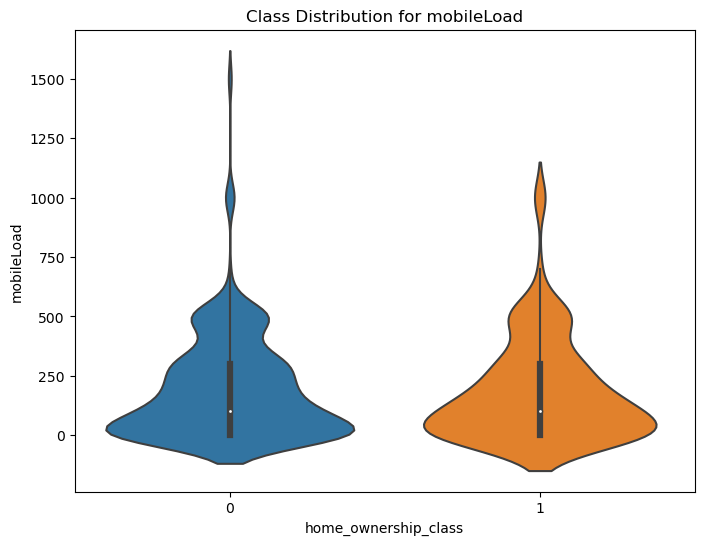

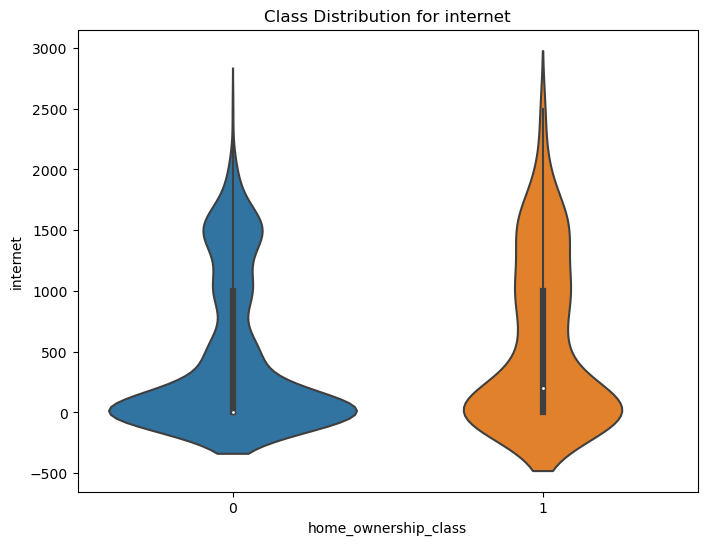

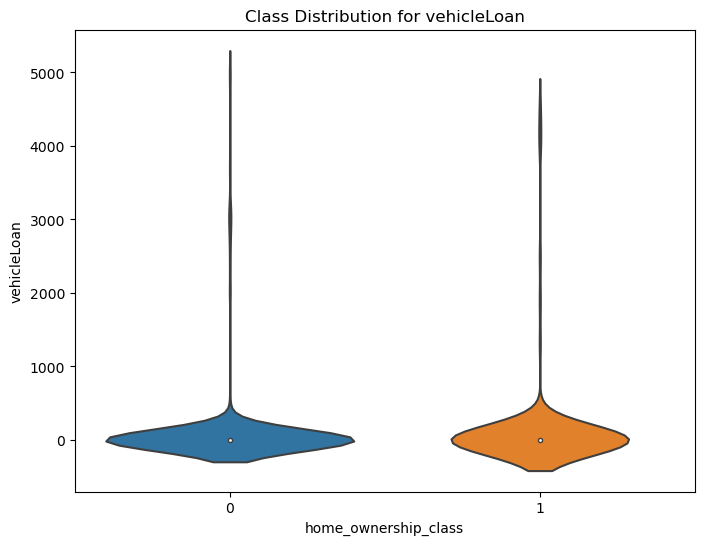

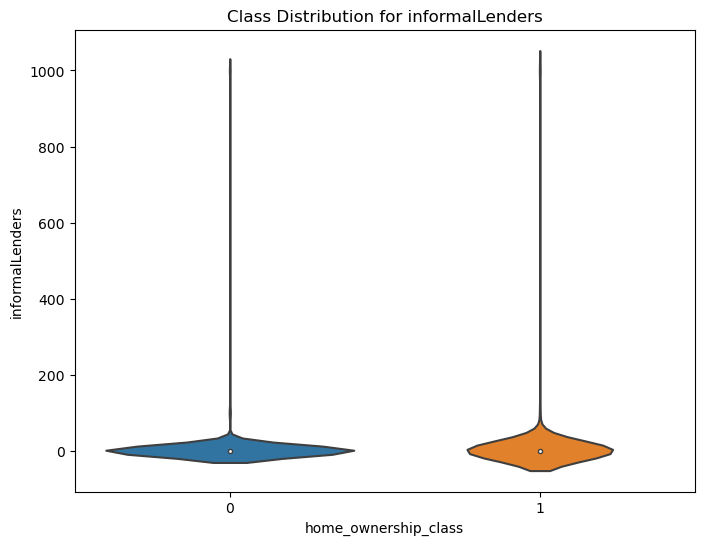

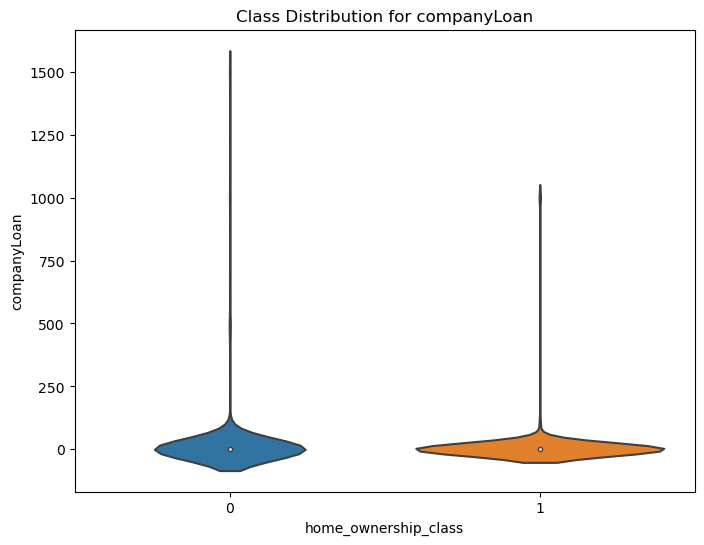

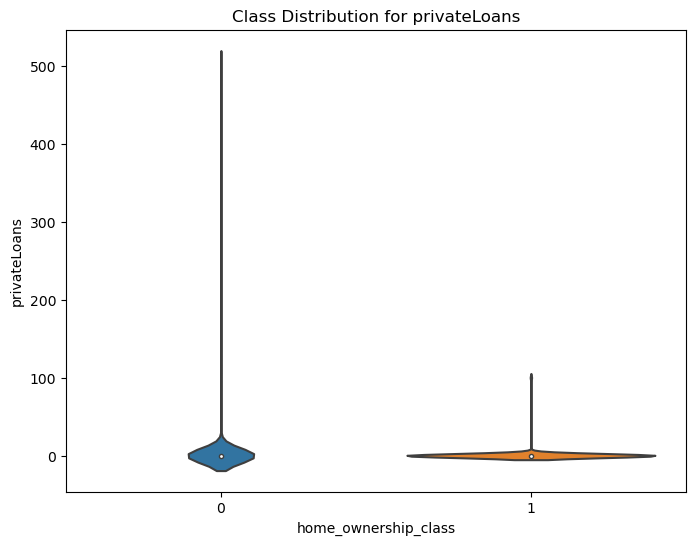

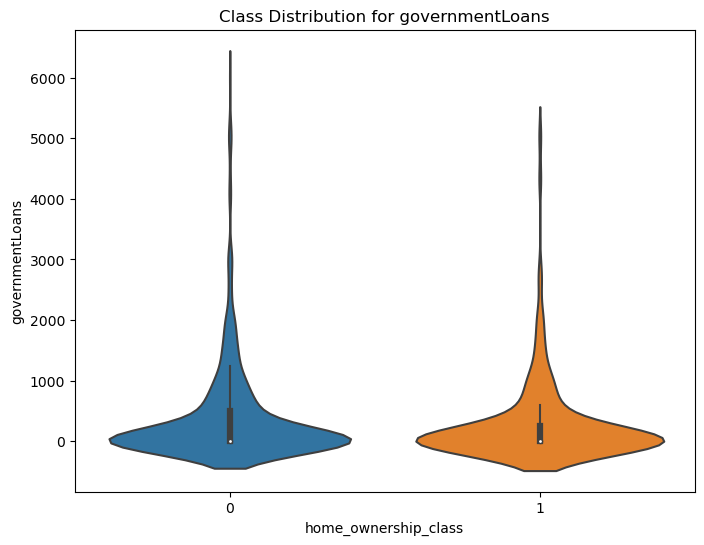

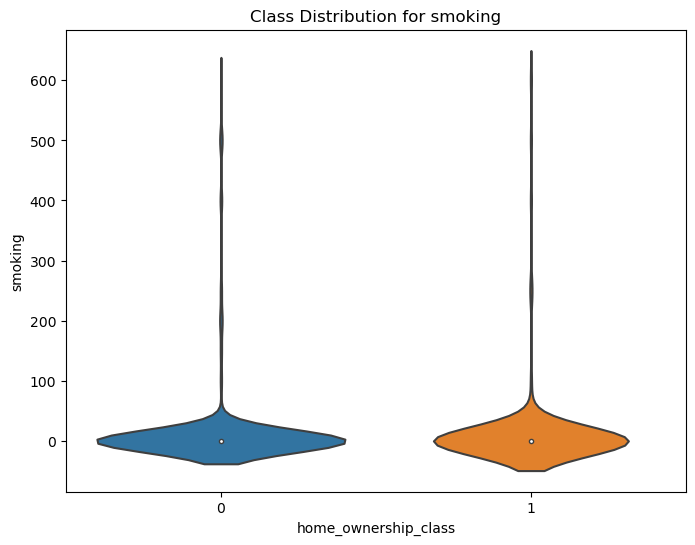

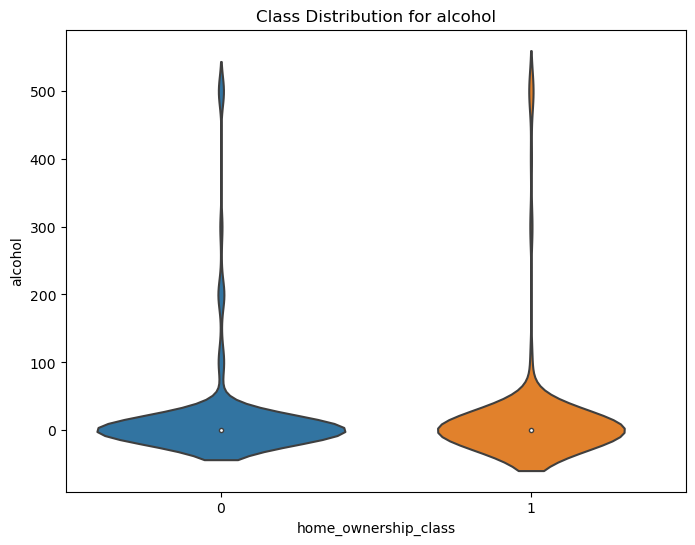

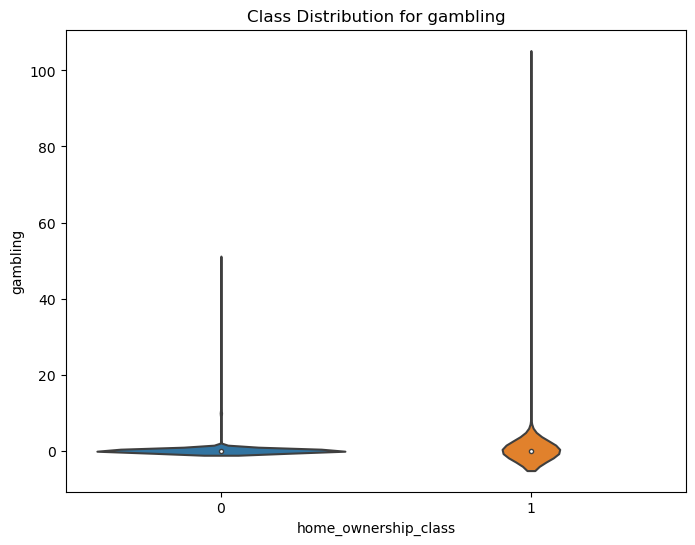

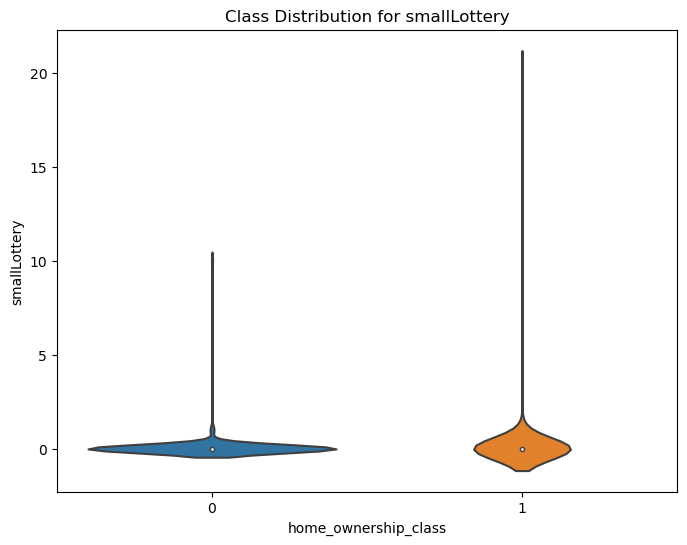

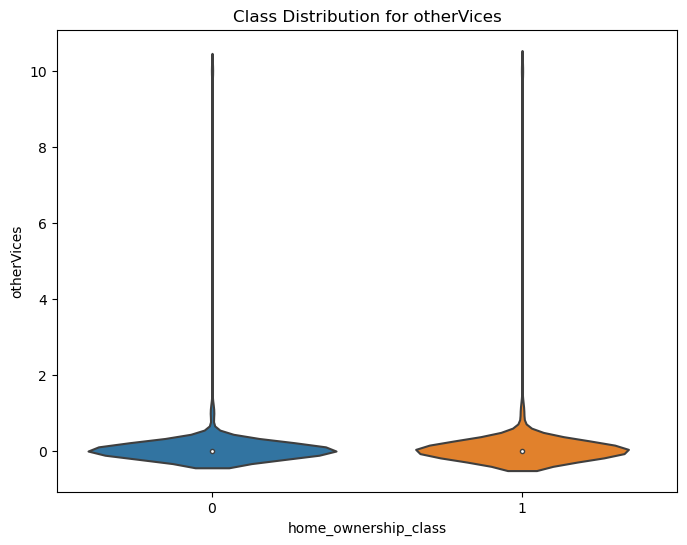

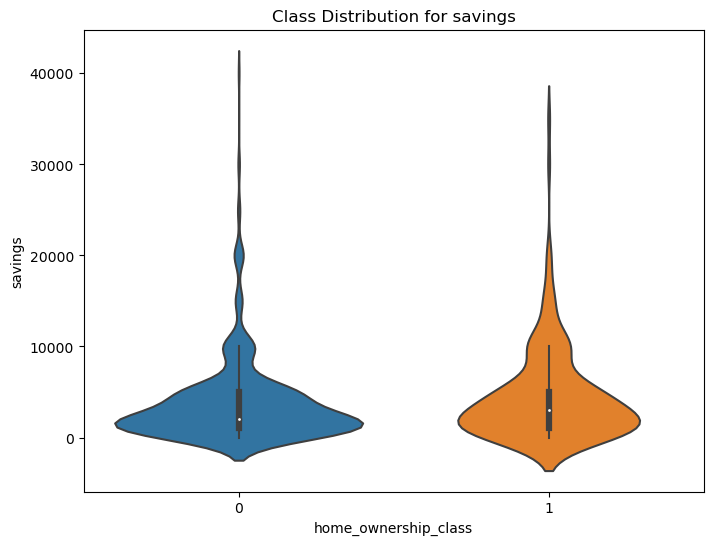

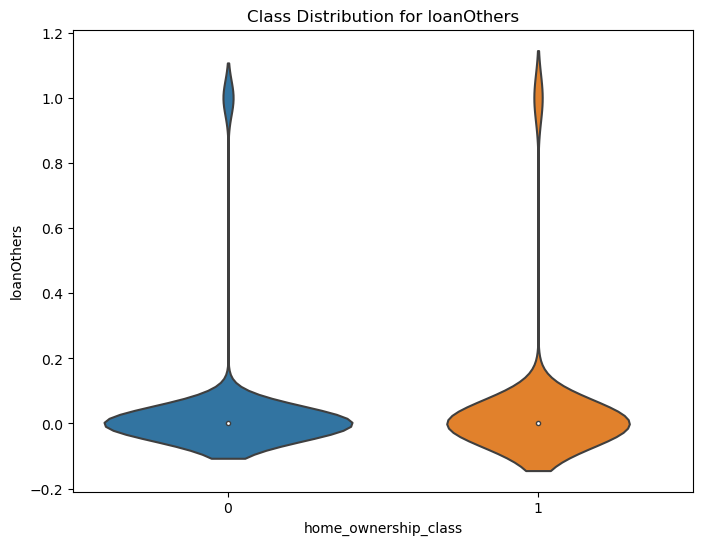

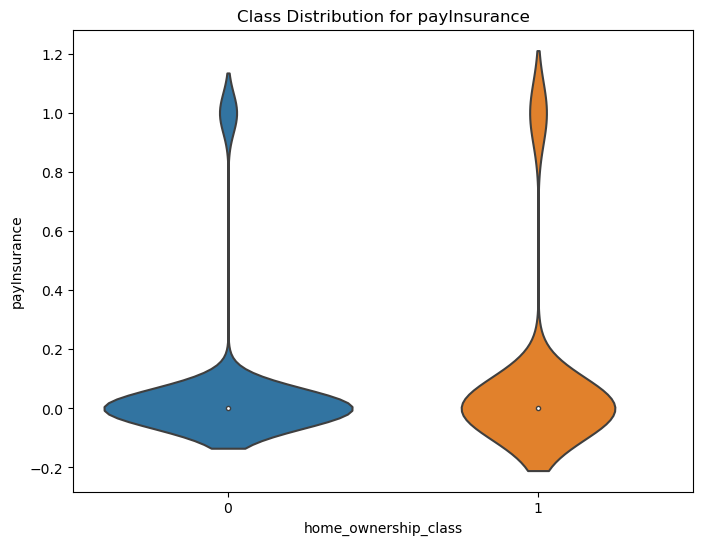

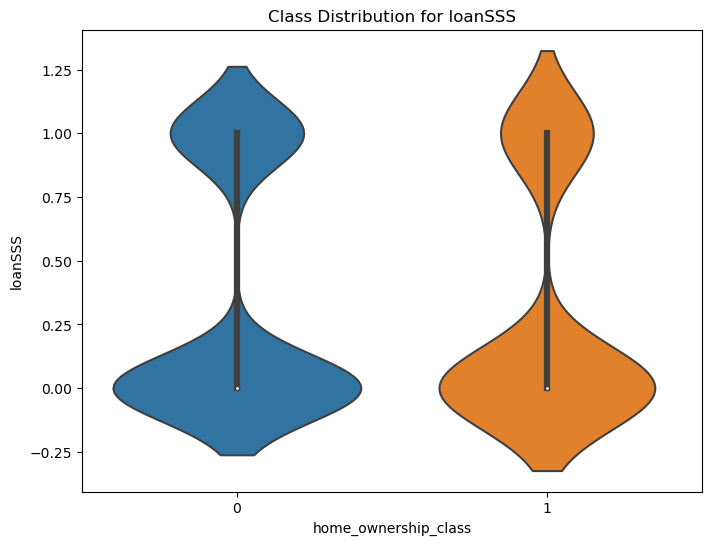

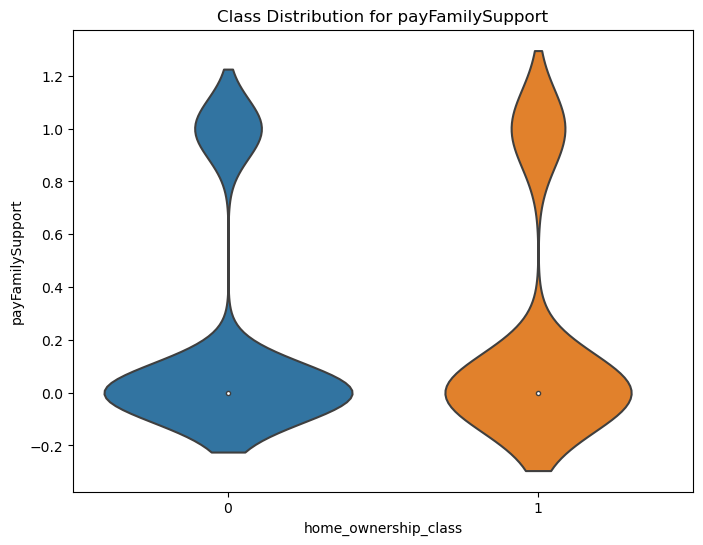

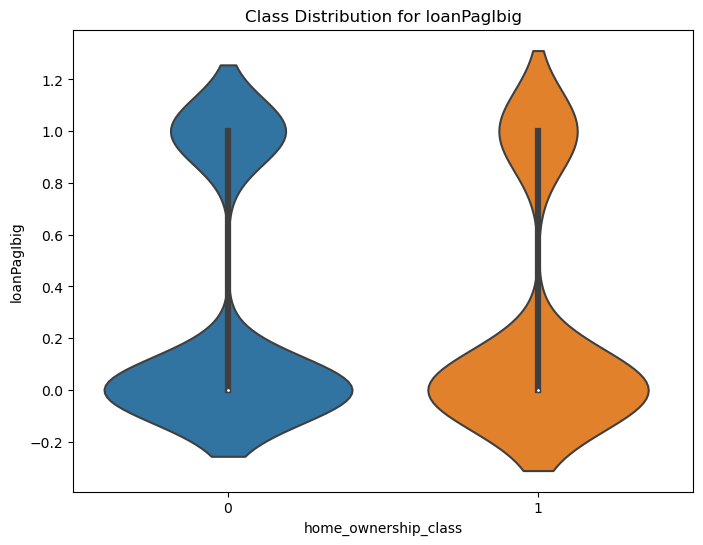

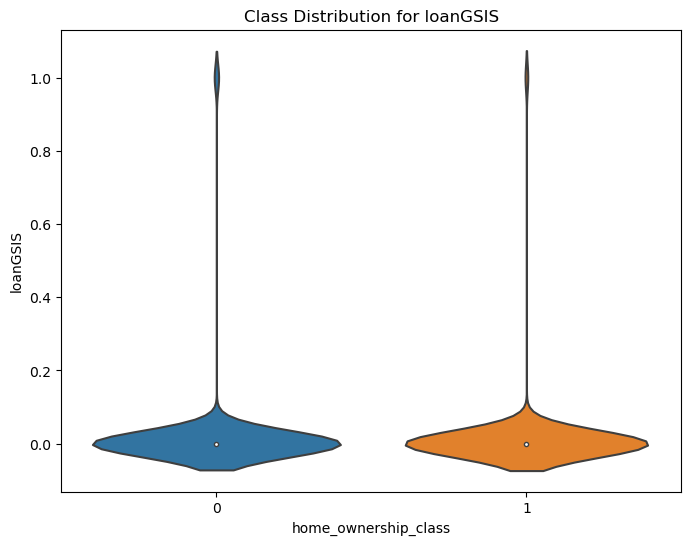

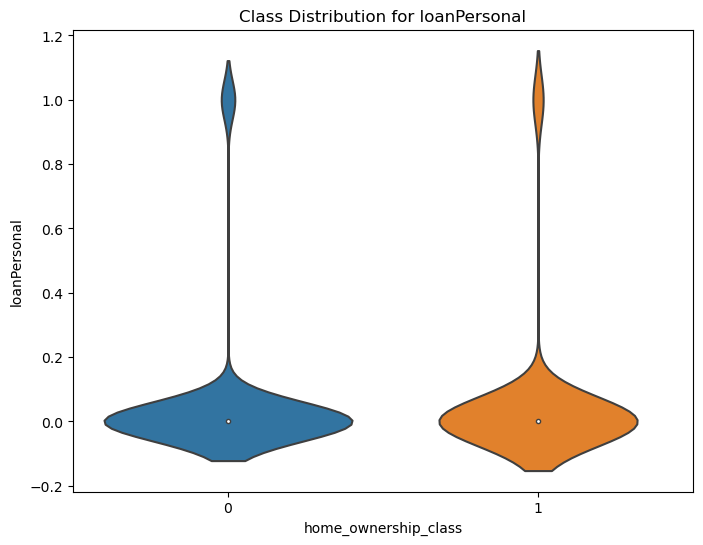

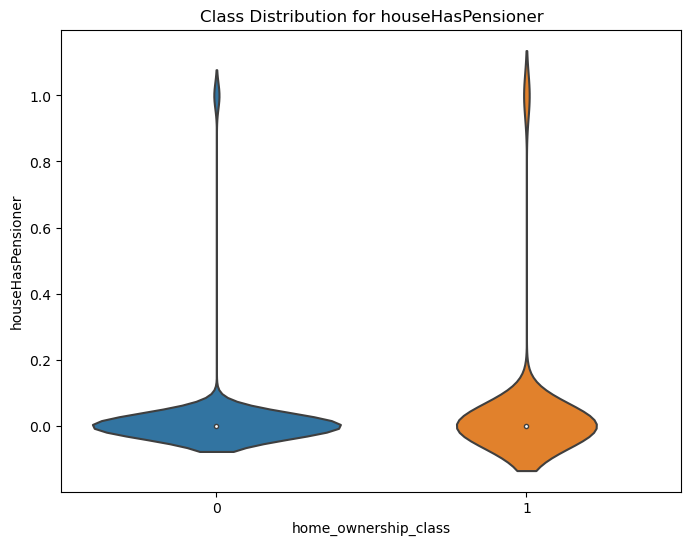

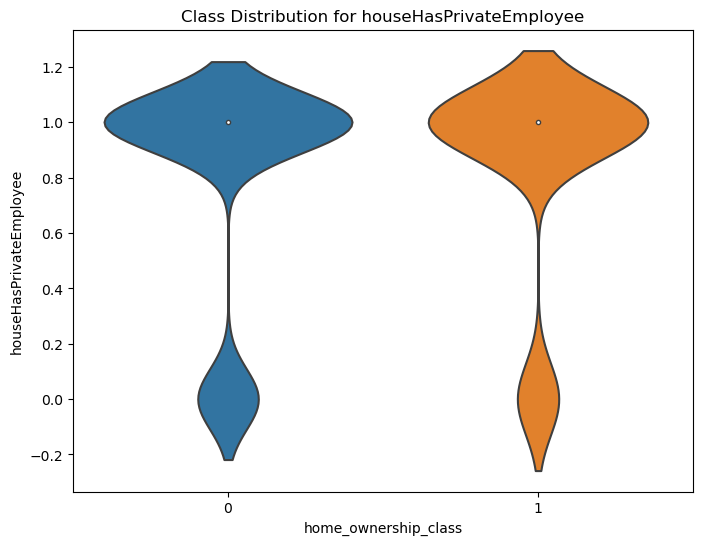

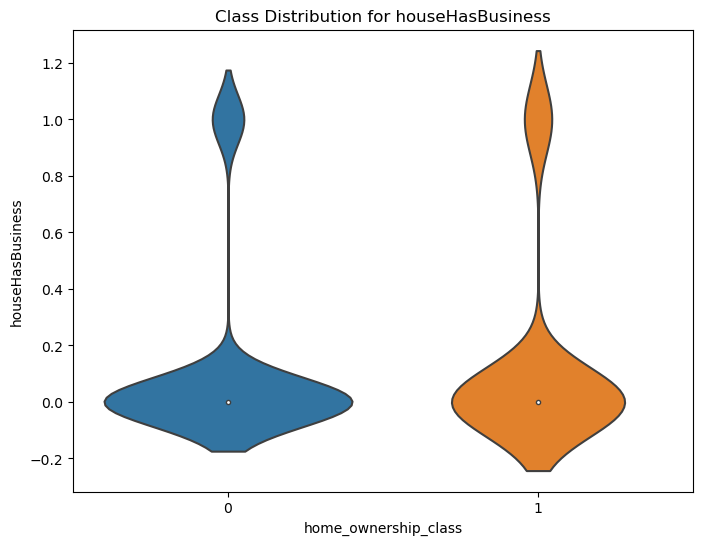

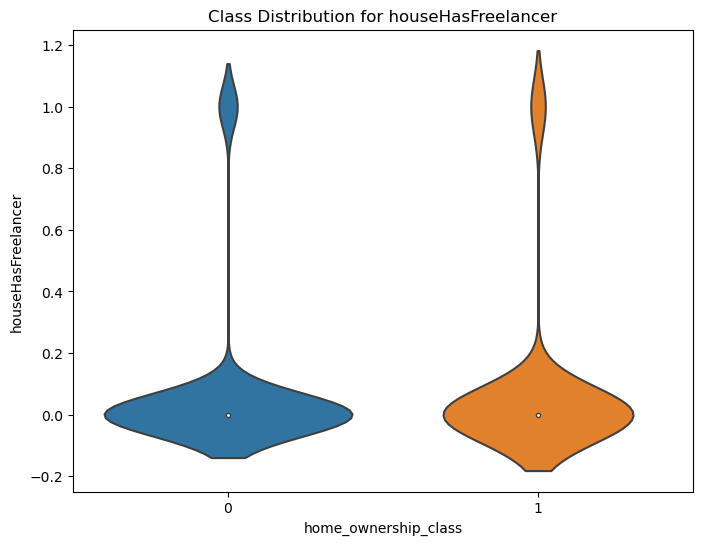

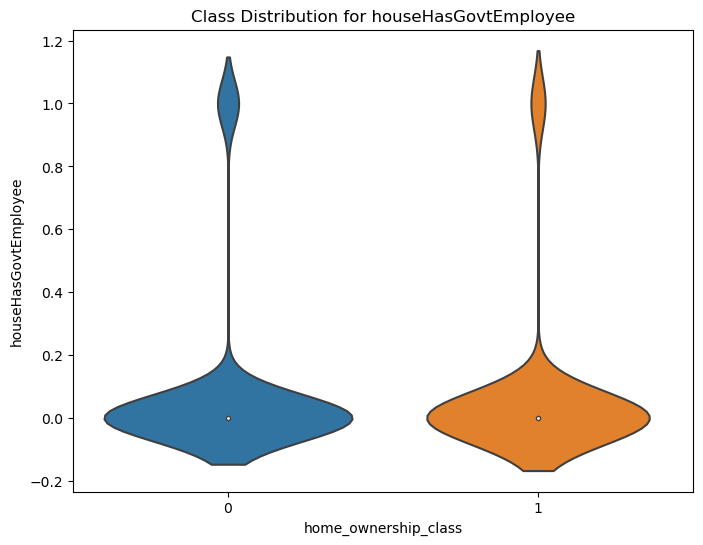

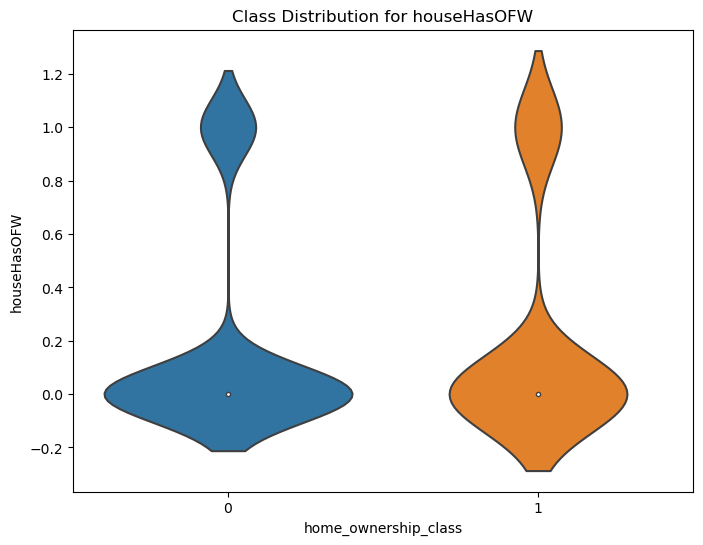

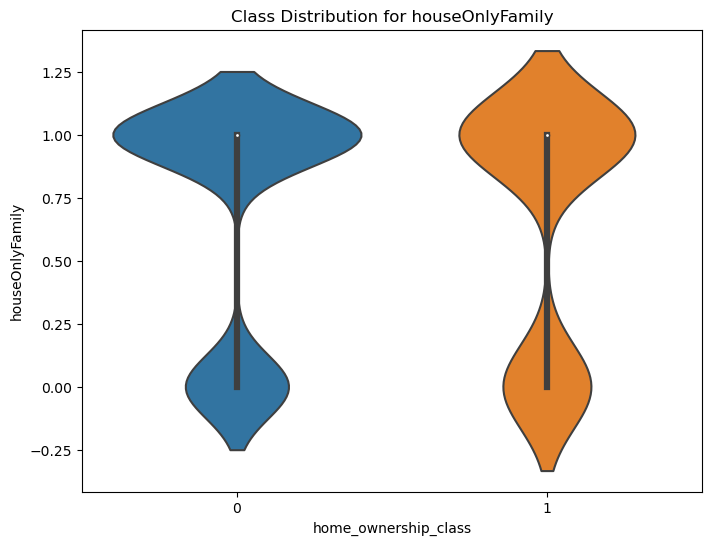

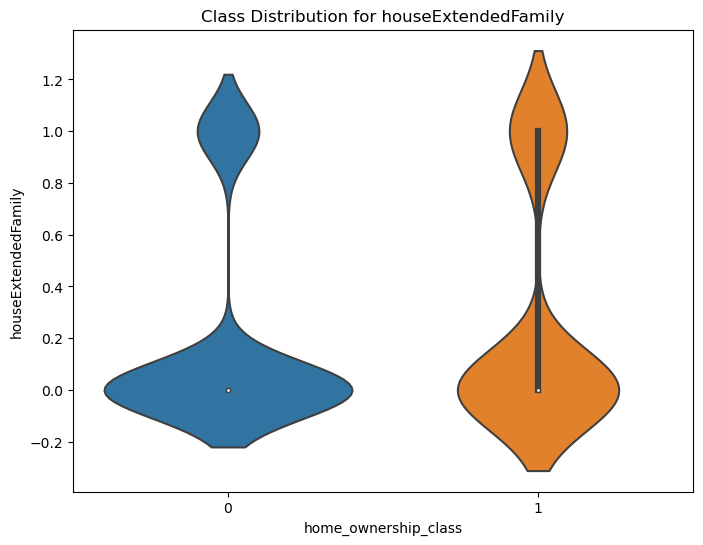

In [181]:
df = ho_t03.drop(columns=['userId', 'lastFirstName'])
features = df.columns.drop('home_ownership_class')

for feature in features:
    if np.issubdtype(df[feature].dtype, np.number):  # If feature is numeric
        plt.figure(figsize=(8, 6))
#         sns.boxplot(x='home_ownership_class', y=feature, data=df)
        sns.violinplot(x='home_ownership_class', y=feature, data=df)
        plt.title(f'Class Distribution for {feature}')
        plt.show()

    else:  # If feature is categorical
        plt.figure(figsize=(8, 6))
        sns.countplot(x=feature, hue='home_ownership_class', data=df)
        plt.title(f'Class Distribution for {feature}')
        plt.xticks(rotation=45)
        plt.show()


- `basicMonthlySalary` should be capped at 5e5
- `monthlyFamilyIncome` should be capped at 1e6
- `food` should be capped at 25k
- `hygiene` should be capped at 6k
- `houseCleaning` should be capped at 6k
- `parking` should be capped at 2.5k
- `gasoline` should be capped at 7k
- `tuition` should be capped at 25k
- `allowance` should be capped at 6k
- `uniform` should be capped at 2.5k
- `otherEducation` should be capped at 2.5k
- `emergency` should be capped at 7.5k
- `medicine` should be capped at 6k
- `water` should be capped at 2.5k
- `rent` should be capped at 50k
- `repair` should be capped at 3k
- `cinema` should be capped at 1k
- `dineOut` should be capped at 3k
- `leisure` should be capped at 2.5k
- `personalCare` should be capped at 2.5k
- `clothing` should be capped at 2.8k
- `mobileLoad` should be capped at 1.5k
- `internet` should be capped at 2.5k
- `vehicleLoan` should be capped at 25k
- `informalLenders` should be capped at 5k
- `companyLoan` should be capped at 5k
- `privateLoans` should be capped at 2.5k
- `governmentLoans` should be capped at 15k
- `smoking` should be capped at 1700
- `alcohol` should be capped at 1600
- `gambling` should be capped at 1k
- `smallLottery` should be capped at 1k
- `otherVices` should be capped at 1k
- `savings` should be capped at 1e5

- Similar distributions between 0 and 1:
  - ['age', 'gender', 'preferredNetDisposableIncomeId', 'workingFamilyCount', 'residentsCount', 'fare', ]

In [180]:
ho_t03 = ho_t01.copy()
ho_t03 = ho_t03[ho_t03['basicMonthlySalary'] <= 150_000]
ho_t03 = ho_t03[ho_t03['monthlyFamilyIncome'] <= 300_000]
ho_t03 = ho_t03[ho_t03['food'] <= 25_000]
ho_t03 = ho_t03[ho_t03['hygiene'] <= 6_000]
ho_t03 = ho_t03[ho_t03['houseCleaning'] <= 6_000]
ho_t03 = ho_t03[ho_t03['parking'] <= 1_250]
ho_t03 = ho_t03[ho_t03['gasoline'] <= 7_000]
ho_t03 = ho_t03[ho_t03['tuition'] <= 7_500]
ho_t03 = ho_t03[ho_t03['allowance'] <= 6_000]
ho_t03 = ho_t03[ho_t03['uniform'] <= 2_500]
ho_t03 = ho_t03[ho_t03['otherEducation'] <= 2_500]
ho_t03 = ho_t03[ho_t03['emergency'] <= 7_500]
ho_t03 = ho_t03[ho_t03['medicine'] <= 6_000]
ho_t03 = ho_t03[ho_t03['water'] <= 2_500]
ho_t03 = ho_t03[ho_t03['rent'] <= 50_000]
ho_t03 = ho_t03[ho_t03['repair'] <= 2_250]
ho_t03 = ho_t03[ho_t03['cinema'] <= 600]
ho_t03 = ho_t03[ho_t03['dineOut'] <= 3_000]
ho_t03 = ho_t03[ho_t03['leisure'] <= 2_500]
ho_t03 = ho_t03[ho_t03['personalCare'] <= 2_500]
ho_t03 = ho_t03[ho_t03['clothing'] <= 2_800]
ho_t03 = ho_t03[ho_t03['mobileLoad'] <= 1_500]
ho_t03 = ho_t03[ho_t03['internet'] <= 2_500]
ho_t03 = ho_t03[ho_t03['vehicleLoan'] <= 5_000]
ho_t03 = ho_t03[ho_t03['informalLenders'] <= 1_000]
ho_t03 = ho_t03[ho_t03['companyLoan'] <= 1_500]
ho_t03 = ho_t03[ho_t03['privateLoans'] <= 500]
ho_t03 = ho_t03[ho_t03['governmentLoans'] <= 6_250]
ho_t03 = ho_t03[ho_t03['smoking'] <= 600]
ho_t03 = ho_t03[ho_t03['alcohol'] <= 600]
ho_t03 = ho_t03[ho_t03['gambling'] <= 150]
ho_t03 = ho_t03[ho_t03['smallLottery'] <= 50]
ho_t03 = ho_t03[ho_t03['otherVices'] <= 50]
ho_t03 = ho_t03[ho_t03['savings'] <= 40_000]

ho_t03

userId          lastFirstName  age  gender      province  \
0        370          IBALI, HOWARD   24    MALE  METRO MANILA   
1       1025  PATALINGHOG, KIMBERLY   26  FEMALE  METRO MANILA   
2       1105      TEMILLOSO, DENNIS   40    MALE  METRO MANILA   
3       1719         OSCARES, ELMER   32    MALE       UNKNOWN   
4       2081         LEGASPI, MANNY   39    MALE  METRO MANILA   
...      ...                    ...  ...     ...           ...   
1062   12847          DIOSO, DANISA   25  FEMALE  METRO MANILA   
1063   12848       BUGARIN, JUN JUN   31    MALE       BULACAN   
1064   12849      FERERR, JHENNYLYN   29  FEMALE  METRO MANILA   
1065   12850         LIPANGO, ARVIN   34    MALE  METRO MANILA   
1066   12852          TEJADA, JERIC   27    MALE        LAGUNA   

                         job  basicMonthlySalary  \
0          SERVICE AND SALES               19000   
1          SERVICE AND SALES               15000   
2          SERVICE AND SALES               20000   
3           MACHINE OPERATOR               21200   
4           CLERICAL SUPPORT               19800   
...                      ...                 ...   
1062        CLERICAL SUPPORT               16800   
1063       SERVICE AND SALES               46000   
1064  ASSOCIATE PROFESSIONAL               25000   
1065  ASSOCIATE PROFESSIONAL               19000   
1066         CRAFT AND TRADE               20000   

      preferredNetDisposableIncomeId  workingFamilyCount  residentsCount  \
0                                  2                   3               3   
1                                  3                   2               4   
2                                  2                   0               3   
3                                  2                   0               5   
4                                  2                   0               0   
...                              ...                 ...             ...   
1062                               2                   4               5   
1063                               1                   0               0   
1064                               3                   2               4   
1065                               2                   2               4   
1066                               2                   1               1   

      monthlyFamilyIncome  food  hygiene  houseCleaning  fare  parking  \
0                 40000.0  1000      500            200   200        0   
1                 30000.0  5000     3000           2000  2000        0   
2                 30000.0  3000      500            300   200       50   
3                 12000.0  2000      500            200   392        0   
4                 25000.0  5000     2000           1000  1500        0   
...                   ...   ...      ...            ...   ...      ...   
1062              38800.0     0        0              0  1500        0   
1063              80000.0  1500     1000           1000   500        0   
1064              40000.0  4000     1500           1000     0      100   
1065              19000.0  5000     1000           1000     1        1   
1066              20000.0  5000      500            400   280        0   

      gasoline  tuition  allowance  uniform  otherEducation  emergency  \
0            0        0         50        0               0        500   
1            0        0          0        0               0       2000   
2           50      500        100      100              50        500   
3            0        0          0        0               0        100   
4            0     1000        500     1500               0          0   
...        ...      ...        ...      ...             ...        ...   
1062         0        0          0        0               0          0   
1063      1000     1500       1000      450             500        500   
1064       600        0          0      200             300       1500   
1065         1     1000        500        1   

Fitting 10 folds for each of 360 candidates, totalling 3600 fits
Best Hyperparameters: {'classifier__algorithm': 'SAMME', 'classifier__estimator': DecisionTreeClassifier(random_state=0), 'classifier__learning_rate': 0.01, 'classifier__n_estimators': 50, 'resampling': EditedNearestNeighbours()}
Best Validation Score (G-mean): 0.5247213101489787
Best Estimator: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['age',
                                                   'preferredNetDisposableIncomeId',
                                                   'workingFamilyCount',
                                                   'residentsCount',
                                                   'monthlyFamilyIncome',
                                                   'food', 'hygiene',
                                                   'houseCleaning', 'fare',
                            

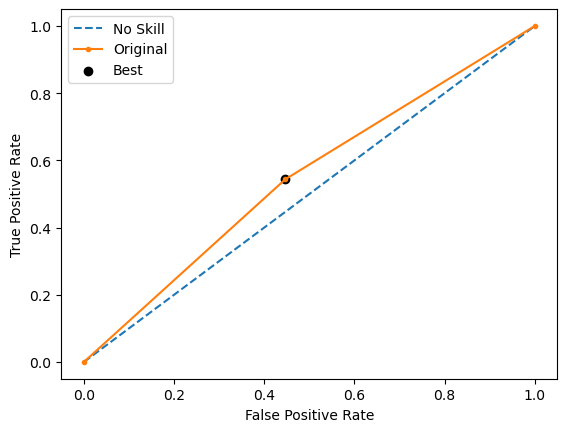

Run 2 - Random State: 1
Test G-mean: 0.5897678246195884
Best Threshold=0.731059, G-Mean=0.590


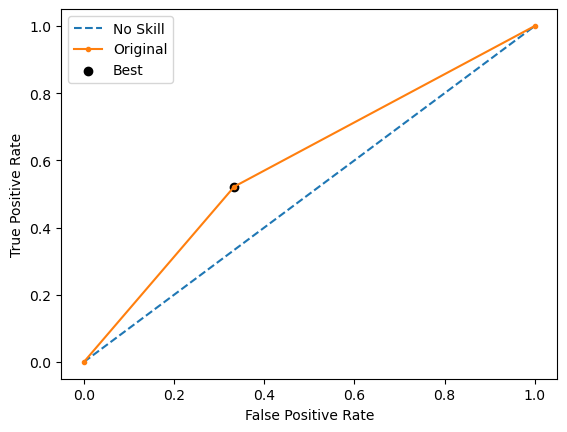

Run 3 - Random State: 2
Test G-mean: 0.5583286908169197
Best Threshold=0.731059, G-Mean=0.558


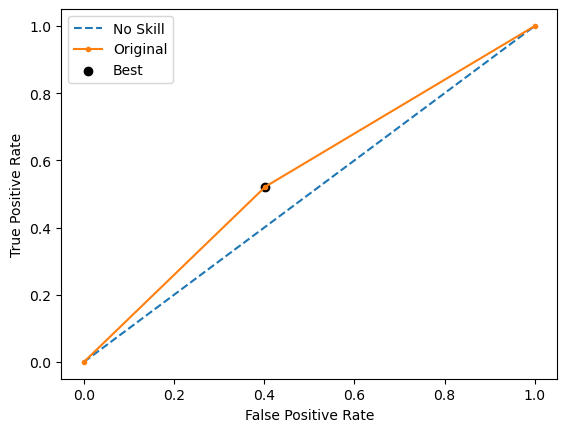

Run 4 - Random State: 3
Test G-mean: 0.5731910590334305
Best Threshold=0.731059, G-Mean=0.573


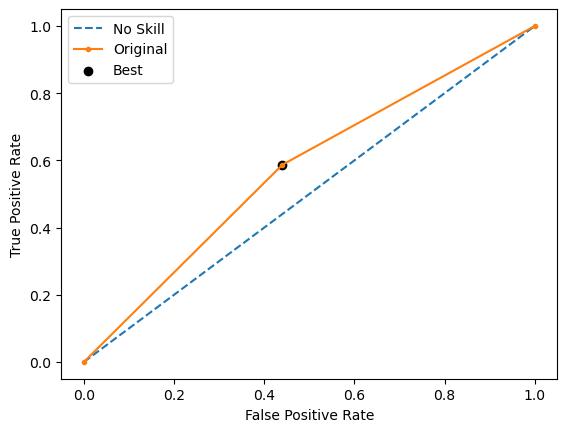

Run 5 - Random State: 4
Test G-mean: 0.5010243813237895
Best Threshold=0.731059, G-Mean=0.501


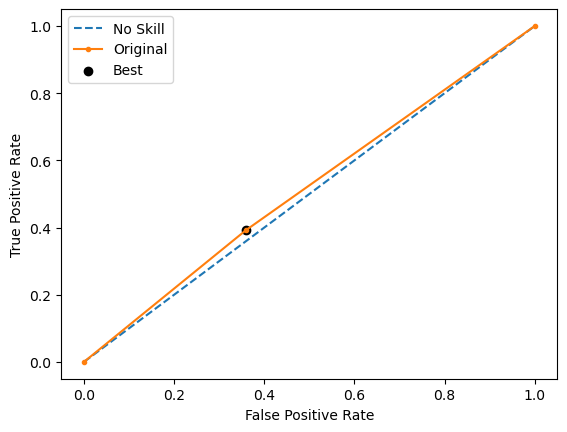

Ave Test G-mean: 0.5541515883892025
Stdev Test G-mean: 0.03355413513182807
Ave Test Specificity: 0.6037735849056604
Ave Test Recall: 0.5130434782608695
Ave Test NPV: 0.8112239440393111
Ave Test Accuracy: 0.5834146341463415
Ave Test Precision: 0.27263655330923375
Ave Test F1-Score: 0.3551417144997291
Ave Runtime: 0.000692768891652425


In [182]:
ho_t03_adaboost_gs, ho_t03_adaboost_be, ho_t03_adaboost_model_info, ho_t03_adaboost_metrics_df = adaboost_class2(ho_t03.drop(columns=['basicMonthlySalary']), g_mean_scorer,
                                                            'home_ownership_class', random_state=0)

Fitting 10 folds for each of 360 candidates, totalling 3600 fits
Best Hyperparameters: {'classifier__algorithm': 'SAMME', 'classifier__estimator': DecisionTreeClassifier(random_state=0), 'classifier__learning_rate': 0.01, 'classifier__n_estimators': 50, 'resampling': EditedNearestNeighbours()}
Best Validation Score (G-mean): 0.573399706368284
Best Estimator: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['age', 'basicMonthlySalary',
                                                   'preferredNetDisposableIncomeId',
                                                   'workingFamilyCount',
                                                   'residentsCount',
                                                   'monthlyFamilyIncome',
                                                   'food', 'hygiene',
                                                   'houseCleaning', 'fare',
       

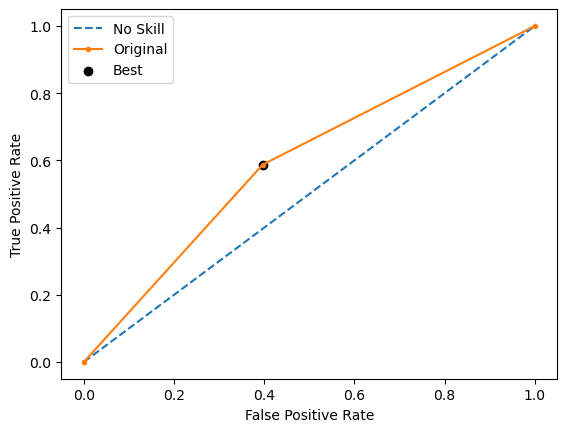

Run 2 - Random State: 1
Test G-mean: 0.5636903289784796
Best Threshold=0.731059, G-Mean=0.564


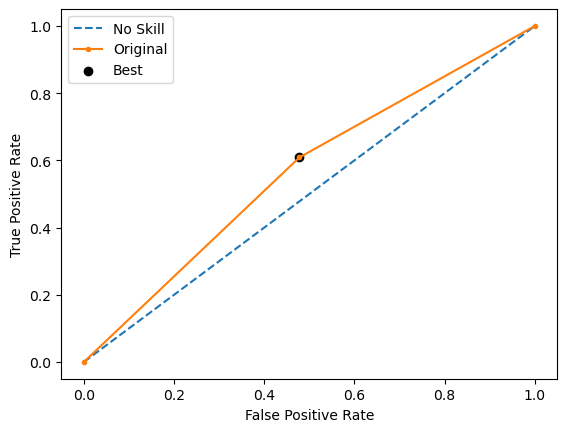

Run 3 - Random State: 2
Test G-mean: 0.5172707662973487
Best Threshold=0.731059, G-Mean=0.517


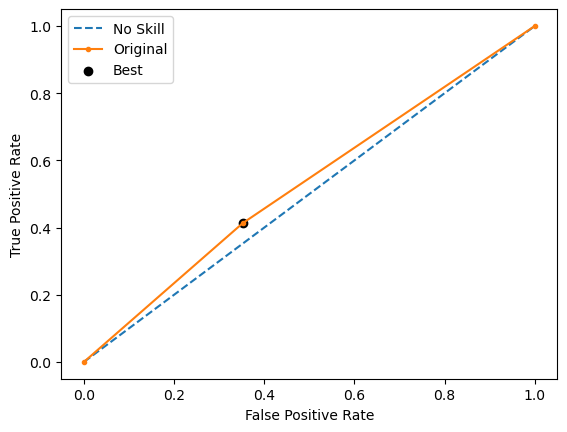

Run 4 - Random State: 3
Test G-mean: 0.5115563602987457
Best Threshold=0.731059, G-Mean=0.512


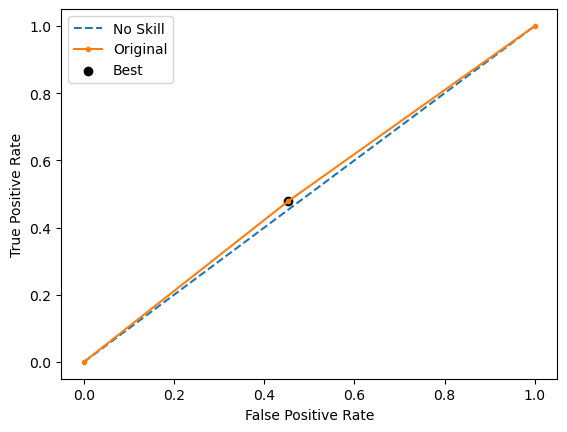

Run 5 - Random State: 4
Test G-mean: 0.5069923970587892
Best Threshold=0.731059, G-Mean=0.507


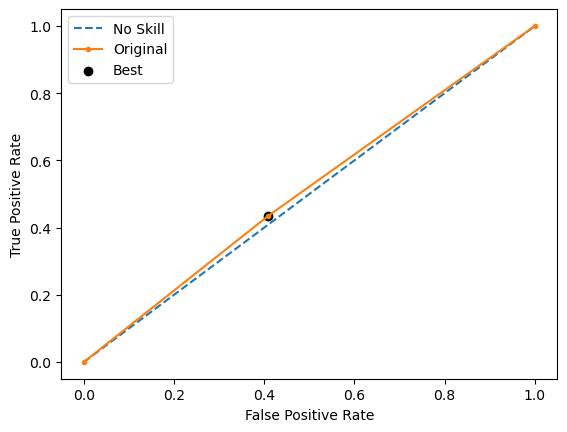

Ave Test G-mean: 0.5389631049600706
Stdev Test G-mean: 0.038825680484767956
Ave Test Specificity: 0.5823899371069182
Ave Test Recall: 0.5043478260869565
Ave Test NPV: 0.8031979192676566
Ave Test Accuracy: 0.5648780487804879
Ave Test Precision: 0.25838015468053016
Ave Test F1-Score: 0.34081419387514017
Ave Runtime: 0.0006816116968790689


In [183]:
ho_t03_adaboost_gs, ho_t03_adaboost_be, ho_t03_adaboost_model_info, ho_t03_adaboost_metrics_df = adaboost_class2(ho_t03, g_mean_scorer,
                                                            'home_ownership_class', random_state=0)

In [184]:
ho_t04 = ho_t03.copy().drop(columns=['gender', 'job', 'province'])

In [185]:
ho_t04_rf_gs, ho_t04_rf_be, ho_t04_rf_model_info, ho_t04_rf_metrics_df = rf_class2(ho_t04, g_mean_scorer,
                                                            'home_ownership_class', random_state=0)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits
Best Hyperparameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__n_estimators': 100, 'resampling': SMOTEENN(random_state=0)}
Best Validation Score: 0.545516531867104
Best Estimator: Pipeline(steps=[('resampling', SMOTEENN(random_state=0)),
                ('classifier',
                 RandomForestClassifier(criterion='entropy', random_state=0))])
GridSearchCV Runtime: 1.362377413113912
Run 1 - Random State: 0
Test G-mean: 0.5966821033042717
Run 2 - Random State: 1
Test G-mean: 0.5687611087238894
Run 3 - Random State: 2
Test G-mean: 0.5010243813237895
Run 4 - Random State: 3
Test G-mean: 0.5795956271904098
Run 5 - Random State: 4
Test G-mean: 0.5438144981218451
Ave Test G-mean: 0.5579755437328411
Stdev Test G-mean: 0.037168280452840284
Ave Test Specificity: 0.6037735849056605
Ave Test Recall: 0.5217391304347825
Ave Test NPV: 0.8148466539091539
Ave Test Accuracy: 0.5853658536585366
Av

Fitting 10 folds for each of 1872 candidates, totalling 18720 fits



6240 fits failed out of a total of 18720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2080 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Carlo\anaconda3\envs\ds_cuda\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Carlo\anaconda3\envs\ds_cuda\lib\site-packages\imblearn\pipeline.py", line 297, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "C:\Users\Carlo\anaconda3\envs\ds_cuda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Carlo\anaconda3\envs\ds_cuda\

Best Hyperparameters: {'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'newton-cholesky', 'resampling': RandomUnderSampler(random_state=0), 'scaler': RobustScaler()}
Best Validation Score: 0.5477207235623512
Best Estimator: Pipeline(steps=[('scaler', RobustScaler()),
                ('resampling', RandomUnderSampler(random_state=0)),
                ('classifier',
                 LogisticRegression(C=0.1, max_iter=1000, random_state=0,
                                    solver='newton-cholesky'))])
GridSearchCV Runtime: 4.490768452485402
Run 1 - Random State: 0
Test G-mean: 0.607243668428577
Best Threshold=0.559952, G-Mean=0.628


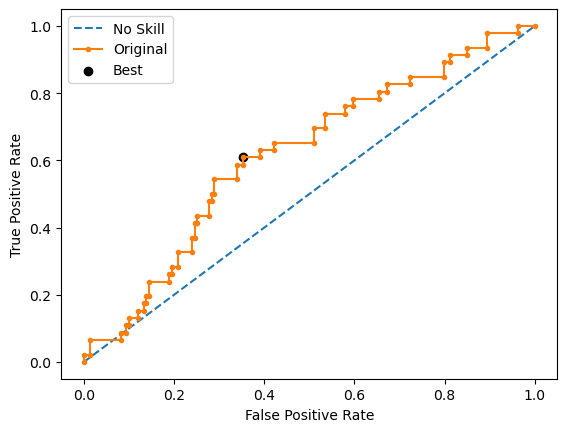

Run 2 - Random State: 1
Test G-mean: 0.543437242094393
Best Threshold=0.569230, G-Mean=0.599


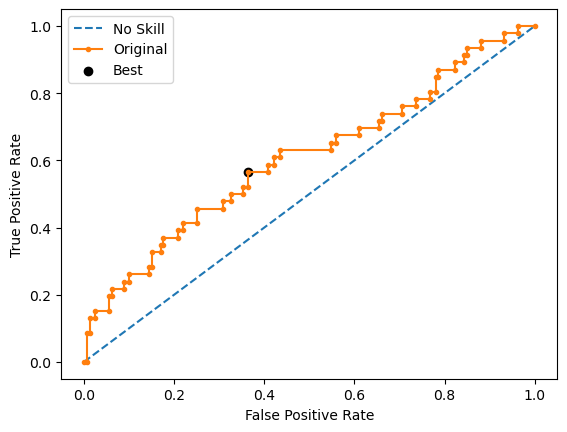

Run 3 - Random State: 2
Test G-mean: 0.5265704664254983
Best Threshold=0.552779, G-Mean=0.573


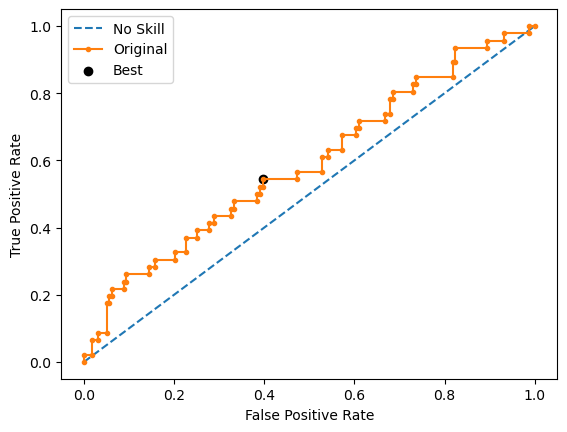

Run 4 - Random State: 3
Test G-mean: 0.617624654049352
Best Threshold=0.510839, G-Mean=0.619


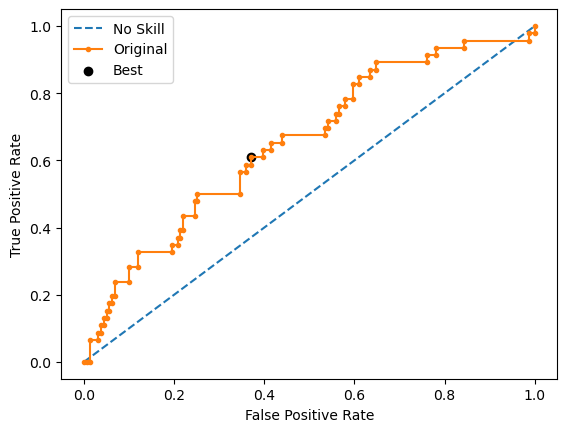

Run 5 - Random State: 4
Test G-mean: 0.4558734670858684
Best Threshold=0.517597, G-Mean=0.489


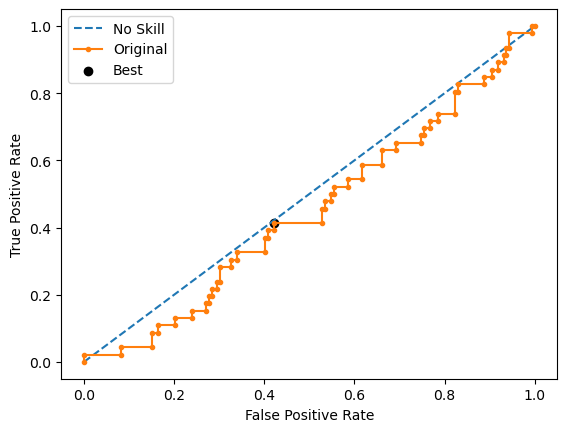

Ave Test G-mean: 0.5501498996167378
Stdev Test G-mean: 0.06576784186489115
Ave Test Specificity: 0.5232704402515723
Ave Test Recall: 0.5826086956521739
Ave Test NPV: 0.8120858583118966
Ave Test Accuracy: 0.5365853658536586
Ave Test Precision: 0.2622083239062018
Ave Test F1-Score: 0.3611478116883891
Ave Runtime: 0.0006523044904073079


In [186]:
ho_t04_logreg_gs, ho_t04_logreg_be, ho_t04_logreg_model_info, ho_t04_logreg_metrics_df = logreg_class2(ho_t04, g_mean_scorer,
                                                            'home_ownership_class', random_state=0)

In [187]:
ho_t04_lgbm_gs, ho_t04_lgbm_be, ho_t04_lgbm_model_info, ho_t04_lgbm_metrics_df = lgbm_class2(ho_t04, g_mean_scorer,
                                                            'home_ownership_class', random_state=0)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits
Best Hyperparameters: {'classifier__boosting_type': 'goss', 'classifier__learning_rate': 0.1, 'classifier__n_estimators': 200, 'resampling': EditedNearestNeighbours()}
Best Validation Score: 0.5885313017299327
Best Estimator: Pipeline(steps=[('resampling', EditedNearestNeighbours()),
                ('classifier',
                 LGBMClassifier(boosting_type='goss', n_estimators=200,
                                random_state=0))])
GridSearchCV Runtime: 0.5194416364034017
Run 1 - Random State: 0
Test G-mean: 0.6571996673684273
Run 2 - Random State: 1
Test G-mean: 0.6372366511986305
Run 3 - Random State: 2
Test G-mean: 0.5795956271904097
Run 4 - Random State: 3
Test G-mean: 0.6279428937597371
Run 5 - Random State: 4
Test G-mean: 0.5594295700143126
Ave Test G-mean: 0.6122808819063035
Stdev Test G-mean: 0.04107119844918275
Ave Test Specificity: 0.69937106918239
Ave Test Recall: 0.5391304347826087
Ave Test NPV: 0.840324692

In [189]:
ho_t04_xgb_gs, ho_t04_xgb_be, ho_t04_xgb_model_info, ho_t04_xgb_metrics_df = xgb_class2(ho_t04, g_mean_scorer,
                                                            'home_ownership_class', random_state=0)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
Best Hyperparameters: {'classifier__grow_policy': 'depthwise', 'classifier__learning_rate': 0.01, 'classifier__n_estimators': 50, 'resampling': EditedNearestNeighbours()}
Best Validation Score: 0.5565417203085825
Best Estimator: Pipeline(steps=[('resampling', EditedNearestNeighbours()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bi

# RFE

In [470]:
def rfe_fitter(df, estimator, n_features_to_select, label_col,
               importance_getter, random_state=0):
    X = df.drop(['userId', 'lastFirstName', label_col], axis=1)
    y = df.loc[:, label_col]

    start_time = time.time()

    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.25,
                                                        stratify=y,
                                                        random_state=random_state)

#     estimator = estimator.fit(X_train, y_train)

    rfe = RFE(estimator=estimator,
              n_features_to_select=n_features_to_select,
              importance_getter=importance_getter)

    rfe.fit(X_train, y_train)

    feature_ranking = rfe.ranking_
    feature_support = rfe.support_

    selected_features = np.where(feature_support)[0]
#     print('Selected features', selected_features)
    print(f"Number of features: {n_features_to_select}")

    X_train = X_train.iloc[:, selected_features]
    X_test = X_test.iloc[:, selected_features]

    estimator.fit(X_train, y_train)

    y_pred = estimator.predict(X_test)
    end_time = time.time()
    elapsed_time = end_time - start_time

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    specificity = specificity_score(y_test, y_pred)
    npv = npv_score(y_test, y_pred)
    g_mean = geometric_mean_score(y_test, y_pred)

    print('Test G-mean:', g_mean)
    print('Test Recall:', recall)
    print('Test Specificity:', specificity)
    print(f'Runtime: {elapsed_time} secs')
    print('')

    model_info = {
        'test_g_mean': g_mean,
        'test_recall': recall,
        'test_specificity': specificity,
        'test_accuracy': accuracy,
        'test_precision': precision,
        'test_f1_score': f1,
        'test_npv': npv,
        'runtime': elapsed_time,
        'selected_features': selected_features
    }
    
    return model_info

def rfe_fitter2(df, estimator, n_features_to_select, label_col,
               importance_getter, random_state=0):
    X = df.drop(['userId', 'lastFirstName', label_col], axis=1)
    y = df.loc[:, label_col]

    start_time = time.time()

    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.25,
                                                        stratify=y,
                                                        random_state=random_state)

#     estimator = estimator.fit(X_train, y_train)

    rfe = RFE(estimator=estimator,
              n_features_to_select=n_features_to_select,
              importance_getter=importance_getter)

    rfe.fit(X_train, y_train)

    feature_ranking = rfe.ranking_
    feature_support = rfe.support_

    selected_features = np.where(feature_support)[0]
#     print('Selected features', selected_features)
    print(f"Number of features: {n_features_to_select}")

    X_train = X_train.iloc[:, selected_features]
    X_test = X_test.iloc[:, selected_features]

    estimator.fit(X_train, y_train)

    num_runs = 5
    metrics_per_run = []

    for run in range(num_runs):
        modified_random_state = random_state + run

        start_time = time.time()
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                            test_size=0.25,
                                                            stratify=y,
                                                            random_state=modified_random_state)

        X_train = X_train.iloc[:, selected_features]
        X_test = X_test.iloc[:, selected_features]

        modified_estimator = clone(estimator)
        modified_estimator.fit(X_train, y_train)

        y_pred = modified_estimator.predict(X_test)

        end_time = time.time()
        elapsed_time = (end_time - start_time)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        specificity = specificity_score(y_test, y_pred)
        npv = npv_score(y_test, y_pred)
        g_mean = geometric_mean_score(y_test, y_pred)

        print(f"Run {run + 1} - Random State: {modified_random_state}")
        print('Test G-mean:', g_mean)
        print('Test Recall:', recall)
        print('Test Specificity:', specificity)
        print(f'Runtime: {elapsed_time} secs')
        print('')

        metrics_per_run.append({
            'Random State': modified_random_state,
            'Test Accuracy': accuracy,
            'Test Precision': precision,
            'Test Recall': recall,
            'Test F1 Score': f1,
            'Test Specificity': specificity,
            'Test G-mean': g_mean,
            'Test NPV': npv,
            'Runtime': elapsed_time
        })

    metrics_df = pd.DataFrame(metrics_per_run)

    avg_metrics = metrics_df.mean()
    std_metrics = metrics_df.std()

    print('Ave Test G-mean:', avg_metrics['Test G-mean'])
    print('Stdev Test G-mean:', std_metrics['Test G-mean'])
    print("Ave Test Specificity:", avg_metrics['Test Specificity'])
    print("Ave Test Recall:", avg_metrics['Test Recall'])
    print('Ave Test NPV:', avg_metrics['Test NPV'])
    print("Ave Test Accuracy:", avg_metrics['Test Accuracy'])
    print("Ave Test Precision:", avg_metrics['Test Precision'])
    print("Ave Test F1-Score:", avg_metrics['Test F1 Score'])
    print("Ave Runtime:", avg_metrics['Runtime'])

    model_info = {
        'average_runtime': avg_metrics['Runtime'],
        'average_test_g_mean': avg_metrics['Test G-mean'],
        'stdev_test_g_mean': std_metrics['Test G-mean'],
        'average_test_specificity': avg_metrics['Test Specificity'],
        'average_test_recall': avg_metrics['Test Recall'],
        'average_test_npv': avg_metrics['Test NPV'],
        'average_test_accuracy': avg_metrics['Test Accuracy'],
        'average_test_precision': avg_metrics['Test Precision'],
        'average_test_f1_score': avg_metrics['Test F1 Score']
    }

    return model_info


In [197]:
ho_t03_adaboost_be

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['age', 'basicMonthlySalary',
                                                   'preferredNetDisposableIncomeId',
                                                   'workingFamilyCount',
                                                   'residentsCount',
                                                   'monthlyFamilyIncome',
                                                   'food', 'hygiene',
                                                   'houseCleaning', 'fare',
                                                   'parking', 'gasoline',
                                                   'tuition', 'allowance',
                                                   'uniform', 'otherEducation',
                                                   'emergency', 'medicine',
                                                   'water', 'el...',
                                                   'rent', 'repair', 'cinema',
                                                   'dineOut', 'leisure',
                                                   'personalCare', 'clothing',
                                                   'mobileLoad', 'internet',
                                                   'vehicleLoan', ...])])),
                ('resampling', EditedNearestNeighbours()),
                ('var_threshold', VarianceThreshold(threshold=0.15)),
                ('classifier',
                 AdaBoostClassifier(algorithm='SAMME',
                                    estimator=DecisionTreeClassifier(random_state=0),
                                    learning_rate=0.01, random_state=0))])

In [200]:
df = ho_t04
estimator = ho_t04_rf_be
label_col = 'home_ownership_class'
random_state = 0
importance_getter = 'named_steps.classifier.feature_importances_'

ho_t04_rf_rfe = []
for n_features in range(1, 59):
    res = rfe_fitter(df, estimator, n_features, label_col,
                     importance_getter, random_state)
    ho_t04_rf_rfe.append(res)
    


ho_t04_rf_rfe = pd.DataFrame(ho_t04_rf_rfe)

cols = ho_t04_rf_rfe.columns.tolist()
cols.remove('selected_features')
cols.remove('runtime')

Number of features: 1
Test G-mean: 0.4735266717800233
Test Recall: 0.43478260869565216
Test Specificity: 0.5157232704402516
Runtime: 19.003321886062622 secs

Number of features: 2
Test G-mean: 0.59576483588521
Test Recall: 0.4782608695652174
Test Specificity: 0.7421383647798742
Runtime: 18.419692754745483 secs

Number of features: 3
Test G-mean: 0.5464479977765451
Test Recall: 0.45652173913043476
Test Specificity: 0.6540880503144654
Runtime: 17.90238666534424 secs

Number of features: 4
Test G-mean: 0.6225855743388996
Test Recall: 0.5869565217391305
Test Specificity: 0.660377358490566
Runtime: 17.63275933265686 secs

Number of features: 5
Test G-mean: 0.6314170165021418
Test Recall: 0.5869565217391305
Test Specificity: 0.6792452830188679
Runtime: 17.829873085021973 secs

Number of features: 6
Test G-mean: 0.6080312010761365
Test Recall: 0.5652173913043478
Test Specificity: 0.6540880503144654
Runtime: 17.06312608718872 secs

Number of features: 7
Test G-mean: 0.5800672266396228
Test Rec

Number of features: 54
Test G-mean: 0.5805384429859256
Test Recall: 0.6304347826086957
Test Specificity: 0.5345911949685535
Runtime: 1.130141019821167 secs

Number of features: 55
Test G-mean: 0.5966821033042717
Test Recall: 0.6086956521739131
Test Specificity: 0.5849056603773585
Runtime: 0.679725170135498 secs

Number of features: 56
Test G-mean: 0.5966821033042717
Test Recall: 0.6086956521739131
Test Specificity: 0.5849056603773585
Runtime: 0.8332610130310059 secs

Number of features: 57
Test G-mean: 0.5966821033042717
Test Recall: 0.6086956521739131
Test Specificity: 0.5849056603773585
Runtime: 0.671799898147583 secs

Number of features: 58
Test G-mean: 0.5966821033042717
Test Recall: 0.6086956521739131
Test Specificity: 0.5849056603773585
Runtime: 0.6647014617919922 secs



NameError: name 'ho_t05_rf_rfe' is not defined

<Figure size 1000x600 with 0 Axes>

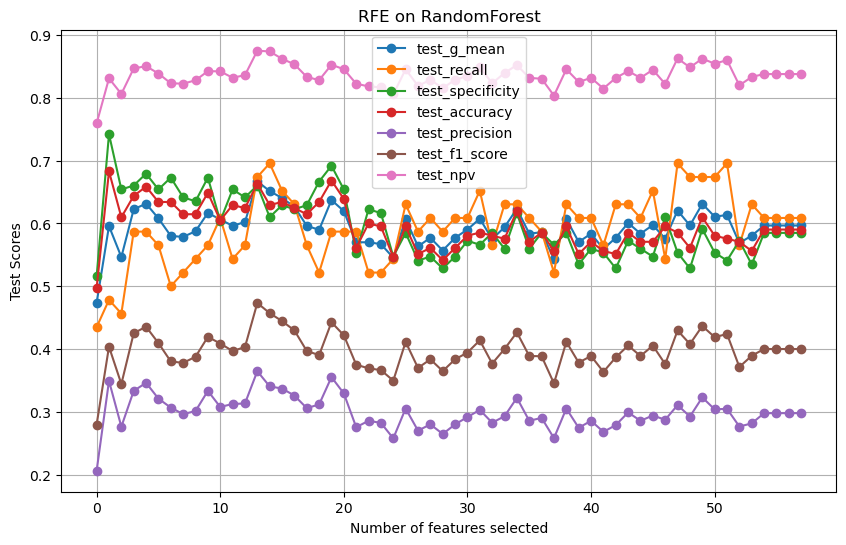

In [207]:
plt.figure(figsize=(10, 6))

for column in cols:
    plt.plot(ho_t04_rf_rfe.index, ho_t04_rf_rfe[column],
             marker='o', linestyle='-', label=column)

plt.title('RFE on RandomForest')
plt.xlabel('Number of features selected')
plt.ylabel('Test Scores')
plt.legend()
plt.grid(True)
plt.show()

In [211]:
ho_t04_rf_rfe.sort_values('test_g_mean', ascending=False)

test_g_mean  test_recall  test_specificity  test_accuracy  test_precision  \
13     0.667111     0.673913          0.660377       0.663415        0.364706   
14     0.651453     0.695652          0.610063       0.629268        0.340426   
15     0.640447     0.652174          0.628931       0.634146        0.337079   
19     0.637237     0.586957          0.691824       0.668293        0.355263   
4      0.631417     0.586957          0.679245       0.658537        0.346154   
49     0.631200     0.673913          0.591195       0.609756        0.322917   
16     0.626526     0.630435          0.622642       0.624390        0.325843   
34     0.623354     0.630435          0.616352       0.619512        0.322222   
3      0.622586     0.586957          0.660377       0.643902        0.333333   
47     0.620496     0.695652          0.553459       0.585366        0.310680   
20     0.619614     0.586957          0.654088       0.639024        0.329268   
9      0.616739     0.565217          0.672956       0.648780        0.333333   
51     0.613404     0.695652          0.540881       0.575610        0.304762   
50     0.610724     0.673913          0.553459       0.580488        0.303922   
5      0.608031     0.565217          0.654088       0.634146        0.320988   
31     0.607581     0.652174          0.566038       0.585366        0.303030   
25     0.607244     0.630435          0.584906       0.595122        0.305263   
38     0.607244     0.630435          0.584906       0.595122        0.305263   
10     0.606230     0.608696          0.603774       0.604878        0.307692   
12     0.602156     0.565217          0.641509       0.624390        0.313253   
43     0.600679     0.630435          0.572327       0.585366        0.298969   
45     0.597369     0.652174          0.547170       0.570732        0.294118   
57     0.596682     0.608696          0.584906       0.590244        0.297872   
55     0.596682     0.608696          0.584906       0.590244        0.297872   
56     0.596682     0.608696          0.584906       0.590244        0.297872   
54     0.596682     0.608696          0.584906       0.590244        0.297872   
48     0.596682     0.673913          0.528302       0.560976        0.292453   
17     0.596224     0.565217          0.628931       0.614634        0.305882   
11     0.596224     0.543478          0.654088       0.629268        0.312500   
1      0.595765     0.478261          0.742138       0.682927        0.349206   
33     0.594041     0.630435          0.559748       0.575610        0.292929   
30     0.590231     0.608696          0.572327       0.580488        0.291667   
18     0.589768     0.521739          0.666667       0.634146        0.311688   
8      0.587561     0.543478          0.635220       0.614634        0.301205   
36     0.585930     0.586957          0.584906       0.585366        0.290323   
35     0.583709     0.608696          0.559748       0.570732        0.285714   
44     0.583709     0.608696          0.559748       0.570732        0.285714   
40     0.583709     0.608696          0.559748       0.570732        0.285714   
53     0.580538     0.630435          0.534591       0.556098        0.281553   
6      0.580067     0.500000          0.672956       0.634146        0.306667   
7      0.578533     0.521739          0.641509       0.614634        0.296296   
42     0.577113     0.630435          0.528302       0.551220        0.278846   
29     0.577113     0.608696          0.547170       0.560976        0.280000   
27     0.577113     0.608696          0.547170       0.560976        0.280000   
46     0.575809     0.543478          0.610063       0.595122        0.287356   
32     0.574977     0.565217          0.584906       0.580488        0.282609   
39     0.570441     0.608696          0.534591       0.551220        0.274510   
22     0.569962     0.521739          0.622642       0.600000        0.285714   
21     0.569962     0.586957       

In [223]:
# ho_t04

In [230]:
rfe_indices = [0, 1] + list(np.array([0, 1, 2, 3, 4, 5, 6, 7, 9, 18, 19, 28, 39, 44]) + 2) + [-1]
rfe_indices
ho_t05 = ho_t04.copy().iloc[:, rfe_indices]
ho_t05

userId          lastFirstName  age  basicMonthlySalary  \
0        370          IBALI, HOWARD   24               19000   
1       1025  PATALINGHOG, KIMBERLY   26               15000   
2       1105      TEMILLOSO, DENNIS   40               20000   
3       1719         OSCARES, ELMER   32               21200   
4       2081         LEGASPI, MANNY   39               19800   
...      ...                    ...  ...                 ...   
1062   12847          DIOSO, DANISA   25               16800   
1063   12848       BUGARIN, JUN JUN   31               46000   
1064   12849      FERERR, JHENNYLYN   29               25000   
1065   12850         LIPANGO, ARVIN   34               19000   
1066   12852          TEJADA, JERIC   27               20000   

      preferredNetDisposableIncomeId  workingFamilyCount  residentsCount  \
0                                  2                   3               3   
1                                  3                   2               4   
2                                  2                   0               3   
3                                  2                   0               5   
4                                  2                   0               0   
...                              ...                 ...             ...   
1062                               2                   4               5   
1063                               1                   0               0   
1064                               3                   2               4   
1065                               2                   2               4   
1066                               2                   1               1   

      monthlyFamilyIncome  food  hygiene  fare  water  electricity  internet  \
0                 40000.0  1000      500   200      0            0         0   
1                 30000.0  5000     3000  2000    200          200         0   
2                 30000.0  3000      500   200    200          500       200   
3                 12000.0  2000      500   392    200          200         0   
4                 25000.0  5000     2000  1500    300         1900      1600   
...                   ...   ...      ...   ...    ...          ...       ...   
1062              38800.0     0        0  1500    600         2000       500   
1063              80000.0  1500     1000   500    300          450      1500   
1064              40000.0  4000     1500     0    500         1500      1299   
1065              19000.0  5000     1000     1    200         1500         1   
1066              20000.0  5000      500   280      0            0         0   

      savings  loanPagIbig  home_ownership_class  
0        2000            0                     1  
1        2000            1                     0  
2        1000            0                     0  
3         500            0                     1  
4       10000            0                     0  
...       ...          ...                   ...  
1062        0            0                     0  
1063     5000            0                     0  
1064     1200            0                     0  
1065     2000            0                     0  
1066      500            1                     0  

[820 rows x 17 columns]

In [231]:
ho_t05_rf_gs, ho_t05_rf_be, ho_t05_rf_model_info, ho_t05_rf_metrics_df = rf_class2(ho_t05, g_mean_scorer,
                                                            'home_ownership_class', random_state=0)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits
Best Hyperparameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__n_estimators': 200, 'resampling': SMOTEENN(random_state=0)}
Best Validation Score: 0.5651313236689853
Best Estimator: Pipeline(steps=[('resampling', SMOTEENN(random_state=0)),
                ('classifier',
                 RandomForestClassifier(criterion='entropy', max_depth=10,
                                        n_estimators=200, random_state=0))])
GridSearchCV Runtime: 1.127325431505839
Run 1 - Random State: 0
Test G-mean: 0.6647497735362243
Run 2 - Random State: 1
Test G-mean: 0.5771134075307589
Run 3 - Random State: 2
Test G-mean: 0.5641752239747911
Run 4 - Random State: 3
Test G-mean: 0.5731910590334305
Run 5 - Random State: 4
Test G-mean: 0.5409154779440721
Ave Test G-mean: 0.5840289884038554
Stdev Test G-mean: 0.047260125556348634
Ave Test Specificity: 0.6050314465408805
Ave Test Recall: 0.5695652173913044
Av

Fitting 10 folds for each of 360 candidates, totalling 3600 fits
Best Hyperparameters: {'classifier__algorithm': 'SAMME', 'classifier__estimator': DecisionTreeClassifier(random_state=0), 'classifier__learning_rate': 0.01, 'classifier__n_estimators': 50, 'resampling': EditedNearestNeighbours()}
Best Validation Score (G-mean): 0.5247213101489787
Best Estimator: Pipeline(steps=[('resampling', EditedNearestNeighbours()),
                ('var_threshold', VarianceThreshold(threshold=0.15)),
                ('classifier',
                 AdaBoostClassifier(algorithm='SAMME',
                                    estimator=DecisionTreeClassifier(random_state=0),
                                    learning_rate=0.01, random_state=0))])
Mean Train Score (G-mean) 0.8999170309722274
Std Train Score (G-mean) 0.00963895144264135
GridSearchCV Runtime: 72.62826800346375 secs
Run 1 - Random State: 0
Test G-mean: 0.5484459861522845
Best Threshold=0.731059, G-Mean=0.548


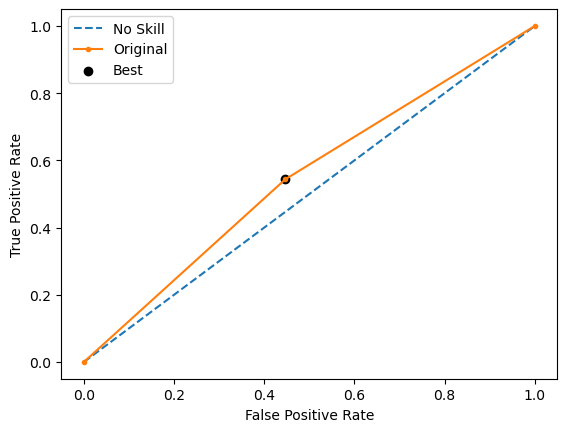

Run 2 - Random State: 1
Test G-mean: 0.5897678246195884
Best Threshold=0.731059, G-Mean=0.590


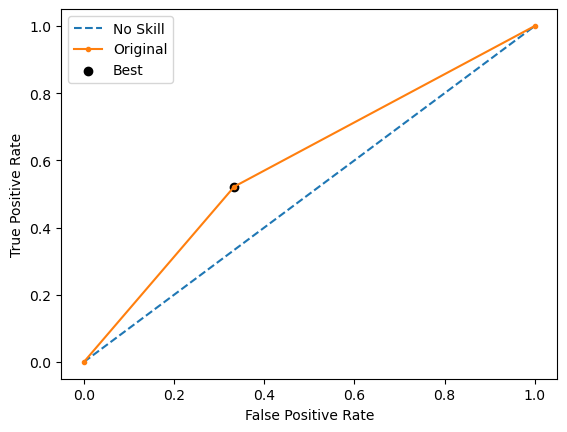

Run 3 - Random State: 2
Test G-mean: 0.5583286908169197
Best Threshold=0.731059, G-Mean=0.558


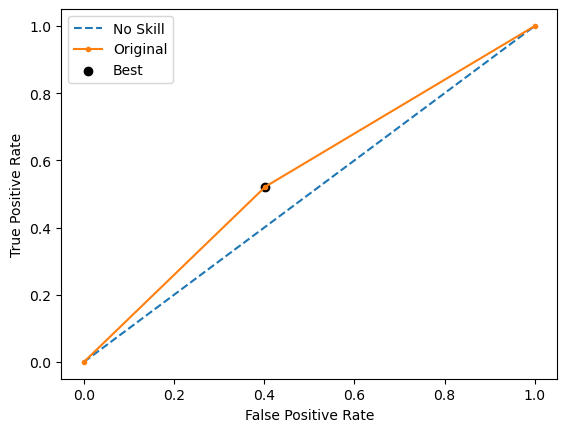

Run 4 - Random State: 3
Test G-mean: 0.5731910590334305
Best Threshold=0.731059, G-Mean=0.573


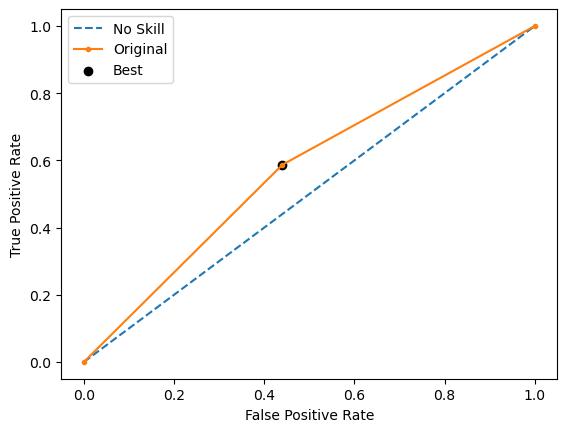

Run 5 - Random State: 4
Test G-mean: 0.5010243813237895
Best Threshold=0.731059, G-Mean=0.501


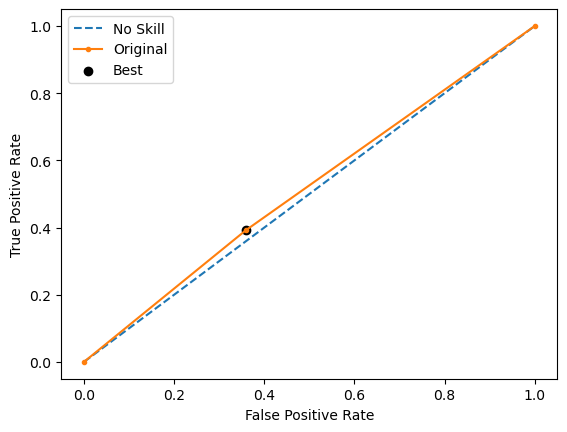

Ave Test G-mean: 0.5541515883892025
Stdev Test G-mean: 0.03355413513182807
Ave Test Specificity: 0.6037735849056604
Ave Test Recall: 0.5130434782608695
Ave Test NPV: 0.8112239440393111
Ave Test Accuracy: 0.5834146341463415
Ave Test Precision: 0.27263655330923375
Ave Test F1-Score: 0.3551417144997291
Ave Runtime: 0.0010464127858479818


In [203]:
ho_t04_adaboost_gs, ho_t04_adaboost_be, ho_t04_adaboost_model_info, ho_t04_adaboost_metrics_df = adaboost_class2(ho_t04.drop(columns=['basicMonthlySalary']), g_mean_scorer,
                                                            'home_ownership_class', random_state=0)

Number of features: 1
Test G-mean: 0.4486177232736354
Test Recall: 0.5
Test Specificity: 0.4025157232704403
Runtime: 1.8604795932769775 secs

Number of features: 2
Test G-mean: 0.6242304532275476
Test Recall: 0.6521739130434783
Test Specificity: 0.5974842767295597
Runtime: 1.6418538093566895 secs

Number of features: 3
Test G-mean: 0.49054500280936664
Test Recall: 0.4782608695652174
Test Specificity: 0.5031446540880503
Runtime: 1.4300451278686523 secs

Number of features: 4
Test G-mean: 0.6312004440325564
Test Recall: 0.6739130434782609
Test Specificity: 0.5911949685534591
Runtime: 1.159940481185913 secs

Number of features: 5
Test G-mean: 0.5144879393721156
Test Recall: 0.4782608695652174
Test Specificity: 0.5534591194968553
Runtime: 1.175187587738037 secs

Number of features: 6
Test G-mean: 0.5687611087238894
Test Recall: 0.5652173913043478
Test Specificity: 0.5723270440251572
Runtime: 1.149904727935791 secs

Number of features: 7
Test G-mean: 0.561259570224126
Test Recall: 0.5217391

Number of features: 54
Test G-mean: 0.5780602718385359
Test Recall: 0.5652173913043478
Test Specificity: 0.5911949685534591
Runtime: 0.10007548332214355 secs

Number of features: 55
Test G-mean: 0.5953056721669902
Test Recall: 0.5869565217391305
Test Specificity: 0.6037735849056604
Runtime: 0.0629124641418457 secs

Number of features: 56
Test G-mean: 0.5953056721669902
Test Recall: 0.5869565217391305
Test Specificity: 0.6037735849056604
Runtime: 0.0625460147857666 secs

Number of features: 57
Test G-mean: 0.5953056721669902
Test Recall: 0.5869565217391305
Test Specificity: 0.6037735849056604
Runtime: 0.07177591323852539 secs

Number of features: 58
Test G-mean: 0.5953056721669902
Test Recall: 0.5869565217391305
Test Specificity: 0.6037735849056604
Runtime: 0.0626676082611084 secs



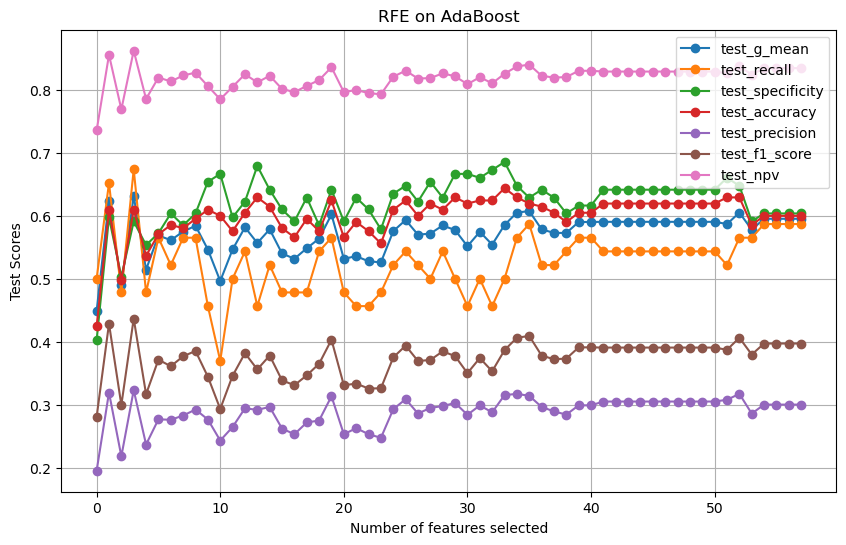

In [204]:
df = ho_t04
estimator = ho_t04_adaboost_be
label_col = 'home_ownership_class'
random_state = 0
importance_getter = 'named_steps.classifier.feature_importances_'

ho_t04_adaboost_rfe = []
for n_features in range(1, 59):
    res = rfe_fitter(df, estimator, n_features, label_col,
                     importance_getter, random_state)
    ho_t04_adaboost_rfe.append(res)
    
plt.figure(figsize=(10, 6))

ho_t04_adaboost_rfe = pd.DataFrame(ho_t04_adaboost_rfe)

cols = ho_t04_adaboost_rfe.columns.tolist()
cols.remove('selected_features')
cols.remove('runtime')

for column in cols:
    plt.plot(ho_t04_adaboost_rfe.index, ho_t04_adaboost_rfe[column],
             marker='o', linestyle='-', label=column)

plt.title('RFE on AdaBoost')
plt.xlabel('Number of features selected')
plt.ylabel('Test Scores')
plt.legend()
plt.grid(True)
plt.show()

In [212]:
ho_t04_adaboost_rfe.sort_values('test_g_mean', ascending=False)

test_g_mean  test_recall  test_specificity  test_accuracy  test_precision  \
3      0.631200     0.673913          0.591195       0.609756        0.322917   
1      0.624230     0.652174          0.597484       0.609756        0.319149   
35     0.607581     0.586957          0.628931       0.619512        0.313953   
34     0.605101     0.565217          0.647799       0.629268        0.317073   
52     0.605101     0.565217          0.647799       0.629268        0.317073   
19     0.602156     0.565217          0.641509       0.624390        0.313253   
57     0.595306     0.586957          0.603774       0.600000        0.300000   
54     0.595306     0.586957          0.603774       0.600000        0.300000   
56     0.595306     0.586957          0.603774       0.600000        0.300000   
55     0.595306     0.586957          0.603774       0.600000        0.300000   
25     0.593350     0.543478          0.647799       0.624390        0.308642   
45     0.590463     0.543478          0.641509       0.619512        0.304878   
41     0.590463     0.543478          0.641509       0.619512        0.304878   
42     0.590463     0.543478          0.641509       0.619512        0.304878   
43     0.590463     0.543478          0.641509       0.619512        0.304878   
44     0.590463     0.543478          0.641509       0.619512        0.304878   
47     0.590463     0.543478          0.641509       0.619512        0.304878   
46     0.590463     0.543478          0.641509       0.619512        0.304878   
48     0.590463     0.543478          0.641509       0.619512        0.304878   
49     0.590463     0.543478          0.641509       0.619512        0.304878   
50     0.590463     0.543478          0.641509       0.619512        0.304878   
40     0.590231     0.565217          0.616352       0.604878        0.298851   
39     0.590231     0.565217          0.616352       0.604878        0.298851   
51     0.586979     0.521739          0.660377       0.629268        0.307692   
33     0.585463     0.500000          0.685535       0.643902        0.315068   
28     0.584645     0.543478          0.628931       0.609756        0.297619   
8      0.584177     0.565217          0.603774       0.595122        0.292135   
12     0.581715     0.543478          0.622642       0.604878        0.294118   
14     0.578533     0.521739          0.641509       0.614634        0.296296   
36     0.578533     0.521739          0.641509       0.614634        0.296296   
53     0.578060     0.565217          0.591195       0.585366        0.285714   
29     0.577350     0.500000          0.666667       0.629268        0.302632   
24     0.575690     0.521739          0.635220       0.609756        0.292683   
7      0.574977     0.565217          0.584906       0.580488        0.282609   
31     0.574620     0.500000          0.660377       0.624390        0.298701   
38     0.572833     0.543478          0.603774       0.590244        0.284091   
37     0.572833     0.521739          0.628931       0.604878        0.289157   
27     0.571878     0.500000          0.654088       0.619512        0.294872   
26     0.569962     0.521739          0.622642       0.600000        0.285714   
5      0.568761     0.565217          0.572327       0.570732        0.276596   
18     0.563812     0.543478          0.584906       0.575610        0.274725   
6      0.561260     0.521739          0.603774       0.585366        0.275862   
13     0.556857     0.456522          0.679245       0.629268        0.291667   
32     0.554273     0.456522          0.672956       0.624390        0.287671   
30     0.551677     0.456522          0.666667       0.619512        0.283784   
17     0.548446     0.478261          0.628931       0.595122        0.271605   
11     0.546573     0.500000          0.597484       0.575610        0.264368   
9      0.546448     0.456522          0.654088       0.609756        0.276316   
15     0.540157     0.478261       

In [208]:
ho_t04_xgb_gs, ho_t04_xgb_be, ho_t04_xgb_model_info, ho_t04_xgb_metrics_df = xgb_class2(ho_t04.drop(columns=['basicMonthlySalary']), g_mean_scorer,
                                                            'home_ownership_class', random_state=0)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
Best Hyperparameters: {'classifier__grow_policy': 'depthwise', 'classifier__learning_rate': 0.2, 'classifier__n_estimators': 100, 'resampling': RandomUnderSampler(random_state=0)}
Best Validation Score: 0.52316466406876
Best Estimator: Pipeline(steps=[('resampling', RandomUnderSampler(random_state=0)),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                      

Number of features: 1
Test G-mean: 0.5208268388985305
Test Recall: 0.6739130434782609
Test Specificity: 0.4025157232704403
Runtime: 9.555605173110962 secs

Number of features: 2
Test G-mean: 0.5396501768475723
Test Recall: 0.6521739130434783
Test Specificity: 0.44654088050314467
Runtime: 9.424959897994995 secs

Number of features: 3
Test G-mean: 0.4894288580120333
Test Recall: 0.5217391304347826
Test Specificity: 0.4591194968553459
Runtime: 9.257309436798096 secs

Number of features: 4
Test G-mean: 0.5827715174143585
Test Recall: 0.5869565217391305
Test Specificity: 0.5786163522012578
Runtime: 9.116121292114258 secs

Number of features: 5
Test G-mean: 0.6075813074140365
Test Recall: 0.6521739130434783
Test Specificity: 0.5660377358490566
Runtime: 8.937321186065674 secs

Number of features: 6
Test G-mean: 0.5667141159822
Test Recall: 0.5869565217391305
Test Specificity: 0.5471698113207547
Runtime: 8.689506530761719 secs

Number of features: 7
Test G-mean: 0.5638115918235909
Test Recall:

Number of features: 54
Test G-mean: 0.6109474345985044
Test Recall: 0.6521739130434783
Test Specificity: 0.5723270440251572
Runtime: 0.5324535369873047 secs

Number of features: 55
Test G-mean: 0.6109474345985044
Test Recall: 0.6521739130434783
Test Specificity: 0.5723270440251572
Runtime: 0.3850076198577881 secs

Number of features: 56
Test G-mean: 0.6109474345985044
Test Recall: 0.6521739130434783
Test Specificity: 0.5723270440251572
Runtime: 0.3775169849395752 secs

Number of features: 57
Test G-mean: 0.6109474345985044
Test Recall: 0.6521739130434783
Test Specificity: 0.5723270440251572
Runtime: 0.37163257598876953 secs

Number of features: 58
Test G-mean: 0.6109474345985044
Test Recall: 0.6521739130434783
Test Specificity: 0.5723270440251572
Runtime: 0.3535749912261963 secs



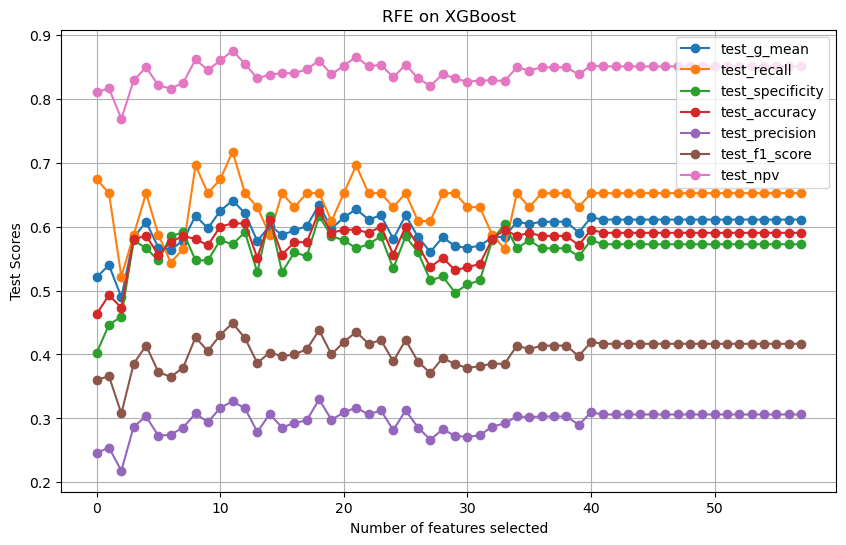

In [209]:
df = ho_t04
estimator = ho_t04_xgb_be
label_col = 'home_ownership_class'
random_state = 0
importance_getter = 'named_steps.classifier.feature_importances_'

ho_t04_xgb_rfe = []
for n_features in range(1, 59):
    res = rfe_fitter(df, estimator, n_features, label_col,
                     importance_getter, random_state)
    ho_t04_xgb_rfe.append(res)
    
plt.figure(figsize=(10, 6))

ho_t04_xgb_rfe = pd.DataFrame(ho_t04_xgb_rfe)

cols = ho_t04_xgb_rfe.columns.tolist()
cols.remove('selected_features')
cols.remove('runtime')

for column in cols:
    plt.plot(ho_t04_xgb_rfe.index, ho_t04_xgb_rfe[column],
             marker='o', linestyle='-', label=column)

plt.title('RFE on XGBoost')
plt.xlabel('Number of features selected')
plt.ylabel('Test Scores')
plt.legend()
plt.grid(True)
plt.show()

In [213]:
ho_t04_xgb_rfe.sort_values('test_g_mean', ascending=False)

test_g_mean  test_recall  test_specificity  test_accuracy  test_precision  \
11     0.640767     0.717391          0.572327       0.604878        0.326733   
18     0.634010     0.652174          0.616352       0.624390        0.329670   
21     0.627507     0.695652          0.566038       0.595122        0.316832   
10     0.624449     0.673913          0.578616       0.600000        0.316327   
12     0.620936     0.652174          0.591195       0.604878        0.315789   
23     0.617625     0.652174          0.584906       0.600000        0.312500   
25     0.617625     0.652174          0.584906       0.600000        0.312500   
8      0.616960     0.695652          0.547170       0.580488        0.307692   
40     0.614295     0.652174          0.578616       0.595122        0.309278   
20     0.614295     0.652174          0.578616       0.595122        0.309278   
43     0.610947     0.652174          0.572327       0.590244        0.306122   
42     0.610947     0.652174          0.572327       0.590244        0.306122   
44     0.610947     0.652174          0.572327       0.590244        0.306122   
45     0.610947     0.652174          0.572327       0.590244        0.306122   
46     0.610947     0.652174          0.572327       0.590244        0.306122   
41     0.610947     0.652174          0.572327       0.590244        0.306122   
51     0.610947     0.652174          0.572327       0.590244        0.306122   
52     0.610947     0.652174          0.572327       0.590244        0.306122   
53     0.610947     0.652174          0.572327       0.590244        0.306122   
48     0.610947     0.652174          0.572327       0.590244        0.306122   
50     0.610947     0.652174          0.572327       0.590244        0.306122   
47     0.610947     0.652174          0.572327       0.590244        0.306122   
57     0.610947     0.652174          0.572327       0.590244        0.306122   
22     0.610947     0.652174          0.572327       0.590244        0.306122   
54     0.610947     0.652174          0.572327       0.590244        0.306122   
56     0.610947     0.652174          0.572327       0.590244        0.306122   
55     0.610947     0.652174          0.572327       0.590244        0.306122   
49     0.610947     0.652174          0.572327       0.590244        0.306122   
36     0.607581     0.652174          0.566038       0.585366        0.303030   
4      0.607581     0.652174          0.566038       0.585366        0.303030   
34     0.607581     0.652174          0.566038       0.585366        0.303030   
37     0.607581     0.652174          0.566038       0.585366        0.303030   
38     0.607581     0.652174          0.566038       0.585366        0.303030   
35     0.603970     0.630435          0.578616       0.590244        0.302083   
14     0.601475     0.586957          0.616352       0.609756        0.306818   
17     0.600792     0.652174          0.553459       0.575610        0.297030   
9      0.597369     0.652174          0.547170       0.570732        0.294118   
19     0.596682     0.608696          0.584906       0.590244        0.297872   
16     0.594041     0.630435          0.559748       0.575610        0.292929   
39     0.590694     0.630435          0.553459       0.570732        0.290000   
15     0.586979     0.652174          0.528302       0.556098        0.285714   
33     0.584177     0.565217          0.603774       0.595122        0.292135   
26     0.583709     0.608696          0.559748       0.570732        0.285714   
28     0.583475     0.652174          0.522013       0.551220        0.283019   
32     0.582772     0.586957          0.578616       0.580488        0.287234   
3      0.582772     0.586957          0.578616       0.580488        0.287234   
24     0.580538     0.630435          0.534591       0.556098        0.281553   
7      0.578060     0.565217          0.591195       0.585366        0.285714   
13     0.577113     0.630435       

In [215]:
ho_t04_lgbm_gs, ho_t04_lgbm_be, ho_t04_lgbm_model_info, ho_t04_lgbm_metrics_df = lgbm_class2(ho_t04.drop(columns=['basicMonthlySalary']), g_mean_scorer,
                                                            'home_ownership_class', random_state=0)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits
Best Hyperparameters: {'classifier__boosting_type': 'dart', 'classifier__learning_rate': 0.01, 'classifier__n_estimators': 50, 'resampling': RandomUnderSampler(random_state=0)}
Best Validation Score: 0.5477784857249345
Best Estimator: Pipeline(steps=[('resampling', RandomUnderSampler(random_state=0)),
                ('classifier',
                 LGBMClassifier(boosting_type='dart', learning_rate=0.01,
                                n_estimators=50, random_state=0))])
GridSearchCV Runtime: 0.4279726465543111
Run 1 - Random State: 0
Test G-mean: 0.5203015469455157
Run 2 - Random State: 1
Test G-mean: 0.4615367086621741
Run 3 - Random State: 2
Test G-mean: 0.5196441852844816
Run 4 - Random State: 3
Test G-mean: 0.6265260287036366
Run 5 - Random State: 4
Test G-mean: 0.4888698300077679
Ave Test G-mean: 0.5233756599207152
Stdev Test G-mean: 0.0626060716790618
Ave Test Specificity: 0.5056603773584906
Ave Test Recall: 0.5478

Number of features: 1
Test G-mean: 0.44371465011886485
Test Recall: 0.43478260869565216
Test Specificity: 0.4528301886792453
Runtime: 6.376882314682007 secs

Number of features: 2
Test G-mean: 0.4653718511073885
Test Recall: 0.4782608695652174
Test Specificity: 0.4528301886792453
Runtime: 6.321699619293213 secs

Number of features: 3
Test G-mean: 0.6615540904583184
Test Recall: 0.717391304347826
Test Specificity: 0.610062893081761
Runtime: 6.275567054748535 secs

Number of features: 4
Test G-mean: 0.6244494430442219
Test Recall: 0.6739130434782609
Test Specificity: 0.5786163522012578
Runtime: 6.164878606796265 secs

Number of features: 5
Test G-mean: 0.644278153923165
Test Recall: 0.717391304347826
Test Specificity: 0.5786163522012578
Runtime: 6.010332345962524 secs

Number of features: 6
Test G-mean: 0.6062296231870663
Test Recall: 0.6956521739130435
Test Specificity: 0.5283018867924528
Runtime: 5.95294713973999 secs

Number of features: 7
Test G-mean: 0.5728331501262048
Test Recall: 

Number of features: 54
Test G-mean: 0.5834749232436153
Test Recall: 0.6521739130434783
Test Specificity: 0.5220125786163522
Runtime: 0.38140177726745605 secs

Number of features: 55
Test G-mean: 0.5834749232436153
Test Recall: 0.6521739130434783
Test Specificity: 0.5220125786163522
Runtime: 0.2573668956756592 secs

Number of features: 56
Test G-mean: 0.5834749232436153
Test Recall: 0.6521739130434783
Test Specificity: 0.5220125786163522
Runtime: 0.25739526748657227 secs

Number of features: 57
Test G-mean: 0.5834749232436153
Test Recall: 0.6521739130434783
Test Specificity: 0.5220125786163522
Runtime: 0.2609426975250244 secs

Number of features: 58
Test G-mean: 0.5834749232436153
Test Recall: 0.6521739130434783
Test Specificity: 0.5220125786163522
Runtime: 0.2613692283630371 secs



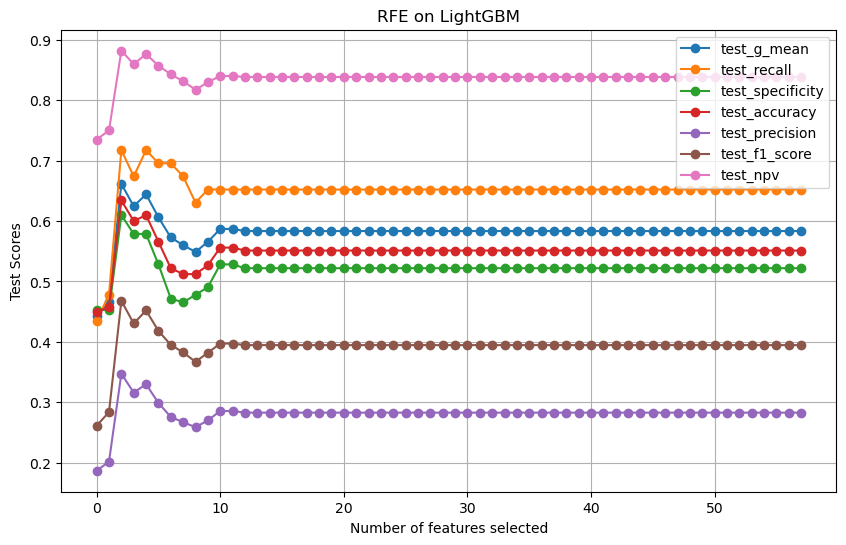

In [216]:
df = ho_t04
estimator = ho_t04_lgbm_be
label_col = 'home_ownership_class'
random_state = 0
importance_getter = 'named_steps.classifier.feature_importances_'

ho_t04_lgbm_rfe = []
for n_features in range(1, 59):
    res = rfe_fitter(df, estimator, n_features, label_col,
                     importance_getter, random_state)
    ho_t04_lgbm_rfe.append(res)
    
plt.figure(figsize=(10, 6))

ho_t04_lgbm_rfe = pd.DataFrame(ho_t04_lgbm_rfe)

cols = ho_t04_lgbm_rfe.columns.tolist()
cols.remove('selected_features')
cols.remove('runtime')

for column in cols:
    plt.plot(ho_t04_lgbm_rfe.index, ho_t04_lgbm_rfe[column],
             marker='o', linestyle='-', label=column)

plt.title('RFE on LightGBM')
plt.xlabel('Number of features selected')
plt.ylabel('Test Scores')
plt.legend()
plt.grid(True)
plt.show()

In [232]:
ho_t02

userId          lastFirstName   age  gender      province  \
0       370.0          IBALI, HOWARD  24.0    MALE  METRO MANILA   
1      1025.0  PATALINGHOG, KIMBERLY  26.0  FEMALE  METRO MANILA   
2      1105.0      TEMILLOSO, DENNIS  40.0    MALE  METRO MANILA   
3      1719.0         OSCARES, ELMER  32.0    MALE       UNKNOWN   
4      2081.0         LEGASPI, MANNY  39.0    MALE  METRO MANILA   
...       ...                    ...   ...     ...           ...   
1065  12850.0         LIPANGO, ARVIN  34.0    MALE  METRO MANILA   
1066  12852.0          TEJADA, JERIC  27.0    MALE        LAGUNA   
1067  12853.0         RAMOS, RHEALYN  27.0  FEMALE        CAVITE   
1068  12854.0         BURGOS, LIEZEL  48.0  FEMALE        ILOILO   
1069  12857.0     SEÑERES, JENNY MAE  24.0  FEMALE  METRO MANILA   

                         job  basicMonthlySalary  \
0          SERVICE AND SALES             19000.0   
1          SERVICE AND SALES             15000.0   
2          SERVICE AND SALES             20000.0   
3           MACHINE OPERATOR             21200.0   
4           CLERICAL SUPPORT             19800.0   
...                      ...                 ...   
1065  ASSOCIATE PROFESSIONAL             19000.0   
1066         CRAFT AND TRADE             20000.0   
1067       SERVICE AND SALES             13962.0   
1068       SERVICE AND SALES             51000.0   
1069       SERVICE AND SALES             98800.0   

      preferredNetDisposableIncomeId  workingFamilyCount  residentsCount  \
0                                2.0                 3.0             3.0   
1                                3.0                 2.0             4.0   
2                                2.0                 0.0             3.0   
3                                2.0                 0.0             5.0   
4                                2.0                 0.0             0.0   
...                              ...                 ...             ...   
1065                             2.0                 2.0             4.0   
1066                             2.0                 1.0             1.0   
1067                             1.0                 2.0             4.0   
1068                             2.0                 0.0             5.0   
1069                             3.0                 3.0             3.0   

      monthlyFamilyIncome    food  hygiene  houseCleaning    fare  parking  \
0                 40000.0  1000.0    500.0          200.0   200.0      0.0   
1                 30000.0  5000.0   3000.0         2000.0  2000.0      0.0   
2                 30000.0  3000.0    500.0          300.0   200.0     50.0   
3                 12000.0  2000.0    500.0          200.0   392.0      0.0   
4                 25000.0  5000.0   2000.0         1000.0  1500.0      0.0   
...                   ...     ...      ...            ...     ...      ...   
1065              19000.0  5000.0   1000.0         1000.0     1.0      1.0   
1066              20000.0  5000.0    500.0          400.0   280.0      0.0   
1067              40000.0     4.0      2.0            1.0     3.0      1.0   
1068              51000.0  5000.0   3000.0         1500.0  2000.0      0.0   
1069             143800.0  7000.0   3000.0         2000.0     0.0      0.0   

      gasoline  tuition  allowance  uniform  otherEducation  emergency  \
0          0.0      0.0       50.0      0.0             0.0      500.0   
1          0.0      0.0        0.0      0.0             0.0     2000.0   
2         50.0    500.0      100.0    100.0            50.0      500.0   
3          0.0      0.0        0.0      0.0             0.0      100.0   
4          0.0   1000.0      500.0   1500.0             0.0        0.0   
...        ...      ...        ...      ...             ...        ...   
1065       1.0   1000.0      500.0      1.0          1000.0     1000.0   
1066       0.0      0.0        0.0      0.0             0.0        0.0   
1067       1.0      0.0        0.0      0.0      

In [233]:
ho_t06 = ho_t02.copy()
ho_t06 = pd.get_dummies(ho_t06, columns=['gender'], prefix='gender', drop_first='True')
ho_t06 = pd.get_dummies(ho_t06, columns=['province'], prefix='province')
ho_t06 = pd.get_dummies(ho_t06, columns=['job'], prefix='job')
ho_t06

userId          lastFirstName   age  basicMonthlySalary  \
0       370.0          IBALI, HOWARD  24.0             19000.0   
1      1025.0  PATALINGHOG, KIMBERLY  26.0             15000.0   
2      1105.0      TEMILLOSO, DENNIS  40.0             20000.0   
3      1719.0         OSCARES, ELMER  32.0             21200.0   
4      2081.0         LEGASPI, MANNY  39.0             19800.0   
...       ...                    ...   ...                 ...   
1065  12850.0         LIPANGO, ARVIN  34.0             19000.0   
1066  12852.0          TEJADA, JERIC  27.0             20000.0   
1067  12853.0         RAMOS, RHEALYN  27.0             13962.0   
1068  12854.0         BURGOS, LIEZEL  48.0             51000.0   
1069  12857.0     SEÑERES, JENNY MAE  24.0             98800.0   

      preferredNetDisposableIncomeId  workingFamilyCount  residentsCount  \
0                                2.0                 3.0             3.0   
1                                3.0                 2.0             4.0   
2                                2.0                 0.0             3.0   
3                                2.0                 0.0             5.0   
4                                2.0                 0.0             0.0   
...                              ...                 ...             ...   
1065                             2.0                 2.0             4.0   
1066                             2.0                 1.0             1.0   
1067                             1.0                 2.0             4.0   
1068                             2.0                 0.0             5.0   
1069                             3.0                 3.0             3.0   

      monthlyFamilyIncome    food  hygiene  houseCleaning    fare  parking  \
0                 40000.0  1000.0    500.0          200.0   200.0      0.0   
1                 30000.0  5000.0   3000.0         2000.0  2000.0      0.0   
2                 30000.0  3000.0    500.0          300.0   200.0     50.0   
3                 12000.0  2000.0    500.0          200.0   392.0      0.0   
4                 25000.0  5000.0   2000.0         1000.0  1500.0      0.0   
...                   ...     ...      ...            ...     ...      ...   
1065              19000.0  5000.0   1000.0         1000.0     1.0      1.0   
1066              20000.0  5000.0    500.0          400.0   280.0      0.0   
1067              40000.0     4.0      2.0            1.0     3.0      1.0   
1068              51000.0  5000.0   3000.0         1500.0  2000.0      0.0   
1069             143800.0  7000.0   3000.0         2000.0     0.0      0.0   

      gasoline  tuition  allowance  uniform  otherEducation  emergency  \
0          0.0      0.0       50.0      0.0             0.0      500.0   
1          0.0      0.0        0.0      0.0             0.0     2000.0   
2         50.0    500.0      100.0    100.0            50.0      500.0   
3          0.0      0.0        0.0      0.0             0.0      100.0   
4          0.0   1000.0      500.0   1500.0             0.0        0.0   
...        ...      ...        ...      ...             ...        ...   
1065       1.0   1000.0      500.0      1.0          1000.0     1000.0   
1066       0.0      0.0        0.0      0.0             0.0        0.0   
1067       1.0      0.0        0.0      0.0             0.0    30000.0   
1068       0.0  15000.0     9000.0      0.0             0.0     1000.0   
1069    6000.0      0.0        0.0      0.0             0.0     5000.0   

      medicine  water  electricity    rent  repair  cinema  dineOut  leisure  \
0        450.0    0.0          0.0     0.0     0.0     0.0      0.0      0.0   
1          0.0  200.0        200.0  1000.0   500.0     0.0      0.0      0.0   
2        100.0  200.0        500.0     0.0   200.0     0.0    100.0    100.0   
3          0.0  200.0        200.0  3000.0     0.0     0.0      0.0      0.0   
4       1000.0  300.0       1900.0     0.0  1000.0     0.0   1000.0   1000.

In [234]:
ho_t06_X = ho_t06.copy().drop(['userId', 'lastFirstName', 'home_ownership_class'], axis=1)
ho_t06_y = ho_t06.copy()[['home_ownership_class']]
ho_t06_y

home_ownership_class
0                        1
1                        0
2                        0
3                        1
4                        0
...                    ...
1065                     0
1066                     0
1067                     0
1068                     0
1069                     0

[1032 rows x 1 columns]

In [236]:
selector = VarianceThreshold(threshold=0.15)
filtered_data = selector.fit_transform(ho_t06_X)

# Convert the array back to dataframe and retain feature names
ho_t06_X_f01 = pd.DataFrame(filtered_data, columns=ho_t06_X.columns[selector.get_support()])

display(ho_t06_X_f01)

# Getting the boolean mask of retained columns
retained_columns_mask = selector.get_support()

# Using the inverse of the boolean mask to get the column names that were filtered out
filtered_out_columns = ho_t06_X.columns[~retained_columns_mask].tolist()

print('Number of columns:', len(filtered_out_columns))
print('Removed columns:', filtered_out_columns)

age  basicMonthlySalary  preferredNetDisposableIncomeId  \
0     24.0             19000.0                             2.0   
1     26.0             15000.0                             3.0   
2     40.0             20000.0                             2.0   
3     32.0             21200.0                             2.0   
4     39.0             19800.0                             2.0   
...    ...                 ...                             ...   
1027  34.0             19000.0                             2.0   
1028  27.0             20000.0                             2.0   
1029  27.0             13962.0                             1.0   
1030  48.0             51000.0                             2.0   
1031  24.0             98800.0                             3.0   

      workingFamilyCount  residentsCount  monthlyFamilyIncome    food  \
0                    3.0             3.0              40000.0  1000.0   
1                    2.0             4.0              30000.0  5000.0   
2                    0.0             3.0              30000.0  3000.0   
3                    0.0             5.0              12000.0  2000.0   
4                    0.0             0.0              25000.0  5000.0   
...                  ...             ...                  ...     ...   
1027                 2.0             4.0              19000.0  5000.0   
1028                 1.0             1.0              20000.0  5000.0   
1029                 2.0             4.0              40000.0     4.0   
1030                 0.0             5.0              51000.0  5000.0   
1031                 3.0             3.0             143800.0  7000.0   

      hygiene  houseCleaning    fare  parking  gasoline  tuition  allowance  \
0       500.0          200.0   200.0      0.0       0.0      0.0       50.0   
1      3000.0         2000.0  2000.0      0.0       0.0      0.0        0.0   
2       500.0          300.0   200.0     50.0      50.0    500.0      100.0   
3       500.0          200.0   392.0      0.0       0.0      0.0        0.0   
4      2000.0         1000.0  1500.0      0.0       0.0   1000.0      500.0   
...       ...            ...     ...      ...       ...      ...        ...   
1027   1000.0         1000.0     1.0      1.0       1.0   1000.0      500.0   
1028    500.0          400.0   280.0      0.0       0.0      0.0        0.0   
1029      2.0            1.0     3.0      1.0       1.0      0.0        0.0   
1030   3000.0         1500.0  2000.0      0.0       0.0  15000.0     9000.0   
1031   3000.0         2000.0     0.0      0.0    6000.0      0.0        0.0   

      uniform  otherEducation  emergency  medicine  water  electricity  \
0         0.0             0.0      500.0     450.0    0.0          0.0   
1         0.0             0.0     2000.0       0.0  200.0        200.0   
2       100.0            50.0      500.0     100.0  200.0        500.0   
3         0.0             0.0      100.0       0.0  200.0        200.0   
4      1500.0             0.0        0.0    1000.0  300.0       1900.0   
...       ...             ...        ...       ...    ...          ...   
1027      1.0          1000.0     1000.0     500.0  200.0       1500.0   
1028      0.0             0.0        0.0       0.0    0.0          0.0   
1029      0.0             0.0    30000.0    1000.0  150.0       1000.0   
1030      0.0             0.0     1000.0    1000.0  300.0        800.0   
1031      0.0             0.0     5000.0    1000.0    0.0          0.0   

        rent  repair  cinema  dineOut  leisure  personalCare  clothing  \
0        0.0     0.0     0.0      0.0      0.0           0.0       0.0   
1     1000.0   500.0     0.0      0.0      0.0           0.0       0.0   
2        0.0   200.0     0.0    100.0    100.0         100.0     200.0   
3     3000.0     0.0     0.0      0.0      0.0         100.0     200.0   
4        0.0  1000.0     0.0   1000.0   1000.0        1500.0    1500.0   
...      ...     ...     ...      ...      ...         

Number of columns: 48
Removed columns: ['loanOthers', 'payInsurance', 'loanGSIS', 'loanPersonal', 'houseHasPensioner', 'houseHasBusiness', 'houseHasFreelancer', 'houseHasGovtEmployee', 'province_AGUSAN DEL NORTE', 'province_AKLAN', 'province_ALBAY', 'province_BATAAN', 'province_BATANGAS', 'province_BULACAN', 'province_CAGAYAN', 'province_CAMARINES SUR', 'province_CEBU', 'province_COTABATO', 'province_DAVAO DEL SUR', 'province_EASTERN SAMAR', 'province_FOREIGN COUNTRY', 'province_ILOCOS NORTE', 'province_ILOILO', 'province_ISABELA', 'province_LAGUNA', 'province_MARINDUQUE', 'province_MISAMIS OCCIDENTAL', 'province_NEGROS OCCIDENTAL', 'province_NUEVA ECIJA', 'province_ORIENTAL MINDORO', 'province_PANGASINAN', 'province_QUEZON', 'province_QUIRINO', 'province_RIZAL', 'province_ROMBLON', 'province_TARLAC', 'province_UNKNOWN', 'province_ZAMBOANGA DEL NORTE', 'job_AGRICULTURAL', 'job_ARMED FORCES', 'job_CLERICAL SUPPORT', 'job_CRAFT AND TRADE', 'job_ELEMENTARY OCCUPATION', 'job_MACHINE OPERAT

In [238]:
ho_t06_X_f02 = ho_t06_X_f01.copy()
cols_to_drop = [
    'smallLottery', 'otherVices', 'gambling', 'alcohol'
]
ho_t06_X_f02 = ho_t06_X_f01.drop(columns=cols_to_drop)

# Calculate the correlation matrix
correlation_matrix = ho_t06_X_f02.corr()

# Find pairs of columns where the correlation is greater than 0.8
# This will ignore the diagonal which will always be 1 (self correlation)
to_drop = set()
for i in range(len(correlation_matrix)):
    for j in range(i+1, len(correlation_matrix)):
        if correlation_matrix.iloc[i, j] >= 0.8:
            colname = correlation_matrix.columns[j]  # Getting the column name
            to_drop.add(colname)
            print(correlation_matrix.columns[i], "|", colname, "| Correlation:",
                  correlation_matrix.iloc[i, j])

print("\nAfter dropping correlated features:")
ho_t06_X_f02
# ho_t02_X_f02 = ho_t02.copy().drop(columns=cols_to_drop)


After dropping correlated features:


age  basicMonthlySalary  preferredNetDisposableIncomeId  \
0     24.0             19000.0                             2.0   
1     26.0             15000.0                             3.0   
2     40.0             20000.0                             2.0   
3     32.0             21200.0                             2.0   
4     39.0             19800.0                             2.0   
...    ...                 ...                             ...   
1027  34.0             19000.0                             2.0   
1028  27.0             20000.0                             2.0   
1029  27.0             13962.0                             1.0   
1030  48.0             51000.0                             2.0   
1031  24.0             98800.0                             3.0   

      workingFamilyCount  residentsCount  monthlyFamilyIncome    food  \
0                    3.0             3.0              40000.0  1000.0   
1                    2.0             4.0              30000.0  5000.0   
2                    0.0             3.0              30000.0  3000.0   
3                    0.0             5.0              12000.0  2000.0   
4                    0.0             0.0              25000.0  5000.0   
...                  ...             ...                  ...     ...   
1027                 2.0             4.0              19000.0  5000.0   
1028                 1.0             1.0              20000.0  5000.0   
1029                 2.0             4.0              40000.0     4.0   
1030                 0.0             5.0              51000.0  5000.0   
1031                 3.0             3.0             143800.0  7000.0   

      hygiene  houseCleaning    fare  parking  gasoline  tuition  allowance  \
0       500.0          200.0   200.0      0.0       0.0      0.0       50.0   
1      3000.0         2000.0  2000.0      0.0       0.0      0.0        0.0   
2       500.0          300.0   200.0     50.0      50.0    500.0      100.0   
3       500.0          200.0   392.0      0.0       0.0      0.0        0.0   
4      2000.0         1000.0  1500.0      0.0       0.0   1000.0      500.0   
...       ...            ...     ...      ...       ...      ...        ...   
1027   1000.0         1000.0     1.0      1.0       1.0   1000.0      500.0   
1028    500.0          400.0   280.0      0.0       0.0      0.0        0.0   
1029      2.0            1.0     3.0      1.0       1.0      0.0        0.0   
1030   3000.0         1500.0  2000.0      0.0       0.0  15000.0     9000.0   
1031   3000.0         2000.0     0.0      0.0    6000.0      0.0        0.0   

      uniform  otherEducation  emergency  medicine  water  electricity  \
0         0.0             0.0      500.0     450.0    0.0          0.0   
1         0.0             0.0     2000.0       0.0  200.0        200.0   
2       100.0            50.0      500.0     100.0  200.0        500.0   
3         0.0             0.0      100.0       0.0  200.0        200.0   
4      1500.0             0.0        0.0    1000.0  300.0       1900.0   
...       ...             ...        ...       ...    ...          ...   
1027      1.0          1000.0     1000.0     500.0  200.0       1500.0   
1028      0.0             0.0        0.0       0.0    0.0          0.0   
1029      0.0             0.0    30000.0    1000.0  150.0       1000.0   
1030      0.0             0.0     1000.0    1000.0  300.0        800.0   
1031      0.0             0.0     5000.0    1000.0    0.0          0.0   

        rent  repair  cinema  dineOut  leisure  personalCare  clothing  \
0        0.0     0.0     0.0      0.0      0.0           0.0       0.0   
1     1000.0   500.0     0.0      0.0      0.0           0.0       0.0   
2        0.0   200.0     0.0    100.0    100.0         100.0     200.0   
3     3000.0     0.0     0.0      0.0      0.0         100.0     200.0   
4        0.0  1000.0     0.0   1000.0   1000.0        1500.0    1500.0   
...      ...     ...     ...      ...      ...         

In [239]:
ho_t06_X_f02 = ho_t06.copy().drop(columns=filtered_out_columns)
ho_t06_X_f02 = ho_t06_X_f02.copy().drop(columns=cols_to_drop)
ho_t06_X_f02

ho_t06 = ho_t06_X_f02.copy()
ho_t06

userId          lastFirstName   age  basicMonthlySalary  \
0       370.0          IBALI, HOWARD  24.0             19000.0   
1      1025.0  PATALINGHOG, KIMBERLY  26.0             15000.0   
2      1105.0      TEMILLOSO, DENNIS  40.0             20000.0   
3      1719.0         OSCARES, ELMER  32.0             21200.0   
4      2081.0         LEGASPI, MANNY  39.0             19800.0   
...       ...                    ...   ...                 ...   
1065  12850.0         LIPANGO, ARVIN  34.0             19000.0   
1066  12852.0          TEJADA, JERIC  27.0             20000.0   
1067  12853.0         RAMOS, RHEALYN  27.0             13962.0   
1068  12854.0         BURGOS, LIEZEL  48.0             51000.0   
1069  12857.0     SEÑERES, JENNY MAE  24.0             98800.0   

      preferredNetDisposableIncomeId  workingFamilyCount  residentsCount  \
0                                2.0                 3.0             3.0   
1                                3.0                 2.0             4.0   
2                                2.0                 0.0             3.0   
3                                2.0                 0.0             5.0   
4                                2.0                 0.0             0.0   
...                              ...                 ...             ...   
1065                             2.0                 2.0             4.0   
1066                             2.0                 1.0             1.0   
1067                             1.0                 2.0             4.0   
1068                             2.0                 0.0             5.0   
1069                             3.0                 3.0             3.0   

      monthlyFamilyIncome    food  hygiene  houseCleaning    fare  parking  \
0                 40000.0  1000.0    500.0          200.0   200.0      0.0   
1                 30000.0  5000.0   3000.0         2000.0  2000.0      0.0   
2                 30000.0  3000.0    500.0          300.0   200.0     50.0   
3                 12000.0  2000.0    500.0          200.0   392.0      0.0   
4                 25000.0  5000.0   2000.0         1000.0  1500.0      0.0   
...                   ...     ...      ...            ...     ...      ...   
1065              19000.0  5000.0   1000.0         1000.0     1.0      1.0   
1066              20000.0  5000.0    500.0          400.0   280.0      0.0   
1067              40000.0     4.0      2.0            1.0     3.0      1.0   
1068              51000.0  5000.0   3000.0         1500.0  2000.0      0.0   
1069             143800.0  7000.0   3000.0         2000.0     0.0      0.0   

      gasoline  tuition  allowance  uniform  otherEducation  emergency  \
0          0.0      0.0       50.0      0.0             0.0      500.0   
1          0.0      0.0        0.0      0.0             0.0     2000.0   
2         50.0    500.0      100.0    100.0            50.0      500.0   
3          0.0      0.0        0.0      0.0             0.0      100.0   
4          0.0   1000.0      500.0   1500.0             0.0        0.0   
...        ...      ...        ...      ...             ...        ...   
1065       1.0   1000.0      500.0      1.0          1000.0     1000.0   
1066       0.0      0.0        0.0      0.0             0.0        0.0   
1067       1.0      0.0        0.0      0.0             0.0    30000.0   
1068       0.0  15000.0     9000.0      0.0             0.0     1000.0   
1069    6000.0      0.0        0.0      0.0             0.0     5000.0   

      medicine  water  electricity    rent  repair  cinema  dineOut  leisure  \
0        450.0    0.0          0.0     0.0     0.0     0.0      0.0      0.0   
1          0.0  200.0        200.0  1000.0   500.0     0.0      0.0      0.0   
2        100.0  200.0        500.0     0.0   200.0     0.0    100.0    100.0   
3          0.0  200.0        200.0  3000.0     0.0     0.0      0.0      0.0   
4       1000.0  300.0       1900.0     0.0  1000.0     0.0   1000.0   1000.

In [240]:
ho_t06_rf_gs, ho_t06_rf_be, ho_t06_rf_model_info, ho_t06_rf_metrics_df = rf_class2(ho_t06, g_mean_scorer,
                                                            'home_ownership_class', random_state=0)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits
Best Hyperparameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__n_estimators': 50, 'resampling': SMOTEENN(random_state=0)}
Best Validation Score: 0.5895339477473737
Best Estimator: Pipeline(steps=[('resampling', SMOTEENN(random_state=0)),
                ('classifier',
                 RandomForestClassifier(criterion='entropy', n_estimators=50,
                                        random_state=0))])
GridSearchCV Runtime: 1.4421371459960937
Run 1 - Random State: 0
Test G-mean: 0.5815633512644206
Run 2 - Random State: 1
Test G-mean: 0.5578749768504754
Run 3 - Random State: 2
Test G-mean: 0.5514956622112163
Run 4 - Random State: 3
Test G-mean: 0.5745880397335743
Run 5 - Random State: 4
Test G-mean: 0.5382046569827256
Ave Test G-mean: 0.5607453374084823
Stdev Test G-mean: 0.017513479405954144
Ave Test Specificity: 0.6112244897959184
Ave Test Recall: 0.5161290322580645
Ave Test NPV: 0

In [263]:
# ho_t03_full = ho_t03.copy()

In [268]:
ho_t03_full

userId          lastFirstName  age  gender      province  \
0        370          IBALI, HOWARD   24    MALE  METRO MANILA   
1       1025  PATALINGHOG, KIMBERLY   26  FEMALE  METRO MANILA   
2       1105      TEMILLOSO, DENNIS   40    MALE  METRO MANILA   
3       1719         OSCARES, ELMER   32    MALE       UNKNOWN   
4       2081         LEGASPI, MANNY   39    MALE  METRO MANILA   
...      ...                    ...  ...     ...           ...   
1062   12847          DIOSO, DANISA   25  FEMALE  METRO MANILA   
1063   12848       BUGARIN, JUN JUN   31    MALE       BULACAN   
1064   12849      FERERR, JHENNYLYN   29  FEMALE  METRO MANILA   
1065   12850         LIPANGO, ARVIN   34    MALE  METRO MANILA   
1066   12852          TEJADA, JERIC   27    MALE        LAGUNA   

                         job  basicMonthlySalary  \
0          SERVICE AND SALES               19000   
1          SERVICE AND SALES               15000   
2          SERVICE AND SALES               20000   
3           MACHINE OPERATOR               21200   
4           CLERICAL SUPPORT               19800   
...                      ...                 ...   
1062        CLERICAL SUPPORT               16800   
1063       SERVICE AND SALES               46000   
1064  ASSOCIATE PROFESSIONAL               25000   
1065  ASSOCIATE PROFESSIONAL               19000   
1066         CRAFT AND TRADE               20000   

      preferredNetDisposableIncomeId  workingFamilyCount  residentsCount  \
0                                  2                   3               3   
1                                  3                   2               4   
2                                  2                   0               3   
3                                  2                   0               5   
4                                  2                   0               0   
...                              ...                 ...             ...   
1062                               2                   4               5   
1063                               1                   0               0   
1064                               3                   2               4   
1065                               2                   2               4   
1066                               2                   1               1   

      monthlyFamilyIncome  food  hygiene  houseCleaning  fare  parking  \
0                 40000.0  1000      500            200   200        0   
1                 30000.0  5000     3000           2000  2000        0   
2                 30000.0  3000      500            300   200       50   
3                 12000.0  2000      500            200   392        0   
4                 25000.0  5000     2000           1000  1500        0   
...                   ...   ...      ...            ...   ...      ...   
1062              38800.0     0        0              0  1500        0   
1063              80000.0  1500     1000           1000   500        0   
1064              40000.0  4000     1500           1000     0      100   
1065              19000.0  5000     1000           1000     1        1   
1066              20000.0  5000      500            400   280        0   

      gasoline  tuition  allowance  uniform  otherEducation  emergency  \
0            0        0         50        0               0        500   
1            0        0          0        0               0       2000   
2           50      500        100      100              50        500   
3            0        0          0        0               0        100   
4            0     1000        500     1500               0          0   
...        ...      ...        ...      ...             ...        ...   
1062         0        0          0        0               0          0   
1063      1000     1500       1000      450             500        500   
1064       600        0          0      200             300       1500   
1065         1     1000        500        1   

In [274]:
# ho_t03 = ho_t01.copy().drop(ho_t01_outliers)
ho_t03 = ho_t03_full.copy()

ho_t03['monthlyFamilyIncome - basicMonthlySalary'] = ho_t03['monthlyFamilyIncome'] - ho_t03['basicMonthlySalary']
ho_t03['monthlyVices'] = (
    ho_t03['smoking'] + ho_t03['alcohol'] + ho_t03['gambling'] +
    ho_t03['smallLottery'] + ho_t03['otherVices']
)
ho_t03['monthlyUtilityBills'] = (
    ho_t03['water'] + ho_t03['electricity'] + ho_t03['rent'] +
    ho_t03['internet'] + ho_t03['mobileLoad']
)
ho_t03['totalMonthlyExpenses'] = (
    ho_t03['food'] + ho_t03['hygiene'] + ho_t03['houseCleaning'] +
    ho_t03['fare'] + ho_t03['parking'] + ho_t03['gasoline'] +
    ho_t03['tuition'] + ho_t03['allowance'] + ho_t03['uniform'] +
    ho_t03['otherEducation'] + ho_t03['emergency'] + ho_t03['medicine'] +
    ho_t03['repair'] + ho_t03['cinema'] + ho_t03['dineOut'] +
    ho_t03['leisure'] + ho_t03['personalCare'] + ho_t03['clothing'] +
    ho_t03['vehicleLoan'] + ho_t03['monthlyUtilityBills'] +
    ho_t03['informalLenders'] + ho_t03['companyLoan'] + ho_t03['privateLoans'] +
    ho_t03['governmentLoans'] + ho_t03['monthlyVices'] + ho_t03['monthlyUtilityBills']
)
ho_t03['monthlyFamilyIncome - totalMonthlyExpenses'] = ho_t03['monthlyFamilyIncome'] - ho_t03['totalMonthlyExpenses']
ho_t03['basicMonthlySalary - totalMonthlyExpenses'] = ho_t03['basicMonthlySalary'] - ho_t03['totalMonthlyExpenses']
ho_t03['monthlyFamilyIncome / workingFamilyCount'] = np.where(
    ho_t03['workingFamilyCount'] == 0,
    ho_t03['monthlyFamilyIncome'],
    ho_t03['monthlyFamilyIncome'] / ho_t03['workingFamilyCount']
)
ho_t03['monthlyFamilyIncome / residentsCount'] = np.where(
    ho_t03['residentsCount'] == 0,
    ho_t03['monthlyFamilyIncome'],
    ho_t03['monthlyFamilyIncome'] / ho_t03['residentsCount']
)
ho_t03['basicMonthlySalary / monthlyFamilyIncome'] = np.where(
    ho_t03['monthlyFamilyIncome'] == 0,
    0,
    ho_t03['basicMonthlySalary'] / ho_t03['monthlyFamilyIncome']
)
ho_t03['totalMonthlyExpenses / basicMonthlySalary'] = np.where(
    ho_t03['basicMonthlySalary'] == 0,
    0,
    ho_t03['totalMonthlyExpenses'] / ho_t03['basicMonthlySalary']
)
ho_t03['totalMonthlyExpenses / monthlyFamilyIncome'] = np.where(
    ho_t03['monthlyFamilyIncome'] == 0,
    0,
    ho_t03['totalMonthlyExpenses'] / ho_t03['monthlyFamilyIncome']
)
ho_t03['monthlyVices / basicMonthlySalary'] = np.where(
    ho_t03['basicMonthlySalary'] == 0,
    0,
    ho_t03['monthlyVices'] / ho_t03['basicMonthlySalary']
)

In [275]:
ho_t03 = pd.get_dummies(ho_t03, columns=['gender'], prefix='gender', drop_first='True')
ho_t03 = pd.get_dummies(ho_t03, columns=['province'], prefix='province')
ho_t03 = pd.get_dummies(ho_t03, columns=['job'], prefix='job')
ho_t03

userId          lastFirstName  age  basicMonthlySalary  \
0        370          IBALI, HOWARD   24               19000   
1       1025  PATALINGHOG, KIMBERLY   26               15000   
2       1105      TEMILLOSO, DENNIS   40               20000   
3       1719         OSCARES, ELMER   32               21200   
4       2081         LEGASPI, MANNY   39               19800   
...      ...                    ...  ...                 ...   
1062   12847          DIOSO, DANISA   25               16800   
1063   12848       BUGARIN, JUN JUN   31               46000   
1064   12849      FERERR, JHENNYLYN   29               25000   
1065   12850         LIPANGO, ARVIN   34               19000   
1066   12852          TEJADA, JERIC   27               20000   

      preferredNetDisposableIncomeId  workingFamilyCount  residentsCount  \
0                                  2                   3               3   
1                                  3                   2               4   
2                                  2                   0               3   
3                                  2                   0               5   
4                                  2                   0               0   
...                              ...                 ...             ...   
1062                               2                   4               5   
1063                               1                   0               0   
1064                               3                   2               4   
1065                               2                   2               4   
1066                               2                   1               1   

      monthlyFamilyIncome  food  hygiene  houseCleaning  fare  parking  \
0                 40000.0  1000      500            200   200        0   
1                 30000.0  5000     3000           2000  2000        0   
2                 30000.0  3000      500            300   200       50   
3                 12000.0  2000      500            200   392        0   
4                 25000.0  5000     2000           1000  1500        0   
...                   ...   ...      ...            ...   ...      ...   
1062              38800.0     0        0              0  1500        0   
1063              80000.0  1500     1000           1000   500        0   
1064              40000.0  4000     1500           1000     0      100   
1065              19000.0  5000     1000           1000     1        1   
1066              20000.0  5000      500            400   280        0   

      gasoline  tuition  allowance  uniform  otherEducation  emergency  \
0            0        0         50        0               0        500   
1            0        0          0        0               0       2000   
2           50      500        100      100              50        500   
3            0        0          0        0               0        100   
4            0     1000        500     1500               0          0   
...        ...      ...        ...      ...             ...        ...   
1062         0        0          0        0               0          0   
1063      1000     1500       1000      450             500        500   
1064       600        0          0      200             300       1500   
1065         1     1000        500        1            1000       1000   
1066         0        0          0        0               0          0   

      medicine  water  electricity  rent  repair  cinema  dineOut  leisure  \
0          450      0            0     0       0       0        0        0   
1            0    200          200  1000     500       0        0        0   
2          100    200          500     0     200       0      100      100   
3            0    200          200  3000       0       0        0        0   
4         1000    300         1900     0    1000       0     1000     1000   
...        ...    ...          ...   ...     ...     ...      ...      ...   


In [276]:
ho_t03_X = ho_t03.copy().drop(['userId', 'lastFirstName', 'home_ownership_class'], axis=1)
ho_t03_y = ho_t03.copy()[['home_ownership_class']]
ho_t03_y
# ho_t02_X_num = ho_t02_X.drop(['gender', 'province', 'job'], axis=1)

home_ownership_class
0                        1
1                        0
2                        0
3                        1
4                        0
...                    ...
1062                     0
1063                     0
1064                     0
1065                     0
1066                     0

[820 rows x 1 columns]

In [280]:
selector = VarianceThreshold(threshold=0.15)
filtered_data = selector.fit_transform(ho_t03_X)

# Convert the array back to dataframe and retain feature names
ho_t03_X_f01 = pd.DataFrame(filtered_data, columns=ho_t03_X.columns[selector.get_support()])

display(ho_t03_X_f01)

# Getting the boolean mask of retained columns
retained_columns_mask = selector.get_support()

# Using the inverse of the boolean mask to get the column names that were filtered out
filtered_out_columns = ho_t03_X.columns[~retained_columns_mask].tolist()

print('Number of columns:', len(filtered_out_columns))
print('Removed columns:', filtered_out_columns)

age  basicMonthlySalary  preferredNetDisposableIncomeId  \
0    24.0             19000.0                             2.0   
1    26.0             15000.0                             3.0   
2    40.0             20000.0                             2.0   
3    32.0             21200.0                             2.0   
4    39.0             19800.0                             2.0   
..    ...                 ...                             ...   
815  25.0             16800.0                             2.0   
816  31.0             46000.0                             1.0   
817  29.0             25000.0                             3.0   
818  34.0             19000.0                             2.0   
819  27.0             20000.0                             2.0   

     workingFamilyCount  residentsCount  monthlyFamilyIncome    food  hygiene  \
0                   3.0             3.0              40000.0  1000.0    500.0   
1                   2.0             4.0              30000.0  5000.0   3000.0   
2                   0.0             3.0              30000.0  3000.0    500.0   
3                   0.0             5.0              12000.0  2000.0    500.0   
4                   0.0             0.0              25000.0  5000.0   2000.0   
..                  ...             ...                  ...     ...      ...   
815                 4.0             5.0              38800.0     0.0      0.0   
816                 0.0             0.0              80000.0  1500.0   1000.0   
817                 2.0             4.0              40000.0  4000.0   1500.0   
818                 2.0             4.0              19000.0  5000.0   1000.0   
819                 1.0             1.0              20000.0  5000.0    500.0   

     houseCleaning    fare  parking  gasoline  tuition  allowance  uniform  \
0            200.0   200.0      0.0       0.0      0.0       50.0      0.0   
1           2000.0  2000.0      0.0       0.0      0.0        0.0      0.0   
2            300.0   200.0     50.0      50.0    500.0      100.0    100.0   
3            200.0   392.0      0.0       0.0      0.0        0.0      0.0   
4           1000.0  1500.0      0.0       0.0   1000.0      500.0   1500.0   
..             ...     ...      ...       ...      ...        ...      ...   
815            0.0  1500.0      0.0       0.0      0.0        0.0      0.0   
816         1000.0   500.0      0.0    1000.0   1500.0     1000.0    450.0   
817         1000.0     0.0    100.0     600.0      0.0        0.0    200.0   
818         1000.0     1.0      1.0       1.0   1000.0      500.0      1.0   
819          400.0   280.0      0.0       0.0      0.0        0.0      0.0   

     otherEducation  emergency  medicine  water  electricity    rent  repair  \
0               0.0      500.0     450.0    0.0          0.0     0.0     0.0   
1               0.0     2000.0       0.0  200.0        200.0  1000.0   500.0   
2              50.0      500.0     100.0  200.0        500.0     0.0   200.0   
3               0.0      100.0       0.0  200.0        200.0  3000.0     0.0   
4               0.0        0.0    1000.0  300.0       1900.0     0.0  1000.0   
..              ...        ...       ...    ...          ...     ...     ...   
815             0.0        0.0       0.0  600.0       2000.0  4000.0     0.0   
816           500.0      500.0     500.0  300.0        450.0     0.0     0.0   
817           300.0     1500.0       0.0  500.0       1500.0     0.0     0.0   
818          1000.0     1000.0     500.0  200.0       1500.0  5000.0  1000.0   
819             0.0        0.0       0.0    0.0          0.0     0.0     0.0   

     cinema  dineOut  leisure  personalCare  clothing  mobileLoad  internet  \
0       0.0      0.0      0.0           0.0       0.0        50.0       0.0   
1       0.0      0.0      0.0           0.0       0.0         0.0       0.0   
2       0.0    100.0    100.0         100.0     200.0       200.0     200.0   
3       0.0      0.0      0.0         

Number of columns: 48
Removed columns: ['loanOthers', 'payInsurance', 'loanGSIS', 'loanPersonal', 'houseHasPensioner', 'houseHasBusiness', 'houseHasFreelancer', 'houseHasGovtEmployee', 'monthlyVices / basicMonthlySalary', 'province_AGUSAN DEL NORTE', 'province_AKLAN', 'province_ALBAY', 'province_BATAAN', 'province_BATANGAS', 'province_BULACAN', 'province_CAGAYAN', 'province_CAMARINES SUR', 'province_CEBU', 'province_COTABATO', 'province_DAVAO DEL SUR', 'province_EASTERN SAMAR', 'province_FOREIGN COUNTRY', 'province_ILOCOS NORTE', 'province_ISABELA', 'province_LAGUNA', 'province_MISAMIS OCCIDENTAL', 'province_NEGROS OCCIDENTAL', 'province_NUEVA ECIJA', 'province_ORIENTAL MINDORO', 'province_PANGASINAN', 'province_QUEZON', 'province_QUIRINO', 'province_RIZAL', 'province_ROMBLON', 'province_SOUTH COTABATO', 'province_TARLAC', 'province_UNKNOWN', 'province_ZAMBOANGA DEL NORTE', 'job_AGRICULTURAL', 'job_ARMED FORCES', 'job_CLERICAL SUPPORT', 'job_CRAFT AND TRADE', 'job_ELEMENTARY OCCUPATION

In [281]:
ho_t03_X_f02 = ho_t03_X_f01.copy()
# cols_to_drop = [
#     'otherVices', 'monthlyVices', 'gambling', 'alcohol',
#     'monthlyVices / basicMonthlySalary', 'cinema',
#     'monthlyFamilyIncome', 'rent'
# ]
# ho_t03_X_f02 = ho_t03_X_f01.drop(columns=cols_to_drop)
cols_to_drop = [
    'monthlyFamilyIncome'
]
ho_t03_X_f02 = ho_t03_X_f01.drop(columns=cols_to_drop)

# Calculate the correlation matrix
correlation_matrix = ho_t03_X_f02.corr()

# Find pairs of columns where the correlation is greater than 0.8
# This will ignore the diagonal which will always be 1 (self correlation)
to_drop = set()
for i in range(len(correlation_matrix)):
    for j in range(i+1, len(correlation_matrix)):
        if correlation_matrix.iloc[i, j] >= 0.9:
            colname = correlation_matrix.columns[j]  # Getting the column name
            to_drop.add(colname)
            print(correlation_matrix.columns[i], "|", colname, "| Correlation:",
                  correlation_matrix.iloc[i, j])

print("\nAfter dropping correlated features:")
ho_t03_X_f02


After dropping correlated features:


age  basicMonthlySalary  preferredNetDisposableIncomeId  \
0    24.0             19000.0                             2.0   
1    26.0             15000.0                             3.0   
2    40.0             20000.0                             2.0   
3    32.0             21200.0                             2.0   
4    39.0             19800.0                             2.0   
..    ...                 ...                             ...   
815  25.0             16800.0                             2.0   
816  31.0             46000.0                             1.0   
817  29.0             25000.0                             3.0   
818  34.0             19000.0                             2.0   
819  27.0             20000.0                             2.0   

     workingFamilyCount  residentsCount    food  hygiene  houseCleaning  \
0                   3.0             3.0  1000.0    500.0          200.0   
1                   2.0             4.0  5000.0   3000.0         2000.0   
2                   0.0             3.0  3000.0    500.0          300.0   
3                   0.0             5.0  2000.0    500.0          200.0   
4                   0.0             0.0  5000.0   2000.0         1000.0   
..                  ...             ...     ...      ...            ...   
815                 4.0             5.0     0.0      0.0            0.0   
816                 0.0             0.0  1500.0   1000.0         1000.0   
817                 2.0             4.0  4000.0   1500.0         1000.0   
818                 2.0             4.0  5000.0   1000.0         1000.0   
819                 1.0             1.0  5000.0    500.0          400.0   

       fare  parking  gasoline  tuition  allowance  uniform  otherEducation  \
0     200.0      0.0       0.0      0.0       50.0      0.0             0.0   
1    2000.0      0.0       0.0      0.0        0.0      0.0             0.0   
2     200.0     50.0      50.0    500.0      100.0    100.0            50.0   
3     392.0      0.0       0.0      0.0        0.0      0.0             0.0   
4    1500.0      0.0       0.0   1000.0      500.0   1500.0             0.0   
..      ...      ...       ...      ...        ...      ...             ...   
815  1500.0      0.0       0.0      0.0        0.0      0.0             0.0   
816   500.0      0.0    1000.0   1500.0     1000.0    450.0           500.0   
817     0.0    100.0     600.0      0.0        0.0    200.0           300.0   
818     1.0      1.0       1.0   1000.0      500.0      1.0          1000.0   
819   280.0      0.0       0.0      0.0        0.0      0.0             0.0   

     emergency  medicine  water  electricity    rent  repair  cinema  dineOut  \
0        500.0     450.0    0.0          0.0     0.0     0.0     0.0      0.0   
1       2000.0       0.0  200.0        200.0  1000.0   500.0     0.0      0.0   
2        500.0     100.0  200.0        500.0     0.0   200.0     0.0    100.0   
3        100.0       0.0  200.0        200.0  3000.0     0.0     0.0      0.0   
4          0.0    1000.0  300.0       1900.0     0.0  1000.0     0.0   1000.0   
..         ...       ...    ...          ...     ...     ...     ...      ...   
815        0.0       0.0  600.0       2000.0  4000.0     0.0     0.0      0.0   
816      500.0     500.0  300.0        450.0     0.0     0.0     0.0    500.0   
817     1500.0       0.0  500.0       1500.0     0.0     0.0     0.0    500.0   
818     1000.0     500.0  200.0       1500.0  5000.0  1000.0     1.0      1.0   
819        0.0       0.0    0.0          0.0     0.0     0.0     0.0      0.0   

     leisure  personalCare  clothing  mobileLoad  internet  vehicleLoan  \
0        0.0           0.0       0.0        50.0       0.0          0.0   
1        0.0           0.0       0.0         0.0       0.0          0.0   
2      100.0         100.0     200.0       200.0     200.0          0.0   
3        0.0         100.0     200.0       400.0       0.0          0.0   
4     1000.0        1500.0 

In [283]:
ho_t03_X_f02 = ho_t03.copy().drop(columns=filtered_out_columns)
ho_t03_X_f02 = ho_t03_X_f02.copy().drop(columns=cols_to_drop)
ho_t03_X_f02

ho_t03 = ho_t03_X_f02.copy()
ho_t03

userId          lastFirstName  age  basicMonthlySalary  \
0        370          IBALI, HOWARD   24               19000   
1       1025  PATALINGHOG, KIMBERLY   26               15000   
2       1105      TEMILLOSO, DENNIS   40               20000   
3       1719         OSCARES, ELMER   32               21200   
4       2081         LEGASPI, MANNY   39               19800   
...      ...                    ...  ...                 ...   
1062   12847          DIOSO, DANISA   25               16800   
1063   12848       BUGARIN, JUN JUN   31               46000   
1064   12849      FERERR, JHENNYLYN   29               25000   
1065   12850         LIPANGO, ARVIN   34               19000   
1066   12852          TEJADA, JERIC   27               20000   

      preferredNetDisposableIncomeId  workingFamilyCount  residentsCount  \
0                                  2                   3               3   
1                                  3                   2               4   
2                                  2                   0               3   
3                                  2                   0               5   
4                                  2                   0               0   
...                              ...                 ...             ...   
1062                               2                   4               5   
1063                               1                   0               0   
1064                               3                   2               4   
1065                               2                   2               4   
1066                               2                   1               1   

      food  hygiene  houseCleaning  fare  parking  gasoline  tuition  \
0     1000      500            200   200        0         0        0   
1     5000     3000           2000  2000        0         0        0   
2     3000      500            300   200       50        50      500   
3     2000      500            200   392        0         0        0   
4     5000     2000           1000  1500        0         0     1000   
...    ...      ...            ...   ...      ...       ...      ...   
1062     0        0              0  1500        0         0        0   
1063  1500     1000           1000   500        0      1000     1500   
1064  4000     1500           1000     0      100       600        0   
1065  5000     1000           1000     1        1         1     1000   
1066  5000      500            400   280        0         0        0   

      allowance  uniform  otherEducation  emergency  medicine  water  \
0            50        0               0        500       450      0   
1             0        0               0       2000         0    200   
2           100      100              50        500       100    200   
3             0        0               0        100         0    200   
4           500     1500               0          0      1000    300   
...         ...      ...             ...        ...       ...    ...   
1062          0        0               0          0         0    600   
1063       1000      450             500        500       500    300   
1064          0      200             300       1500         0    500   
1065        500        1            1000       1000       500    200   
1066          0        0               0          0         0      0   

      electricity  rent  repair  cinema  dineOut  leisure  personalCare  \
0               0     0       0       0        0        0             0   
1             200  1000     500       0        0        0             0   
2             500     0     200       0      100      100           100   
3             200  3000       0       0        0        0           100   
4            1900     0    1000       0     1000     1000          1500   
...           ...   ...     ...     ...      ...      ...           ...   
1062         2000  4000       0       0        0        0            

Fitting 10 folds for each of 360 candidates, totalling 3600 fits
Best Hyperparameters: {'classifier__algorithm': 'SAMME', 'classifier__estimator': DecisionTreeClassifier(random_state=0), 'classifier__learning_rate': 0.01, 'classifier__n_estimators': 50, 'resampling': SMOTETomek(random_state=0)}
Best Validation Score (G-mean): 0.5382220305947061
Best Estimator: Pipeline(steps=[('resampling', SMOTETomek(random_state=0)),
                ('var_threshold', VarianceThreshold(threshold=0.15)),
                ('classifier',
                 AdaBoostClassifier(algorithm='SAMME',
                                    estimator=DecisionTreeClassifier(random_state=0),
                                    learning_rate=0.01, random_state=0))])
Mean Train Score (G-mean) 0.903450097404459
Std Train Score (G-mean) 0.00800568993595178
GridSearchCV Runtime: 86.74095153808594 secs
Run 1 - Random State: 0
Test G-mean: 0.46375316150349266
Best Threshold=0.731059, G-Mean=0.464


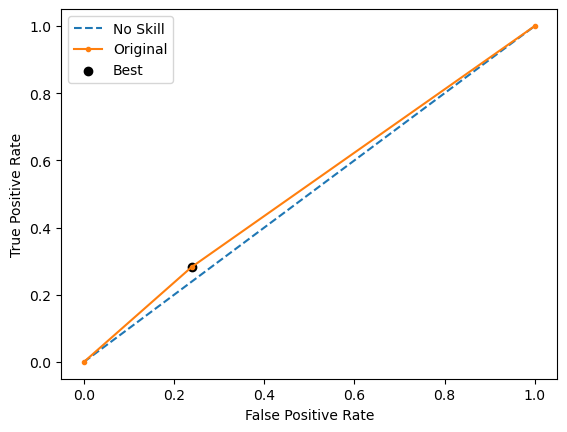

Run 2 - Random State: 1
Test G-mean: 0.548944346987644
Best Threshold=0.731059, G-Mean=0.549


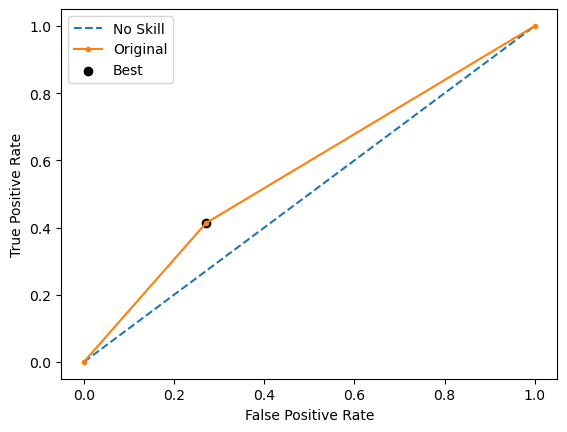

Run 3 - Random State: 2
Test G-mean: 0.47926659858418863
Best Threshold=0.731059, G-Mean=0.479


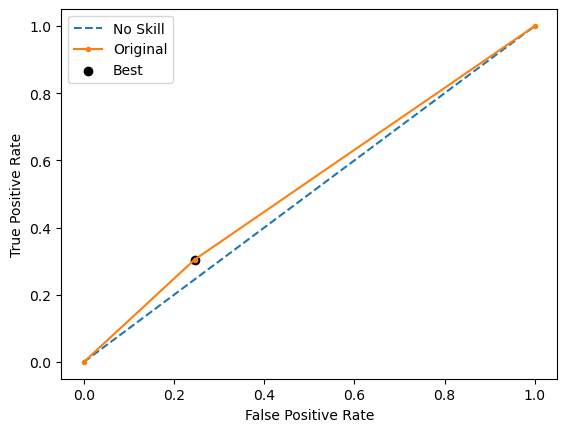

Run 4 - Random State: 3
Test G-mean: 0.40115365491754557
Best Threshold=0.731059, G-Mean=0.401


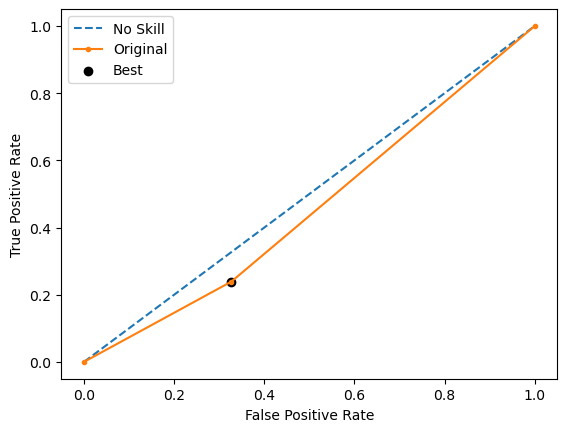

Run 5 - Random State: 4
Test G-mean: 0.45407040082290406
Best Threshold=0.731059, G-Mean=0.454


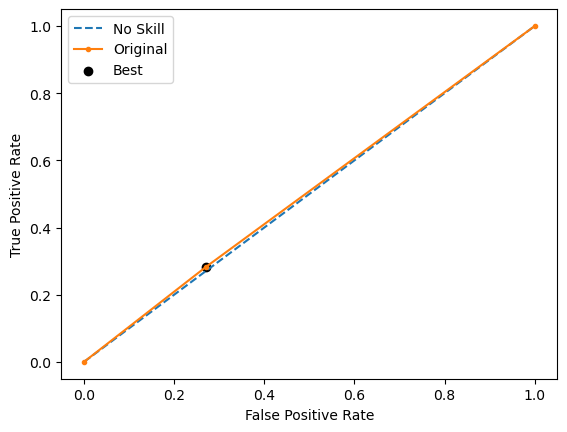

Ave Test G-mean: 0.469437632563155
Stdev Test G-mean: 0.053266060576394915
Ave Test Specificity: 0.729559748427673
Ave Test Recall: 0.3043478260869565
Ave Test NPV: 0.7836842795614144
Ave Test Accuracy: 0.6341463414634146
Ave Test Precision: 0.24645010976595955
Ave Test F1-Score: 0.2718916389926343
Ave Runtime: 0.0018929346402486165


In [285]:
ho_t06_adaboost_gs, ho_t06_adaboost_be, ho_t06_adaboost_model_info, ho_t06_adaboost_metrics_df = adaboost_class2(ho_t03, g_mean_scorer,
                                                            'home_ownership_class', random_state=0)

In [287]:
ho_t06_lgbm_gs, ho_t06_lgbm_be, ho_t06_lgbm_model_info, ho_t06_lgbm_metrics_df = lgbm_class2(ho_t03, g_mean_scorer,
                                                            'home_ownership_class', random_state=0)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits
Best Hyperparameters: {'classifier__boosting_type': 'goss', 'classifier__learning_rate': 0.1, 'classifier__n_estimators': 200, 'resampling': EditedNearestNeighbours()}
Best Validation Score: 0.559044287725799
Best Estimator: Pipeline(steps=[('resampling', EditedNearestNeighbours()),
                ('classifier',
                 LGBMClassifier(boosting_type='goss', n_estimators=200,
                                random_state=0))])
GridSearchCV Runtime: 0.6307867328325908
Run 1 - Random State: 0
Test G-mean: 0.6136270414684549
Run 2 - Random State: 1
Test G-mean: 0.5830060803207833
Run 3 - Random State: 2
Test G-mean: 0.5319951765989315
Run 4 - Random State: 3
Test G-mean: 0.63239067477749
Run 5 - Random State: 4
Test G-mean: 0.505912539821992
Ave Test G-mean: 0.5733863025975303
Stdev Test G-mean: 0.05352407658987551
Ave Test Specificity: 0.6930817610062893
Ave Test Recall: 0.4782608695652174
Ave Test NPV: 0.82153868077

In [291]:
ho_t06_xgb_gs, ho_t06_xgb_be, ho_t06_xgb_model_info, ho_t06_xgb_metrics_df = xgb_class2(ho_t03, g_mean_scorer,
                                                            'home_ownership_class', random_state=0)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
Best Hyperparameters: {'classifier__grow_policy': 'depthwise', 'classifier__learning_rate': 0.1, 'classifier__n_estimators': 50, 'resampling': EditedNearestNeighbours()}
Best Validation Score: 0.5500016609761885
Best Estimator: Pipeline(steps=[('resampling', EditedNearestNeighbours()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=

In [295]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Access the trained Random Forest model from the dictionary
model = ho_t06_xgb_be.named_steps.classifier

# Ensure the model has been trained
if hasattr(model, "estimators_"):
    # Visualize the first tree
    plt.figure(figsize=(20, 10))
    plot_tree(model.estimators_[0], filled=True, feature_names=X_train.columns, class_names=True, rounded=True)
    plt.show()
else:
    print("The model hasn't been trained yet.")

The model hasn't been trained yet.


In [296]:
from sklearn.tree import _tree

def tree_rules(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            yield f"{indent}if {name} <= {threshold:.2f}:"
            yield from recurse(tree_.children_left[node], depth + 1)
            yield f"{indent}else:  # if {name} > {threshold:.2f}"
            yield from recurse(tree_.children_right[node], depth + 1)
        else:
            yield f"{indent}return Class {tree_.value[node].argmax()}"

    return "\n".join(recurse(0, 1))

In [297]:
model = ho_t06_xgb_be.named_steps.classifier
rules = tree_rules(model.estimators_[0], X_train.columns)
print(rules)

AttributeError: 'XGBClassifier' object has no attribute 'estimators_'

In [293]:
df = ho_t03
X = df.drop(['userId', 'lastFirstName', label_col], axis=1)
y = df.loc[:, label_col]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state=0)

# input = ho_t12_adaboost_c0.drop(['user_id', 'lastFirstName', 'home_ownership_class'], axis=1)
# Fits the explainer
explainer = shap.Explainer(ho_t06_xgb_be.predict, X_test)

# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

Permutation explainer: 206it [00:14,  5.69it/s]                         


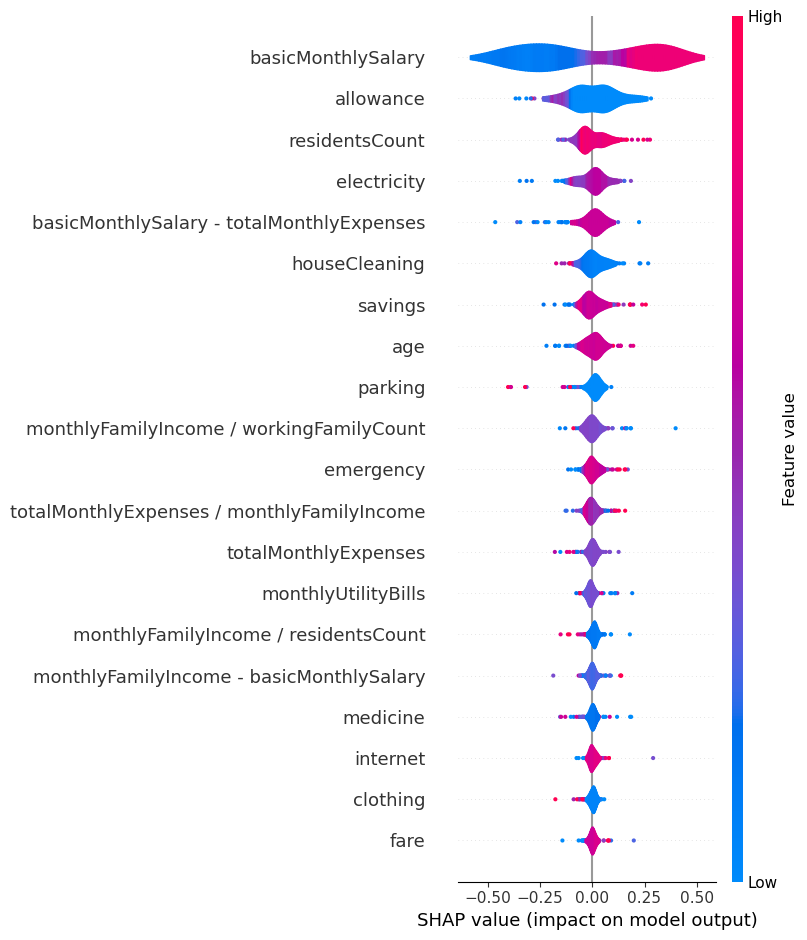

In [294]:
feature_names = X.columns

# shap.summary_plot(shap_values, feature_names=feature_names, plot_type='dot')
shap.summary_plot(shap_values, feature_names=feature_names, plot_type='violin')

In [349]:
def get_float_cols_indices(df):
    float_cols = df.select_dtypes(include=['float64', 'int64']).columns
    return [col for col in float_cols]

get_float_cols_indices(X)

['age',
 'basicMonthlySalary',
 'preferredNetDisposableIncomeId',
 'workingFamilyCount',
 'residentsCount',
 'food',
 'hygiene',
 'houseCleaning',
 'fare',
 'parking',
 'gasoline',
 'tuition',
 'allowance',
 'uniform',
 'otherEducation',
 'emergency',
 'medicine',
 'water',
 'electricity',
 'rent',
 'repair',
 'cinema',
 'dineOut',
 'leisure',
 'personalCare',
 'clothing',
 'mobileLoad',
 'internet',
 'vehicleLoan',
 'informalLenders',
 'companyLoan',
 'privateLoans',
 'governmentLoans',
 'smoking',
 'alcohol',
 'gambling',
 'smallLottery',
 'otherVices',
 'savings',
 'loanSSS',
 'payFamilySupport',
 'loanPagIbig',
 'houseHasPrivateEmployee',
 'houseHasOFW',
 'houseOnlyFamily',
 'houseExtendedFamily',
 'home_ownership_class',
 'monthlyFamilyIncome - basicMonthlySalary',
 'monthlyVices',
 'monthlyUtilityBills',
 'totalMonthlyExpenses',
 'monthlyFamilyIncome - totalMonthlyExpenses',
 'basicMonthlySalary - totalMonthlyExpenses',
 'monthlyFamilyIncome / workingFamilyCount',
 'monthlyFamily

In [330]:
get_float_cols_indices(X)

['monthlyFamilyIncome - basicMonthlySalary',
 'monthlyFamilyIncome - totalMonthlyExpenses',
 'monthlyFamilyIncome / workingFamilyCount',
 'monthlyFamilyIncome / residentsCount',
 'basicMonthlySalary / monthlyFamilyIncome',
 'totalMonthlyExpenses / basicMonthlySalary',
 'totalMonthlyExpenses / monthlyFamilyIncome']

In [318]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 261 to 388
Data columns (total 63 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   age                                         615 non-null    int64  
 1   basicMonthlySalary                          615 non-null    int64  
 2   preferredNetDisposableIncomeId              615 non-null    int64  
 3   workingFamilyCount                          615 non-null    int64  
 4   residentsCount                              615 non-null    int64  
 5   food                                        615 non-null    int64  
 6   hygiene                                     615 non-null    int64  
 7   houseCleaning                               615 non-null    int64  
 8   fare                                        615 non-null    int64  
 9   parking                                     615 non-null    int64  
 10  gasoline    

In [99]:
def adjust_data_types(df):
    for col in df.columns:
        unique_vals = df[col].unique()
        if df[col].dtypes == 'object':
            None
#         elif (set(unique_vals) == {0, 1}) or col == 'userId':
#             df[col] = df[col].astype('int64')
#         else:
#             df[col] = df[col].astype('float64')
        elif (set(unique_vals) != {0, 1}):
            df[col] = df[col].astype('float64')
        else:
            df[col] = df[col].astype('int64')
    return df

In [348]:
ho_t03_dice

userId          lastFirstName   age  basicMonthlySalary  \
0       370.0          IBALI, HOWARD  24.0             19000.0   
1      1025.0  PATALINGHOG, KIMBERLY  26.0             15000.0   
2      1105.0      TEMILLOSO, DENNIS  40.0             20000.0   
3      1719.0         OSCARES, ELMER  32.0             21200.0   
4      2081.0         LEGASPI, MANNY  39.0             19800.0   
...       ...                    ...   ...                 ...   
1062  12847.0          DIOSO, DANISA  25.0             16800.0   
1063  12848.0       BUGARIN, JUN JUN  31.0             46000.0   
1064  12849.0      FERERR, JHENNYLYN  29.0             25000.0   
1065  12850.0         LIPANGO, ARVIN  34.0             19000.0   
1066  12852.0          TEJADA, JERIC  27.0             20000.0   

      preferredNetDisposableIncomeId  workingFamilyCount  residentsCount  \
0                                2.0                 3.0             3.0   
1                                3.0                 2.0             4.0   
2                                2.0                 0.0             3.0   
3                                2.0                 0.0             5.0   
4                                2.0                 0.0             0.0   
...                              ...                 ...             ...   
1062                             2.0                 4.0             5.0   
1063                             1.0                 0.0             0.0   
1064                             3.0                 2.0             4.0   
1065                             2.0                 2.0             4.0   
1066                             2.0                 1.0             1.0   

        food  hygiene  houseCleaning    fare  parking  gasoline  tuition  \
0     1000.0    500.0          200.0   200.0      0.0       0.0      0.0   
1     5000.0   3000.0         2000.0  2000.0      0.0       0.0      0.0   
2     3000.0    500.0          300.0   200.0     50.0      50.0    500.0   
3     2000.0    500.0          200.0   392.0      0.0       0.0      0.0   
4     5000.0   2000.0         1000.0  1500.0      0.0       0.0   1000.0   
...      ...      ...            ...     ...      ...       ...      ...   
1062     0.0      0.0            0.0  1500.0      0.0       0.0      0.0   
1063  1500.0   1000.0         1000.0   500.0      0.0    1000.0   1500.0   
1064  4000.0   1500.0         1000.0     0.0    100.0     600.0      0.0   
1065  5000.0   1000.0         1000.0     1.0      1.0       1.0   1000.0   
1066  5000.0    500.0          400.0   280.0      0.0       0.0      0.0   

      allowance  uniform  otherEducation  emergency  medicine  water  \
0          50.0      0.0             0.0      500.0     450.0    0.0   
1           0.0      0.0             0.0     2000.0       0.0  200.0   
2         100.0    100.0            50.0      500.0     100.0  200.0   
3           0.0      0.0             0.0      100.0       0.0  200.0   
4         500.0   1500.0             0.0        0.0    1000.0  300.0   
...         ...      ...             ...        ...       ...    ...   
1062        0.0      0.0             0.0        0.0       0.0  600.0   
1063     1000.0    450.0           500.0      500.0     500.0  300.0   
1064        0.0    200.0           300.0     1500.0       0.0  500.0   
1065      500.0      1.0          1000.0     1000.0     500.0  200.0   
1066        0.0      0.0             0.0        0.0       0.0    0.0   

      electricity    rent  repair  cinema  dineOut  leisure  personalCare  \
0             0.0     0.0     0.0     0.0      0.0      0.0           0.0   
1           200.0  1000.0   500.0     0.0      0.0      0.0           0.0   
2           500.0     0.0   200.0     0.0    100.0    100.0         100.0   
3           200.0  3000.0     0.0     0.0      0.0      0.0         100.0   
4          1900.0     0.0  1000.0     0.0   1000.0   1000.0        1500.0   
...           ...     ...     ...     ...      ...      ...  

In [342]:
ho_t03_dice = ho_t03.copy()
ho_t03_dice = adjust_data_types(ho_t03_dice)
ho_t03_dice['userId'] = ho_t03_dice['userId'].astype('str')
# ho_t03_dice['gender_MALE'] = ho_t03_dice['userId'].astype('str')
# ho_t03_dice['province_CAVITE'] = ho_t03_dice['userId'].astype('str')
# ho_t03_dice['province_METRO MANILA'] = ho_t03_dice['userId'].astype('str')
# ho_t03_dice['job_ASSOCIATE PROFESSIONAL'] = ho_t03_dice['userId'].astype('str')
# ho_t03_dice['job_SERVICE AND SALES'] = ho_t03_dice['userId'].astype('str')
ho_t03_dice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 820 entries, 0 to 1066
Data columns (total 65 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   userId                                      820 non-null    object 
 1   lastFirstName                               820 non-null    object 
 2   age                                         820 non-null    float64
 3   basicMonthlySalary                          820 non-null    float64
 4   preferredNetDisposableIncomeId              820 non-null    float64
 5   workingFamilyCount                          820 non-null    float64
 6   residentsCount                              820 non-null    float64
 7   food                                        820 non-null    float64
 8   hygiene                                     820 non-null    float64
 9   houseCleaning                               820 non-null    float64
 10  fare         

In [355]:
# len(X_train.columns), len(get_float_cols_indices(X_train))
X_train

age  basicMonthlySalary  preferredNetDisposableIncomeId  \
261   24.0             24600.0                             2.0   
610   40.0             29000.0                             3.0   
11    36.0             30500.0                             3.0   
1060  36.0             15000.0                             1.0   
755   51.0             30000.0                             2.0   
...    ...                 ...                             ...   
655   37.0             14820.0                             3.0   
627   24.0             11000.0                             2.0   
735   51.0             20000.0                             3.0   
856   36.0             20000.0                             2.0   
388   26.0             20000.0                             2.0   

      workingFamilyCount  residentsCount     food  hygiene  houseCleaning  \
261                  3.0             5.0   4800.0    300.0          400.0   
610                  2.0             2.0   3000.0   1000.0         1000.0   
11                   1.0             6.0  12000.0    500.0          200.0   
1060                 0.0             0.0   3000.0   1000.0          500.0   
755                  1.0             4.0   2000.0   1000.0         1000.0   
...                  ...             ...      ...      ...            ...   
655                  2.0             5.0   3000.0   1000.0          200.0   
627                  2.0             7.0   1000.0    500.0         1000.0   
735                  2.0             4.0   1000.0    500.0          500.0   
856                  2.0             5.0  13000.0   4000.0         2000.0   
388                  2.0             5.0   3000.0   1000.0         1000.0   

        fare  parking  gasoline  tuition  allowance  uniform  otherEducation  \
261   3000.0      0.0       0.0      0.0        0.0      0.0             0.0   
610    200.0      0.0     200.0      0.0        0.0      0.0             0.0   
11       0.0      0.0    2000.0      0.0        0.0      0.0             0.0   
1060   100.0     50.0     100.0      0.0        0.0      0.0             0.0   
755      0.0      0.0    2000.0    500.0      500.0      0.0           500.0   
...      ...      ...       ...      ...        ...      ...             ...   
655      0.0      0.0     450.0      0.0      500.0    500.0             0.0   
627      0.0      0.0     800.0      0.0     1000.0      0.0             0.0   
735      0.0      0.0     300.0      0.0        0.0      0.0             0.0   
856   1500.0    200.0    3000.0   1000.0     1000.0    500.0          2000.0   
388      0.0      0.0    1000.0      0.0      600.0    200.0             0.0   

      emergency  medicine  water  electricity     rent  repair  cinema  \
261         0.0     150.0  600.0       1000.0   5000.0     0.0     0.0   
610      2000.0       0.0  200.0        500.0      0.0     0.0     0.0   
11          0.0       0.0  600.0       2000.0      0.0     0.0     0.0   
1060     1000.0     500.0  250.0        200.0   3500.0     0.0     0.0   
755       500.0       0.0  200.0       1000.0      0.0     0.0     0.0   
...         ...       ...    ...          ...      ...     ...     ...   
655         0.0       0.0  300.0        500.0   2500.0     0.0     0.0   
627       500.0     500.0  500.0       1100.0      0.0     0.0     0.0   
735      1500.0     500.0  200.0       3000.0   2500.0     0.0     0.0   
856      5000.0    2000.0  300.0       3500.0  11000.0   500.0     0.0   
388         0.0    1000.0  400.0        900.0   1500.0     0.0     0.0   

      dineOut  leisure  personalCare  clothing  mobileLoad  internet  \
261       0.0      0.0           0.0       0.0       300.0       0.0   
610     500.0    500.0         200.0     200.0       200.0       0.0   
11      500.0    500.0         100.0       0.0         0.0    1625.0   
1060      0.0      0.0         100.0       0.0         0.0       0.0   
755       0.0      0.0         200.0     200.0         0.0       0.0   
...    

In [346]:
# df.info()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 261 to 388
Data columns (total 63 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   age                                         615 non-null    float64
 1   basicMonthlySalary                          615 non-null    float64
 2   preferredNetDisposableIncomeId              615 non-null    float64
 3   workingFamilyCount                          615 non-null    float64
 4   residentsCount                              615 non-null    float64
 5   food                                        615 non-null    float64
 6   hygiene                                     615 non-null    float64
 7   houseCleaning                               615 non-null    float64
 8   fare                                        615 non-null    float64
 9   parking                                     615 non-null    float64
 10  gasoline    

In [457]:
df = ho_t03_dice
model = ho_t06_xgb_be


X = df.drop(['userId', 'lastFirstName'], axis=1)
y = df.loc[:, label_col]
X_train, X_test, _, _ = train_test_split(X, y,
                                         test_size=0.25,
                                         stratify=y,
                                         random_state=0)

X_train
# Dataset for training an ML model
d = dice_ml.Data(dataframe=X_train,
                 continuous_features=X_train.drop(columns='home_ownership_class').columns.to_list(),
                 outcome_name='home_ownership_class')

# Pre-trained ML model
m = dice_ml.Model(model=model, backend='sklearn')
#                   backend='TF2', func="ohe-min-max")
# DiCE explanation instance
exp = dice_ml.Dice(d, m, method='genetic')

In [459]:
# Generate counterfactual examples
query_instance = X_test[X_test['home_ownership_class'] == 0].drop(columns="home_ownership_class")[3:4]
dice_exp = exp.generate_counterfactuals(
    query_instance, total_CFs=10,
    desired_class="opposite", verbose=True,
#     features_to_vary=[
#         'food', 'hygiene', 'houseCleaning',
#         'fare', 'parking', 'gasoline', 'tuition', 'allowance',
#         'uniform', 'otherEducation', 'emergency', 'medicine',
#         'water', 'electricity', 'rent', 'repair', 'cinema',
#         'dineOut', 'leisure', 'personalCare', 'clothing',
#         'mobileLoad', 'internet', 'vehicleLoan', 'informalLenders',
#         'companyLoan', 'privateLoans', 'governmentLoans',
#         'smoking', 'alcohol', 'gambling', 'smallLottery',
#         'otherVices', 'savings', 'loanSSS', 'payFamilySupport',
#         'houseHasPrivateEmployee', 'houseHasOFW',
#         'houseOnlyFamily', 'houseExtendedFamily'
#     ]
    features_to_vary=[
        'water', 'electricity', 'rent',
        'preferredNetDisposableIncomeId',
        'mobileLoad', 'internet',
        'monthlyUtilityBills',
        'totalMonthlyExpenses',
        'basicMonthlySalary - totalMonthlyExpenses',
        'totalMonthlyExpenses / basicMonthlySalary',
    ]
#     features_to_vary = [
#         'monthlyVices',
#         'monthlyUtilityBills',
#         'totalMonthlyExpenses',
# #         'monthlyFamilyIncome - totalMonthlyExpenses',
# #         'basicMonthlySalary - totalMonthlyExpenses',
#         'monthlyFamilyIncome / workingFamilyCount',
# #         'monthlyFamilyIncome / residentsCount',
#         'basicMonthlySalary / monthlyFamilyIncome',
#         'totalMonthlyExpenses / basicMonthlySalary',
#         'totalMonthlyExpenses / monthlyFamilyIncome'
#     ]
)
# Visualize counterfactual explanation
dice_exp.visualize_as_dataframe(display_sparse_df=False,
                                show_only_changes=True)

  0%|          | 0/1 [00:00<?, ?it/s]

Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Query instance (original outcome : 0)


age  basicMonthlySalary  preferredNetDisposableIncomeId  \
0  36.0             20000.0                             2.0   

   workingFamilyCount  residentsCount    food  hygiene  houseCleaning   fare  \
0                 2.0             6.0  4500.0    500.0          800.0  180.0   

   parking  gasoline  tuition  allowance  uniform  otherEducation  emergency  \
0      0.0       0.0      0.0     1200.0      0.0             0.0        1.0   

   medicine  water  electricity    rent  repair  cinema  dineOut  leisure  \
0     180.0  500.0       2000.0  3000.0     0.0     0.0      0.0      0.0   

   personalCare  clothing  mobileLoad  internet  vehicleLoan  informalLenders  \
0           0.0       0.0       200.0       0.0          0.0              0.0   

   companyLoan  privateLoans  governmentLoans  smoking  alcohol  gambling  \
0          0.0           0.0              0.0    400.0    500.0       0.0   

   smallLottery  otherVices  savings  loanSSS  payFamilySupport  loanPagIbig  \
0           0.0         0.0      0.0      0.0               0.0          0.0   

   houseHasPrivateEmployee  houseHasOFW  houseOnlyFamily  houseExtendedFamily  \
0                      1.0          0.0              0.0                  1.0   

   monthlyFamilyIncome - basicMonthlySalary  monthlyVices  \
0                                   22000.0         900.0   

   monthlyUtilityBills  totalMonthlyExpenses  \
0               5700.0               19661.0   

   monthlyFamilyIncome - totalMonthlyExpenses  \
0                                     22339.0   

   basicMonthlySalary - totalMonthlyExpenses  \
0                                      339.0   

   monthlyFamilyIncome / workingFamilyCount  \
0                                   21000.0   

   monthlyFamilyIncome / residentsCount  \
0                                7000.0   

   basicMonthlySalary / monthlyFamilyIncome  \
0                                   0.47619   

   totalMonthlyExpenses / basicMonthlySalary  \
0                                    0.98305   

   totalMonthlyExpenses / monthlyFamilyIncome  gender_MALE  province_CAVITE  \
0                                    0.468119          1.0              0.0   

   province_METRO MANILA  job_ASSOCIATE PROFESSIONAL  job_SERVICE AND SALES  \
0                    1.0                         0.0                    1.0   

   home_ownership_class  
0                     0


Diverse Counterfactual set without sparsity correction (new outcome:  1


age basicMonthlySalary preferredNetDisposableIncomeId workingFamilyCount  \
0   -                  -                              -                  -   
0   -                  -                              -                  -   
0   -                  -                              -                  -   
0   -                  -                              -                  -   
0   -                  -                            1.0                  -   
0   -                  -                            1.0                  -   
0   -                  -                            1.0                  -   
0   -                  -                            1.0                  -   
0   -                  -                            1.0                  -   
0   -                  -                            1.0                  -   

  residentsCount food hygiene houseCleaning fare parking gasoline tuition  \
0              -    -       -             -    -       -        -       -   
0              -    -       -             -    -       -        -       -   
0              -    -       -             -    -       -        -       -   
0              -    -       -             -    -       -        -       -   
0              -    -       -             -    -       -        -       -   
0              -    -       -             -    -       -        -       -   
0              -    -       -             -    -       -        -       -   
0              -    -       -             -    -       -        -       -   
0              -    -       -             -    -       -        -       -   
0              -    -       -             -    -       -        -       -   

  allowance uniform otherEducation emergency medicine  water electricity  \
0         -       -              -         -        -  250.0      1000.0   
0         -       -              -         -        -  300.0      1200.0   
0         -       -              -         -        -  300.0       700.0   
0         -       -              -         -        -  300.0       700.0   
0         -       -              -         -        -  100.0       700.0   
0         -       -              -         -        -  200.0      1200.0   
0         -       -              -         -        -    0.0       700.0   
0         -       -              -         -        -    0.0       700.0   
0         -       -              -         -        -    0.0      1000.0   
0         -       -              -         -        -  200.0      1500.0   

     rent repair cinema dineOut leisure personalCare clothing mobileLoad  \
0       -      -      -       -       -            -        -          -   
0     0.0      -      -       -       -            -        -      100.0   
0     0.0      -      -       -       -            -        -        0.0   
0     0.0      -      -       -       -            -        -      100.0   
0  3500.0      -      -       -       -            -        -          -   
0     0.0      -      -       -       -            -        -      100.0   
0     0.0      -      -       -       -            -        -      500.0   
0     0.0      -      -       -       -            -        -      500.0   
0     0.0      -      -       -       -            -        -      500.0   
0  6500.0      -      -       -       -            -        -      100.0   

  internet vehicleLoan informalLenders companyLoan privateLoans  \
0    999.0           -               -           -            -   
0    600.0           -               -           -            -   
0    800.0           -               -           -            -   
0    999.0           -               -           -            -   
0    999.0           -               -           -            -   
0    600.0           -               -           -            -   
0    600.0           -               -           -            -   
0    600.0           -               -           -            -   
0    600.0        

In [397]:
ho_t03[(ho_t03['age'] == 36) & (ho_t03['basicMonthlySalary'] == 20000)
       & (ho_t03['workingFamilyCount'] == 2) ]

userId                  lastFirstName  age  basicMonthlySalary  \
856   12272  PASCO, MARIA ALBERTA ANGELINA   36               20000   
882   12428                TAHIL, DIONESIO   36               20000   

     preferredNetDisposableIncomeId  workingFamilyCount  residentsCount  \
856                               2                   2               5   
882                               2                   2               6   

      food  hygiene  houseCleaning  fare  parking  gasoline  tuition  \
856  13000     4000           2000  1500      200      3000     1000   
882   4500      500            800   180        0         0        0   

     allowance  uniform  otherEducation  emergency  medicine  water  \
856       1000      500            2000       5000      2000    300   
882       1200        0               0          1       180    500   

     electricity   rent  repair  cinema  dineOut  leisure  personalCare  \
856         3500  11000     500       0     3000     1000           500   
882         2000   3000       0       0        0        0             0   

     clothing  mobileLoad  internet  vehicleLoan  informalLenders  \
856       500        1000      1800            0                0   
882         0         200         0            0                0   

     companyLoan  privateLoans  governmentLoans  smoking  alcohol  gambling  \
856            0             0              750        0        0         0   
882            0             0                0      400      500         0   

     smallLottery  otherVices  savings  loanSSS  payFamilySupport  \
856             0           0    10000        0                 0   
882             0           0        0        0                 0   

     loanPagIbig  houseHasPrivateEmployee  houseHasOFW  houseOnlyFamily  \
856            1                        1            0                0   
882            0                        1            0                0   

     houseExtendedFamily  home_ownership_class  \
856                    1                     0   
882                    1                     0   

     monthlyFamilyIncome - basicMonthlySalary  monthlyVices  \
856                                   12000.0             0   
882                                   22000.0           900   

     monthlyUtilityBills  totalMonthlyExpenses  \
856                17600                 76650   
882                 5700                 19661   

     monthlyFamilyIncome - totalMonthlyExpenses  \
856                                    -44650.0   
882                                     22339.0   

     basicMonthlySalary - totalMonthlyExpenses  \
856                                     -56650   
882                                        339   

     monthlyFamilyIncome / workingFamilyCount  \
856                                   16000.0   
882                                   21000.0   

     monthlyFamilyIncome / residentsCount  \
856                                6400.0   
882                                7000.0   

     basicMonthlySalary / monthlyFamilyIncome  \
856                                   0.62500   
882                                   0.47619   

     totalMonthlyExpenses / basicMonthlySalary  \
856                                    3.83250   
882                                    0.98305   

     totalMonthlyExpenses / monthlyFamilyIncome  gender_MALE  province_CAVITE  \
856                                    2.395313            0                0   
882                                    0.468119            1                0   

     province_METRO MANILA  job_ASSOCIATE PROFESSIONAL  job_SERVICE AND SALES  
856                      0                           1                      0  
882                      1                           0                      1

In [398]:
dice_exp.cf_examples_list[0].final_cfs_df.to_csv('cf_02_01.csv')

In [366]:
# query_instance
# X_test[X_test['home_ownership_class'] == 0]

In [289]:
ho_t06_rf_gs, ho_t06_rf_be, ho_t06_rf_model_info, ho_t06_rf_metrics_df = rf_class2(ho_t03, g_mean_scorer,
                                                            'home_ownership_class', random_state=0)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits
Best Hyperparameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__n_estimators': 50, 'resampling': RandomUnderSampler(random_state=0)}
Best Validation Score: 0.535363242441955
Best Estimator: Pipeline(steps=[('resampling', RandomUnderSampler(random_state=0)),
                ('classifier',
                 RandomForestClassifier(max_depth=10, n_estimators=50,
                                        random_state=0))])
GridSearchCV Runtime: 1.5701003392537436
Run 1 - Random State: 0
Test G-mean: 0.5641752239747911
Run 2 - Random State: 1
Test G-mean: 0.5902312964589906
Run 3 - Random State: 2
Test G-mean: 0.5641752239747911
Run 4 - Random State: 3
Test G-mean: 0.5780602718385359
Run 5 - Random State: 4
Test G-mean: 0.5108877462889241
Ave Test G-mean: 0.5615059525072066
Stdev Test G-mean: 0.030313543568691436
Ave Test Specificity: 0.5811320754716981
Ave Test Recall: 0.5434782608695652
Ave Test

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
Best Hyperparameters: {'classifier__grow_policy': 'depthwise', 'classifier__learning_rate': 0.2, 'classifier__n_estimators': 50, 'resampling': RandomUnderSampler(random_state=0), 'scaler': RobustScaler()}
Best Validation Score (G-mean): 0.5910828886363687
Best Estimator: Pipeline(steps=[('scaler', RobustScaler()),
                ('resampling', RandomUnderSampler(random_state=0)),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy='depthwise', importance_type=None,
                      

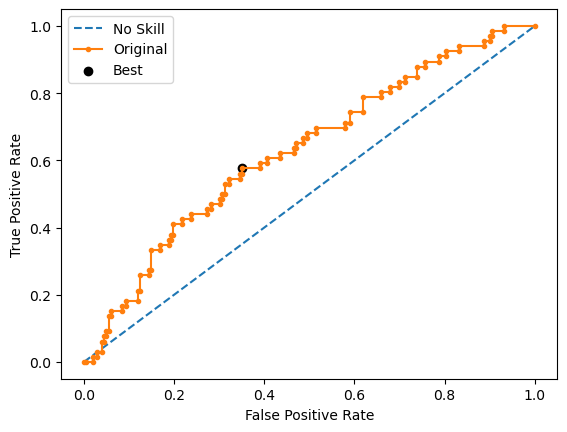

Run 2 - Random State: 1
Test G-mean: 0.749136917133351
Best Threshold=0.854023, G-Mean=0.849


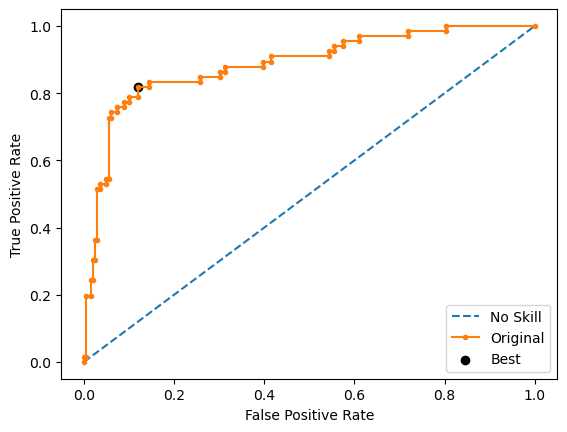

Run 3 - Random State: 2
Test G-mean: 0.7864552442352448
Best Threshold=0.848531, G-Mean=0.877


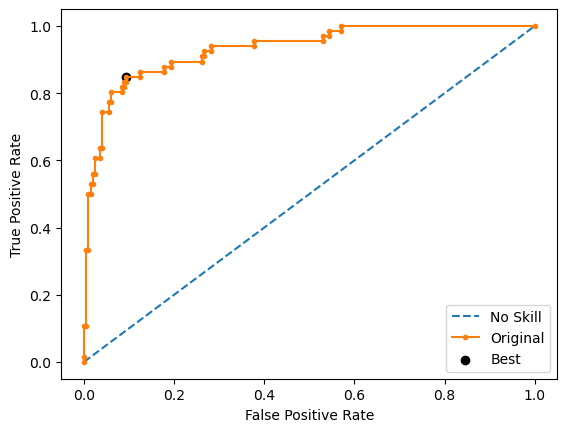

Run 4 - Random State: 3
Test G-mean: 0.7823434067726347
Best Threshold=0.777317, G-Mean=0.842


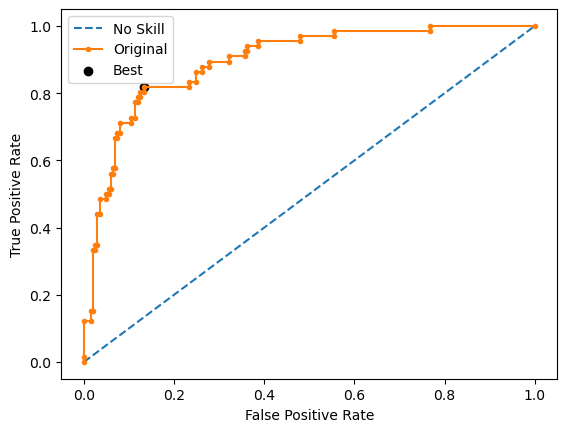

Run 5 - Random State: 4
Test G-mean: 0.7765695757822367
Best Threshold=0.849347, G-Mean=0.897


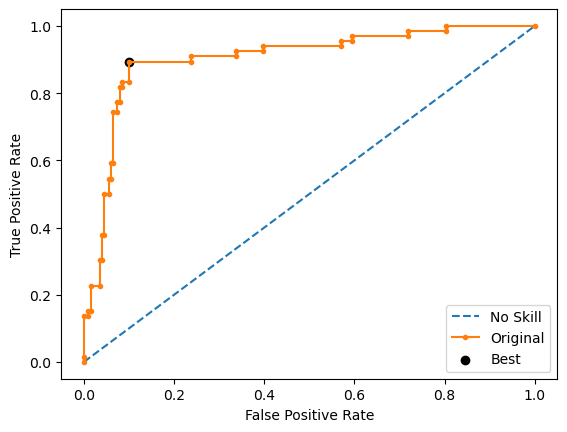

Ave Test G-mean: 0.7388695214980905
Stdev Test G-mean: 0.0790721443563077
Ave Test Specificity: 0.6485148514851485
Ave Test Recall: 0.8454545454545455
Ave Test NPV: 0.9294596190280368
Ave Test Accuracy: 0.6970149253731344
Ave Test Precision: 0.4382958970235785
Ave Test F1-Score: 0.5771487712368631
Ave Runtime: 0.00015462795893351236


In [556]:
ho_t07_xgb_gs, ho_t07_xgb_be, ho_t07_xgb_model_info, ho_t07_xgb_metrics_df = xgb_class2(ho_t07, g_mean_scorer,
                                                            'home_ownership_class', random_state=0)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits
Best Hyperparameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__n_estimators': 100, 'resampling': RandomUnderSampler(random_state=0)}
Best Validation Score (G-mean): 0.5985999413481148
Best Estimator: Pipeline(steps=[('scaler', RobustScaler()),
                ('resampling', RandomUnderSampler(random_state=0)),
                ('classifier',
                 RandomForestClassifier(max_depth=5, random_state=0))])
Mean Train Score (G-mean) 0.842330905934164
Std Train Score (G-mean) 0.01207759861445918
GridSearchCV Runtime: 107.23253893852234 secs
Run 1 - Random State: 0
Test G-mean: 0.6419433067809899
Best Threshold=0.488040, G-Mean=0.643


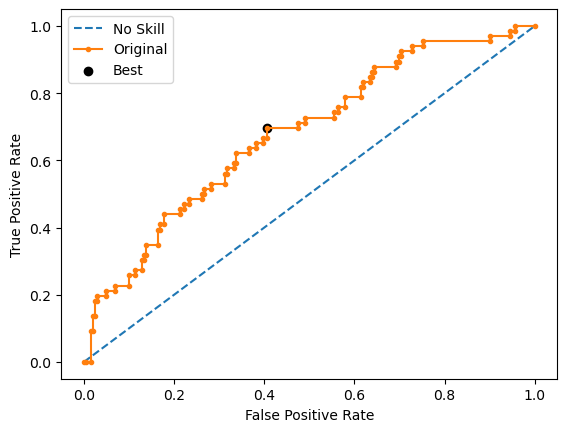

Run 2 - Random State: 1
Test G-mean: 0.7476335302737291
Best Threshold=0.531590, G-Mean=0.779


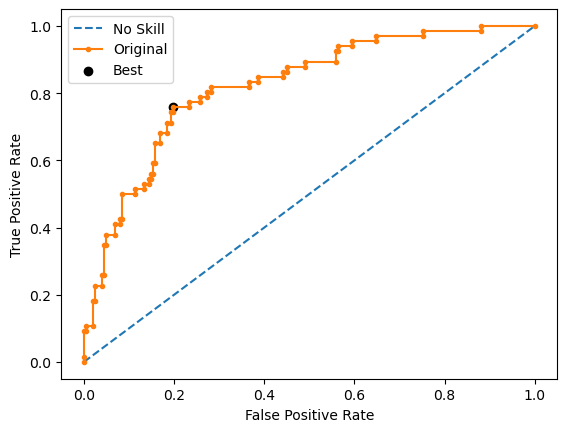

Run 3 - Random State: 2
Test G-mean: 0.7637135103116766
Best Threshold=0.494648, G-Mean=0.786


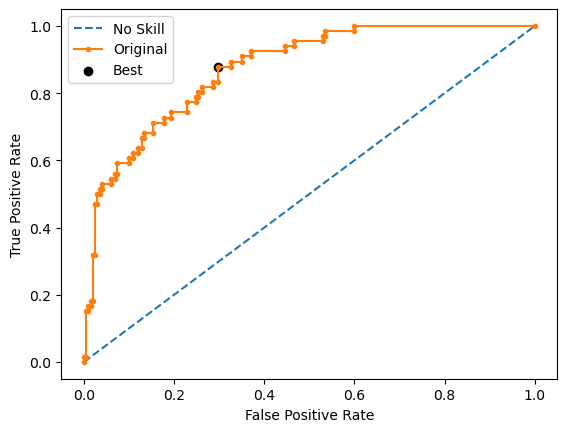

Run 4 - Random State: 3
Test G-mean: 0.7653323287025943
Best Threshold=0.528022, G-Mean=0.788


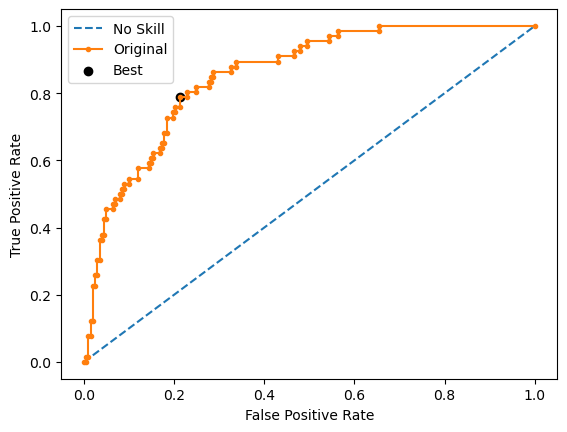

Run 5 - Random State: 4
Test G-mean: 0.7370239619117164
Best Threshold=0.534397, G-Mean=0.770


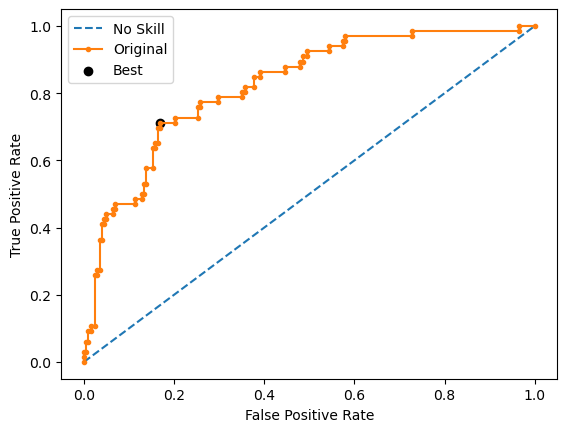

Ave Test G-mean: 0.7311293275961412
Stdev Test G-mean: 0.05121732123145764
Ave Test Specificity: 0.6881188118811881
Ave Test Recall: 0.7787878787878789
Ave Test NPV: 0.9057317963568169
Ave Test Accuracy: 0.7104477611940299
Ave Test Precision: 0.4485178677982617
Ave Test F1-Score: 0.5689847377016697
Ave Runtime: 0.017433881759643555


In [557]:
ho_t07_rf_gs, ho_t07_rf_be, ho_t07_rf_model_info, ho_t07_rf_metrics_df = rf_class2(ho_t07, g_mean_scorer,
                                                            'home_ownership_class', random_state=0)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits
Best Hyperparameters: {'classifier__boosting_type': 'goss', 'classifier__learning_rate': 0.1, 'classifier__n_estimators': 100, 'resampling': EditedNearestNeighbours()}
Best Validation Score (G-mean): 0.580890719609551
Best Estimator: Pipeline(steps=[('scaler', RobustScaler()),
                ('resampling', EditedNearestNeighbours()),
                ('classifier',
                 LGBMClassifier(boosting_type='goss', random_state=0))])
Mean Train Score (G-mean) 0.8378591593488299
Std Train Score (G-mean) 0.012703565806742378
GridSearchCV Runtime: 45.65218496322632 secs
Run 1 - Random State: 0
Test G-mean: 0.5776100443520124
Best Threshold=0.389745, G-Mean=0.597


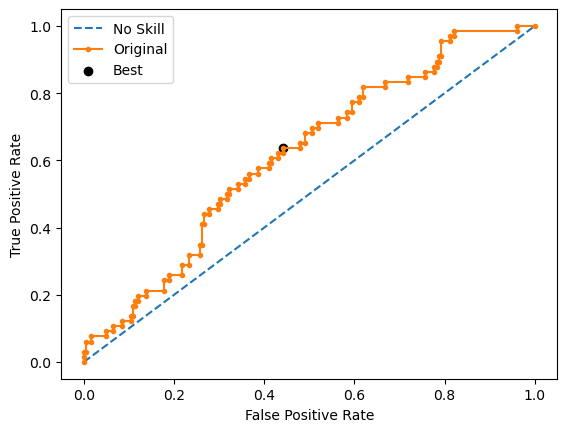

Run 2 - Random State: 1
Test G-mean: 0.7618451553984447
Best Threshold=0.546812, G-Mean=0.765


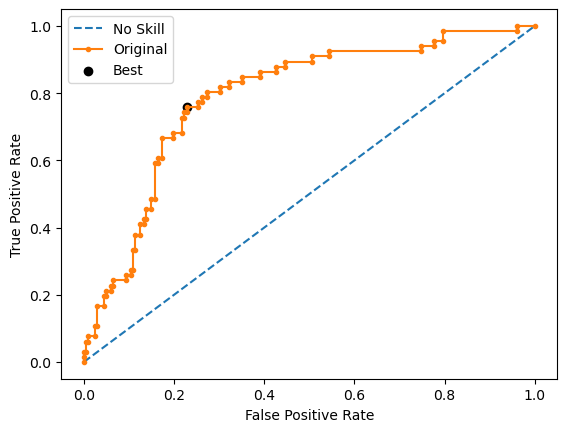

Run 3 - Random State: 2
Test G-mean: 0.7857873415718896
Best Threshold=0.505370, G-Mean=0.788


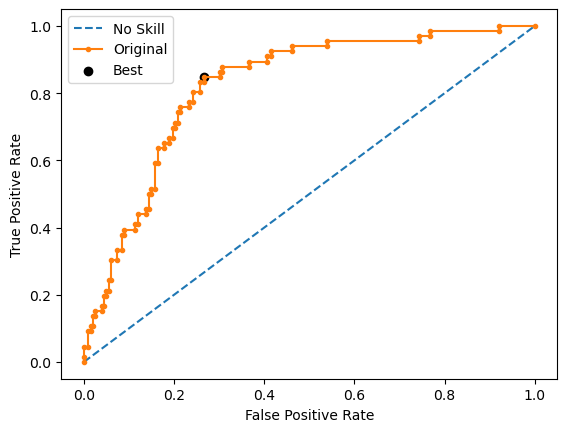

Run 4 - Random State: 3
Test G-mean: 0.7623372716925109
Best Threshold=0.509782, G-Mean=0.773


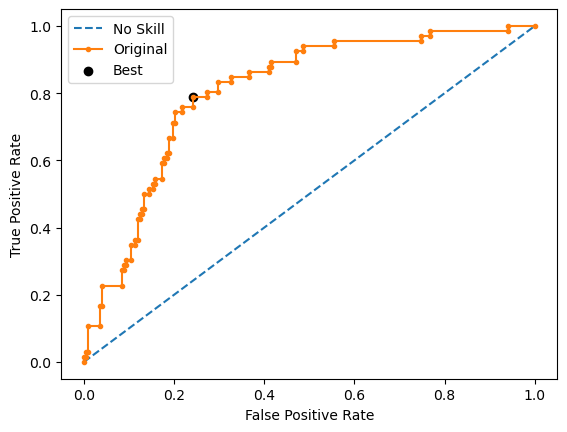

Run 5 - Random State: 4
Test G-mean: 0.7498874803084209
Best Threshold=0.553256, G-Mean=0.774


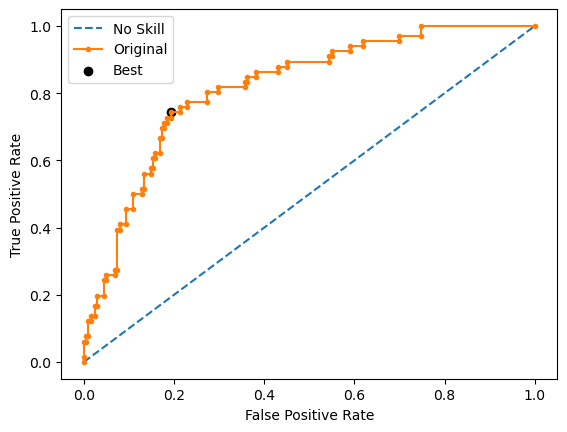

Ave Test G-mean: 0.7274934586646556
Stdev Test G-mean: 0.08479215360310403
Ave Test Specificity: 0.7207920792079209
Ave Test Recall: 0.7393939393939393
Ave Test NPV: 0.8959061542285027
Ave Test Accuracy: 0.7253731343283583
Ave Test Precision: 0.46079106251750945
Ave Test F1-Score: 0.567441713112679
Ave Runtime: 0.00013261000315348308


In [551]:
ho_t07_lgbm_gs, ho_t07_lgbm_be, ho_t07_lgbm_model_info, ho_t07_lgbm_metrics_df = lgbm_class2(ho_t07, g_mean_scorer,
                                                            'home_ownership_class', random_state=0)

Fitting 10 folds for each of 360 candidates, totalling 3600 fits
Best Hyperparameters: {'classifier__algorithm': 'SAMME', 'classifier__estimator': RandomForestClassifier(random_state=0), 'classifier__learning_rate': 0.01, 'classifier__n_estimators': 50, 'resampling': SMOTEENN(random_state=0)}
Best Validation Score (G-mean): 0.5474421093487749
Best Estimator: Pipeline(steps=[('scaler', RobustScaler()),
                ('resampling', SMOTEENN(random_state=0)),
                ('var_threshold', VarianceThreshold(threshold=0.15)),
                ('classifier',
                 AdaBoostClassifier(algorithm='SAMME',
                                    estimator=RandomForestClassifier(random_state=0),
                                    learning_rate=0.01, random_state=0))])
Mean Train Score (G-mean) 0.8984178225690627
Std Train Score (G-mean) 0.008165167385689407
GridSearchCV Runtime: 90.2110960483551 secs
Run 1 - Random State: 0
Test G-mean: 0.5508905045785446
Best Threshold=0.731059, G-Me

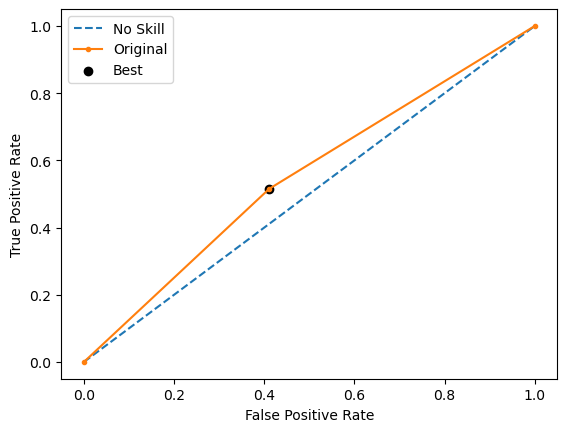

Run 2 - Random State: 1
Test G-mean: 0.6681651326314824
Best Threshold=0.731059, G-Mean=0.668


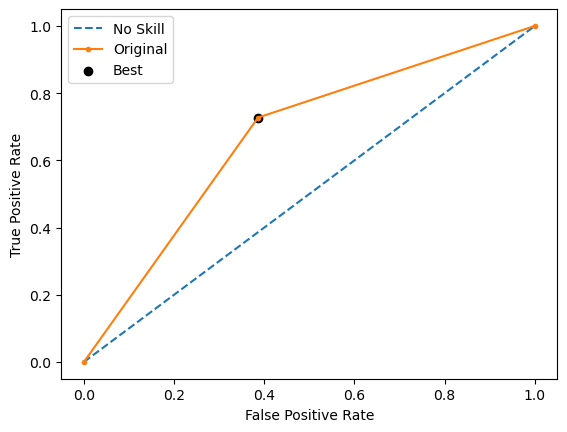

Run 3 - Random State: 2
Test G-mean: 0.7147559636748482
Best Threshold=0.731059, G-Mean=0.715


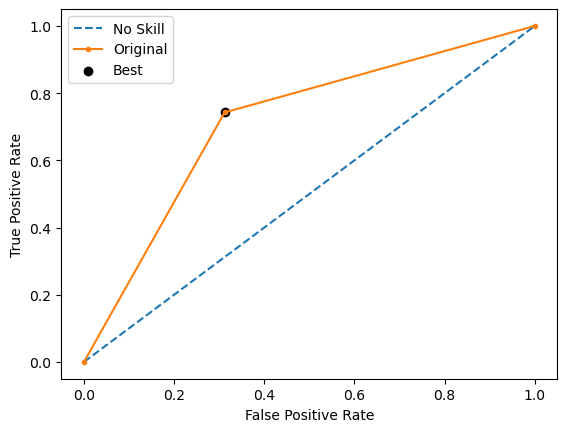

Run 4 - Random State: 3
Test G-mean: 0.6885654741861692
Best Threshold=0.731059, G-Mean=0.689


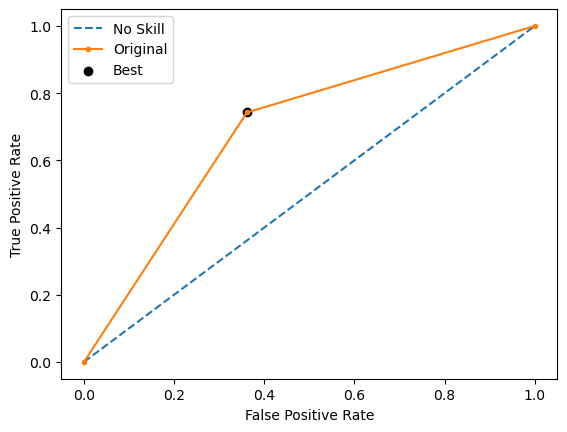

Run 5 - Random State: 4
Test G-mean: 0.66911865313799
Best Threshold=0.731059, G-Mean=0.669


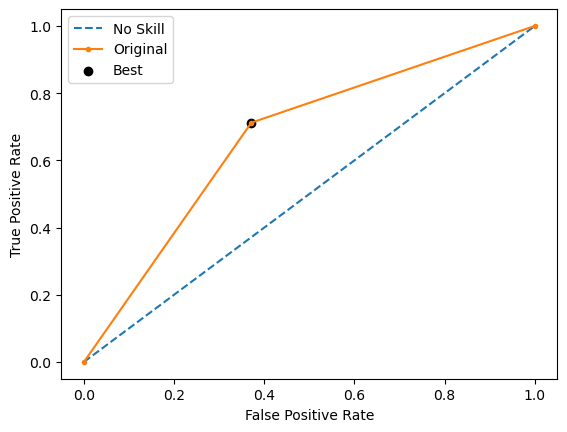

Ave Test G-mean: 0.6582991456418068
Stdev Test G-mean: 0.06295720483544424
Ave Test Specificity: 0.6316831683168317
Ave Test Recall: 0.6878787878787879
Ave Test NPV: 0.8611538410756563
Ave Test Accuracy: 0.6455223880597015
Ave Test Precision: 0.3791871834904622
Ave Test F1-Score: 0.48868461859020834
Ave Runtime: 0.00033618927001953123


In [552]:
ho_t07_adaboost_gs, ho_t07_adaboost_be, ho_t07_adaboost_model_info, ho_t07_adaboost_metrics_df = adaboost_class2(ho_t07, g_mean_scorer,
                                                            'home_ownership_class', random_state=0)

Fitting 10 folds for each of 864 candidates, totalling 8640 fits
Best Hyperparameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 3, 'classifier__min_samples_split': 2, 'resampling': RandomUnderSampler(random_state=0)}
Best Validation Score (G-mean): 0.5718311732422163
Best Estimator: Pipeline(steps=[('scaler', RobustScaler()),
                ('resampling', RandomUnderSampler(random_state=0)),
                ('classifier',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=3,
                                        random_state=0))])
Mean Train Score (G-mean) 0.8048708242792513
Std Train Score (G-mean) 0.022069009569922533
GridSearchCV Runtime: 43.25144600868225 secs
Run 1 - Random State: 0
Test G-mean: 0.548912680226146
Best Threshold=0.541667, G-Mean=0.549


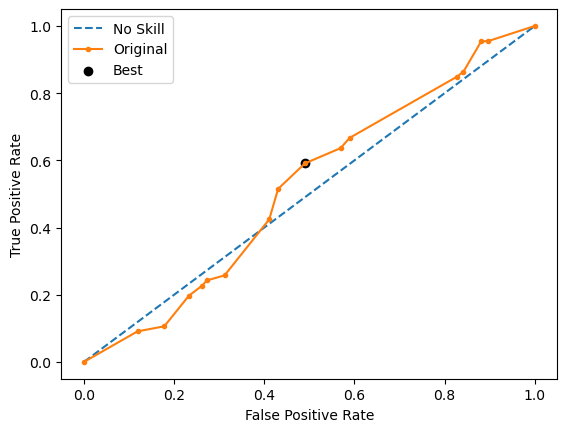

Run 2 - Random State: 1
Test G-mean: 0.6055052961505512
Best Threshold=0.575000, G-Mean=0.628


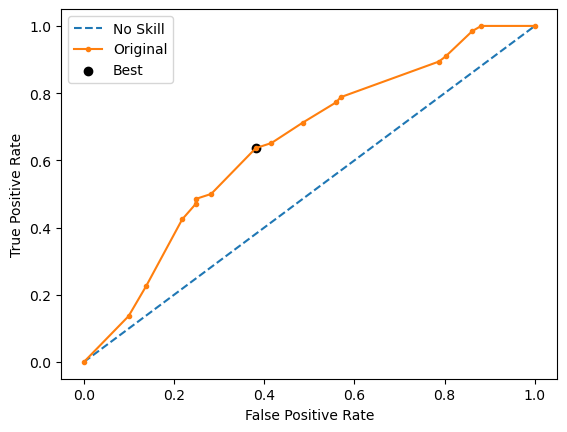

Run 3 - Random State: 2
Test G-mean: 0.6517994202578158
Best Threshold=0.541667, G-Mean=0.652


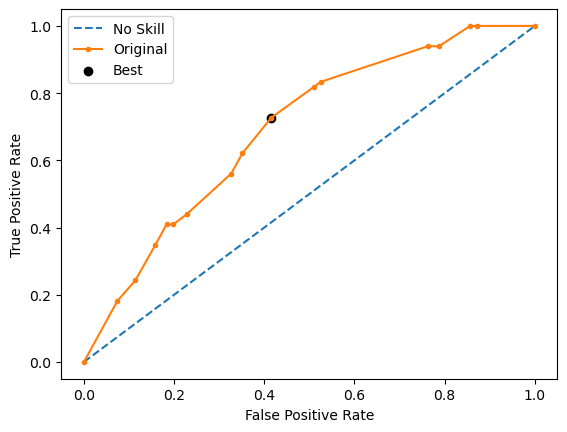

Run 4 - Random State: 3
Test G-mean: 0.6680528642726908
Best Threshold=0.541667, G-Mean=0.668


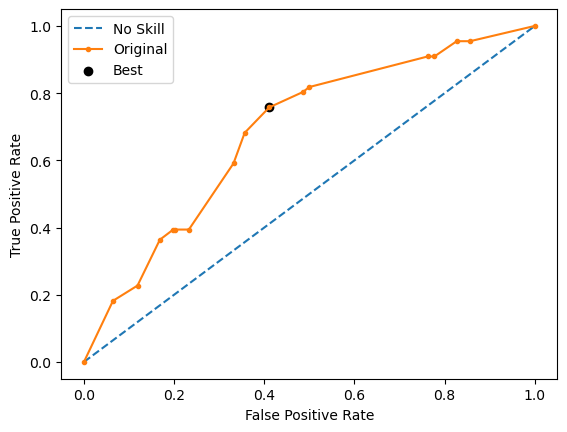

Run 5 - Random State: 4
Test G-mean: 0.6750893085788396
Best Threshold=0.571429, G-Mean=0.685


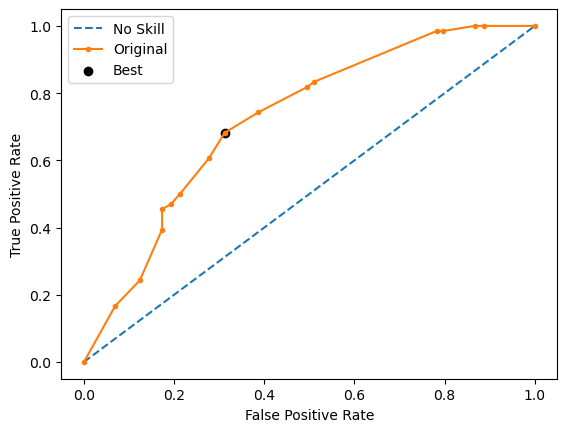

Ave Test G-mean: 0.6298719138972088
Stdev Test G-mean: 0.05275258966529826
Ave Test Specificity: 0.5623762376237624
Ave Test Recall: 0.706060606060606
Ave Test NPV: 0.8532794624021462
Ave Test Accuracy: 0.5977611940298507
Ave Test Precision: 0.3464299223201247
Ave Test F1-Score: 0.46459672797923357
Ave Runtime: 8.249918619791667e-05


In [553]:
ho_t07_dt_gs, ho_t07_dt_be, ho_t07_dt_model_info, ho_t07_dt_metrics_df = dt_class2(ho_t07, g_mean_scorer,
                                                            'home_ownership_class', random_state=0)

In [452]:
ho_t07_gbm_gs, ho_t07_gbm_be, ho_t07_gbm_model_info, ho_t07_gbm_metrics_df = gbm_class2(ho_t07, g_mean_scorer,
                                                            'home_ownership_class', random_state=0)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits
Best Hyperparameters: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 10, 'classifier__n_estimators': 50, 'resampling': SMOTEENN(random_state=0)}
Best Validation Score: 0.5872498406347785
Best Estimator: Pipeline(steps=[('scaler', RobustScaler()),
                ('resampling', SMOTEENN(random_state=0)),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.2, max_depth=10,
                                            n_estimators=50, random_state=0))])
GridSearchCV Runtime: 30.08976186911265
Run 1 - Random State: 0
Test G-mean: 0.5400270020251687
Run 2 - Random State: 1
Test G-mean: 0.5646741411544971
Run 3 - Random State: 2
Test G-mean: 0.5368228924717986
Run 4 - Random State: 3
Test G-mean: 0.5600056791105458
Run 5 - Random State: 4
Test G-mean: 0.577090377090394
Ave Test G-mean: 0.5557240183704809
Stdev Test G-mean: 0.017019161876197238
Ave Test Specificity: 0.5485148514

Fitting 10 folds for each of 936 candidates, totalling 9360 fits



3120 fits failed out of a total of 9360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1040 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Carlo\anaconda3\envs\ds_cuda\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Carlo\anaconda3\envs\ds_cuda\lib\site-packages\imblearn\pipeline.py", line 297, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "C:\Users\Carlo\anaconda3\envs\ds_cuda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Carlo\anaconda3\envs\ds_cuda\l

Best Hyperparameters: {'classifier__C': 10.0, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear', 'resampling': SMOTE(random_state=0)}
Best Validation Score (G-mean): 0.576593849917064
Best Estimator: Pipeline(steps=[('scaler', RobustScaler()),
                ('resampling', SMOTE(random_state=0)),
                ('classifier',
                 LogisticRegression(C=10.0, max_iter=1000, penalty='l1',
                                    random_state=0, solver='liblinear'))])
Mean Train Score (G-mean) nan
Std Train Score (G-mean) nan
GridSearchCV Runtime: 92.22610855102539 secs
Run 1 - Random State: 0
Test G-mean: 0.5508905045785446
Best Threshold=0.489087, G-Mean=0.562


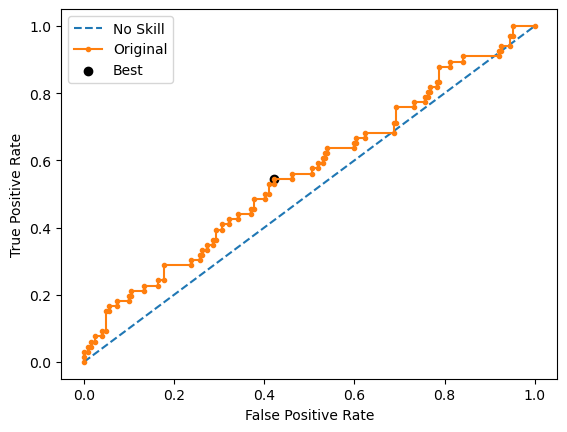

Run 2 - Random State: 1
Test G-mean: 0.5983400380052366
Best Threshold=0.412480, G-Mean=0.606


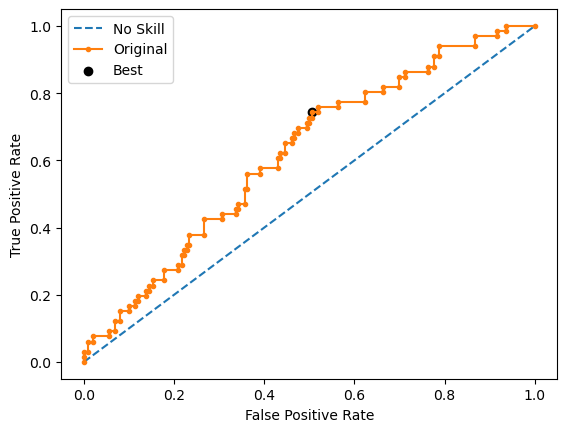

Run 3 - Random State: 2
Test G-mean: 0.6941528540735692
Best Threshold=0.501364, G-Mean=0.694


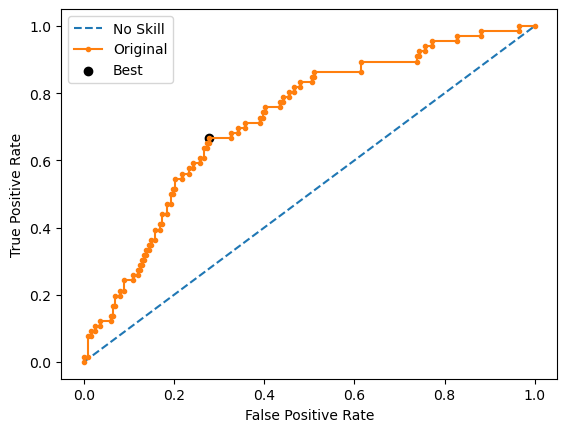

Run 4 - Random State: 3
Test G-mean: 0.6221243475949058
Best Threshold=0.501364, G-Mean=0.622


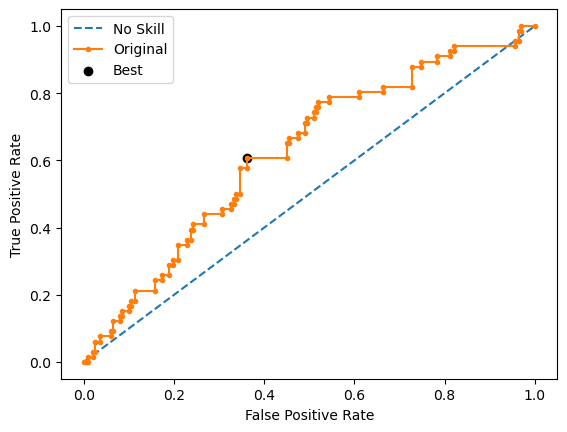

Run 5 - Random State: 4
Test G-mean: 0.596896664895069
Best Threshold=0.559390, G-Mean=0.643


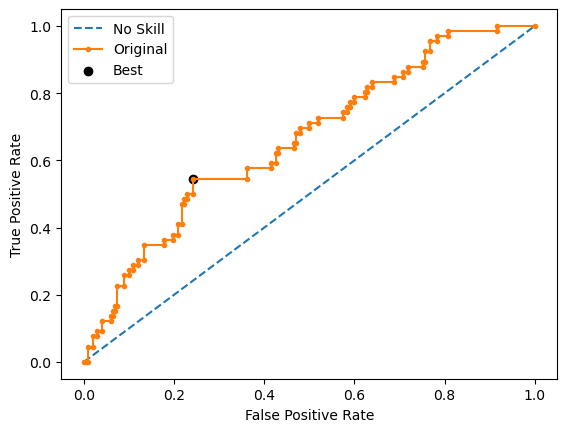

Ave Test G-mean: 0.6124808818294649
Stdev Test G-mean: 0.05243928235026005
Ave Test Specificity: 0.6415841584158416
Ave Test Recall: 0.5848484848484847
Ave Test NPV: 0.8245668628034485
Ave Test Accuracy: 0.6276119402985075
Ave Test Precision: 0.35027580209111564
Ave Test F1-Score: 0.43779532077998295
Ave Runtime: 9.58085060119629e-05


In [554]:
ho_t07_logreg_gs, ho_t07_logreg_be, ho_t07_logreg_model_info, ho_t07_logreg_metrics_df = logreg_class2(ho_t07, g_mean_scorer,
                                                            'home_ownership_class', random_state=0)

In [555]:
ho_t07_knn_gs, ho_t07_knn_be, ho_t07_knn_model_info, ho_t07_knn_metrics_df = knn_class2(ho_t07, g_mean_scorer,
                                                            'home_ownership_class', random_state=0)

Fitting 10 folds for each of 960 candidates, totalling 9600 fits
Best Hyperparameters: {'classifier__metric': 'cosine', 'classifier__n_neighbors': 11, 'resampling': RandomOverSampler(random_state=0)}
Best Validation Score (G-mean): 0.5580724908293797
Best Estimator: Pipeline(steps=[('scaler', RobustScaler()),
                ('resampling', RandomOverSampler(random_state=0)),
                ('classifier',
                 KNeighborsClassifier(metric='cosine', n_neighbors=11))])
Mean Train Score (G-mean) 0.6439483881039633
Std Train Score (G-mean) 0.016243533034076836
GridSearchCV Runtime: 124.13236165046692 secs
Run 1 - Random State: 0
Test G-mean: 0.5375210627401394
Run 2 - Random State: 1
Test G-mean: 0.6819431828609074
Run 3 - Random State: 2
Test G-mean: 0.7148084324555153
Run 4 - Random State: 3
Test G-mean: 0.644857801502328
Run 5 - Random State: 4
Test G-mean: 0.7476335302737291
Ave Test G-mean: 0.6653528019665238
Stdev Test G-mean: 0.08101267952258809
Ave Test Specificity: 0.62

In [462]:
model_vars = ['knn', 'logreg', 'dt', 'rf', 'gbm', 'lgbm', 'xgb', 'adaboost']
# model_vars = ['dt', 'rf', 'lgbm', 'xgb', 'adaboost']

var_df = {
    'Classifier model': [
        'k-Nearest Neighbors',
        'Logistic Regression', 'Decision Tree', 'Random Forest',
        'Gradient Boosting Machine (GBM)',
        'LightGBM', 'Extreme Gradient Boosting (XGBoost)',
        'AdaBoost'
    ],
#     'Classifier model': [
#         'Decision Tree', 'Random Forest',
#         'LightGBM', 'Extreme Gradient Boosting (XGBoost)',
#         'AdaBoost'
#     ],
    'Best Hyperparameters': [],
    'Best CV Score (G-mean)': [],
    'Average Runtime': [],
    'Average Test G-mean': [],
    'Stdev Test G-mean': [],
    'Average Test Specificity': [],
    'Average Test Recall': [],
    'Average Test NPV': [],
    'Average Test Accuracy': [],
    'Average Test Precision': [],
    'Average Test F1-score': [],
}

prefix = 'ho_t07_'
for name in model_vars:
    var_df['Best Hyperparameters'].append(globals()[prefix+name+'_model_info']['best_params'])
    var_df['Best CV Score (G-mean)'].append(globals()[prefix+name+'_model_info']['best_cv_score'])
    var_df['Average Runtime'].append(globals()[prefix+name+'_model_info']['average_runtime'])
    var_df['Average Test G-mean'].append(globals()[prefix+name+'_model_info']['average_test_g_mean'])
    var_df['Stdev Test G-mean'].append(globals()[prefix+name+'_model_info']['stdev_test_g_mean'])
    var_df['Average Test Specificity'].append(globals()[prefix+name+'_model_info']['average_test_specificity'])
    var_df['Average Test Recall'].append(globals()[prefix+name+'_model_info']['average_test_recall'])
    var_df['Average Test NPV'].append(globals()[prefix+name+'_model_info']['average_test_npv'])
    var_df['Average Test Accuracy'].append(globals()[prefix+name+'_model_info']['average_test_accuracy'])
    var_df['Average Test Precision'].append(globals()[prefix+name+'_model_info']['average_test_precision'])
    var_df['Average Test F1-score'].append(globals()[prefix+name+'_model_info']['average_test_f1_score'])

# display(ho_t02_model_summ)
ho_t07_summ = pd.DataFrame(var_df)

# columns_to_exclude = ['Best Hyperparameters', 'Average Runtime']


# selected_columns = [col for col in ho_t1__summ.columns if col not in columns_to_exclude]
# ho_t1__summ[selected_columns]

ho_t07_summ[['Classifier model', 'Average Test G-mean', 'Stdev Test G-mean',
             'Average Test Specificity', 'Average Test Recall', 'Best CV Score (G-mean)']].sort_values(by='Average Test G-mean', ascending=False)

Classifier model  Average Test G-mean  \
3                        Random Forest             0.610776   
6  Extreme Gradient Boosting (XGBoost)             0.594771   
5                             LightGBM             0.562665   
2                        Decision Tree             0.561887   
4      Gradient Boosting Machine (GBM)             0.555724   
1                  Logistic Regression             0.553786   
7                             AdaBoost             0.537194   
0                  k-Nearest Neighbors             0.534891   

   Stdev Test G-mean  Average Test Specificity  Average Test Recall  \
3           0.024758                  0.615842             0.606061   
6           0.028360                  0.587129             0.603030   
5           0.033532                  0.694059             0.457576   
2           0.033915                  0.662376             0.487879   
4           0.017019                  0.548515             0.563636   
1           0.032634                  0.617822             0.496970   
7           0.038600                  0.546535             0.530303   
0           0.029685                  0.543564             0.527273   

   Best CV Score (G-mean)  
3                0.598600  
6                0.591083  
5                0.580891  
2                0.571831  
4                0.587250  
1                0.576594  
7                0.547442  
0                0.558072

Number of features: 1
Test G-mean: 0.5867575550794759
Test Recall: 0.6818181818181818
Test Specificity: 0.504950495049505
Runtime: 11.451783180236816 secs

Number of features: 2
Test G-mean: 0.5525219706516703
Test Recall: 0.5606060606060606
Test Specificity: 0.5445544554455446
Runtime: 12.283032655715942 secs

Number of features: 3
Test G-mean: 0.5335292544430292
Test Recall: 0.5
Test Specificity: 0.5693069306930693
Runtime: 10.360759258270264 secs

Number of features: 4
Test G-mean: 0.5848369032647838
Test Recall: 0.5757575757575758
Test Specificity: 0.594059405940594
Runtime: 10.461236715316772 secs

Number of features: 5
Test G-mean: 0.5673906883438623
Test Recall: 0.5606060606060606
Test Specificity: 0.5742574257425742
Runtime: 10.408977746963501 secs

Number of features: 6
Test G-mean: 0.589944746124879
Test Recall: 0.6060606060606061
Test Specificity: 0.5742574257425742
Runtime: 9.685707330703735 secs

Number of features: 7
Test G-mean: 0.5872686680292462
Test Recall: 0.57575757

Number of features: 54
Test G-mean: 0.6419433067809899
Test Recall: 0.6212121212121212
Test Specificity: 0.6633663366336634
Runtime: 0.40312862396240234 secs

Number of features: 55
Test G-mean: 0.6419433067809899
Test Recall: 0.6212121212121212
Test Specificity: 0.6633663366336634
Runtime: 0.3793673515319824 secs

Number of features: 56
Test G-mean: 0.6419433067809899
Test Recall: 0.6212121212121212
Test Specificity: 0.6633663366336634
Runtime: 0.47619175910949707 secs

Number of features: 57
Test G-mean: 0.6419433067809899
Test Recall: 0.6212121212121212
Test Specificity: 0.6633663366336634
Runtime: 0.5002224445343018 secs

Number of features: 58
Test G-mean: 0.6419433067809899
Test Recall: 0.6212121212121212
Test Specificity: 0.6633663366336634
Runtime: 0.4981236457824707 secs



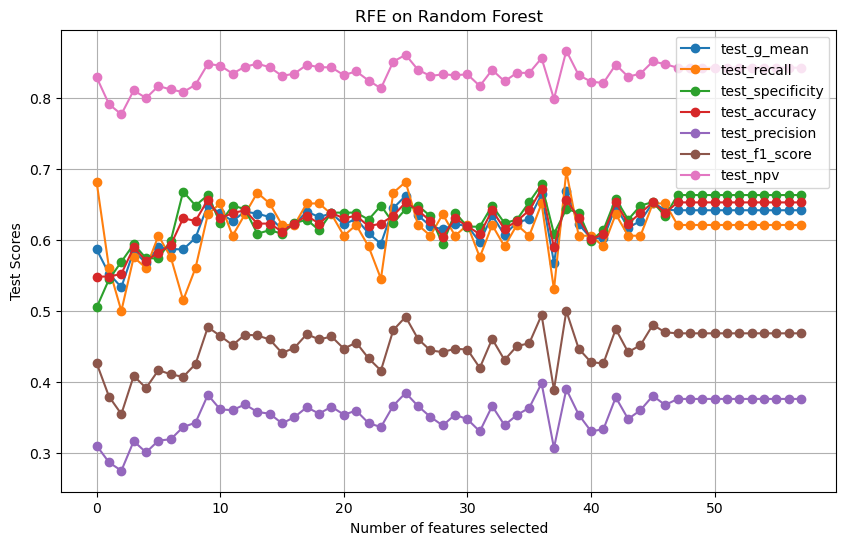

In [463]:
df = ho_t07
estimator = ho_t07_rf_be
label_col = 'home_ownership_class'
random_state = 0
importance_getter = 'named_steps.classifier.feature_importances_'

ho_t07_rf_rfe = []
for n_features in range(1, 59):
    res = rfe_fitter(df, estimator, n_features, label_col,
                     importance_getter, random_state)
    ho_t07_rf_rfe.append(res)
    
plt.figure(figsize=(10, 6))

ho_t07_rf_rfe = pd.DataFrame(ho_t07_rf_rfe)

cols = ho_t07_rf_rfe.columns.tolist()
cols.remove('selected_features')
cols.remove('runtime')

for column in cols:
    plt.plot(ho_t07_rf_rfe.index, ho_t07_rf_rfe[column],
             marker='o', linestyle='-', label=column)

plt.title('RFE on Random Forest')
plt.xlabel('Number of features selected')
plt.ylabel('Test Scores')
plt.legend()
plt.grid(True)
plt.show()

In [349]:
def get_float_cols_indices(df):
    float_cols = df.select_dtypes(include=['float64', 'int64']).columns
    return [col for col in float_cols]

get_float_cols_indices(X)

['age',
 'basicMonthlySalary',
 'preferredNetDisposableIncomeId',
 'workingFamilyCount',
 'residentsCount',
 'food',
 'hygiene',
 'houseCleaning',
 'fare',
 'parking',
 'gasoline',
 'tuition',
 'allowance',
 'uniform',
 'otherEducation',
 'emergency',
 'medicine',
 'water',
 'electricity',
 'rent',
 'repair',
 'cinema',
 'dineOut',
 'leisure',
 'personalCare',
 'clothing',
 'mobileLoad',
 'internet',
 'vehicleLoan',
 'informalLenders',
 'companyLoan',
 'privateLoans',
 'governmentLoans',
 'smoking',
 'alcohol',
 'gambling',
 'smallLottery',
 'otherVices',
 'savings',
 'loanSSS',
 'payFamilySupport',
 'loanPagIbig',
 'houseHasPrivateEmployee',
 'houseHasOFW',
 'houseOnlyFamily',
 'houseExtendedFamily',
 'home_ownership_class',
 'monthlyFamilyIncome - basicMonthlySalary',
 'monthlyVices',
 'monthlyUtilityBills',
 'totalMonthlyExpenses',
 'monthlyFamilyIncome - totalMonthlyExpenses',
 'basicMonthlySalary - totalMonthlyExpenses',
 'monthlyFamilyIncome / workingFamilyCount',
 'monthlyFamily

In [330]:
get_float_cols_indices(X)

['monthlyFamilyIncome - basicMonthlySalary',
 'monthlyFamilyIncome - totalMonthlyExpenses',
 'monthlyFamilyIncome / workingFamilyCount',
 'monthlyFamilyIncome / residentsCount',
 'basicMonthlySalary / monthlyFamilyIncome',
 'totalMonthlyExpenses / basicMonthlySalary',
 'totalMonthlyExpenses / monthlyFamilyIncome']

In [481]:
# X_train.info()

In [471]:
df = ho_t07
estimator = ho_t07_rf_be
label_col = 'home_ownership_class'
random_state = 0
importance_getter = 'named_steps.classifier.feature_importances_'

ho_t07_rf_rfe = []
for n_features in range(1, 59):
    res = rfe_fitter2(df, estimator, n_features, label_col,
                     importance_getter, random_state)
    ho_t07_rf_rfe.append(res)
    
plt.figure(figsize=(10, 6))

ho_t07_rf_rfe = pd.DataFrame(ho_t07_rf_rfe)



Number of features: 1
Run 1 - Random State: 0
Test G-mean: 0.5867575550794759
Test Recall: 0.6818181818181818
Test Specificity: 0.504950495049505
Runtime: 0.18053150177001953 secs

Run 2 - Random State: 1
Test G-mean: 0.5692384414639651
Test Recall: 0.5454545454545454
Test Specificity: 0.594059405940594
Runtime: 0.2446446418762207 secs

Run 3 - Random State: 2
Test G-mean: 0.5650725003865161
Test Recall: 0.6515151515151515
Test Specificity: 0.4900990099009901
Runtime: 0.3012981414794922 secs

Run 4 - Random State: 3
Test G-mean: 0.5910879278870863
Test Recall: 0.5151515151515151
Test Specificity: 0.6782178217821783
Runtime: 0.1847841739654541 secs

Run 5 - Random State: 4
Test G-mean: 0.5671262321708648
Test Recall: 0.48484848484848486
Test Specificity: 0.6633663366336634
Runtime: 0.15967822074890137 secs

Ave Test G-mean: 0.5758565313975816
Stdev Test G-mean: 0.012115489261053259
Ave Test Specificity: 0.5861386138613862
Ave Test Recall: 0.5757575757575757
Ave Test NPV: 0.8098027275424

Run 3 - Random State: 2
Test G-mean: 0.5555005473316913
Test Recall: 0.5151515151515151
Test Specificity: 0.599009900990099
Runtime: 0.1808488368988037 secs

Run 4 - Random State: 3
Test G-mean: 0.5947565666197842
Test Recall: 0.5454545454545454
Test Specificity: 0.6485148514851485
Runtime: 0.17676019668579102 secs

Run 5 - Random State: 4
Test G-mean: 0.558463237929599
Test Recall: 0.5
Test Specificity: 0.6237623762376238
Runtime: 0.25006890296936035 secs

Ave Test G-mean: 0.587086355137003
Stdev Test G-mean: 0.03417184637962864
Ave Test Specificity: 0.6366336633663366
Ave Test Recall: 0.5424242424242424
Ave Test NPV: 0.8099012354706728
Ave Test Accuracy: 0.6134328358208955
Ave Test Precision: 0.32798155632395637
Ave Test F1-Score: 0.40857414627702227
Ave Runtime: 0.19234042167663573
Number of features: 9
Run 1 - Random State: 0
Test G-mean: 0.60296049301394
Test Recall: 0.5606060606060606
Test Specificity: 0.6485148514851485
Runtime: 0.26778745651245117 secs

Run 2 - Random State: 1


Run 5 - Random State: 4
Test G-mean: 0.5751374429715307
Test Recall: 0.5303030303030303
Test Specificity: 0.6237623762376238
Runtime: 0.17186355590820312 secs

Ave Test G-mean: 0.5999071486786403
Stdev Test G-mean: 0.03820207086705109
Ave Test Specificity: 0.603960396039604
Ave Test Recall: 0.5969696969696969
Ave Test NPV: 0.8205323430148322
Ave Test Accuracy: 0.6022388059701493
Ave Test Precision: 0.3313333869054583
Ave Test F1-Score: 0.42571701753683727
Ave Runtime: 0.20071144104003907
Number of features: 16
Run 1 - Random State: 0
Test G-mean: 0.6150307523064422
Test Recall: 0.6212121212121212
Test Specificity: 0.6089108910891089
Runtime: 0.1944892406463623 secs

Run 2 - Random State: 1
Test G-mean: 0.5668616526219791
Test Recall: 0.5454545454545454
Test Specificity: 0.5891089108910891
Runtime: 0.1988389492034912 secs

Run 3 - Random State: 2
Test G-mean: 0.5889903997257484
Test Recall: 0.5606060606060606
Test Specificity: 0.6188118811881188
Runtime: 0.1996927261352539 secs

Run 4 -

Number of features: 23
Run 1 - Random State: 0
Test G-mean: 0.6095179662775508
Test Recall: 0.5909090909090909
Test Specificity: 0.6287128712871287
Runtime: 0.21251726150512695 secs

Run 2 - Random State: 1
Test G-mean: 0.5763099975892594
Test Recall: 0.5454545454545454
Test Specificity: 0.6089108910891089
Runtime: 0.22755742073059082 secs

Run 3 - Random State: 2
Test G-mean: 0.5872686680292462
Test Recall: 0.5757575757575758
Test Specificity: 0.599009900990099
Runtime: 0.236220121383667 secs

Run 4 - Random State: 3
Test G-mean: 0.6142985725798387
Test Recall: 0.5909090909090909
Test Specificity: 0.6386138613861386
Runtime: 0.1785569190979004 secs

Run 5 - Random State: 4
Test G-mean: 0.5694360593978698
Test Recall: 0.5
Test Specificity: 0.6485148514851485
Runtime: 0.1805744171142578 secs

Ave Test G-mean: 0.5913662527747529
Stdev Test G-mean: 0.019873288588172718
Ave Test Specificity: 0.6247524752475248
Ave Test Recall: 0.5606060606060606
Ave Test NPV: 0.8132761989886964
Ave Test Ac

Run 3 - Random State: 2
Test G-mean: 0.5924821545923143
Test Recall: 0.5909090909090909
Test Specificity: 0.594059405940594
Runtime: 0.26831984519958496 secs

Run 4 - Random State: 3
Test G-mean: 0.6172828393940504
Test Recall: 0.6060606060606061
Test Specificity: 0.6287128712871287
Runtime: 0.24639177322387695 secs

Run 5 - Random State: 4
Test G-mean: 0.5671262321708648
Test Recall: 0.48484848484848486
Test Specificity: 0.6633663366336634
Runtime: 0.19251799583435059 secs

Ave Test G-mean: 0.5982995456688899
Stdev Test G-mean: 0.022177951775307177
Ave Test Specificity: 0.6237623762376238
Ave Test Recall: 0.5757575757575758
Ave Test NPV: 0.8185191065673582
Ave Test Accuracy: 0.6119402985074627
Ave Test Precision: 0.3332872974030062
Ave Test F1-Score: 0.4217366184366199
Ave Runtime: 0.2236795425415039
Number of features: 31
Run 1 - Random State: 0
Test G-mean: 0.6200108396988995
Test Recall: 0.6212121212121212
Test Specificity: 0.6188118811881188
Runtime: 0.24057650566101074 secs

Run 

Run 5 - Random State: 4
Test G-mean: 0.5908975511809126
Test Recall: 0.5303030303030303
Test Specificity: 0.6584158415841584
Runtime: 0.2109529972076416 secs

Ave Test G-mean: 0.6175432481377314
Stdev Test G-mean: 0.03688803166310842
Ave Test Specificity: 0.6366336633663366
Ave Test Recall: 0.6
Ave Test NPV: 0.8293654683124213
Ave Test Accuracy: 0.6276119402985075
Ave Test Precision: 0.35167494204079575
Ave Test F1-Score: 0.44303457610727126
Ave Runtime: 0.24457321166992188
Number of features: 38
Run 1 - Random State: 0
Test G-mean: 0.5682493209226676
Test Recall: 0.5303030303030303
Test Specificity: 0.6089108910891089
Runtime: 0.21218442916870117 secs

Run 2 - Random State: 1
Test G-mean: 0.589944746124879
Test Recall: 0.6060606060606061
Test Specificity: 0.5742574257425742
Runtime: 0.190840482711792 secs

Run 3 - Random State: 2
Test G-mean: 0.5818795909686458
Test Recall: 0.5606060606060606
Test Specificity: 0.6039603960396039
Runtime: 0.30837392807006836 secs

Run 4 - Random State:

Number of features: 45
Run 1 - Random State: 0
Test G-mean: 0.6269284679533966
Test Recall: 0.6060606060606061
Test Specificity: 0.6485148514851485
Runtime: 0.19726014137268066 secs

Run 2 - Random State: 1
Test G-mean: 0.5975246468308709
Test Recall: 0.6060606060606061
Test Specificity: 0.5891089108910891
Runtime: 0.35304737091064453 secs

Run 3 - Random State: 2
Test G-mean: 0.5850292521939329
Test Recall: 0.5909090909090909
Test Specificity: 0.5792079207920792
Runtime: 0.2948915958404541 secs

Run 4 - Random State: 3
Test G-mean: 0.644334165361162
Test Recall: 0.6818181818181818
Test Specificity: 0.6089108910891089
Runtime: 0.3016808032989502 secs

Run 5 - Random State: 4
Test G-mean: 0.6188604841399094
Test Recall: 0.5606060606060606
Test Specificity: 0.6831683168316832
Runtime: 0.255429744720459 secs

Ave Test G-mean: 0.6145354032958543
Stdev Test G-mean: 0.023559708109921737
Ave Test Specificity: 0.6217821782178218
Ave Test Recall: 0.6090909090909091
Ave Test NPV: 0.8296197063373

Run 3 - Random State: 2
Test G-mean: 0.6097025288756572
Test Recall: 0.6363636363636364
Test Specificity: 0.5841584158415841
Runtime: 0.2602818012237549 secs

Run 4 - Random State: 3
Test G-mean: 0.6469481077995503
Test Recall: 0.6818181818181818
Test Specificity: 0.6138613861386139
Runtime: 0.2659919261932373 secs

Run 5 - Random State: 4
Test G-mean: 0.584452015494721
Test Recall: 0.5
Test Specificity: 0.6831683168316832
Runtime: 0.27082300186157227 secs

Ave Test G-mean: 0.6153459166944192
Stdev Test G-mean: 0.028114300194344993
Ave Test Specificity: 0.6346534653465347
Ave Test Recall: 0.5999999999999999
Ave Test NPV: 0.8300091465691517
Ave Test Accuracy: 0.6261194029850745
Ave Test Precision: 0.3491794218569796
Ave Test F1-Score: 0.4405800434601358
Ave Runtime: 0.28550019264221194
Number of features: 53
Run 1 - Random State: 0
Test G-mean: 0.6419433067809899
Test Recall: 0.6212121212121212
Test Specificity: 0.6633663366336634
Runtime: 0.2039504051208496 secs

Run 2 - Random State: 

ValueError: list.remove(x): x not in list

<Figure size 1000x600 with 0 Axes>

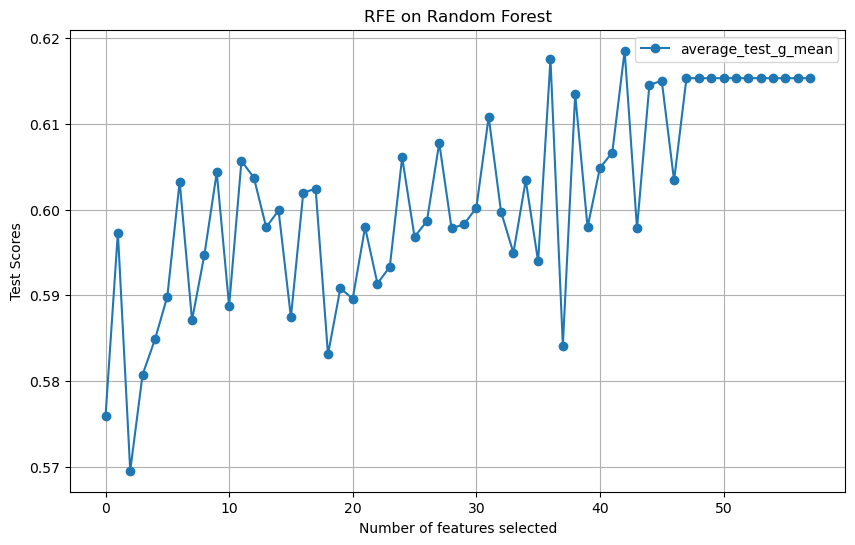

In [480]:
plt.figure(figsize=(10, 6))

cols = ho_t07_rf_rfe.columns.tolist()
# cols.remove('selected_features')
cols.remove('average_runtime')

cols = ['average_test_g_mean']
for column in cols:
    plt.plot(ho_t07_rf_rfe.index, ho_t07_rf_rfe[column],
             marker='o', linestyle='-', label=column)

plt.title('RFE on Random Forest')
plt.xlabel('Number of features selected')
plt.ylabel('Test Scores')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
ho_t04_rf_rfe.sort_values('test_g_mean', ascending=False)

In [ ]:
rfe_indices = [0, 1] + list(np.array([0, 1, 2, 3, 4, 5, 6, 7, 9, 18, 19, 28, 39, 44]) + 2) + [-1]
rfe_indices
ho_t05 = ho_t04.copy().iloc[:, rfe_indices]
ho_t05

# Final Model

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns

pd.set_option('display.max_columns', None)

In [300]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from lightgbm import LGBMClassifier
from xgboost.sklearn import XGBClassifier

from sklearn.feature_selection import RFE, RFECV, VarianceThreshold

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, make_scorer, confusion_matrix, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.base import clone


from imblearn.metrics import geometric_mean_score
import shap

from imblearn.over_sampling import SMOTE, ADASYN, SMOTENC, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from imblearn.pipeline import Pipeline
# from sklearn.pipeline import Pipeline

import dice_ml

In [118]:
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)
    return specificity

specificity_scorer = make_scorer(specificity_score)

def npv_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    npv = tn / (tn + fn)
    return npv

npv_scorer = make_scorer(npv_score)

g_mean_scorer = make_scorer(geometric_mean_score)

# def get_cat_cols(df):
#     one_hot_encoded_columns = []

#     for idx, column in enumerate(df.columns):
#         if df[column].nunique() == 2 and set(df[column].unique()) == {0, 1}:
#             one_hot_encoded_columns.append(idx)

#     return one_hot_encoded_columns

def get_cat_cols(df):
    return df.select_dtypes(include=['object']).columns.tolist()

# get_cat_cols(ho_t02)
# cat_cols = get_cat_cols(ho_t02)
# num_cols = [col for col in ho_t02.columns if col not in cat_cols]
# cat_cols, num_cols

In [635]:
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE, ADASYN, SMOTENC, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, TomekLinks
from imblearn.combine import SMOTEENN, SMOTETomek


from sklearn.base import BaseEstimator, TransformerMixin

class DropCategoricalFeatures(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # Assuming X is a DataFrame
        non_categorical_cols = X.select_dtypes(exclude=['object']).columns.tolist()
        return X[non_categorical_cols]


def knn_class2(df, scorer, label_col, random_state=0):
    X = df.drop(['userId', 'lastFirstName', label_col], axis=1)
    y = df.loc[:, label_col]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.25,
                                                        stratify=y,
                                                        random_state=random_state)

    pipeline = Pipeline([
        ('scaler', RobustScaler()),
        ('resampling', None),
        ('classifier', KNeighborsClassifier())
    ])

    param_grid = {
#         'scaler': [StandardScaler(),
#                    MinMaxScaler(),
#                    RobustScaler()],
#         'resampling': [SMOTE(random_state=random_state),
#                        SMOTENC(categorical_features=get_cat_cols(X),
#                                random_state=random_state),
#                        ADASYN(random_state=random_state),
# #                        RandomOverSampler(random_state=random_state),
#                        RandomUnderSampler(random_state=random_state)],
#         'scaler': [RobustScaler(),
#                    PowerTransformer()],
#         'resampling': [SMOTENC(categorical_features=get_cat_cols(X),
#                                random_state=random_state),
        'resampling': [
            SMOTE(random_state=random_state),
            ADASYN(random_state=random_state),
            SMOTEENN(random_state=random_state),
            SMOTETomek(random_state=random_state),
            EditedNearestNeighbours(),
            TomekLinks(),
            RandomOverSampler(random_state=random_state),
            RandomUnderSampler(random_state=random_state)
        ],
        'classifier__n_neighbors': list(range(1, 16)),
        'classifier__metric': ['euclidean', 'cosine', 'hamming', 'braycurtis',
                               'chebyshev', 'canberra', 'cityblock', 'sqeuclidean']
    }

    start_time_cv = time.time()
    grid_search = GridSearchCV(pipeline, param_grid,
                               cv=10, scoring=scorer,
                               n_jobs=-1,
                               verbose=4, return_train_score=True)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_estimator = grid_search.best_estimator_
    cv_results = grid_search.cv_results_
    end_time_cv = time.time()

    print("Best Hyperparameters:", best_params)
    print("Best Validation Score (G-mean):", best_score)
    print('Best Estimator:', best_estimator)
    print('Mean Train Score (G-mean)', np.mean(cv_results['mean_train_score']))
    print('Std Train Score (G-mean)', np.mean(cv_results['std_train_score']))
    elapsed_time_cv = (end_time_cv - start_time_cv)
    print(f'GridSearchCV Runtime: {elapsed_time_cv} secs')

    num_runs = 5
    metrics_per_run = []

    for run in range(num_runs):
        modified_random_state = random_state + run

        start_time = time.time()
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                            test_size=0.25,
                                                            stratify=y,
                                                            random_state=modified_random_state)

        modified_estimator = best_estimator
#         if not (isinstance(best_estimator.named_steps['resampling'], EditedNearestNeighbours) or
#             isinstance(best_estimator.named_steps['resampling'], TomekLinks)):
#             modified_estimator.named_steps['resampling'].set_params(random_state=modified_random_state)
#         modified_estimator.named_steps['classifier'].set_params(random_state=modified_random_state)
#         modified_estimator.fit(X_train, y_train)

        y_pred = modified_estimator.predict(X_test)

        end_time = time.time()
        elapsed_time = (end_time - start_time)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        specificity = specificity_score(y_test, y_pred)
        npv = npv_score(y_test, y_pred)
        g_mean = geometric_mean_score(y_test, y_pred)

        print(f"Run {run + 1} - Random State: {modified_random_state}")
        print(f"Test G-mean: {g_mean}")

#         y_hat = modified_estimator.predict_proba(X_test)[:, 1]

#         fpr, tpr, thresholds = roc_curve(y_test, y_hat)
#         gmeans = np.sqrt(tpr * (1-fpr))
#         ix = np.argmax(gmeans)
#         print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

#         plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
#         plt.plot(fpr, tpr, marker='.', label='Original')
#         plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

#         plt.xlabel('False Positive Rate')
#         plt.ylabel('True Positive Rate')
#         plt.legend()

#         plt.show()

        metrics_per_run.append({
            'Random State': modified_random_state,
            'Test Accuracy': accuracy,
            'Test Precision': precision,
            'Test Recall': recall,
            'Test F1 Score': f1,
            'Test Specificity': specificity,
            'Test G-mean': g_mean,
            'Test NPV': npv,
            'Runtime': elapsed_time
        })

    metrics_df = pd.DataFrame(metrics_per_run)

    avg_metrics = metrics_df.mean()
    std_metrics = metrics_df.std()

    print('Ave Test G-mean:', avg_metrics['Test G-mean'])
    print('Stdev Test G-mean:', std_metrics['Test G-mean'])
    print("Ave Test Specificity:", avg_metrics['Test Specificity'])
    print("Ave Test Recall:", avg_metrics['Test Recall'])
    print('Ave Test NPV:', avg_metrics['Test NPV'])
    print("Ave Test Accuracy:", avg_metrics['Test Accuracy'])
    print("Ave Test Precision:", avg_metrics['Test Precision'])
    print("Ave Test F1-Score:", avg_metrics['Test F1 Score'])
    print("Ave Runtime:", avg_metrics['Runtime'])

    model_info = {
        'best_params': best_params,
        'best_cv_score': best_score,
        'mean_train_score': np.mean(cv_results['mean_train_score']),
        'std_train_score': np.mean(cv_results['std_train_score']),
        'average_runtime': avg_metrics['Runtime'],
        'average_test_g_mean': avg_metrics['Test G-mean'],
        'stdev_test_g_mean': std_metrics['Test G-mean'],
        'average_test_specificity': avg_metrics['Test Specificity'],
        'average_test_recall': avg_metrics['Test Recall'],
        'average_test_npv': avg_metrics['Test NPV'],
        'average_test_accuracy': avg_metrics['Test Accuracy'],
        'average_test_precision': avg_metrics['Test Precision'],
        'average_test_f1_score': avg_metrics['Test F1 Score']
    }

    return grid_search, best_estimator, model_info, metrics_df

def logreg_class2(df, scorer, label_col, random_state=0):
    X = df.drop(['userId', 'lastFirstName', label_col], axis=1)
    y = df.loc[:, label_col]

#     scaler = RobustScaler()
#     X_scaled = scaler.fit_transform(X)
#     pca = PCA().fit(X_scaled)

#     # 2. Plot the cumulative explained variance
#     explained_var_ratio = pca.explained_variance_ratio_
#     cumulative_explained_var = np.cumsum(explained_var_ratio)

#     # 3. Find the number of components that explain up to 90% of the variance
#     num_components = np.argmax(cumulative_explained_var >= 0.90) + 1
#     print(f"Number of components that explain up to 90% of variance: {num_components}")

#     # Refit PCA with the selected number of components
#     pca_90 = PCA(n_components=num_components)
#     X = pca_90.fit_transform(X_scaled)

    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.25,
                                                        stratify=y,
                                                        random_state=random_state)

    pipeline = Pipeline([
#         ('drop_categorical', None),
#         ('encoder', None),
        ('scaler', RobustScaler()),
        ('resampling', None),
        ('classifier', LogisticRegression(random_state=random_state, max_iter=1000))
    ])

    param_grid = {
#         'drop_categorical': [None, DropCategoricalFeatures()]
#         'encoder': [None, OneHotEncoder(sparse_output=False)],
#         'scaler': [RobustScaler(),
#                    PowerTransformer()],
        'resampling': [SMOTE(random_state=random_state),
                       ADASYN(random_state=random_state),
                       SMOTEENN(random_state=random_state),
                       SMOTETomek(random_state=random_state),
                       EditedNearestNeighbours(),
                       TomekLinks(),
                       RandomOverSampler(random_state=random_state),
                       RandomUnderSampler(random_state=random_state)],
        'classifier__C': list(np.logspace(-6, 6, num=13)),
        'classifier__penalty': ['l1', 'l2', None],
        'classifier__solver': ['liblinear', 'lbfgs', 'newton-cholesky']
#         'classifier__penalty': ['l1', l2', 'elasticnet', 'None']
    }

    start_time_cv = time.time()
    grid_search = GridSearchCV(pipeline, param_grid,
                               cv=10, scoring=scorer,
                               n_jobs=-1,
                               verbose=4, return_train_score=True)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_estimator = grid_search.best_estimator_
    cv_results = grid_search.cv_results_
    end_time_cv = time.time()

    print("Best Hyperparameters:", best_params)
    print("Best Validation Score (G-mean):", best_score)
    print('Best Estimator:', best_estimator)
    print('Mean Train Score (G-mean)', np.mean(cv_results['mean_train_score']))
    print('Std Train Score (G-mean)', np.mean(cv_results['std_train_score']))
    elapsed_time_cv = (end_time_cv - start_time_cv)
    print(f'GridSearchCV Runtime: {elapsed_time_cv} secs')

    num_runs = 5
    metrics_per_run = []

    for run in range(num_runs):
        modified_random_state = random_state + run

        start_time = time.time()
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                            test_size=0.25,
                                                            stratify=y,
                                                            random_state=modified_random_state)

        modified_estimator = best_estimator
#         if not (isinstance(best_estimator.named_steps['resampling'], EditedNearestNeighbours) or
#             isinstance(best_estimator.named_steps['resampling'], TomekLinks)):
#             modified_estimator.named_steps['resampling'].set_params(random_state=modified_random_state)
#         modified_estimator.named_steps['classifier'].set_params(random_state=modified_random_state)
#         modified_estimator.fit(X_train, y_train)

        y_pred = modified_estimator.predict(X_test)

        end_time = time.time()
        elapsed_time = (end_time - start_time) / 60

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        specificity = specificity_score(y_test, y_pred)
        npv = npv_score(y_test, y_pred)
        g_mean = geometric_mean_score(y_test, y_pred)

        print(f"Run {run + 1} - Random State: {modified_random_state}")
        print(f"Test G-mean: {g_mean}")

        y_hat = modified_estimator.predict_proba(X_test)[:, 1]

        fpr, tpr, thresholds = roc_curve(y_test, y_hat)
        gmeans = np.sqrt(tpr * (1-fpr))
        ix = np.argmax(gmeans)
        print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

        plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
        plt.plot(fpr, tpr, marker='.', label='Original')
        plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()

        plt.show()

        metrics_per_run.append({
            'Random State': modified_random_state,
            'Test Accuracy': accuracy,
            'Test Precision': precision,
            'Test Recall': recall,
            'Test F1 Score': f1,
            'Test Specificity': specificity,
            'Test G-mean': g_mean,
            'Test NPV': npv,
            'Runtime': elapsed_time
        })

    metrics_df = pd.DataFrame(metrics_per_run)

    avg_metrics = metrics_df.mean()
    std_metrics = metrics_df.std()

    print('Ave Test G-mean:', avg_metrics['Test G-mean'])
    print('Stdev Test G-mean:', std_metrics['Test G-mean'])
    print("Ave Test Specificity:", avg_metrics['Test Specificity'])
    print("Ave Test Recall:", avg_metrics['Test Recall'])
    print('Ave Test NPV:', avg_metrics['Test NPV'])
    print("Ave Test Accuracy:", avg_metrics['Test Accuracy'])
    print("Ave Test Precision:", avg_metrics['Test Precision'])
    print("Ave Test F1-Score:", avg_metrics['Test F1 Score'])
    print("Ave Runtime:", avg_metrics['Runtime'])

    model_info = {
        'best_params': best_params,
        'best_cv_score': best_score,
        'mean_train_score': np.mean(cv_results['mean_train_score']),
        'std_train_score': np.mean(cv_results['std_train_score']),
        'average_runtime': avg_metrics['Runtime'],
        'average_test_g_mean': avg_metrics['Test G-mean'],
        'stdev_test_g_mean': std_metrics['Test G-mean'],
        'average_test_specificity': avg_metrics['Test Specificity'],
        'average_test_recall': avg_metrics['Test Recall'],
        'average_test_npv': avg_metrics['Test NPV'],
        'average_test_accuracy': avg_metrics['Test Accuracy'],
        'average_test_precision': avg_metrics['Test Precision'],
        'average_test_f1_score': avg_metrics['Test F1 Score']
    }

    return grid_search, best_estimator, model_info, metrics_df



def dt_class2(df, scorer, label_col, random_state=0):
    X = df.drop(['userId', 'lastFirstName', label_col], axis=1)
    y = df.loc[:, label_col]

#     scaler = RobustScaler()
#     X_scaled = scaler.fit_transform(X)
#     pca = PCA().fit(X_scaled)

#     # 2. Plot the cumulative explained variance
#     explained_var_ratio = pca.explained_variance_ratio_
#     cumulative_explained_var = np.cumsum(explained_var_ratio)

#     # 3. Find the number of components that explain up to 90% of the variance
#     num_components = np.argmax(cumulative_explained_var >= 0.90) + 1
#     print(f"Number of components that explain up to 90% of variance: {num_components}")

#     # Refit PCA with the selected number of components
#     pca_90 = PCA(n_components=num_components)
#     X = pca_90.fit_transform(X_scaled)

    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.25,
                                                        stratify=y,
                                                        random_state=random_state)

    cat_cols = get_cat_cols(X_train)
    num_cols = [col for col in X_train.columns if col not in cat_cols]
    
    cat_transformer = Pipeline([
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    num_transformer = Pipeline([
        ('variance_threshold', VarianceThreshold(threshold=0.15))
    ])
    
    preprocessor = ColumnTransformer(
        transformers = [
            ('num', num_transformer, num_cols),
            ('cat', cat_transformer, cat_cols)
        ],
        remainder='passthrough'
    )

    preprocessor_num = ColumnTransformer(
        transformers = [
            ('num', num_transformer, num_cols)
        ],
        remainder='drop'
    )

    preprocessor_drop_cat = ColumnTransformer(
        transformers = [
            ('num', 'passthrough', num_cols)
        ],
        remainder='drop'
    )

    pipeline = Pipeline([
#         ('preprocessor', None),
        ('scaler', RobustScaler()),
        ('resampling', None),
#         ('var_threshold', VarianceThreshold(threshold=0.15)),
        ('classifier', DecisionTreeClassifier(random_state=random_state))
    ])

    param_grid = {
#         'preprocessor': [
#             preprocessor_drop_cat,
#             preprocessor,
#             preprocessor_num            
#         ],
#         'scaler': [RobustScaler(),
#                    MinMaxScaler(), PowerTransformer()],
        'resampling': [SMOTE(random_state=random_state),
                       ADASYN(random_state=random_state),
                       SMOTEENN(random_state=random_state),
                       SMOTETomek(random_state=random_state),
                       EditedNearestNeighbours(),
                       TomekLinks(),
                       RandomOverSampler(random_state=random_state),
                       RandomUnderSampler(random_state=random_state)],
        'classifier__max_depth': [None, 5, 10, 15],
        'classifier__min_samples_split': [2, 3, 5],
        'classifier__min_samples_leaf': [1, 2, 3],
#         'classifier__max_features': ['auto', 'sqrt', 'log2', None],
        'classifier__criterion': ["gini", "entropy", "log_loss"]
    }

    start_time_cv = time.time()
    grid_search = GridSearchCV(pipeline, param_grid,
                               cv=10, scoring=scorer,
                               n_jobs=-1,
                               verbose=4, return_train_score=True)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_estimator = grid_search.best_estimator_
    cv_results = grid_search.cv_results_
    end_time_cv = time.time()

    print("Best Hyperparameters:", best_params)
    print("Best Validation Score (G-mean):", best_score)
    print('Best Estimator:', best_estimator)
    print('Mean Train Score (G-mean)', np.mean(cv_results['mean_train_score']))
    print('Std Train Score (G-mean)', np.mean(cv_results['std_train_score']))
    elapsed_time_cv = (end_time_cv - start_time_cv)
    print(f'GridSearchCV Runtime: {elapsed_time_cv} secs')

    num_runs = 5
    metrics_per_run = []

    for run in range(num_runs):
        modified_random_state = random_state + run

        start_time = time.time()
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                            test_size=0.25,
                                                            stratify=y,
                                                            random_state=modified_random_state)

        modified_estimator = best_estimator
#         modified_estimator = clone(best_estimator)
#         if not (isinstance(best_estimator.named_steps['resampling'], EditedNearestNeighbours) or
#             isinstance(best_estimator.named_steps['resampling'], TomekLinks)):
#             modified_estimator.named_steps['resampling'].set_params(random_state=modified_random_state)
#         modified_estimator.named_steps['classifier'].set_params(random_state=modified_random_state)
#         modified_estimator.fit(X_train, y_train)

        y_pred = modified_estimator.predict(X_test)

        end_time = time.time()
        elapsed_time = (end_time - start_time) / 60

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        specificity = specificity_score(y_test, y_pred)
        npv = npv_score(y_test, y_pred)
        g_mean = geometric_mean_score(y_test, y_pred)

        print(f"Run {run + 1} - Random State: {modified_random_state}")
        print(f"Test G-mean: {g_mean}")

        y_hat = modified_estimator.predict_proba(X_test)[:, 1]

        fpr, tpr, thresholds = roc_curve(y_test, y_hat)
        gmeans = np.sqrt(tpr * (1-fpr))
        ix = np.argmax(gmeans)
        print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

        plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
        plt.plot(fpr, tpr, marker='.', label='Original')
        plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()

        plt.show()

        metrics_per_run.append({
            'Random State': modified_random_state,
            'Test Accuracy': accuracy,
            'Test Precision': precision,
            'Test Recall': recall,
            'Test F1 Score': f1,
            'Test Specificity': specificity,
            'Test G-mean': g_mean,
            'Test NPV': npv,
            'Runtime': elapsed_time
        })

    metrics_df = pd.DataFrame(metrics_per_run)

    avg_metrics = metrics_df.mean()
    std_metrics = metrics_df.std()

    print('Ave Test G-mean:', avg_metrics['Test G-mean'])
    print('Stdev Test G-mean:', std_metrics['Test G-mean'])
    print("Ave Test Specificity:", avg_metrics['Test Specificity'])
    print("Ave Test Recall:", avg_metrics['Test Recall'])
    print('Ave Test NPV:', avg_metrics['Test NPV'])
    print("Ave Test Accuracy:", avg_metrics['Test Accuracy'])
    print("Ave Test Precision:", avg_metrics['Test Precision'])
    print("Ave Test F1-Score:", avg_metrics['Test F1 Score'])
    print("Ave Runtime:", avg_metrics['Runtime'])

    model_info = {
        'best_params': best_params,
        'best_cv_score': best_score,
        'mean_train_score': np.mean(cv_results['mean_train_score']),
        'std_train_score': np.mean(cv_results['std_train_score']),
        'average_runtime': avg_metrics['Runtime'],
        'average_test_g_mean': avg_metrics['Test G-mean'],
        'stdev_test_g_mean': std_metrics['Test G-mean'],
        'average_test_specificity': avg_metrics['Test Specificity'],
        'average_test_recall': avg_metrics['Test Recall'],
        'average_test_npv': avg_metrics['Test NPV'],
        'average_test_accuracy': avg_metrics['Test Accuracy'],
        'average_test_precision': avg_metrics['Test Precision'],
        'average_test_f1_score': avg_metrics['Test F1 Score']
    }

    return grid_search, best_estimator, model_info, metrics_df

from sklearn.decomposition import TruncatedSVD

def rf_class2(df, scorer, label_col, random_state=0):
#     df_majority = df[df.home_ownership_class == 0]
#     df_minority = df[df.home_ownership_class == 1]

# #     display(df_majority)
# #     display(df_minority)
# #     print(len(df_majority), len(df_minority))
#     # Randomly downsample majority class
#     df_majority_downsampled = df_majority.sample(frac=0.2,
#                                                  random_state=random_state)
#     df = pd.concat([df_majority_downsampled, df_minority], axis=0)

    X = df.drop(['userId', 'lastFirstName', label_col], axis=1)
    y = df.loc[:, label_col]

#     scaler = RobustScaler()
#     X_scaled = scaler.fit_transform(X)
#     pca = PCA().fit(X_scaled)

#     # 2. Plot the cumulative explained variance
#     explained_var_ratio = pca.explained_variance_ratio_
#     cumulative_explained_var = np.cumsum(explained_var_ratio)

#     # 3. Find the number of components that explain up to 90% of the variance
#     num_components = np.argmax(cumulative_explained_var >= 0.90) + 1
#     print(f"Number of components that explain up to 90% of variance: {num_components}")

#     # Refit PCA with the selected number of components
#     pca_90 = PCA(n_components=num_components)
#     X = pca_90.fit_transform(X_scaled)

#     scaler = RobustScaler()
#     X_scaled = scaler.fit_transform(X)

#     n_components = X_scaled.shape[1]  # Maximum number of components
#     svd = TruncatedSVD(n_components=n_components)
#     X_svd = svd.fit_transform(X_scaled)

#     # Step 3: Find number of components that explain at least 90% variance
#     cum_variance = np.cumsum(svd.explained_variance_ratio_)
#     num_components = np.argmax(cum_variance >= 0.90) + 1  # +1 because Python indexing starts from 0
#     X_selected = X_svd[:, :num_components]

    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.25,
                                                        stratify=y,
                                                        random_state=random_state)

#     X_resampled, y_resampled = RandomOverSampler(random_state=random_state).fit_resample(X_train, y_train)
#     class_counts_original = np.bincount(y_train.astype(int))
#     class_counts_resampled = np.bincount(y_resampled.astype(int))

    # Assuming 0 is the majority class, calculate its upweight factor
#     majority_class_original = class_counts_original[0]
#     majority_class_resampled = class_counts_resampled[0]
#     upweight_factor = majority_class_original / majority_class_resampled

#     minority_class_original = class_counts_original[1]
#     minority_class_resampled = class_counts_resampled[1]
#     downweight_factor = minority_class_original / minority_class_resampled

    pipeline = Pipeline([
        ('scaler', RobustScaler()),
        ('resampling', None),
        ('classifier', RandomForestClassifier(random_state=random_state))
    ])

    param_grid = {
#         'scaler': [StandardScaler(),
#                    MinMaxScaler(),
#                    RobustScaler()],
#         'resampling': [SMOTE(random_state=random_state),
#                        SMOTENC(categorical_features=get_cat_cols(X),
#                                random_state=random_state),
#                        ADASYN(random_state=random_state),
# #                        RandomOverSampler(random_state=random_state),
#                        RandomUnderSampler(random_state=random_state)],
#         'scaler': [RobustScaler(),
#                    PowerTransformer()],
#         'resampling': [SMOTENC(categorical_features=get_cat_cols(X),
#                                random_state=random_state),
        'resampling': [
            SMOTE(random_state=random_state),
            ADASYN(random_state=random_state),
            SMOTEENN(random_state=random_state),
            SMOTETomek(random_state=random_state),
            EditedNearestNeighbours(),
            TomekLinks(),
            RandomOverSampler(random_state=random_state),
            RandomUnderSampler(random_state=random_state)
        ],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 5, 10],
        'classifier__oob_score': [True],
        'classifier__criterion': ["gini", "entropy", "log_loss"]
    }
#         'classifier__n_estimators': [200, 250, 300],
# #         'classifier__max_depth': [2, 3, 4],
#         'classifier__max_depth': [2],
#         'classifier__class_weight': [{0: 263/807, 1:1}],
#         'classifier__oob_score': [True],
# #         'classifier__class_weight': [{0: 1, 1:807/263}],
#         'classifier__min_samples_split': [3, 4],
#         'classifier__min_samples_leaf': [3, 4],
#         'classifier__criterion': ["gini", "entropy", "log_loss"]
#     }
    start_time_cv = time.time()
    grid_search = GridSearchCV(pipeline, param_grid,
                               cv=cvskf, scoring=scorer,
                               n_jobs=-1,
                               verbose=4, return_train_score=True)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_estimator = grid_search.best_estimator_
    cv_results = grid_search.cv_results_
    end_time_cv = time.time()

    print("Best Hyperparameters:", best_params)
    print("Best Validation Score (G-mean):", best_score)
    print('Best Estimator:', best_estimator)
    print('Mean Train Score (G-mean)', np.mean(cv_results['mean_train_score']))
    print('Std Train Score (G-mean)', np.mean(cv_results['std_train_score']))
    elapsed_time_cv = (end_time_cv - start_time_cv)
    print(f'GridSearchCV Runtime: {elapsed_time_cv} secs')

    num_runs = 5
    metrics_per_run = []

    for run in range(num_runs):
        modified_random_state = random_state + run

        start_time = time.time()
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                            test_size=0.25,
                                                            stratify=y,
                                                            random_state=modified_random_state)

        modified_estimator = clone(best_estimator)
#         modified_estimator = best_estimator
#         if not (isinstance(best_estimator.named_steps['resampling'], EditedNearestNeighbours) or
#             isinstance(best_estimator.named_steps['resampling'], TomekLinks)):
#             modified_estimator.named_steps['resampling'].set_params(random_state=modified_random_state)
#         modified_estimator.named_steps['classifier'].set_params(random_state=modified_random_state)
        modified_estimator.fit(X_train, y_train)

        y_pred = modified_estimator.predict(X_test)

        end_time = time.time()
        elapsed_time = (end_time - start_time)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        specificity = specificity_score(y_test, y_pred)
        npv = npv_score(y_test, y_pred)
        g_mean = geometric_mean_score(y_test, y_pred)

        print(f"Run {run + 1} - Random State: {modified_random_state}")
        print(f"Test G-mean: {g_mean}")

        y_hat = modified_estimator.predict_proba(X_test)[:, 1]

        fpr, tpr, thresholds = roc_curve(y_test, y_hat)
        gmeans = np.sqrt(tpr * (1-fpr))
        ix = np.argmax(gmeans)
        print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

        plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
        plt.plot(fpr, tpr, marker='.', label='Original')
        plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()

        plt.show()

        metrics_per_run.append({
            'Random State': modified_random_state,
            'Test Accuracy': accuracy,
            'Test Precision': precision,
            'Test Recall': recall,
            'Test F1 Score': f1,
            'Test Specificity': specificity,
            'Test G-mean': g_mean,
            'Test NPV': npv,
            'Runtime': elapsed_time
        })

    metrics_df = pd.DataFrame(metrics_per_run)

    avg_metrics = metrics_df.mean()
    std_metrics = metrics_df.std()

    print('Ave Test G-mean:', avg_metrics['Test G-mean'])
    print('Stdev Test G-mean:', std_metrics['Test G-mean'])
    print("Ave Test Specificity:", avg_metrics['Test Specificity'])
    print("Ave Test Recall:", avg_metrics['Test Recall'])
    print('Ave Test NPV:', avg_metrics['Test NPV'])
    print("Ave Test Accuracy:", avg_metrics['Test Accuracy'])
    print("Ave Test Precision:", avg_metrics['Test Precision'])
    print("Ave Test F1-Score:", avg_metrics['Test F1 Score'])
    print("Ave Runtime:", avg_metrics['Runtime'])

    model_info = {
        'best_params': best_params,
        'best_cv_score': best_score,
        'mean_train_score': np.mean(cv_results['mean_train_score']),
        'std_train_score': np.mean(cv_results['std_train_score']),
        'average_runtime': avg_metrics['Runtime'],
        'average_test_g_mean': avg_metrics['Test G-mean'],
        'stdev_test_g_mean': std_metrics['Test G-mean'],
        'average_test_specificity': avg_metrics['Test Specificity'],
        'average_test_recall': avg_metrics['Test Recall'],
        'average_test_npv': avg_metrics['Test NPV'],
        'average_test_accuracy': avg_metrics['Test Accuracy'],
        'average_test_precision': avg_metrics['Test Precision'],
        'average_test_f1_score': avg_metrics['Test F1 Score']
    }

    return grid_search, best_estimator, model_info, metrics_df

def gbm_class2(df, scorer, label_col, random_state=0):
    X = df.drop(['userId', 'lastFirstName', label_col], axis=1)
    y = df.loc[:, label_col]

    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.25,
                                                        stratify=y,
                                                        random_state=random_state)

    pipeline = Pipeline([
        ('scaler', RobustScaler()),
        ('resampling', None),
        ('classifier', GradientBoostingClassifier(random_state=random_state))
    ])

    param_grid = {
#         'scaler': [StandardScaler(),
#                    MinMaxScaler(),
#                    RobustScaler()],
        'resampling': [SMOTE(random_state=random_state),
                       ADASYN(random_state=random_state),
                       SMOTEENN(random_state=random_state),
                       SMOTETomek(random_state=random_state),
                       EditedNearestNeighbours(),
                       TomekLinks(),
                       RandomOverSampler(random_state=random_state),
                       RandomUnderSampler(random_state=random_state)],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 5, 10],
        'classifier__learning_rate': [0.01, 0.1, 0.2]
    }
#         'loss': ['log_loss', 'deviance', 'exponential']
#         'min_samples_leaf': [1, 2, 3],
#         'min_samples_split': [2, 3, 5],

    start_time_cv = time.time()
    grid_search = GridSearchCV(pipeline, param_grid,
                               cv=10, scoring=scorer,
                               n_jobs=-1,
                               verbose=4, return_train_score=True)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_estimator = grid_search.best_estimator_
    cv_results = grid_search.cv_results_
    end_time_cv = time.time()

    print("Best Hyperparameters:", best_params)
    print("Best Validation Score (G-mean):", best_score)
    print('Best Estimator:', best_estimator)
    print('Mean Train Score (G-mean)', np.mean(cv_results['mean_train_score']))
    print('Std Train Score (G-mean)', np.mean(cv_results['std_train_score']))
    elapsed_time_cv = (end_time_cv - start_time_cv)
    print(f'GridSearchCV Runtime: {elapsed_time_cv} secs')

    num_runs = 5
    metrics_per_run = []

    for run in range(num_runs):
        modified_random_state = random_state + run

        start_time = time.time()
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                            test_size=0.25,
                                                            stratify=y,
                                                            random_state=modified_random_state)

        modified_estimator = best_estimator
#         modified_estimator = clone(best_estimator)
#         if not (isinstance(best_estimator.named_steps['resampling'], EditedNearestNeighbours) or
#             isinstance(best_estimator.named_steps['resampling'], TomekLinks)):
#             modified_estimator.named_steps['resampling'].set_params(random_state=modified_random_state)
#         modified_estimator.named_steps['classifier'].set_params(random_state=modified_random_state)
#         modified_estimator.fit(X_train, y_train)

        y_pred = modified_estimator.predict(X_test)

        end_time = time.time()
        elapsed_time = (end_time - start_time) / 60

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        specificity = specificity_score(y_test, y_pred)
        npv = npv_score(y_test, y_pred)
        g_mean = geometric_mean_score(y_test, y_pred)

        print(f"Run {run + 1} - Random State: {modified_random_state}")
        print(f"Test G-mean: {g_mean}")

        y_hat = modified_estimator.predict_proba(X_test)[:, 1]

        fpr, tpr, thresholds = roc_curve(y_test, y_hat)
        gmeans = np.sqrt(tpr * (1-fpr))
        ix = np.argmax(gmeans)
        print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

        plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
        plt.plot(fpr, tpr, marker='.', label='Original')
        plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()

        plt.show()

        metrics_per_run.append({
            'Random State': modified_random_state,
            'Test Accuracy': accuracy,
            'Test Precision': precision,
            'Test Recall': recall,
            'Test F1 Score': f1,
            'Test Specificity': specificity,
            'Test G-mean': g_mean,
            'Test NPV': npv,
            'Runtime': elapsed_time
        })

    metrics_df = pd.DataFrame(metrics_per_run)

    avg_metrics = metrics_df.mean()
    std_metrics = metrics_df.std()

    print('Ave Test G-mean:', avg_metrics['Test G-mean'])
    print('Stdev Test G-mean:', std_metrics['Test G-mean'])
    print("Ave Test Specificity:", avg_metrics['Test Specificity'])
    print("Ave Test Recall:", avg_metrics['Test Recall'])
    print('Ave Test NPV:', avg_metrics['Test NPV'])
    print("Ave Test Accuracy:", avg_metrics['Test Accuracy'])
    print("Ave Test Precision:", avg_metrics['Test Precision'])
    print("Ave Test F1-Score:", avg_metrics['Test F1 Score'])
    print("Ave Runtime:", avg_metrics['Runtime'])

    model_info = {
        'best_params': best_params,
        'best_cv_score': best_score,
        'mean_train_score': np.mean(cv_results['mean_train_score']),
        'std_train_score': np.mean(cv_results['std_train_score']),
        'average_runtime': avg_metrics['Runtime'],
        'average_test_g_mean': avg_metrics['Test G-mean'],
        'stdev_test_g_mean': std_metrics['Test G-mean'],
        'average_test_specificity': avg_metrics['Test Specificity'],
        'average_test_recall': avg_metrics['Test Recall'],
        'average_test_npv': avg_metrics['Test NPV'],
        'average_test_accuracy': avg_metrics['Test Accuracy'],
        'average_test_precision': avg_metrics['Test Precision'],
        'average_test_f1_score': avg_metrics['Test F1 Score']
    }

    return grid_search, best_estimator, model_info, metrics_df

def lgbm_class2(df, scorer, label_col, random_state=0):
    X = df.drop(['userId', 'lastFirstName', label_col], axis=1)
    y = df.loc[:, label_col]

#     scaler = RobustScaler()
#     X_scaled = scaler.fit_transform(X)
#     pca = PCA().fit(X_scaled)

#     # 2. Plot the cumulative explained variance
#     explained_var_ratio = pca.explained_variance_ratio_
#     cumulative_explained_var = np.cumsum(explained_var_ratio)

#     plt.figure(figsize=(10, 6))
#     plt.plot(range(1, len(explained_var_ratio)+1), cumulative_explained_var, marker='o', linestyle='--')
#     plt.title('Cumulative Explained Variance Plot')
#     plt.xlabel('Number of Components')
#     plt.ylabel('Cumulative Explained Variance')
#     plt.grid(True)
#     plt.show()

#     # 3. Find the number of components that explain up to 90% of the variance
#     num_components = np.argmax(cumulative_explained_var >= 0.90) + 1
#     print(f"Number of components that explain up to 90% of variance: {num_components}")

#     # Refit PCA with the selected number of components
#     pca_90 = PCA(n_components=num_components)
#     X = pca_90.fit_transform(X_scaled)

    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.25,
                                                        stratify=y,
                                                        random_state=random_state)

    pipeline = Pipeline([
        ('scaler', RobustScaler()),
        ('resampling', None),
        ('classifier', LGBMClassifier(random_state=random_state))
    ])

    param_grid = {
#         'scaler': [StandardScaler(),
#                    MinMaxScaler(),
#                    RobustScaler()],
#         'resampling': [SMOTE(random_state=random_state),
#                        SMOTENC(categorical_features=get_cat_cols(X),
#                                random_state=random_state),
#                        ADASYN(random_state=random_state),
# #                        RandomOverSampler(random_state=random_state),
#                        RandomUnderSampler(random_state=random_state)],
#         'scaler': [RobustScaler(),
#                    PowerTransformer()],
#         'resampling': [SMOTENC(categorical_features=get_cat_cols(X),
#                                random_state=random_state),
#         'resampling': [SMOTE(random_state=random_state),
#                        ADASYN(random_state=random_state),
#                        SMOTEENN(random_state=random_state),
#                        SMOTETomek(random_state=random_state),
#                        EditedNearestNeighbours(),
#                        TomekLinks(),
#                        RandomOverSampler(random_state=random_state),
#                        RandomUnderSampler(random_state=random_state)],
        'classifier__n_estimators': [400, 450],
        'classifier__learning_rate': [0.01],
        'classifier__num_leaves': [20, 25],
        'classifier__min_child_samples': [40, 45],
        'classifier__class_weight': [{0: 263/807, 1:1}, {0: 1, 1:807/263}],
#         'classifier__class_weight': [{0: 1, 1:807/263}],
        'classifier__max_depth': [2, 3],
        'classifier__boosting_type': ['gbdt', 'dart', 'goss']
    }
#         'classifier__num_leaves': [20, 31, 40],
#         'classifier__min_child_samples': [10, 20, 30],
#         'classifier__max_depth': [-1, 5, 10],

    start_time_cv = time.time()
    grid_search = GridSearchCV(pipeline, param_grid,
                               cv=10, scoring=scorer,
                               n_jobs=-1,
                               verbose=4, return_train_score=True)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_estimator = grid_search.best_estimator_
    cv_results = grid_search.cv_results_
    end_time_cv = time.time()

    print("Best Hyperparameters:", best_params)
    print("Best Validation Score (G-mean):", best_score)
    print('Best Estimator:', best_estimator)
    print('Mean Train Score (G-mean)', np.mean(cv_results['mean_train_score']))
    print('Std Train Score (G-mean)', np.mean(cv_results['std_train_score']))
    elapsed_time_cv = (end_time_cv - start_time_cv)
    print(f'GridSearchCV Runtime: {elapsed_time_cv} secs')

    num_runs = 5
    metrics_per_run = []

    for run in range(num_runs):
        modified_random_state = random_state + run

        start_time = time.time()
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                            test_size=0.25,
                                                            stratify=y,
                                                            random_state=modified_random_state)

        modified_estimator = best_estimator
#         modified_estimator = clone(best_estimator)
#         if not (isinstance(best_estimator.named_steps['resampling'], EditedNearestNeighbours) or
#             isinstance(best_estimator.named_steps['resampling'], TomekLinks)):
#             modified_estimator.named_steps['resampling'].set_params(random_state=modified_random_state)
#         modified_estimator.named_steps['classifier'].set_params(random_state=modified_random_state)
#         modified_estimator.fit(X_train, y_train)

        y_pred = modified_estimator.predict(X_test)

        end_time = time.time()
        elapsed_time = (end_time - start_time) / 60

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        specificity = specificity_score(y_test, y_pred)
        npv = npv_score(y_test, y_pred)
        g_mean = geometric_mean_score(y_test, y_pred)

        print(f"Run {run + 1} - Random State: {modified_random_state}")
        print(f"Test G-mean: {g_mean}")

        y_hat = modified_estimator.predict_proba(X_test)[:, 1]

        fpr, tpr, thresholds = roc_curve(y_test, y_hat)
        gmeans = np.sqrt(tpr * (1-fpr))
        ix = np.argmax(gmeans)
        print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

        plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
        plt.plot(fpr, tpr, marker='.', label='Original')
        plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()

        plt.show()

        metrics_per_run.append({
            'Random State': modified_random_state,
            'Test Accuracy': accuracy,
            'Test Precision': precision,
            'Test Recall': recall,
            'Test F1 Score': f1,
            'Test Specificity': specificity,
            'Test G-mean': g_mean,
            'Test NPV': npv,
            'Runtime': elapsed_time
        })

    metrics_df = pd.DataFrame(metrics_per_run)

    avg_metrics = metrics_df.mean()
    std_metrics = metrics_df.std()

    print('Ave Test G-mean:', avg_metrics['Test G-mean'])
    print('Stdev Test G-mean:', std_metrics['Test G-mean'])
    print("Ave Test Specificity:", avg_metrics['Test Specificity'])
    print("Ave Test Recall:", avg_metrics['Test Recall'])
    print('Ave Test NPV:', avg_metrics['Test NPV'])
    print("Ave Test Accuracy:", avg_metrics['Test Accuracy'])
    print("Ave Test Precision:", avg_metrics['Test Precision'])
    print("Ave Test F1-Score:", avg_metrics['Test F1 Score'])
    print("Ave Runtime:", avg_metrics['Runtime'])

    model_info = {
        'best_params': best_params,
        'best_cv_score': best_score,
        'mean_train_score': np.mean(cv_results['mean_train_score']),
        'std_train_score': np.mean(cv_results['std_train_score']),
        'average_runtime': avg_metrics['Runtime'],
        'average_test_g_mean': avg_metrics['Test G-mean'],
        'stdev_test_g_mean': std_metrics['Test G-mean'],
        'average_test_specificity': avg_metrics['Test Specificity'],
        'average_test_recall': avg_metrics['Test Recall'],
        'average_test_npv': avg_metrics['Test NPV'],
        'average_test_accuracy': avg_metrics['Test Accuracy'],
        'average_test_precision': avg_metrics['Test Precision'],
        'average_test_f1_score': avg_metrics['Test F1 Score']
    }

    return grid_search, best_estimator, model_info, metrics_df

def xgb_class2(df, scorer, label_col, random_state=0):
    X = df.drop(['userId', 'lastFirstName', label_col], axis=1)
    y = df.loc[:, label_col]

#     scaler = RobustScaler()
#     X_scaled = scaler.fit_transform(X)
#     pca = PCA().fit(X_scaled)

#     # 2. Plot the cumulative explained variance
#     explained_var_ratio = pca.explained_variance_ratio_
#     cumulative_explained_var = np.cumsum(explained_var_ratio)

#     # 3. Find the number of components that explain up to 90% of the variance
#     num_components = np.argmax(cumulative_explained_var >= 0.90) + 1
#     print(f"Number of components that explain up to 90% of variance: {num_components}")

#     # Refit PCA with the selected number of components
#     pca_90 = PCA(n_components=num_components)
#     X = pca_90.fit_transform(X_scaled)

    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.25,
                                                        stratify=y,
                                                        random_state=random_state)

    pipeline = Pipeline([
        ('scaler', None),
        ('resampling', None),
        ('classifier', XGBClassifier(random_state=random_state))
    ])

    param_grid = {
        'scaler': [RobustScaler()],
#         'resampling': [SMOTE(random_state=random_state),
#                        SMOTENC(categorical_features=get_cat_cols(X),
#                                random_state=random_state),
#                        ADASYN(random_state=random_state),
# #                        RandomOverSampler(random_state=random_state),
#                        RandomUnderSampler(random_state=random_state)],
#         'scaler': [RobustScaler(),
#                    PowerTransformer()],
#         'resampling': [SMOTENC(categorical_features=get_cat_cols(X),
#                                random_state=random_state),
        'resampling': [SMOTE(random_state=random_state),
                       ADASYN(random_state=random_state),
                       SMOTEENN(random_state=random_state),
                       SMOTETomek(random_state=random_state),
                       EditedNearestNeighbours(),
                       TomekLinks(),
                       RandomOverSampler(random_state=random_state),
                       RandomUnderSampler(random_state=random_state)],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [None, 0.01, 0.1, 0.2, 1],
        'classifier__grow_policy': ['depthwise', 'lossguide']
    }
#         'classifier__max_depth': [None, 5, 10],
#         'classifier__max_leaves': [0, 10, 20],

    start_time_cv = time.time()
    grid_search = GridSearchCV(pipeline, param_grid,
                               cv=10, scoring=scorer,
                               n_jobs=-1,
                               verbose=4, return_train_score=True)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_estimator = grid_search.best_estimator_
    cv_results = grid_search.cv_results_
    end_time_cv = time.time()

    print("Best Hyperparameters:", best_params)
    print("Best Validation Score (G-mean):", best_score)
    print('Best Estimator:', best_estimator)
    print('Mean Train Score (G-mean)', np.mean(cv_results['mean_train_score']))
    print('Std Train Score (G-mean)', np.mean(cv_results['std_train_score']))
    elapsed_time_cv = (end_time_cv - start_time_cv)
    print(f'GridSearchCV Runtime: {elapsed_time_cv} secs')

    num_runs = 5
    metrics_per_run = []

    for run in range(num_runs):
        modified_random_state = random_state + run

        start_time = time.time()
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                            test_size=0.25,
                                                            stratify=y,
                                                            random_state=modified_random_state)

        modified_estimator = best_estimator
#         modified_estimator = clone(best_estimator)
#         if not (isinstance(best_estimator.named_steps['resampling'], EditedNearestNeighbours) or
#             isinstance(best_estimator.named_steps['resampling'], TomekLinks)):
#             modified_estimator.named_steps['resampling'].set_params(random_state=modified_random_state)
#         modified_estimator.named_steps['classifier'].set_params(random_state=modified_random_state)
#         modified_estimator.fit(X_train, y_train)

        y_pred = modified_estimator.predict(X_test)

        end_time = time.time()
        elapsed_time = (end_time - start_time) / 60

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        specificity = specificity_score(y_test, y_pred)
        npv = npv_score(y_test, y_pred)
        g_mean = geometric_mean_score(y_test, y_pred)

        print(f"Run {run + 1} - Random State: {modified_random_state}")
        print(f"Test G-mean: {g_mean}")

        y_hat = modified_estimator.predict_proba(X_test)[:, 1]

        fpr, tpr, thresholds = roc_curve(y_test, y_hat)
        gmeans = np.sqrt(tpr * (1-fpr))
        ix = np.argmax(gmeans)
        print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

        plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
        plt.plot(fpr, tpr, marker='.', label='Original')
        plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()

        plt.show()

        metrics_per_run.append({
            'Random State': modified_random_state,
            'Test Accuracy': accuracy,
            'Test Precision': precision,
            'Test Recall': recall,
            'Test F1 Score': f1,
            'Test Specificity': specificity,
            'Test G-mean': g_mean,
            'Test NPV': npv,
            'Runtime': elapsed_time
        })

    metrics_df = pd.DataFrame(metrics_per_run)

    avg_metrics = metrics_df.mean()
    std_metrics = metrics_df.std()

    print('Ave Test G-mean:', avg_metrics['Test G-mean'])
    print('Stdev Test G-mean:', std_metrics['Test G-mean'])
    print("Ave Test Specificity:", avg_metrics['Test Specificity'])
    print("Ave Test Recall:", avg_metrics['Test Recall'])
    print('Ave Test NPV:', avg_metrics['Test NPV'])
    print("Ave Test Accuracy:", avg_metrics['Test Accuracy'])
    print("Ave Test Precision:", avg_metrics['Test Precision'])
    print("Ave Test F1-Score:", avg_metrics['Test F1 Score'])
    print("Ave Runtime:", avg_metrics['Runtime'])

    model_info = {
        'best_params': best_params,
        'best_cv_score': best_score,
        'mean_train_score': np.mean(cv_results['mean_train_score']),
        'std_train_score': np.mean(cv_results['std_train_score']),
        'average_runtime': avg_metrics['Runtime'],
        'average_test_g_mean': avg_metrics['Test G-mean'],
        'stdev_test_g_mean': std_metrics['Test G-mean'],
        'average_test_specificity': avg_metrics['Test Specificity'],
        'average_test_recall': avg_metrics['Test Recall'],
        'average_test_npv': avg_metrics['Test NPV'],
        'average_test_accuracy': avg_metrics['Test Accuracy'],
        'average_test_precision': avg_metrics['Test Precision'],
        'average_test_f1_score': avg_metrics['Test F1 Score']
    }

    return grid_search, best_estimator, model_info, metrics_df

def adaboost_class2(df, scorer, label_col, random_state=0):
    X = df.drop(['userId', 'lastFirstName', label_col], axis=1)
    y = df.loc[:, label_col]

#     scaler = RobustScaler()
#     X_scaled = scaler.fit_transform(X)
#     pca = PCA().fit(X_scaled)

#     # 2. Plot the cumulative explained variance
#     explained_var_ratio = pca.explained_variance_ratio_
#     cumulative_explained_var = np.cumsum(explained_var_ratio)

#     # 3. Find the number of components that explain up to 90% of the variance
#     num_components = np.argmax(cumulative_explained_var >= 0.90) + 1
#     print(f"Number of components that explain up to 90% of variance: {num_components}")

#     # Refit PCA with the selected number of components
#     pca_90 = PCA(n_components=num_components)
#     X = pca_90.fit_transform(X_scaled)

    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.25,
                                                        stratify=y,
                                                        random_state=random_state)

    cat_cols = get_cat_cols(X_train)
    num_cols = [col for col in X_train.columns if col not in cat_cols]
    
    cat_transformer = Pipeline([
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    num_transformer = Pipeline([
        ('variance_threshold', VarianceThreshold(threshold=0.15))
    ])
    
    preprocessor = ColumnTransformer(
        transformers = [
            ('num', num_transformer, num_cols),
            ('cat', cat_transformer, cat_cols)
        ],
        remainder='passthrough'
    )

    preprocessor_num = ColumnTransformer(
        transformers = [
            ('num', num_transformer, num_cols)
        ],
        remainder='drop'
    )

    preprocessor_drop_cat = ColumnTransformer(
        transformers = [
            ('num', 'passthrough', num_cols)
        ],
        remainder='drop'
    )

    pipeline = Pipeline([
#         ('preprocessor', None),
#         ('preprocessor', preprocessor_drop_cat),
        ('scaler', RobustScaler()),
        ('resampling', None),
        ('var_threshold', VarianceThreshold(threshold=0.15)),
        ('classifier', AdaBoostClassifier(random_state=random_state))
    ])

    param_grid = {
#         'preprocessor': [
#             preprocessor_drop_cat,
#             preprocessor,
#             preprocessor_num            
#         ],
        'resampling': [ADASYN(random_state=random_state),
                       SMOTEENN(random_state=random_state),
                       SMOTETomek(random_state=random_state),
                       EditedNearestNeighbours(),
                       TomekLinks(),
                       RandomUnderSampler(random_state=random_state)],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__estimator': [DecisionTreeClassifier(random_state=random_state),
                                  RandomForestClassifier(random_state=random_state)],
        'classifier__learning_rate': [0.01, 0.1, 0.2, 1, 2],
        'classifier__algorithm': ['SAMME', 'SAMME.R']
    }

    start_time_cv = time.time()
    grid_search = GridSearchCV(pipeline, param_grid,
                               cv=10, scoring=scorer,
                               n_jobs=-1,
                               verbose=4, return_train_score=True)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_estimator = grid_search.best_estimator_
    cv_results = grid_search.cv_results_
    end_time_cv = time.time()

    print("Best Hyperparameters:", best_params)
    print("Best Validation Score (G-mean):", best_score)
    print('Best Estimator:', best_estimator)
    print('Mean Train Score (G-mean)', np.mean(cv_results['mean_train_score']))
    print('Std Train Score (G-mean)', np.mean(cv_results['std_train_score']))
    elapsed_time_cv = (end_time_cv - start_time_cv)
    print(f'GridSearchCV Runtime: {elapsed_time_cv} secs')

    num_runs = 5
    metrics_per_run = []

    for run in range(num_runs):
        modified_random_state = random_state + run

        start_time = time.time()
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                            test_size=0.25,
                                                            stratify=y,
                                                            random_state=modified_random_state)

        modified_estimator = best_estimator
#         modified_estimator = clone(best_estimator)
#         if not (isinstance(best_estimator.named_steps['resampling'], EditedNearestNeighbours) or
#             isinstance(best_estimator.named_steps['resampling'], TomekLinks)):
#             modified_estimator.named_steps['resampling'].set_params(random_state=modified_random_state)
#         modified_estimator.named_steps['classifier'].set_params(random_state=modified_random_state)
#         modified_estimator.fit(X_train, y_train)

        y_pred = modified_estimator.predict(X_test)
        
        end_time = time.time()
        elapsed_time = (end_time - start_time) / 60

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        specificity = specificity_score(y_test, y_pred)
        npv = npv_score(y_test, y_pred)
        g_mean = geometric_mean_score(y_test, y_pred)

        print(f"Run {run + 1} - Random State: {modified_random_state}")
        print(f"Test G-mean: {g_mean}")

        y_hat = modified_estimator.predict_proba(X_test)[:, 1]


        fpr, tpr, thresholds = roc_curve(y_test, y_hat)
        gmeans = np.sqrt(tpr * (1-fpr))
        ix = np.argmax(gmeans)
        print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

        plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
        plt.plot(fpr, tpr, marker='.', label='Original')
        plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()

        plt.show()

        metrics_per_run.append({
            'Random State': modified_random_state,
            'Test Accuracy': accuracy,
            'Test Precision': precision,
            'Test Recall': recall,
            'Test F1 Score': f1,
            'Test Specificity': specificity,
            'Test G-mean': g_mean,
            'Test NPV': npv,
            'Runtime': elapsed_time
        })

    metrics_df = pd.DataFrame(metrics_per_run)

    avg_metrics = metrics_df.mean()
    std_metrics = metrics_df.std()

    print('Ave Test G-mean:', avg_metrics['Test G-mean'])
    print('Stdev Test G-mean:', std_metrics['Test G-mean'])
    print("Ave Test Specificity:", avg_metrics['Test Specificity'])
    print("Ave Test Recall:", avg_metrics['Test Recall'])
    print('Ave Test NPV:', avg_metrics['Test NPV'])
    print("Ave Test Accuracy:", avg_metrics['Test Accuracy'])
    print("Ave Test Precision:", avg_metrics['Test Precision'])
    print("Ave Test F1-Score:", avg_metrics['Test F1 Score'])
    print("Ave Runtime:", avg_metrics['Runtime'])

    model_info = {
        'best_params': best_params,
        'best_cv_score': best_score,
        'mean_train_score': np.mean(cv_results['mean_train_score']),
        'std_train_score': np.mean(cv_results['std_train_score']),
        'average_runtime': avg_metrics['Runtime'],
        'average_test_g_mean': avg_metrics['Test G-mean'],
        'stdev_test_g_mean': std_metrics['Test G-mean'],
        'average_test_specificity': avg_metrics['Test Specificity'],
        'average_test_recall': avg_metrics['Test Recall'],
        'average_test_npv': avg_metrics['Test NPV'],
        'average_test_accuracy': avg_metrics['Test Accuracy'],
        'average_test_precision': avg_metrics['Test Precision'],
        'average_test_f1_score': avg_metrics['Test F1 Score']
    }

    return grid_search, best_estimator, model_info, metrics_df

from sklearn.linear_model import RidgeClassifier

def ridge_class2(df, scorer, label_col, random_state=0):
    X = df.drop(['userId', 'lastFirstName', label_col], axis=1)
    y = df.loc[:, label_col]

#     scaler = RobustScaler()
#     X_scaled = scaler.fit_transform(X)
#     pca = PCA().fit(X_scaled)

#     # 2. Plot the cumulative explained variance
#     explained_var_ratio = pca.explained_variance_ratio_
#     cumulative_explained_var = np.cumsum(explained_var_ratio)

#     # 3. Find the number of components that explain up to 90% of the variance
#     num_components = np.argmax(cumulative_explained_var >= 0.90) + 1
#     print(f"Number of components that explain up to 90% of variance: {num_components}")

#     # Refit PCA with the selected number of components
#     pca_90 = PCA(n_components=num_components)
#     X = pca_90.fit_transform(X_scaled)

    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.25,
                                                        stratify=y,
                                                        random_state=random_state)

    cat_cols = get_cat_cols(X_train)
    num_cols = [col for col in X_train.columns if col not in cat_cols]
    
    cat_transformer = Pipeline([
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    num_transformer = Pipeline([
        ('variance_threshold', VarianceThreshold(threshold=0.15))
    ])
    
    preprocessor = ColumnTransformer(
        transformers = [
            ('num', num_transformer, num_cols),
            ('cat', cat_transformer, cat_cols)
        ],
        remainder='passthrough'
    )

    preprocessor_num = ColumnTransformer(
        transformers = [
            ('num', num_transformer, num_cols)
        ],
        remainder='drop'
    )

    preprocessor_drop_cat = ColumnTransformer(
        transformers = [
            ('num', 'passthrough', num_cols)
        ],
        remainder='drop'
    )

    pipeline = Pipeline([
#         ('preprocessor', None),
        ('preprocessor', preprocessor_drop_cat),
#         ('scaler', None),
        ('resampling', None),
        ('var_threshold', VarianceThreshold(threshold=0.15)),
        ('classifier', RidgeClassifier(max_iter=1000, random_state=random_state))
    ])

    param_grid = {
#         'preprocessor': [
#             preprocessor_drop_cat,
#             preprocessor,
#             preprocessor_num            
#         ],
        'resampling': [ADASYN(random_state=random_state),
                       SMOTEENN(random_state=random_state),
                       SMOTETomek(random_state=random_state),
                       EditedNearestNeighbours(),
                       TomekLinks(),
                       RandomUnderSampler(random_state=random_state)],
        'classifier__alpha': [0.01, 0.1, 1, 10, 100, 1000],
        'classifier__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga'],
    }

    start_time_cv = time.time()
    grid_search = GridSearchCV(pipeline, param_grid,
                               cv=10, scoring=scorer,
                               n_jobs=-1,
                               verbose=4, return_train_score=True)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_estimator = grid_search.best_estimator_
    cv_results = grid_search.cv_results_
    end_time_cv = time.time()

    print("Best Hyperparameters:", best_params)
    print("Best Validation Score (G-mean):", best_score)
    print('Best Estimator:', best_estimator)
    print('Mean Train Score (G-mean)', np.mean(cv_results['mean_train_score']))
    print('Std Train Score (G-mean)', np.mean(cv_results['std_train_score']))
    elapsed_time_cv = (end_time_cv - start_time_cv)
    print(f'GridSearchCV Runtime: {elapsed_time_cv} secs')

    num_runs = 5
    metrics_per_run = []

    for run in range(num_runs):
        modified_random_state = random_state + run

        start_time = time.time()
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                            test_size=0.25,
                                                            stratify=y,
                                                            random_state=modified_random_state)

        modified_estimator = clone(best_estimator)
        if not (isinstance(best_estimator.named_steps['resampling'], EditedNearestNeighbours) or
            isinstance(best_estimator.named_steps['resampling'], TomekLinks)):
            modified_estimator.named_steps['resampling'].set_params(random_state=modified_random_state)
        modified_estimator.named_steps['classifier'].set_params(random_state=modified_random_state)
        modified_estimator.fit(X_train, y_train)

        y_pred = modified_estimator.predict(X_test)
        
        end_time = time.time()
        elapsed_time = (end_time - start_time) / 60

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        specificity = specificity_score(y_test, y_pred)
        npv = npv_score(y_test, y_pred)
        g_mean = geometric_mean_score(y_test, y_pred)

        print(f"Run {run + 1} - Random State: {modified_random_state}")
        print(f"Test G-mean: {g_mean}")

        metrics_per_run.append({
            'Random State': modified_random_state,
            'Test Accuracy': accuracy,
            'Test Precision': precision,
            'Test Recall': recall,
            'Test F1 Score': f1,
            'Test Specificity': specificity,
            'Test G-mean': g_mean,
            'Test NPV': npv,
            'Runtime': elapsed_time
        })

    metrics_df = pd.DataFrame(metrics_per_run)

    avg_metrics = metrics_df.mean()
    std_metrics = metrics_df.std()

    print('Ave Test G-mean:', avg_metrics['Test G-mean'])
    print('Stdev Test G-mean:', std_metrics['Test G-mean'])
    print("Ave Test Specificity:", avg_metrics['Test Specificity'])
    print("Ave Test Recall:", avg_metrics['Test Recall'])
    print('Ave Test NPV:', avg_metrics['Test NPV'])
    print("Ave Test Accuracy:", avg_metrics['Test Accuracy'])
    print("Ave Test Precision:", avg_metrics['Test Precision'])
    print("Ave Test F1-Score:", avg_metrics['Test F1 Score'])
    print("Ave Runtime:", avg_metrics['Runtime'])

    model_info = {
        'best_params': best_params,
        'best_cv_score': best_score,
        'mean_train_score': np.mean(cv_results['mean_train_score']),
        'std_train_score': np.mean(cv_results['std_train_score']),
        'average_runtime': avg_metrics['Runtime'],
        'average_test_g_mean': avg_metrics['Test G-mean'],
        'stdev_test_g_mean': std_metrics['Test G-mean'],
        'average_test_specificity': avg_metrics['Test Specificity'],
        'average_test_recall': avg_metrics['Test Recall'],
        'average_test_npv': avg_metrics['Test NPV'],
        'average_test_accuracy': avg_metrics['Test Accuracy'],
        'average_test_precision': avg_metrics['Test Precision'],
        'average_test_f1_score': avg_metrics['Test F1 Score']
    }

    return grid_search, best_estimator, model_info, metrics_df

def svm_class2(df, scorer, label_col, random_state=0):
    X = df.drop(['userId', 'lastFirstName', label_col], axis=1)
    y = df.loc[:, label_col]

#     scaler = RobustScaler()
#     X_scaled = scaler.fit_transform(X)
#     pca = PCA().fit(X_scaled)

#     # 2. Plot the cumulative explained variance
#     explained_var_ratio = pca.explained_variance_ratio_
#     cumulative_explained_var = np.cumsum(explained_var_ratio)

#     # 3. Find the number of components that explain up to 90% of the variance
#     num_components = np.argmax(cumulative_explained_var >= 0.90) + 1
#     print(f"Number of components that explain up to 90% of variance: {num_components}")

#     # Refit PCA with the selected number of components
#     pca_90 = PCA(n_components=num_components)
#     X = pca_90.fit_transform(X_scaled)

    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.25,
                                                        stratify=y,
                                                        random_state=random_state)

    cat_cols = get_cat_cols(X_train)
    num_cols = [col for col in X_train.columns if col not in cat_cols]
    
    cat_transformer = Pipeline([
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    num_transformer = Pipeline([
        ('variance_threshold', VarianceThreshold(threshold=0.15))
    ])
    
    preprocessor = ColumnTransformer(
        transformers = [
            ('num', num_transformer, num_cols),
            ('cat', cat_transformer, cat_cols)
        ],
        remainder='passthrough'
    )

    preprocessor_num = ColumnTransformer(
        transformers = [
            ('num', num_transformer, num_cols)
        ],
        remainder='drop'
    )

    preprocessor_drop_cat = ColumnTransformer(
        transformers = [
            ('num', 'passthrough', num_cols)
        ],
        remainder='drop'
    )

    pipeline = Pipeline([
#         ('preprocessor', None),
        ('preprocessor', preprocessor_drop_cat),
#         ('scaler', None),
        ('resampling', None),
        ('var_threshold', VarianceThreshold(threshold=0.15)),
        ('classifier', SVC(max_iter=1000, random_state=random_state))
    ])

    param_grid = {
#         'preprocessor': [
#             preprocessor_drop_cat,
#             preprocessor,
#             preprocessor_num            
#         ],
        'resampling': [ADASYN(random_state=random_state),
                       SMOTEENN(random_state=random_state),
                       SMOTETomek(random_state=random_state),
                       EditedNearestNeighbours(),
                       TomekLinks(),
                       RandomUnderSampler(random_state=random_state)],
        'classifier__C': [0.01, 0.1, 1, 10, 100, 1000],
        'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    }

    start_time_cv = time.time()
    grid_search = GridSearchCV(pipeline, param_grid,
                               cv=10, scoring=scorer,
                               n_jobs=-1,
                               verbose=4, return_train_score=True)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_estimator = grid_search.best_estimator_
    cv_results = grid_search.cv_results_
    end_time_cv = time.time()

    print("Best Hyperparameters:", best_params)
    print("Best Validation Score (G-mean):", best_score)
    print('Best Estimator:', best_estimator)
    print('Mean Train Score (G-mean)', np.mean(cv_results['mean_train_score']))
    print('Std Train Score (G-mean)', np.mean(cv_results['std_train_score']))
    elapsed_time_cv = (end_time_cv - start_time_cv)
    print(f'GridSearchCV Runtime: {elapsed_time_cv} secs')

    num_runs = 5
    metrics_per_run = []

    for run in range(num_runs):
        modified_random_state = random_state + run

        start_time = time.time()
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                            test_size=0.25,
                                                            stratify=y,
                                                            random_state=modified_random_state)

        modified_estimator = clone(best_estimator)
        if not (isinstance(best_estimator.named_steps['resampling'], EditedNearestNeighbours) or
            isinstance(best_estimator.named_steps['resampling'], TomekLinks)):
            modified_estimator.named_steps['resampling'].set_params(random_state=modified_random_state)
        modified_estimator.named_steps['classifier'].set_params(random_state=modified_random_state)
        modified_estimator.fit(X_train, y_train)

        y_pred = modified_estimator.predict(X_test)
        
        end_time = time.time()
        elapsed_time = (end_time - start_time) / 60

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        specificity = specificity_score(y_test, y_pred)
        npv = npv_score(y_test, y_pred)
        g_mean = geometric_mean_score(y_test, y_pred)

        print(f"Run {run + 1} - Random State: {modified_random_state}")
        print(f"Test G-mean: {g_mean}")

        metrics_per_run.append({
            'Random State': modified_random_state,
            'Test Accuracy': accuracy,
            'Test Precision': precision,
            'Test Recall': recall,
            'Test F1 Score': f1,
            'Test Specificity': specificity,
            'Test G-mean': g_mean,
            'Test NPV': npv,
            'Runtime': elapsed_time
        })

    metrics_df = pd.DataFrame(metrics_per_run)

    avg_metrics = metrics_df.mean()
    std_metrics = metrics_df.std()

    print('Ave Test G-mean:', avg_metrics['Test G-mean'])
    print('Stdev Test G-mean:', std_metrics['Test G-mean'])
    print("Ave Test Specificity:", avg_metrics['Test Specificity'])
    print("Ave Test Recall:", avg_metrics['Test Recall'])
    print('Ave Test NPV:', avg_metrics['Test NPV'])
    print("Ave Test Accuracy:", avg_metrics['Test Accuracy'])
    print("Ave Test Precision:", avg_metrics['Test Precision'])
    print("Ave Test F1-Score:", avg_metrics['Test F1 Score'])
    print("Ave Runtime:", avg_metrics['Runtime'])

    model_info = {
        'best_params': best_params,
        'best_cv_score': best_score,
        'mean_train_score': np.mean(cv_results['mean_train_score']),
        'std_train_score': np.mean(cv_results['std_train_score']),
        'average_runtime': avg_metrics['Runtime'],
        'average_test_g_mean': avg_metrics['Test G-mean'],
        'stdev_test_g_mean': std_metrics['Test G-mean'],
        'average_test_specificity': avg_metrics['Test Specificity'],
        'average_test_recall': avg_metrics['Test Recall'],
        'average_test_npv': avg_metrics['Test NPV'],
        'average_test_accuracy': avg_metrics['Test Accuracy'],
        'average_test_precision': avg_metrics['Test Precision'],
        'average_test_f1_score': avg_metrics['Test F1 Score']
    }

    return grid_search, best_estimator, model_info, metrics_df

In [594]:
# ho_t07
# df = ho_t07
# df_majority = df[df['home_ownership_class'] == '0']
# df_minority = df[df.home_ownership_class == '1']

# display(df_majority)
# ho_t07[ho_t07['home_ownership_class'] == ]

Fitting 10 folds for each of 96 candidates, totalling 960 fits
Best Hyperparameters: {'classifier__boosting_type': 'goss', 'classifier__class_weight': {0: 0.32589838909541513, 1: 1}, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 2, 'classifier__min_child_samples': 40, 'classifier__n_estimators': 400, 'classifier__num_leaves': 20}
Best Validation Score (G-mean): 0.6175056114420294
Best Estimator: Pipeline(steps=[('scaler', RobustScaler()), ('resampling', None),
                ('classifier',
                 LGBMClassifier(boosting_type='goss',
                                class_weight={0: 0.32589838909541513, 1: 1},
                                learning_rate=0.01, max_depth=2,
                                min_child_samples=40, n_estimators=400,
                                num_leaves=20, random_state=0))])
Mean Train Score (G-mean) 0.7307674612386833
Std Train Score (G-mean) 0.011422026834024311
GridSearchCV Runtime: 19.779528856277466 secs
Run 1 - Random Stat

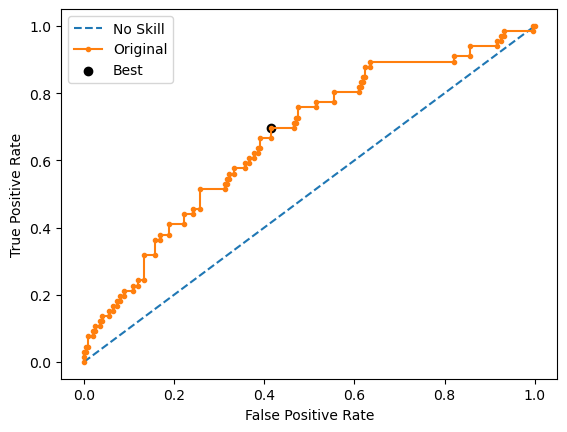

Run 2 - Random State: 1
Test G-mean: 0.6717478131802523
Best Threshold=0.511730, G-Mean=0.687


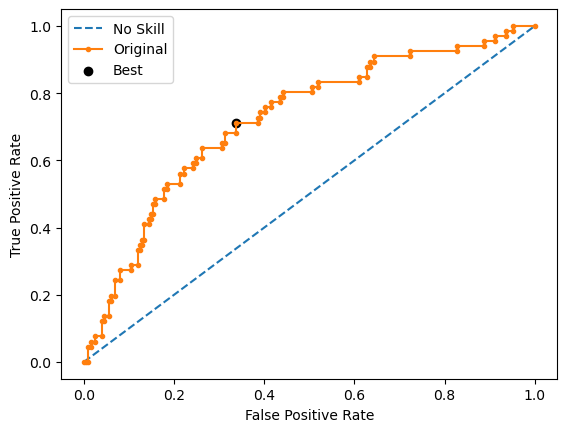

Run 3 - Random State: 2
Test G-mean: 0.6893819875457113
Best Threshold=0.484077, G-Mean=0.712


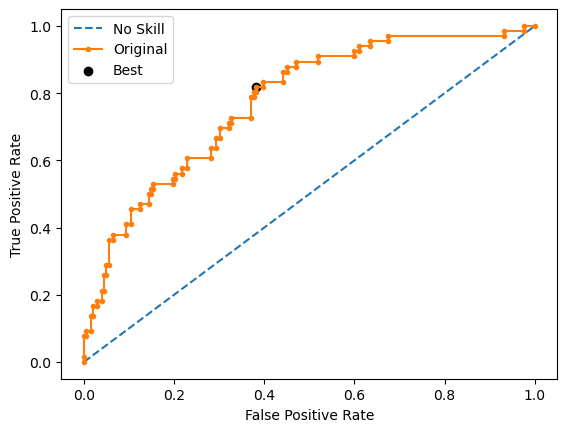

Run 4 - Random State: 3
Test G-mean: 0.6674912392349772
Best Threshold=0.524021, G-Mean=0.702


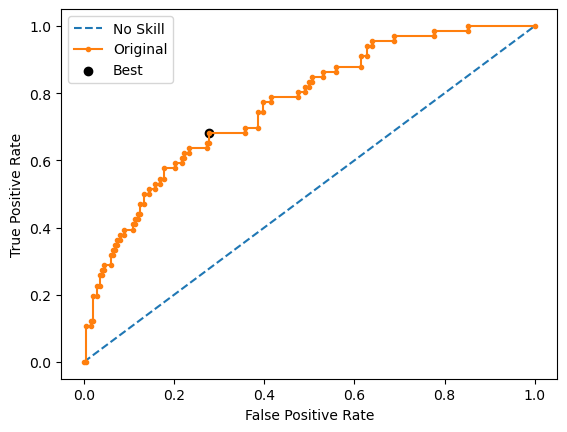

Run 5 - Random State: 4
Test G-mean: 0.64995557096191
Best Threshold=0.546516, G-Mean=0.673


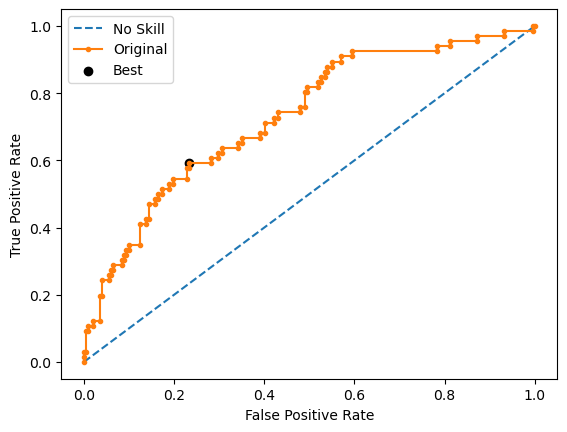

Ave Test G-mean: 0.6583917459606774
Stdev Test G-mean: 0.0288037148707628
Ave Test Specificity: 0.6455445544554456
Ave Test Recall: 0.6727272727272727
Ave Test NPV: 0.8583653461384554
Ave Test Accuracy: 0.6522388059701493
Ave Test Precision: 0.3822493937386414
Ave Test F1-Score: 0.487338595009524
Ave Runtime: 6.982167561848959e-05


In [595]:
ho_t08_lgbm_gs, ho_t08_lgbm_be, ho_t08_lgbm_model_info, ho_t08_lgbm_metrics_df = lgbm_class2(ho_t07, g_mean_scorer,
                                                            'home_ownership_class', random_state=0)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits
Best Hyperparameters: {'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__n_estimators': 50, 'classifier__oob_score': True, 'resampling': RandomUnderSampler(random_state=0)}
Best Validation Score (G-mean): 0.6066431794534217
Best Estimator: Pipeline(steps=[('scaler', RobustScaler()),
                ('resampling', RandomUnderSampler(random_state=0)),
                ('classifier',
                 RandomForestClassifier(n_estimators=50, oob_score=True,
                                        random_state=0))])
Mean Train Score (G-mean) 0.8409184763355035
Std Train Score (G-mean) 0.01269682197759748
GridSearchCV Runtime: 284.66527342796326 secs
Run 1 - Random State: 0
Test G-mean: 0.5694360593978698
Best Threshold=0.540000, G-Mean=0.583


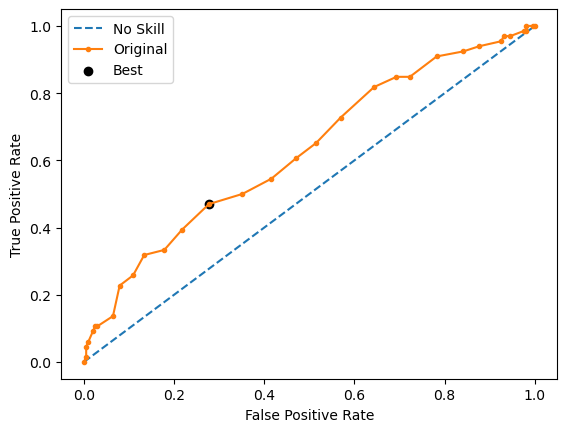

Run 2 - Random State: 1
Test G-mean: 0.5796840547749577
Best Threshold=0.520000, G-Mean=0.580


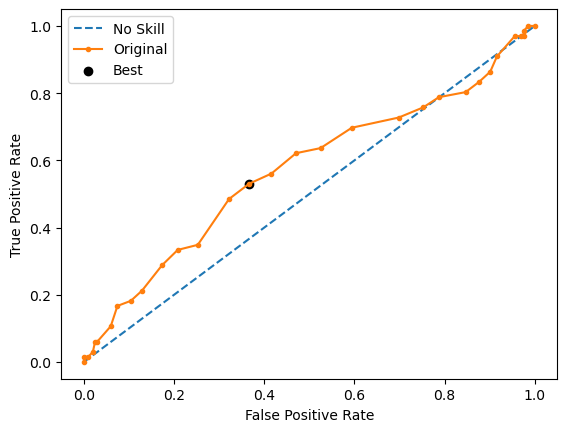

Run 3 - Random State: 2
Test G-mean: 0.6180114835659464
Best Threshold=0.500000, G-Mean=0.627


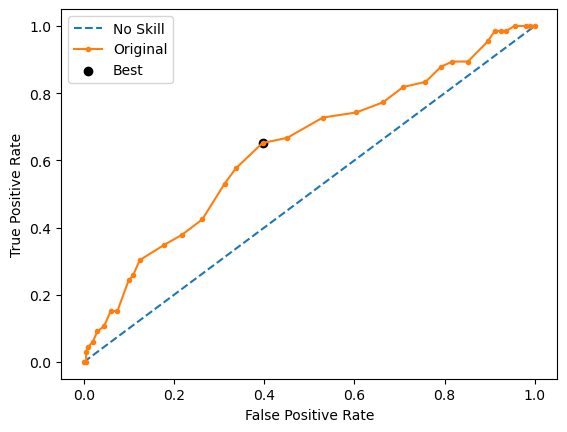

Run 4 - Random State: 3
Test G-mean: 0.5913416681554325
Best Threshold=0.480000, G-Mean=0.609


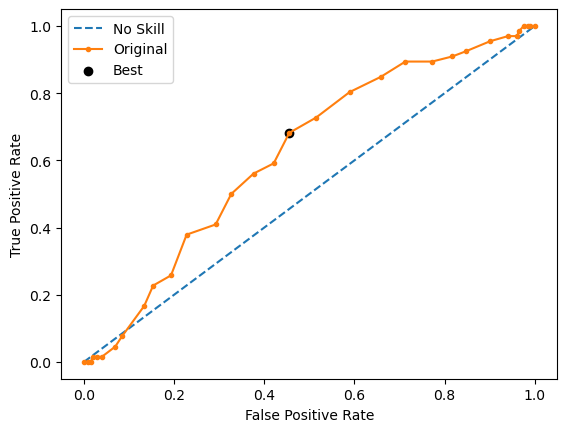

Run 5 - Random State: 4
Test G-mean: 0.5282309180559948
Best Threshold=0.480000, G-Mean=0.563


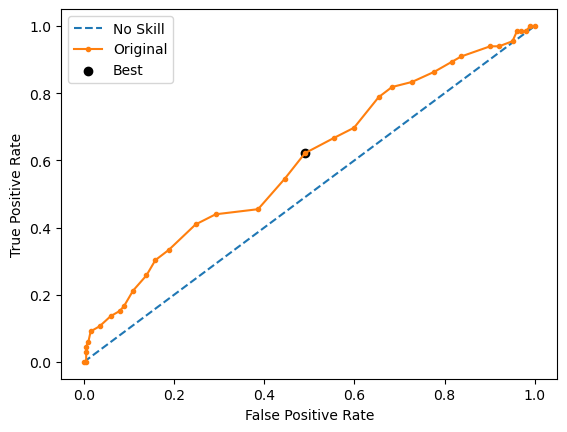

Ave Test G-mean: 0.5773408367900403
Stdev Test G-mean: 0.03290093115058386
Ave Test Specificity: 0.6366336633663366
Ave Test Recall: 0.5242424242424242
Ave Test NPV: 0.8037751307958741
Ave Test Accuracy: 0.608955223880597
Ave Test Precision: 0.32042211637459656
Ave Test F1-Score: 0.39766623333397455
Ave Runtime: 0.38457355499267576


In [636]:
ho_t09_rf_gs, ho_t09_rf_be, ho_t09_rf_model_info, ho_t09_rf_metrics_df = rf_class2(ho_t07, g_mean_scorer,
                                                            'home_ownership_class', random_state=0)

In [619]:
X_rand.shape

(1070, 48)

In [617]:
y.value_counts()

0    807
1    263
Name: home_ownership_class, dtype: int64

In [652]:
df = ho_t07
model = ho_t09_rf_be
X = df.drop(['userId', 'lastFirstName', label_col], axis=1)
y = df.loc[:, label_col]

n_uncorrelated_features = 48
rng = np.random.RandomState(seed=0)
# Use same number of samples as in iris and 20 features
X_rand = rng.normal(size=(X.shape[0], n_uncorrelated_features))


from sklearn.model_selection import StratifiedKFold, permutation_test_score

cv = StratifiedKFold(10, shuffle=True, random_state=0)


score_df, perm_scores_df, pvalue_df = permutation_test_score(
    model, X, y, scoring='accuracy', cv=cv, n_permutations=1000,
    verbose=4, random_state=0, n_jobs=-1
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done 344 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 565 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 834 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  3.1min finished


Text(0.5, 0, 'G-mean score')

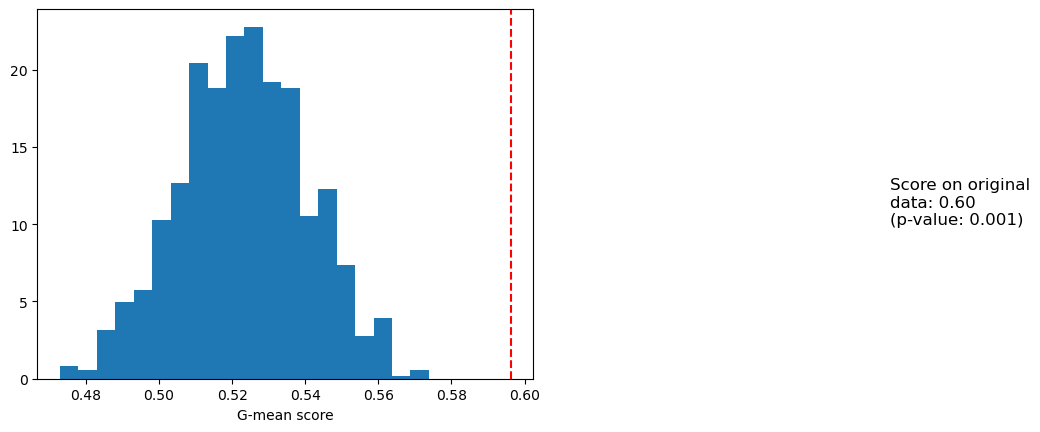

In [653]:
fig, ax = plt.subplots()

ax.hist(perm_scores_df, bins=20, density=True)
ax.axvline(score_df, ls="--", color="r")
score_label = f"Score on original\ndata: {score_df:.2f}\n(p-value: {pvalue_df:.3f})"
ax.text(0.7, 10, score_label, fontsize=12)
ax.set_xlabel("G-mean score")
# _ = ax.set_ylabel("Probability density")

In [649]:
# from sklearn.datasets import load_iris

# iris = load_iris()
# X = iris.data
# y = iris.target

df = ho_t07
model = ho_t09_rf_be
X = df.drop(['userId', 'lastFirstName', label_col], axis=1)
y = df.loc[:, label_col]

n_uncorrelated_features = X.shape[1]
rng = np.random.RandomState(seed=0)
# Use same number of samples as in iris and 20 features
X_rand = rng.normal(size=(X.shape[0], n_uncorrelated_features))

In [ ]:
from sklearn.model_selection import StratifiedKFold, permutation_test_score

df = ho_t07 # insert DF here
model = ho_t09_rf_be # insert model here
X = df.drop(['userId', 'lastFirstName', label_col], axis=1)
y = df.loc[:, label_col]

n_uncorrelated_features = X.shape[1]
rng = np.random.RandomState(seed=0)

X_rand = rng.normal(size=(X.shape[0], n_uncorrelated_features))

cv = StratifiedKFold(10, shuffle=True, random_state=0)

score_rand, perm_scores_rand, pvalue_rand = permutation_test_score(
    model, X_rand, y, scoring=g_mean_scorer, cv=cv, n_permutations=1000,
    verbose=4, random_state=0, n_jobs=-1
)

fig, ax = plt.subplots()

ax.hist(perm_scores_rand, bins=20, density=True)
ax.axvline(score_rand, ls="--", color="r")
score_label = f"Score on original\ndata: {score_rand:.2f}\n(p-value: {pvalue_rand:.3f})"
ax.text(0.7, 10, score_label, fontsize=12)
ax.set_xlabel("G-mean score")
_ = ax.set_ylabel("Probability density")
print(score_rand, pvalue_rand)

In [654]:
cv = StratifiedKFold(10, shuffle=True, random_state=0)

score_rand, perm_scores_rand, pvalue_rand = permutation_test_score(
    model, X_rand, y, scoring=g_mean_scorer, cv=cv, n_permutations=1000,
    verbose=4, random_state=0, n_jobs=-1
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 344 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 565 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 834 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  9.8min finished


In [658]:
score_rand

0.45300182705096737

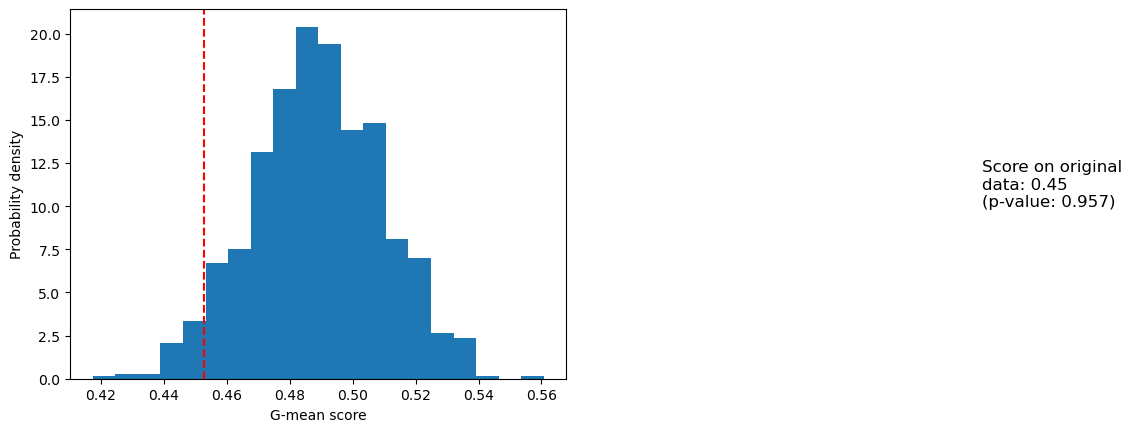

Fitting 10 folds for each of 216 candidates, totalling 2160 fits
Best Hyperparameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__n_estimators': 100, 'resampling': RandomUnderSampler(random_state=0)}
Best Validation Score (G-mean): 0.5985999413481148
Best Estimator: Pipeline(steps=[('scaler', RobustScaler()),
                ('resampling', RandomUnderSampler(random_state=0)),
                ('classifier',
                 RandomForestClassifier(max_depth=5, random_state=0))])
Mean Train Score (G-mean) 0.842330905934164
Std Train Score (G-mean) 0.01207759861445918
GridSearchCV Runtime: 101.47388100624084 secs
Run 1 - Random State: 0
Test G-mean: 0.6419433067809899
Best Threshold=0.488040, G-Mean=0.643


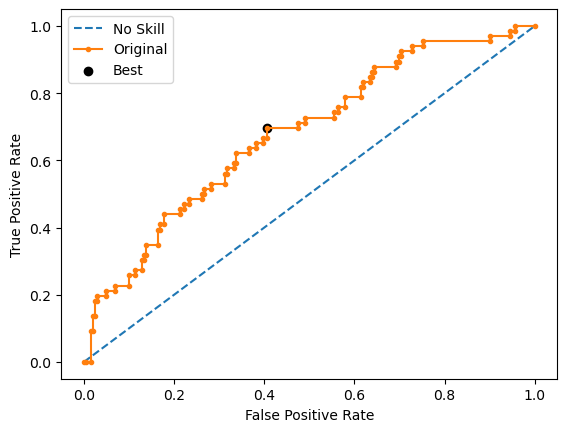

Run 2 - Random State: 1
Test G-mean: 0.7476335302737291
Best Threshold=0.531590, G-Mean=0.779


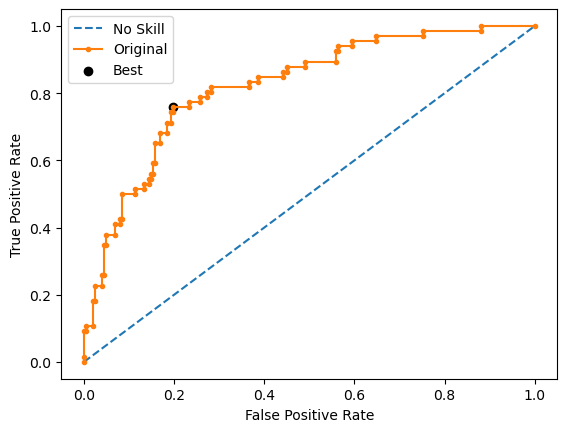

Run 3 - Random State: 2
Test G-mean: 0.7637135103116766
Best Threshold=0.494648, G-Mean=0.786


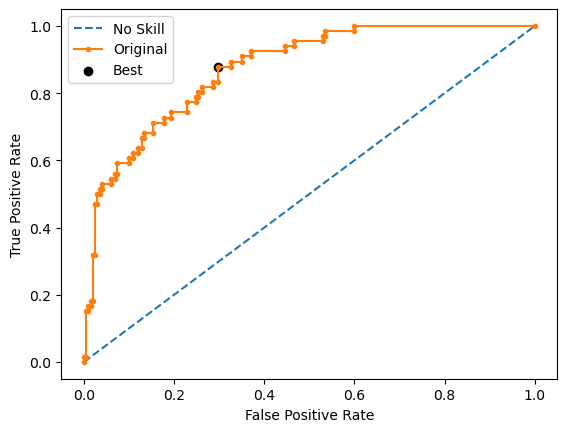

Run 4 - Random State: 3
Test G-mean: 0.7653323287025943
Best Threshold=0.528022, G-Mean=0.788


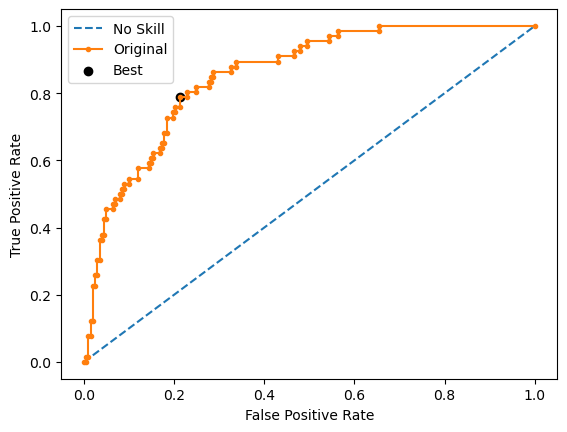

Run 5 - Random State: 4
Test G-mean: 0.7370239619117164
Best Threshold=0.534397, G-Mean=0.770


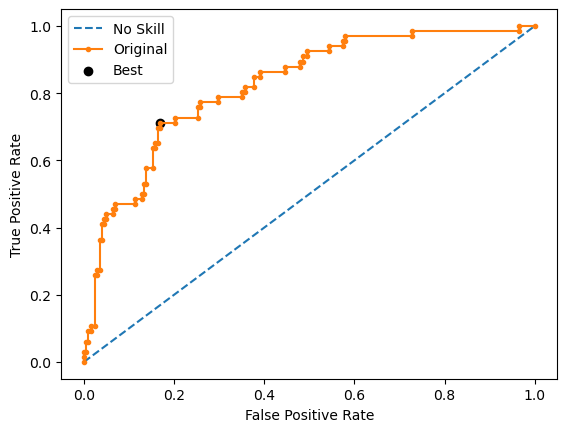

Ave Test G-mean: 0.7311293275961412
Stdev Test G-mean: 0.05121732123145764
Ave Test Specificity: 0.6881188118811881
Ave Test Recall: 0.7787878787878789
Ave Test NPV: 0.9057317963568169
Ave Test Accuracy: 0.7104477611940299
Ave Test Precision: 0.4485178677982617
Ave Test F1-Score: 0.5689847377016697
Ave Runtime: 0.019036006927490235


In [548]:
ho_t08_rf_gs, ho_t08_rf_be, ho_t08_rf_model_info, ho_t08_rf_metrics_df = rf_class2(ho_t07, g_mean_scorer,
                                                            'home_ownership_class', random_state=0)

In [349]:
def get_float_cols_indices(df):
    float_cols = df.select_dtypes(include=['float64', 'int64']).columns
    return [col for col in float_cols]

get_float_cols_indices(X)

['age',
 'basicMonthlySalary',
 'preferredNetDisposableIncomeId',
 'workingFamilyCount',
 'residentsCount',
 'food',
 'hygiene',
 'houseCleaning',
 'fare',
 'parking',
 'gasoline',
 'tuition',
 'allowance',
 'uniform',
 'otherEducation',
 'emergency',
 'medicine',
 'water',
 'electricity',
 'rent',
 'repair',
 'cinema',
 'dineOut',
 'leisure',
 'personalCare',
 'clothing',
 'mobileLoad',
 'internet',
 'vehicleLoan',
 'informalLenders',
 'companyLoan',
 'privateLoans',
 'governmentLoans',
 'smoking',
 'alcohol',
 'gambling',
 'smallLottery',
 'otherVices',
 'savings',
 'loanSSS',
 'payFamilySupport',
 'loanPagIbig',
 'houseHasPrivateEmployee',
 'houseHasOFW',
 'houseOnlyFamily',
 'houseExtendedFamily',
 'home_ownership_class',
 'monthlyFamilyIncome - basicMonthlySalary',
 'monthlyVices',
 'monthlyUtilityBills',
 'totalMonthlyExpenses',
 'monthlyFamilyIncome - totalMonthlyExpenses',
 'basicMonthlySalary - totalMonthlyExpenses',
 'monthlyFamilyIncome / workingFamilyCount',
 'monthlyFamily

In [6]:
dataset = pd.read_csv('df_merged_no_nans.csv')
dataset.loc[dataset['basicMonthlySalary'] < 100, 'basicMonthlySalary'] *= 1000
dataset
# dataset = dataset.drop('Unnamed: 0', axis=1)

# cols_to_drop = [
#     'id', 'fullName', 'firstName', 'middleName', 'lastName', 'mobileNumber',
#     'dateEntry', 'mobilePrefix', 'address', 'occupation'
# ]
cols_to_drop = [
    'id', 'fullName', 'firstName', 'lastName', 'address', 'dateEntry', 'occupation'
]

dataset = dataset.drop(cols_to_drop, axis=1)

boolean_columns = [col for col in dataset.columns if dataset[col].dtype == bool]
dataset[boolean_columns] = dataset[boolean_columns].apply(lambda x: x.astype('int64'))

columns_to_move = ['lastFirstName', 'age', 'gender', 'province', 'job']
columns_remaining = [col for col in dataset.columns if col not in columns_to_move]

new_column_order = columns_to_move + columns_remaining
dataset = dataset[new_column_order]
dataset.insert(0, 'userId', dataset.pop('userId'))

def map_ageing_class(row):
    found_in_hdmf = row['foundInHDMF']
    home_ownership_class = row['home_ownership_class']

    if home_ownership_class == 0:
        return np.nan
    elif found_in_hdmf in [' Current', 'FP', '01 mos', '02 mos', '03 mos']:
        return 0
    elif found_in_hdmf in ['04 mos', '05 mos']:
        return 1

# One-hot encoding of categorical columns
# dataset = pd.get_dummies(dataset, columns=['gender'], prefix='gender', drop_first='True')
# dataset = pd.get_dummies(dataset, columns=['province'], prefix='province')
# dataset = pd.get_dummies(dataset, columns=['job'], prefix='job')

dataset['home_ownership_class'] = ((dataset['foundInOS'] != 'False') |
                                   (dataset['foundInHDMF'] != 'False')).astype('int64')



# dataset['ageing_class'] = dataset['home_ownership_class'].astype('int64')
# dataset['ageing_class'] = dataset.apply(map_ageing_class, axis=1)

cols_to_drop = ['foundInOS', 'foundInHDMF']
dataset = dataset.drop(cols_to_drop, axis=1)

dataset

userId          lastFirstName  age  gender      province  \
0        370          IBALI, HOWARD   24    MALE  METRO MANILA   
1       1025  PATALINGHOG, KIMBERLY   26  FEMALE  METRO MANILA   
2       1105      TEMILLOSO, DENNIS   40    MALE  METRO MANILA   
3       1719         OSCARES, ELMER   32    MALE       UNKNOWN   
4       2081         LEGASPI, MANNY   39    MALE  METRO MANILA   
...      ...                    ...  ...     ...           ...   
1065   12850         LIPANGO, ARVIN   34    MALE  METRO MANILA   
1066   12852          TEJADA, JERIC   27    MALE        LAGUNA   
1067   12853         RAMOS, RHEALYN   27  FEMALE        CAVITE   
1068   12854         BURGOS, LIEZEL   48  FEMALE        ILOILO   
1069   12857     SEÑERES, JENNY MAE   24  FEMALE  METRO MANILA   

                         job  basicMonthlySalary  \
0          SERVICE AND SALES               19000   
1          SERVICE AND SALES               15000   
2          SERVICE AND SALES               20000   
3           MACHINE OPERATOR               21200   
4           CLERICAL SUPPORT               19800   
...                      ...                 ...   
1065  ASSOCIATE PROFESSIONAL               19000   
1066         CRAFT AND TRADE               20000   
1067       SERVICE AND SALES               13962   
1068       SERVICE AND SALES               51000   
1069       SERVICE AND SALES               98800   

      preferredNetDisposableIncomeId  workingFamilyCount  residentsCount  \
0                                  2                   3               3   
1                                  3                   2               4   
2                                  2                   0               3   
3                                  2                   0               5   
4                                  2                   0               0   
...                              ...                 ...             ...   
1065                               2                   2               4   
1066                               2                   1               1   
1067                               1                   2               4   
1068                               2                   0               5   
1069                               3                   3               3   

      monthlyFamilyIncome  food  hygiene  houseCleaning  fare  parking  \
0                 40000.0  1000      500            200   200        0   
1                 30000.0  5000     3000           2000  2000        0   
2                 30000.0  3000      500            300   200       50   
3                 12000.0  2000      500            200   392        0   
4                 25000.0  5000     2000           1000  1500        0   
...                   ...   ...      ...            ...   ...      ...   
1065              19000.0  5000     1000           1000     1        1   
1066              20000.0  5000      500            400   280        0   
1067              40000.0     4        2              1     3        1   
1068              51000.0  5000     3000           1500  2000        0   
1069             143800.0  7000     3000           2000     0        0   

      gasoline  tuition  allowance  uniform  otherEducation  emergency  \
0            0        0         50        0               0        500   
1            0        0          0        0               0       2000   
2           50      500        100      100              50        500   
3            0        0          0        0               0        100   
4            0     1000        500     1500               0          0   
...        ...      ...        ...      ...             ...        ...   
1065         1     1000        500        1            1000       1000   
1066         0        0          0        0               0          0   
1067         1        0          0        0               0      30000   
1068         0    15000       9000        0   

In [103]:
ho_t01 = dataset.copy()
ho_t01_num = ho_t01.drop(columns=['gender', 'province', 'job'])
ho_t01

userId          lastFirstName  age  gender      province  \
0        370          IBALI, HOWARD   24    MALE  METRO MANILA   
1       1025  PATALINGHOG, KIMBERLY   26  FEMALE  METRO MANILA   
2       1105      TEMILLOSO, DENNIS   40    MALE  METRO MANILA   
3       1719         OSCARES, ELMER   32    MALE       UNKNOWN   
4       2081         LEGASPI, MANNY   39    MALE  METRO MANILA   
...      ...                    ...  ...     ...           ...   
1065   12850         LIPANGO, ARVIN   34    MALE  METRO MANILA   
1066   12852          TEJADA, JERIC   27    MALE        LAGUNA   
1067   12853         RAMOS, RHEALYN   27  FEMALE        CAVITE   
1068   12854         BURGOS, LIEZEL   48  FEMALE        ILOILO   
1069   12857     SEÑERES, JENNY MAE   24  FEMALE  METRO MANILA   

                         job  basicMonthlySalary  \
0          SERVICE AND SALES               19000   
1          SERVICE AND SALES               15000   
2          SERVICE AND SALES               20000   
3           MACHINE OPERATOR               21200   
4           CLERICAL SUPPORT               19800   
...                      ...                 ...   
1065  ASSOCIATE PROFESSIONAL               19000   
1066         CRAFT AND TRADE               20000   
1067       SERVICE AND SALES               13962   
1068       SERVICE AND SALES               51000   
1069       SERVICE AND SALES               98800   

      preferredNetDisposableIncomeId  workingFamilyCount  residentsCount  \
0                                  2                   3               3   
1                                  3                   2               4   
2                                  2                   0               3   
3                                  2                   0               5   
4                                  2                   0               0   
...                              ...                 ...             ...   
1065                               2                   2               4   
1066                               2                   1               1   
1067                               1                   2               4   
1068                               2                   0               5   
1069                               3                   3               3   

      monthlyFamilyIncome  food  hygiene  houseCleaning  fare  parking  \
0                 40000.0  1000      500            200   200        0   
1                 30000.0  5000     3000           2000  2000        0   
2                 30000.0  3000      500            300   200       50   
3                 12000.0  2000      500            200   392        0   
4                 25000.0  5000     2000           1000  1500        0   
...                   ...   ...      ...            ...   ...      ...   
1065              19000.0  5000     1000           1000     1        1   
1066              20000.0  5000      500            400   280        0   
1067              40000.0     4        2              1     3        1   
1068              51000.0  5000     3000           1500  2000        0   
1069             143800.0  7000     3000           2000     0        0   

      gasoline  tuition  allowance  uniform  otherEducation  emergency  \
0            0        0         50        0               0        500   
1            0        0          0        0               0       2000   
2           50      500        100      100              50        500   
3            0        0          0        0               0        100   
4            0     1000        500     1500               0          0   
...        ...      ...        ...      ...             ...        ...   
1065         1     1000        500        1            1000       1000   
1066         0        0          0        0               0          0   
1067         1        0          0        0               0      30000   
1068         0    15000       9000        0   

In [421]:
ho_t01

ho_t07 = ho_t01.copy()
ho_t07 = pd.get_dummies(ho_t07, columns=['gender'], prefix='gender', drop_first='True')
ho_t07 = pd.get_dummies(ho_t07, columns=['province'], prefix='province')
ho_t07 = pd.get_dummies(ho_t07, columns=['job'], prefix='job')
ho_t07

userId          lastFirstName  age  basicMonthlySalary  \
0        370          IBALI, HOWARD   24               19000   
1       1025  PATALINGHOG, KIMBERLY   26               15000   
2       1105      TEMILLOSO, DENNIS   40               20000   
3       1719         OSCARES, ELMER   32               21200   
4       2081         LEGASPI, MANNY   39               19800   
...      ...                    ...  ...                 ...   
1065   12850         LIPANGO, ARVIN   34               19000   
1066   12852          TEJADA, JERIC   27               20000   
1067   12853         RAMOS, RHEALYN   27               13962   
1068   12854         BURGOS, LIEZEL   48               51000   
1069   12857     SEÑERES, JENNY MAE   24               98800   

      preferredNetDisposableIncomeId  workingFamilyCount  residentsCount  \
0                                  2                   3               3   
1                                  3                   2               4   
2                                  2                   0               3   
3                                  2                   0               5   
4                                  2                   0               0   
...                              ...                 ...             ...   
1065                               2                   2               4   
1066                               2                   1               1   
1067                               1                   2               4   
1068                               2                   0               5   
1069                               3                   3               3   

      monthlyFamilyIncome  food  hygiene  houseCleaning  fare  parking  \
0                 40000.0  1000      500            200   200        0   
1                 30000.0  5000     3000           2000  2000        0   
2                 30000.0  3000      500            300   200       50   
3                 12000.0  2000      500            200   392        0   
4                 25000.0  5000     2000           1000  1500        0   
...                   ...   ...      ...            ...   ...      ...   
1065              19000.0  5000     1000           1000     1        1   
1066              20000.0  5000      500            400   280        0   
1067              40000.0     4        2              1     3        1   
1068              51000.0  5000     3000           1500  2000        0   
1069             143800.0  7000     3000           2000     0        0   

      gasoline  tuition  allowance  uniform  otherEducation  emergency  \
0            0        0         50        0               0        500   
1            0        0          0        0               0       2000   
2           50      500        100      100              50        500   
3            0        0          0        0               0        100   
4            0     1000        500     1500               0          0   
...        ...      ...        ...      ...             ...        ...   
1065         1     1000        500        1            1000       1000   
1066         0        0          0        0               0          0   
1067         1        0          0        0               0      30000   
1068         0    15000       9000        0               0       1000   
1069      6000        0          0        0               0       5000   

      medicine  water  electricity  rent  repair  cinema  dineOut  leisure  \
0          450      0            0     0       0       0        0        0   
1            0    200          200  1000     500       0        0        0   
2          100    200          500     0     200       0      100      100   
3            0    200          200  3000       0       0        0        0   
4         1000    300         1900     0    1000       0     1000     1000   
...        ...    ...          ...   ...     ...     ...      ...      ...   


In [422]:
ho_t07_X = ho_t07.copy().drop(['userId', 'lastFirstName', 'home_ownership_class'], axis=1)
ho_t07_y = ho_t07.copy()[['home_ownership_class']]
ho_t07_y
# ho_t02_X_num = ho_t02_X.drop(['gender', 'province', 'job'], axis=1)

home_ownership_class
0                        1
1                        0
2                        0
3                        1
4                        0
...                    ...
1065                     0
1066                     0
1067                     0
1068                     0
1069                     0

[1070 rows x 1 columns]

In [423]:
selector = VarianceThreshold(threshold=0.15)
filtered_data = selector.fit_transform(ho_t07_X)

# Convert the array back to dataframe and retain feature names
ho_t07_X_f01 = pd.DataFrame(filtered_data, columns=ho_t07_X.columns[selector.get_support()])

display(ho_t07_X_f01)

# Getting the boolean mask of retained columns
retained_columns_mask = selector.get_support()

# Using the inverse of the boolean mask to get the column names that were filtered out
filtered_out_columns = ho_t07_X.columns[~retained_columns_mask].tolist()

print('Number of columns:', len(filtered_out_columns))
print('Removed columns:', filtered_out_columns)

age  basicMonthlySalary  preferredNetDisposableIncomeId  \
0     24.0             19000.0                             2.0   
1     26.0             15000.0                             3.0   
2     40.0             20000.0                             2.0   
3     32.0             21200.0                             2.0   
4     39.0             19800.0                             2.0   
...    ...                 ...                             ...   
1065  34.0             19000.0                             2.0   
1066  27.0             20000.0                             2.0   
1067  27.0             13962.0                             1.0   
1068  48.0             51000.0                             2.0   
1069  24.0             98800.0                             3.0   

      workingFamilyCount  residentsCount  monthlyFamilyIncome    food  \
0                    3.0             3.0              40000.0  1000.0   
1                    2.0             4.0              30000.0  5000.0   
2                    0.0             3.0              30000.0  3000.0   
3                    0.0             5.0              12000.0  2000.0   
4                    0.0             0.0              25000.0  5000.0   
...                  ...             ...                  ...     ...   
1065                 2.0             4.0              19000.0  5000.0   
1066                 1.0             1.0              20000.0  5000.0   
1067                 2.0             4.0              40000.0     4.0   
1068                 0.0             5.0              51000.0  5000.0   
1069                 3.0             3.0             143800.0  7000.0   

      hygiene  houseCleaning    fare  parking  gasoline  tuition  allowance  \
0       500.0          200.0   200.0      0.0       0.0      0.0       50.0   
1      3000.0         2000.0  2000.0      0.0       0.0      0.0        0.0   
2       500.0          300.0   200.0     50.0      50.0    500.0      100.0   
3       500.0          200.0   392.0      0.0       0.0      0.0        0.0   
4      2000.0         1000.0  1500.0      0.0       0.0   1000.0      500.0   
...       ...            ...     ...      ...       ...      ...        ...   
1065   1000.0         1000.0     1.0      1.0       1.0   1000.0      500.0   
1066    500.0          400.0   280.0      0.0       0.0      0.0        0.0   
1067      2.0            1.0     3.0      1.0       1.0      0.0        0.0   
1068   3000.0         1500.0  2000.0      0.0       0.0  15000.0     9000.0   
1069   3000.0         2000.0     0.0      0.0    6000.0      0.0        0.0   

      uniform  otherEducation  emergency  medicine  water  electricity  \
0         0.0             0.0      500.0     450.0    0.0          0.0   
1         0.0             0.0     2000.0       0.0  200.0        200.0   
2       100.0            50.0      500.0     100.0  200.0        500.0   
3         0.0             0.0      100.0       0.0  200.0        200.0   
4      1500.0             0.0        0.0    1000.0  300.0       1900.0   
...       ...             ...        ...       ...    ...          ...   
1065      1.0          1000.0     1000.0     500.0  200.0       1500.0   
1066      0.0             0.0        0.0       0.0    0.0          0.0   
1067      0.0             0.0    30000.0    1000.0  150.0       1000.0   
1068      0.0             0.0     1000.0    1000.0  300.0        800.0   
1069      0.0             0.0     5000.0    1000.0    0.0          0.0   

        rent  repair  cinema  dineOut  leisure  personalCare  clothing  \
0        0.0     0.0     0.0      0.0      0.0           0.0       0.0   
1     1000.0   500.0     0.0      0.0      0.0           0.0       0.0   
2        0.0   200.0     0.0    100.0    100.0         100.0     200.0   
3     3000.0     0.0     0.0      0.0      0.0         100.0     200.0   
4        0.0  1000.0     0.0   1000.0   1000.0        1500.0    1500.0   
...      ...     ...     ...      ...      ...         

Number of columns: 50
Removed columns: ['loanOthers', 'payInsurance', 'loanGSIS', 'loanPersonal', 'houseHasPensioner', 'houseHasBusiness', 'houseHasFreelancer', 'houseHasGovtEmployee', 'province_AGUSAN DEL NORTE', 'province_AKLAN', 'province_ALBAY', 'province_BATAAN', 'province_BATANGAS', 'province_BULACAN', 'province_CAGAYAN', 'province_CAMARINES SUR', 'province_CEBU', 'province_COTABATO', 'province_DAVAO DEL SUR', 'province_EASTERN SAMAR', 'province_FOREIGN COUNTRY', 'province_ILOCOS NORTE', 'province_ILOILO', 'province_ISABELA', 'province_LAGUNA', 'province_LEYTE', 'province_MARINDUQUE', 'province_MISAMIS OCCIDENTAL', 'province_NEGROS OCCIDENTAL', 'province_NUEVA ECIJA', 'province_ORIENTAL MINDORO', 'province_PANGASINAN', 'province_QUEZON', 'province_QUIRINO', 'province_RIZAL', 'province_ROMBLON', 'province_SOUTH COTABATO', 'province_TARLAC', 'province_UNKNOWN', 'province_ZAMBOANGA DEL NORTE', 'job_AGRICULTURAL', 'job_ARMED FORCES', 'job_CLERICAL SUPPORT', 'job_CRAFT AND TRADE', 'jo

In [431]:
ho_t07_X_f02 = ho_t07_X_f01.copy()
cols_to_drop = [
    'smallLottery', 'otherVices', 'cinema', 'alcohol'
]
ho_t07_X_f02 = ho_t07_X_f01.drop(columns=cols_to_drop)
# cols_to_drop = [
#     'monthlyFamilyIncome'
# ]
# ho_t07_X_f02 = ho_t07_X_f01.drop(columns=cols_to_drop)

# Calculate the correlation matrix
correlation_matrix = ho_t07_X_f02.corr()

# Find pairs of columns where the correlation is greater than 0.8
# This will ignore the diagonal which will always be 1 (self correlation)
to_drop = set()
for i in range(len(correlation_matrix)):
    for j in range(i+1, len(correlation_matrix)):
        if correlation_matrix.iloc[i, j] >= 0.9:
            colname = correlation_matrix.columns[j]  # Getting the column name
            to_drop.add(colname)
            print(correlation_matrix.columns[i], "|", colname, "| Correlation:",
                  correlation_matrix.iloc[i, j])

print("\nAfter dropping correlated features:")
ho_t07_X_f02


After dropping correlated features:


age  basicMonthlySalary  preferredNetDisposableIncomeId  \
0     24.0             19000.0                             2.0   
1     26.0             15000.0                             3.0   
2     40.0             20000.0                             2.0   
3     32.0             21200.0                             2.0   
4     39.0             19800.0                             2.0   
...    ...                 ...                             ...   
1065  34.0             19000.0                             2.0   
1066  27.0             20000.0                             2.0   
1067  27.0             13962.0                             1.0   
1068  48.0             51000.0                             2.0   
1069  24.0             98800.0                             3.0   

      workingFamilyCount  residentsCount  monthlyFamilyIncome    food  \
0                    3.0             3.0              40000.0  1000.0   
1                    2.0             4.0              30000.0  5000.0   
2                    0.0             3.0              30000.0  3000.0   
3                    0.0             5.0              12000.0  2000.0   
4                    0.0             0.0              25000.0  5000.0   
...                  ...             ...                  ...     ...   
1065                 2.0             4.0              19000.0  5000.0   
1066                 1.0             1.0              20000.0  5000.0   
1067                 2.0             4.0              40000.0     4.0   
1068                 0.0             5.0              51000.0  5000.0   
1069                 3.0             3.0             143800.0  7000.0   

      hygiene  houseCleaning    fare  parking  gasoline  tuition  allowance  \
0       500.0          200.0   200.0      0.0       0.0      0.0       50.0   
1      3000.0         2000.0  2000.0      0.0       0.0      0.0        0.0   
2       500.0          300.0   200.0     50.0      50.0    500.0      100.0   
3       500.0          200.0   392.0      0.0       0.0      0.0        0.0   
4      2000.0         1000.0  1500.0      0.0       0.0   1000.0      500.0   
...       ...            ...     ...      ...       ...      ...        ...   
1065   1000.0         1000.0     1.0      1.0       1.0   1000.0      500.0   
1066    500.0          400.0   280.0      0.0       0.0      0.0        0.0   
1067      2.0            1.0     3.0      1.0       1.0      0.0        0.0   
1068   3000.0         1500.0  2000.0      0.0       0.0  15000.0     9000.0   
1069   3000.0         2000.0     0.0      0.0    6000.0      0.0        0.0   

      uniform  otherEducation  emergency  medicine  water  electricity  \
0         0.0             0.0      500.0     450.0    0.0          0.0   
1         0.0             0.0     2000.0       0.0  200.0        200.0   
2       100.0            50.0      500.0     100.0  200.0        500.0   
3         0.0             0.0      100.0       0.0  200.0        200.0   
4      1500.0             0.0        0.0    1000.0  300.0       1900.0   
...       ...             ...        ...       ...    ...          ...   
1065      1.0          1000.0     1000.0     500.0  200.0       1500.0   
1066      0.0             0.0        0.0       0.0    0.0          0.0   
1067      0.0             0.0    30000.0    1000.0  150.0       1000.0   
1068      0.0             0.0     1000.0    1000.0  300.0        800.0   
1069      0.0             0.0     5000.0    1000.0    0.0          0.0   

        rent  repair  dineOut  leisure  personalCare  clothing  mobileLoad  \
0        0.0     0.0      0.0      0.0           0.0       0.0        50.0   
1     1000.0   500.0      0.0      0.0           0.0       0.0         0.0   
2        0.0   200.0    100.0    100.0         100.0     200.0       200.0   
3     3000.0     0.0      0.0      0.0         100.0     200.0       400.0   
4        0.0  1000.0   1000.0   1000.0        1500.0    1500.0       500.0   
...      ...     ...      ...  

In [432]:
ho_t07_X_f02 = ho_t07.copy().drop(columns=filtered_out_columns)
ho_t07_X_f02 = ho_t07_X_f02.copy().drop(columns=cols_to_drop)
ho_t07_X_f02

ho_t07 = ho_t07_X_f02.copy()
ho_t07

userId          lastFirstName  age  basicMonthlySalary  \
0        370          IBALI, HOWARD   24               19000   
1       1025  PATALINGHOG, KIMBERLY   26               15000   
2       1105      TEMILLOSO, DENNIS   40               20000   
3       1719         OSCARES, ELMER   32               21200   
4       2081         LEGASPI, MANNY   39               19800   
...      ...                    ...  ...                 ...   
1065   12850         LIPANGO, ARVIN   34               19000   
1066   12852          TEJADA, JERIC   27               20000   
1067   12853         RAMOS, RHEALYN   27               13962   
1068   12854         BURGOS, LIEZEL   48               51000   
1069   12857     SEÑERES, JENNY MAE   24               98800   

      preferredNetDisposableIncomeId  workingFamilyCount  residentsCount  \
0                                  2                   3               3   
1                                  3                   2               4   
2                                  2                   0               3   
3                                  2                   0               5   
4                                  2                   0               0   
...                              ...                 ...             ...   
1065                               2                   2               4   
1066                               2                   1               1   
1067                               1                   2               4   
1068                               2                   0               5   
1069                               3                   3               3   

      monthlyFamilyIncome  food  hygiene  houseCleaning  fare  parking  \
0                 40000.0  1000      500            200   200        0   
1                 30000.0  5000     3000           2000  2000        0   
2                 30000.0  3000      500            300   200       50   
3                 12000.0  2000      500            200   392        0   
4                 25000.0  5000     2000           1000  1500        0   
...                   ...   ...      ...            ...   ...      ...   
1065              19000.0  5000     1000           1000     1        1   
1066              20000.0  5000      500            400   280        0   
1067              40000.0     4        2              1     3        1   
1068              51000.0  5000     3000           1500  2000        0   
1069             143800.0  7000     3000           2000     0        0   

      gasoline  tuition  allowance  uniform  otherEducation  emergency  \
0            0        0         50        0               0        500   
1            0        0          0        0               0       2000   
2           50      500        100      100              50        500   
3            0        0          0        0               0        100   
4            0     1000        500     1500               0          0   
...        ...      ...        ...      ...             ...        ...   
1065         1     1000        500        1            1000       1000   
1066         0        0          0        0               0          0   
1067         1        0          0        0               0      30000   
1068         0    15000       9000        0               0       1000   
1069      6000        0          0        0               0       5000   

      medicine  water  electricity  rent  repair  dineOut  leisure  \
0          450      0            0     0       0        0        0   
1            0    200          200  1000     500        0        0   
2          100    200          500     0     200      100      100   
3            0    200          200  3000       0        0        0   
4         1000    300         1900     0    1000     1000     1000   
...        ...    ...          ...   ...     ...      ...      ...   
1065       500    200         1500  5000    1000        

In [492]:
ho_t07_rf_gs, ho_t07_rf_be, ho_t07_rf_model_info, ho_t07_rf_metrics_df = rf_class2(ho_t07, g_mean_scorer,
                                                            'home_ownership_class', random_state=0)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits
Best Hyperparameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__n_estimators': 100, 'resampling': RandomUnderSampler(random_state=0)}
Best Validation Score (G-mean): 0.5985999413481148
Best Estimator: Pipeline(steps=[('scaler', RobustScaler()),
                ('resampling', RandomUnderSampler(random_state=0)),
                ('classifier',
                 RandomForestClassifier(max_depth=5, random_state=0))])
Mean Train Score (G-mean) 0.842330905934164
Std Train Score (G-mean) 0.01207759861445918
GridSearchCV Runtime: 104.64498114585876 secs
Run 1 - Random State: 0
Test G-mean: 0.6419433067809899
Run 2 - Random State: 1
Test G-mean: 0.5921022365317079
Run 3 - Random State: 2
Test G-mean: 0.6224859427126748
Run 4 - Random State: 3
Test G-mean: 0.6174043398064847
Run 5 - Random State: 4
Test G-mean: 0.5799427845601118
Ave Test G-mean: 0.6107757220783938
Stdev Test G-mean: 0.02475810612178

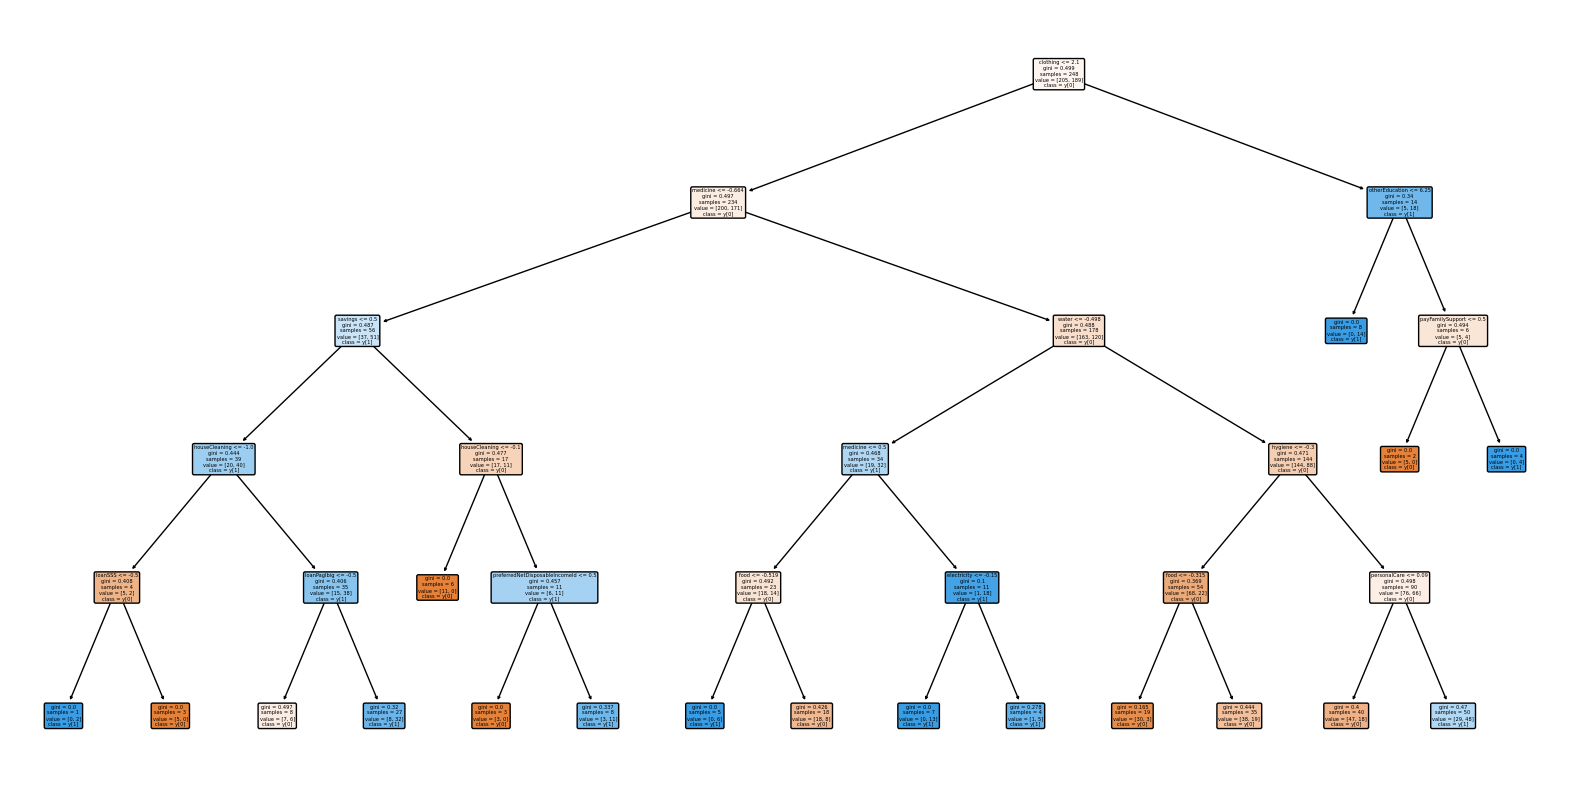

In [446]:
X_tra

In [447]:
from sklearn.tree import _tree

def tree_rules(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            yield f"{indent}if {name} <= {threshold:.2f}:"
            yield from recurse(tree_.children_left[node], depth + 1)
            yield f"{indent}else:  # if {name} > {threshold:.2f}"
            yield from recurse(tree_.children_right[node], depth + 1)
        else:
            yield f"{indent}return Class {tree_.value[node].argmax()}"

    return "\n".join(recurse(0, 1))

In [448]:
model = ho_t07_rf_be.named_steps.classifier
rules = tree_rules(model.estimators_[0], X_train.columns)
print(rules)

  if clothing <= 2.10:
    if medicine <= -0.66:
      if savings <= 0.50:
        if houseCleaning <= -1.00:
          if loanSSS <= -0.50:
            return Class 1
          else:  # if loanSSS > -0.50
            return Class 0
        else:  # if houseCleaning > -1.00
          if loanPagIbig <= -0.50:
            return Class 0
          else:  # if loanPagIbig > -0.50
            return Class 1
      else:  # if savings > 0.50
        if houseCleaning <= -0.10:
          return Class 0
        else:  # if houseCleaning > -0.10
          if preferredNetDisposableIncomeId <= 0.50:
            return Class 0
          else:  # if preferredNetDisposableIncomeId > 0.50
            return Class 1
    else:  # if medicine > -0.66
      if water <= -0.50:
        if medicine <= 0.50:
          if food <= -0.52:
            return Class 1
          else:  # if food > -0.52
            return Class 0
        else:  # if medicine > 0.50
          if electricity <= -0.15:
            retur

In [449]:
df = ho_t07
model = ho_t07_rf_be
X = df.drop(['userId', 'lastFirstName', label_col], axis=1)
y = df.loc[:, label_col]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state=0)

# input = ho_t12_adaboost_c0.drop(['user_id', 'lastFirstName', 'home_ownership_class'], axis=1)
# Fits the explainer
explainer = shap.Explainer(model.predict, X_test)

# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

Permutation explainer: 269it [02:24,  1.74it/s]                         


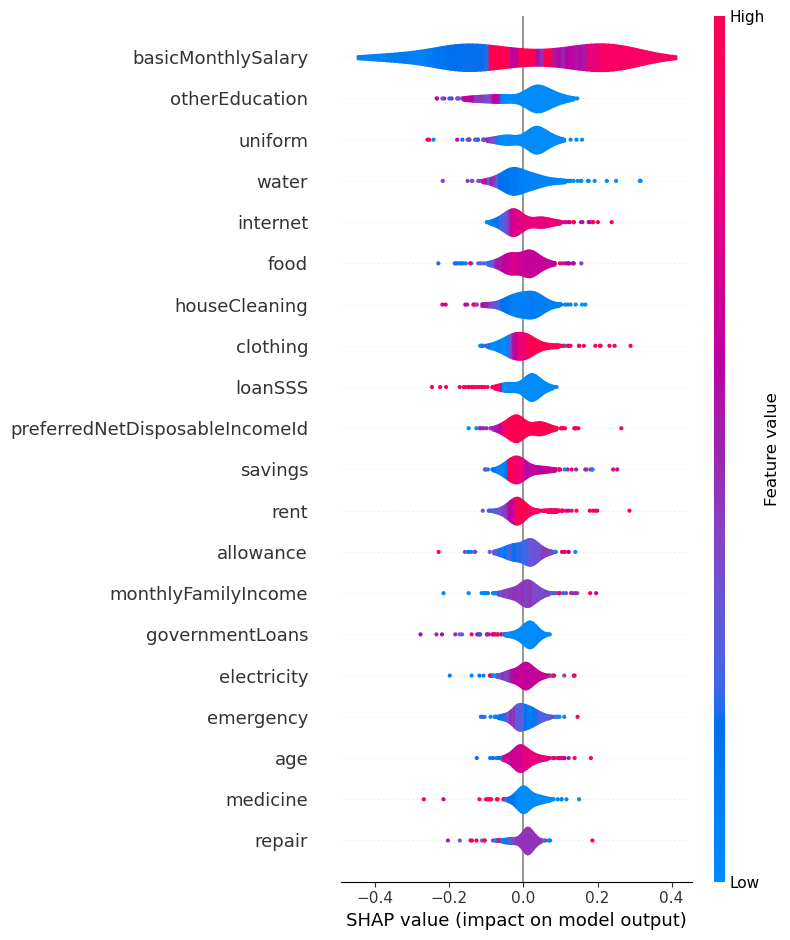

In [450]:
feature_names = X.columns

# shap.summary_plot(shap_values, feature_names=feature_names, plot_type='dot')
shap.summary_plot(shap_values, feature_names=feature_names, plot_type='violin')

In [99]:
def adjust_data_types(df):
    for col in df.columns:
        unique_vals = df[col].unique()
        if df[col].dtypes == 'object':
            None
#         elif (set(unique_vals) == {0, 1}) or col == 'userId':
#             df[col] = df[col].astype('int64')
#         else:
#             df[col] = df[col].astype('float64')
        elif (set(unique_vals) != {0, 1}):
            df[col] = df[col].astype('float64')
        else:
            df[col] = df[col].astype('int64')
    return df

In [483]:
# ho_t03_dice

In [482]:
ho_t07_dice = ho_t07.copy()
ho_t07_dice = adjust_data_types(ho_t07_dice)
ho_t07_dice['userId'] = ho_t07_dice['userId'].astype('str')
# ho_t03_dice['gender_MALE'] = ho_t03_dice['userId'].astype('str')
# ho_t03_dice['province_CAVITE'] = ho_t03_dice['userId'].astype('str')
# ho_t03_dice['province_METRO MANILA'] = ho_t03_dice['userId'].astype('str')
# ho_t03_dice['job_ASSOCIATE PROFESSIONAL'] = ho_t03_dice['userId'].astype('str')
# ho_t03_dice['job_SERVICE AND SALES'] = ho_t03_dice['userId'].astype('str')
ho_t07_dice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 51 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   userId                          1070 non-null   object 
 1   lastFirstName                   1070 non-null   object 
 2   age                             1070 non-null   float64
 3   basicMonthlySalary              1070 non-null   float64
 4   preferredNetDisposableIncomeId  1070 non-null   float64
 5   workingFamilyCount              1070 non-null   float64
 6   residentsCount                  1070 non-null   float64
 7   monthlyFamilyIncome             1070 non-null   float64
 8   food                            1070 non-null   float64
 9   hygiene                         1070 non-null   float64
 10  houseCleaning                   1070 non-null   float64
 11  fare                            1070 non-null   float64
 12  parking                         10

In [484]:
# len(X_train.columns), len(get_float_cols_indices(X_train))
# X_train

In [485]:
# df.info()
# X_train.info()

In [486]:
df = ho_t07_dice
model = ho_t07_rf_be


X = df.drop(['userId', 'lastFirstName'], axis=1)
y = df.loc[:, label_col]
X_train, X_test, _, _ = train_test_split(X, y,
                                         test_size=0.25,
                                         stratify=y,
                                         random_state=0)

X_train
# Dataset for training an ML model
d = dice_ml.Data(dataframe=X_train,
                 continuous_features=X_train.drop(columns='home_ownership_class').columns.to_list(),
                 outcome_name='home_ownership_class')

# Pre-trained ML model
m = dice_ml.Model(model=model, backend='sklearn')
#                   backend='TF2', func="ohe-min-max")
# DiCE explanation instance
exp = dice_ml.Dice(d, m, method='genetic')

In [490]:
# Generate counterfactual examples
query_instance = X_test[X_test['home_ownership_class'] == 0].drop(columns="home_ownership_class")[5:6]
dice_exp = exp.generate_counterfactuals(
    query_instance, total_CFs=10,
    desired_class="opposite", verbose=True,
#     features_to_vary=[
#         'food', 'hygiene', 'houseCleaning',
#         'fare', 'parking', 'gasoline', 'tuition', 'allowance',
#         'uniform', 'otherEducation', 'emergency', 'medicine',
#         'water', 'electricity', 'rent', 'repair', 'cinema',
#         'dineOut', 'leisure', 'personalCare', 'clothing',
#         'mobileLoad', 'internet', 'vehicleLoan', 'informalLenders',
#         'companyLoan', 'privateLoans', 'governmentLoans',
#         'smoking', 'alcohol', 'gambling', 'smallLottery',
#         'otherVices', 'savings', 'loanSSS', 'payFamilySupport',
#         'houseHasPrivateEmployee', 'houseHasOFW',
#         'houseOnlyFamily', 'houseExtendedFamily'
#     ]
    features_to_vary=[
        'water', 'electricity', 'rent',
#         'preferredNetDisposableIncomeId',
        'mobileLoad', 'internet'
    ]
#     features_to_vary = [
#         'monthlyVices',
#         'monthlyUtilityBills',
#         'totalMonthlyExpenses',
# #         'monthlyFamilyIncome - totalMonthlyExpenses',
# #         'basicMonthlySalary - totalMonthlyExpenses',
#         'monthlyFamilyIncome / workingFamilyCount',
# #         'monthlyFamilyIncome / residentsCount',
#         'basicMonthlySalary / monthlyFamilyIncome',
#         'totalMonthlyExpenses / basicMonthlySalary',
#         'totalMonthlyExpenses / monthlyFamilyIncome'
#     ]
)
# Visualize counterfactual explanation
dice_exp.visualize_as_dataframe(display_sparse_df=False,
                                show_only_changes=True)

  0%|          | 0/1 [00:00<?, ?it/s]

Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Query instance (original outcome : 0)


age  basicMonthlySalary  preferredNetDisposableIncomeId  \
0  45.0             20000.0                             2.0   

   workingFamilyCount  residentsCount  monthlyFamilyIncome    food  hygiene  \
0                 3.0             5.0              80000.0  3000.0   1000.0   

   houseCleaning    fare  parking  gasoline  tuition  allowance  uniform  \
0         1000.0  2000.0      0.0       0.0      0.0        0.0      0.0   

   otherEducation  emergency  medicine  water  electricity   rent  repair  \
0             0.0     1000.0    1000.0  500.0       1500.0  500.0     0.0   

   dineOut  leisure  personalCare  clothing  mobileLoad  internet  \
0      0.0      0.0           0.0    1000.0      2000.0       0.0   

   vehicleLoan  informalLenders  companyLoan  privateLoans  governmentLoans  \
0          0.0              0.0          0.0           0.0              0.0   

   smoking  gambling  savings  loanSSS  payFamilySupport  loanPagIbig  \
0      0.0       0.0   5000.0      0.0               0.0          0.0   

   houseHasPrivateEmployee  houseHasOFW  houseOnlyFamily  houseExtendedFamily  \
0                      1.0          0.0              1.0                  0.0   

   gender_MALE  province_CAVITE  province_METRO MANILA  \
0          0.0              1.0                    0.0   

   job_ASSOCIATE PROFESSIONAL  job_SERVICE AND SALES  home_ownership_class  
0                         1.0                    0.0                     0


Diverse Counterfactual set without sparsity correction (new outcome:  1


age basicMonthlySalary preferredNetDisposableIncomeId workingFamilyCount  \
0   -                  -                              -                  -   
0   -                  -                              -                  -   
0   -                  -                              -                  -   
0   -                  -                              -                  -   
0   -                  -                              -                  -   
0   -                  -                              -                  -   
0   -                  -                              -                  -   
0   -                  -                              -                  -   
0   -                  -                              -                  -   
0   -                  -                              -                  -   

  residentsCount monthlyFamilyIncome food hygiene houseCleaning fare parking  \
0              -                   -    -       -             -    -       -   
0              -                   -    -       -             -    -       -   
0              -                   -    -       -             -    -       -   
0              -                   -    -       -             -    -       -   
0              -                   -    -       -             -    -       -   
0              -                   -    -       -             -    -       -   
0              -                   -    -       -             -    -       -   
0              -                   -    -       -             -    -       -   
0              -                   -    -       -             -    -       -   
0              -                   -    -       -             -    -       -   

  gasoline tuition allowance uniform otherEducation emergency medicine water  \
0        -       -         -       -              -         -        -   0.0   
0        -       -         -       -              -         -        -   0.0   
0        -       -         -       -              -         -        -   0.0   
0        -       -         -       -              -         -        -   0.0   
0        -       -         -       -              -         -        -   0.0   
0        -       -         -       -              -         -        -   0.0   
0        -       -         -       -              -         -        -   0.0   
0        -       -         -       -              -         -        -   0.0   
0        -       -         -       -              -         -        -   0.0   
0        -       -         -       -              -         -        -   0.0   

  electricity rent repair dineOut leisure personalCare clothing mobileLoad  \
0           -  0.0      -       -       -            -        -      300.0   
0           -  0.0      -       -       -            -        -      100.0   
0           -  0.0      -       -       -            -        -        0.0   
0       600.0  0.0      -       -       -            -        -      500.0   
0       600.0  0.0      -       -       -            -        -      300.0   
0       600.0  0.0      -       -       -            -        -      280.0   
0       500.0  0.0      -       -       -            -        -      280.0   
0         0.0  0.0      -       -       -            -        -      200.0   
0       600.0  0.0      -       -       -            -        -      100.0   
0      3000.0  0.0      -       -       -            -        -      100.0   

  internet vehicleLoan informalLenders companyLoan privateLoans  \
0        -           -               -           -            -   
0        -           -               -           -            -   
0        -           -               -           -            -   
0        -           -               -           -            -   
0        -           -               -           -            -   
0        -           -               -           -            -   
0        -           -               -           -   

In [397]:
ho_t03[(ho_t03['age'] == 36) & (ho_t03['basicMonthlySalary'] == 20000)
       & (ho_t03['workingFamilyCount'] == 2) ]

userId                  lastFirstName  age  basicMonthlySalary  \
856   12272  PASCO, MARIA ALBERTA ANGELINA   36               20000   
882   12428                TAHIL, DIONESIO   36               20000   

     preferredNetDisposableIncomeId  workingFamilyCount  residentsCount  \
856                               2                   2               5   
882                               2                   2               6   

      food  hygiene  houseCleaning  fare  parking  gasoline  tuition  \
856  13000     4000           2000  1500      200      3000     1000   
882   4500      500            800   180        0         0        0   

     allowance  uniform  otherEducation  emergency  medicine  water  \
856       1000      500            2000       5000      2000    300   
882       1200        0               0          1       180    500   

     electricity   rent  repair  cinema  dineOut  leisure  personalCare  \
856         3500  11000     500       0     3000     1000           500   
882         2000   3000       0       0        0        0             0   

     clothing  mobileLoad  internet  vehicleLoan  informalLenders  \
856       500        1000      1800            0                0   
882         0         200         0            0                0   

     companyLoan  privateLoans  governmentLoans  smoking  alcohol  gambling  \
856            0             0              750        0        0         0   
882            0             0                0      400      500         0   

     smallLottery  otherVices  savings  loanSSS  payFamilySupport  \
856             0           0    10000        0                 0   
882             0           0        0        0                 0   

     loanPagIbig  houseHasPrivateEmployee  houseHasOFW  houseOnlyFamily  \
856            1                        1            0                0   
882            0                        1            0                0   

     houseExtendedFamily  home_ownership_class  \
856                    1                     0   
882                    1                     0   

     monthlyFamilyIncome - basicMonthlySalary  monthlyVices  \
856                                   12000.0             0   
882                                   22000.0           900   

     monthlyUtilityBills  totalMonthlyExpenses  \
856                17600                 76650   
882                 5700                 19661   

     monthlyFamilyIncome - totalMonthlyExpenses  \
856                                    -44650.0   
882                                     22339.0   

     basicMonthlySalary - totalMonthlyExpenses  \
856                                     -56650   
882                                        339   

     monthlyFamilyIncome / workingFamilyCount  \
856                                   16000.0   
882                                   21000.0   

     monthlyFamilyIncome / residentsCount  \
856                                6400.0   
882                                7000.0   

     basicMonthlySalary / monthlyFamilyIncome  \
856                                   0.62500   
882                                   0.47619   

     totalMonthlyExpenses / basicMonthlySalary  \
856                                    3.83250   
882                                    0.98305   

     totalMonthlyExpenses / monthlyFamilyIncome  gender_MALE  province_CAVITE  \
856                                    2.395313            0                0   
882                                    0.468119            1                0   

     province_METRO MANILA  job_ASSOCIATE PROFESSIONAL  job_SERVICE AND SALES  
856                      0                           1                      0  
882                      1                           0                      1

In [398]:
dice_exp.cf_examples_list[0].final_cfs_df.to_csv('cf_02_01.csv')

In [494]:
df = ho_t07
correlation_with_target = df.corrwith(df['home_ownership_class'])
print(correlation_with_target)

userId                           -0.048777
age                               0.018404
basicMonthlySalary                0.014958
preferredNetDisposableIncomeId    0.169797
workingFamilyCount                0.034728
residentsCount                    0.020318
monthlyFamilyIncome              -0.002023
food                              0.047370
hygiene                           0.039873
houseCleaning                    -0.014047
fare                              0.029221
parking                           0.004446
gasoline                          0.074168
tuition                          -0.013712
allowance                         0.033858
uniform                          -0.021295
otherEducation                    0.007319
emergency                         0.029194
medicine                          0.026336
water                             0.028068
electricity                       0.086792
rent                             -0.013156
repair                            0.015868
dineOut    

The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Sample data
df = pd.DataFrame({
    'feature1': [2, 3, 5, 7, 8],
    'feature2': [4, 5, 9, 10, 12],
    'target': [5, 6, 10, 14, 17]
})

# Assuming df is your DataFrame and 'target' is your target column
y = np.log(df['target'].values)

linear_models = {}
for column in df.columns:
    if column != 'target':
        X = df[column].values.reshape(-1, 1)
        model = LinearRegression().fit(X, y)
        
        # Store the model (You can later use this for predictions or analysis)
        linear_models[column] = model
        
        print(f"Feature: {column}")
        print("a:", np.exp(model.intercept_))
        print("b:", np.exp(model.coef_[0]))
        print("------")

In [497]:
import numpy as np
from sklearn.metrics import r2_score

def fit_functions(X, y, degree=2):
    # Exponential fitting
    p_exp = np.polyfit(X, np.log(y), 1, w=np.sqrt(y))
    
    # Logarithmic fitting
    p_log = np.polyfit(np.log(X), y, 1)
    
    # Polynomial fitting
    p_poly = np.polyfit(X, y, degree)
    
    return p_exp, p_log, p_poly

def predict(X, p_exp, p_log, p_poly):
    y_exp = np.exp(p_exp[1]) * np.exp(p_exp[0]*X)
    y_log = p_log[1] + p_log[0] * np.log(X)
    y_poly = np.polyval(p_poly, X)
    
    return y_exp, y_log, y_poly

def fit_and_evaluate(df, target_column, degree=2, print_out=True):
    results = {}
    
    y = df[target_column].values
    for column in df.columns:
        if column != target_column:
            X = df[column].values
            p_exp, p_log, p_poly = fit_functions(X, y, degree)
            
            y_exp_pred, y_log_pred, y_poly_pred = predict(X, p_exp, p_log, p_poly)
            
            r2_exp = r2_score(y, y_exp_pred)
            r2_log = r2_score(y, y_log_pred)
            r2_poly = r2_score(y, y_poly_pred)
            
            results[column] = {
                'Exponential': r2_exp,
                'Logarithmic': r2_log,
                'Polynomial': r2_poly
            }
            
            if print_out:
                print(f"Feature: {column}")
                print(f"R2 Exponential: {r2_exp}")
                print(f"R2 Logarithmic: {r2_log}")
                print(f"R2 Polynomial: {r2_poly}")
                print("------")
                
    return results

results = fit_and_evaluate(ho_t07, 'home_ownership_class')

divide by zero encountered in log
invalid value encountered in multiply


ValueError: Input contains NaN.